# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

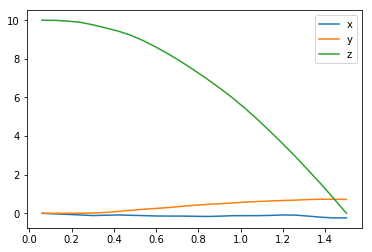

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

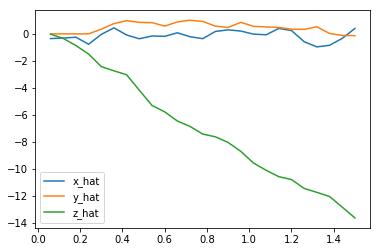

In [14]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

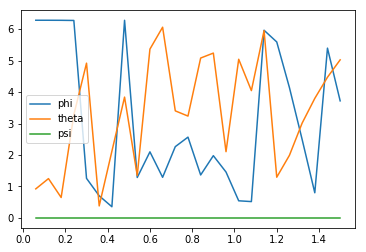

In [15]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

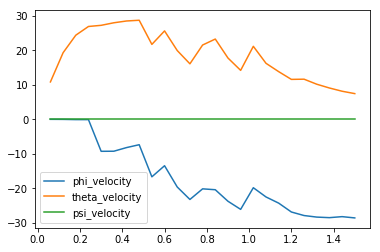

In [16]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

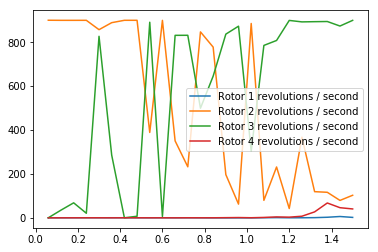

In [17]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [11]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-0.01172612  1.18579839  0.          3.62709619  1.18411856  0.        ]
[-0.50004113  9.89779431 -1.09725467]
[-13.51235544   6.01640578   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [73]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -4.171 (best =  -1.317), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

# TASK - 1
## Maintain initial position in the space

In [13]:
## TODO: Train your agent here.
from agents.agentDDPG import agentDDPG
from task import Task
import numpy as np


episodes = 500
# Task 1 : to maintain the initial position - Hover 
init_pose = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=init_pose, target_pos=target_pos)

agent = agentDDPG(task)
eps_reward_task1 = []
projection = []

for i in range(episodes):
    state = agent.reset_episode()
    total_reward = 0
    episode_projection = []
    episode_projection.append(state[:3])
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        episode_projection.append(next_state[0:3])
        episode_projection.append(next_state[6:9])
        episode_projection.append(next_state[12:15])
        
        if done == True:
            eps_reward_task1.append([i, total_reward])
            projection.append(episode_projection)
            print("Episode: {}/{}".format(i+1, episodes), "Score: {}".format(total_reward))
            break

Episode: 1/500 Score: 128.8390261632237
Episode: 2/500 Score: 128.83317549442398
Episode: 3/500 Score: 130.07788811088682
Episode: 4/500 Score: 139.9171263848587
Episode: 5/500 Score: 158.49094799075493
Episode: 6/500 Score: 144.56846045407852
Episode: 7/500 Score: 162.87866741363507
Episode: 8/500 Score: 149.43450617196265
Episode: 9/500 Score: 152.95216070841315
Episode: 10/500 Score: 193.27959153602592
Episode: 11/500 Score: 93.77690230379817
Episode: 12/500 Score: 133.53668310158295
Episode: 13/500 Score: 99.41775777856344
Episode: 14/500 Score: 169.92292379023075
Episode: 15/500 Score: 173.82334635189835
Episode: 16/500 Score: 169.1775045382711
Episode: 17/500 Score: 176.94038613397782
Episode: 18/500 Score: 182.72550234242652
Episode: 19/500 Score: 188.41816293579942
Episode: 20/500 Score: 161.85116374932713
Episode: 21/500 Score: 111.54051017144835
Episode: 22/500 Score: 165.75155784129282
Episode: 23/500 Score: 162.74285565743025
Episode: 24/500 Score: 164.6252315448591
Episode

Episode: 196/500 Score: 169.8430353432987
Episode: 197/500 Score: 168.56332183011006
Episode: 198/500 Score: 168.72992484001114
Episode: 199/500 Score: 168.36147047821655
Episode: 200/500 Score: 169.15070392190228
Episode: 201/500 Score: 168.29212967447242
Episode: 202/500 Score: 168.61822004285818
Episode: 203/500 Score: 168.28638161498924
Episode: 204/500 Score: 168.57500599802884
Episode: 205/500 Score: 169.0365165209491
Episode: 206/500 Score: 168.5681880364017
Episode: 207/500 Score: 169.45164262015464
Episode: 208/500 Score: 168.62143066523865
Episode: 209/500 Score: 167.860703566344
Episode: 210/500 Score: 168.76011270897968
Episode: 211/500 Score: 168.82841611895964
Episode: 212/500 Score: 169.39945887264523
Episode: 213/500 Score: 169.4339867123527
Episode: 214/500 Score: 168.94864461735182
Episode: 215/500 Score: 169.0020181688843
Episode: 216/500 Score: 169.39135196362653
Episode: 217/500 Score: 168.9806348430547
Episode: 218/500 Score: 169.54353996762998
Episode: 219/500 Sc

Episode: 388/500 Score: 161.4869423468743
Episode: 389/500 Score: 162.37342495285822
Episode: 390/500 Score: 161.2018118639048
Episode: 391/500 Score: 163.29575338489596
Episode: 392/500 Score: 162.01316010500904
Episode: 393/500 Score: 161.74355005274114
Episode: 394/500 Score: 161.17948597005935
Episode: 395/500 Score: 162.0976046406527
Episode: 396/500 Score: 161.52678194302473
Episode: 397/500 Score: 160.81789367561424
Episode: 398/500 Score: 161.4642994452568
Episode: 399/500 Score: 162.00591888643535
Episode: 400/500 Score: 162.59902537890187
Episode: 401/500 Score: 160.7612509685701
Episode: 402/500 Score: 162.88239035928035
Episode: 403/500 Score: 162.08660455342635
Episode: 404/500 Score: 162.42606833430156
Episode: 405/500 Score: 161.43067762418931
Episode: 406/500 Score: 162.22980441128414
Episode: 407/500 Score: 161.95786269591105
Episode: 408/500 Score: 162.39491071228522
Episode: 409/500 Score: 162.40123615496617
Episode: 410/500 Score: 163.56479736593045
Episode: 411/500

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

X Displacement over time


C:\Users\Meet\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


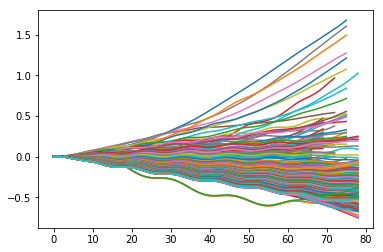

In [15]:
print("X Displacement over time")
for i in range(len(projection)):
    single_episode = projection[i]
    x = [x[0] for x in single_episode]
    
    plt.plot(x)
    plt.legend()
    _ = plt.ylim()

Y Displacement over time


C:\Users\Meet\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


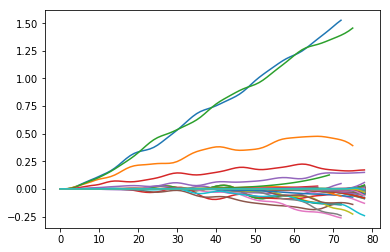

In [16]:
print("Y Displacement over time")
for i in range(len(projection)):
    single_episode = projection[i]
    y = [x[1] for x in single_episode]
    
    plt.plot(y)
    plt.legend()
    _ = plt.ylim()

Z Displacement over time


C:\Users\Meet\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


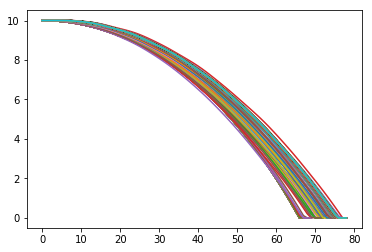

In [17]:
print("Z Displacement over time")
for i in range(len(projection)):
    single_episode = projection[i]
    z = [x[2] for x in single_episode]
    
    plt.plot(z)
    plt.legend()
    _ = plt.ylim()

In [18]:
# Single Episode after training.
import csv

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results_task1 = {x : [] for x in labels}

# Run the simulation, and save the results.
with open('simulation_results_task1', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode()
    while True:
        rotor_speeds = agent.act(state)
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results_task1[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        state = np.concatenate([task.sim.pose] * 3)
        if done:
            break

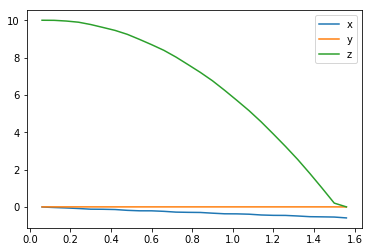

In [19]:
plt.plot(results_task1['time'], results_task1['x'], label='x')
plt.plot(results_task1['time'], results_task1['y'], label='y')
plt.plot(results_task1['time'], results_task1['z'], label='z')
plt.legend()
_ = plt.ylim()

# TASK - 2
## Take off from a given point in space to the specified target point in space

In [20]:
# Task 2 : Take off from init_position of 0, 0, 3 to 0, 0, 10
# Note : Please change the reward function in the task function for the task 2
from agents.agentDDPG import agentDDPG
from task import Task
import numpy as np


episodes = 500

init_pose = np.array([0., 0., 3., 0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=init_pose, target_pos=target_pos)

agent = agentDDPG(task)
eps_reward_task2 = []
projection_2 = []

for i in range(episodes):
    state = agent.reset_episode()
    total_reward = 0
    episode_projection = []
    episode_projection.append(state[:3])
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        episode_projection.append(next_state[0:3])
        episode_projection.append(next_state[6:9])
        episode_projection.append(next_state[12:15])
        
        if done == True:
            eps_reward_task2.append([i, total_reward])
            projection_2.append(episode_projection)
            print("Episode: {}/{}".format(i+1, episodes), "Score: {}".format(total_reward))
            break

KeyboardInterrupt: 

In [1]:
from agents.agentDDPG import agentDDPG
from task import Task
import numpy as np


episodes = 500
# Task 2 : From 0,0,0 to 0,0,10 
init_pose = np.array([0., 0., 3., 0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=init_pose, target_pos=target_pos)

agent = agentDDPG(task)
eps_reward_task2 = []

for i in range(episodes):
    state = agent.reset_episode()
    total_reward = 0
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if done == True:
            eps_reward_task2.append([i, total_reward])
            print("Episode: {}/{}".format(i+1, episodes), "Score: {}".format(total_reward))
            break

C:\Users\Meet\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


SIM POSE [0.         0.         3.00049315 0.0338092  0.97516918 0.        ]
REward 0.37502311786904274
SIM POSE [-2.03232766e-03  4.65590120e-05  3.00089404e+00  6.23422549e-02
  1.91038023e+00  0.00000000e+00]
REward 0.372963028866346
SIM POSE [-8.41147591e-03  8.87354759e-05  2.99793145e+00  8.54522050e-02
  2.78235768e+00  0.00000000e+00]
REward 0.36640304859189565
SIM POSE [-1.80088113e-02 -1.25521317e-04  2.98782992e+00  7.00041891e-02
  4.47601203e+00  0.00000000e+00]
REward 0.3562980079523055
SIM POSE [-2.60083457e-02 -5.87200149e-04  2.97080759e+00  5.48714028e-02
  5.97440221e+00  0.00000000e+00]
REward 0.3470468977734188
SIM POSE [-3.07273911e-02 -9.56878156e-04  2.95170176e+00  4.00519505e-02
  9.59700304e-01  0.00000000e+00]
REward 0.3410750042197338
SIM POSE [-3.68986390e-02 -1.13020958e-03  2.93266797e+00  1.48036676e-01
  1.86090873e+00  0.00000000e+00]
REward 0.33385804199481117
SIM POSE [-4.79051478e-02 -1.35632041e-03  2.91049590e+00  2.64845210e-01
  2.54226287e+00 

SIM POSE [-0.14536365 -0.06542332  2.4490968   1.11275541  2.82172277  0.        ]
REward 0.14116164128754938
SIM POSE [-0.1532192  -0.08645554  2.3586406   1.32466488  2.49289312  0.        ]
REward 0.10889546488619387
SIM POSE [-0.16330269 -0.11147372  2.26290254  1.53848872  2.14535135  0.        ]
REward 0.07048282348278329
SIM POSE [-0.17698511 -0.13978659  2.16290604  1.83141531  1.76971901  0.        ]
REward 0.02543492387147392
SIM POSE [-0.19529185 -0.16993797  2.05929936  2.12058367  1.39000541  0.        ]
REward -0.025623008203614156
SIM POSE [-0.21859278 -0.20009399  1.95189346  2.40478089  1.00717538  0.        ]
REward -0.08108096902566214
SIM POSE [-0.24678792 -0.22871971  1.83939746  3.0642875   0.62415947  0.        ]
REward -0.1392206363319952
SIM POSE [-0.27891735 -0.256087    1.71984445  3.68271993  0.23801542  0.        ]
REward -0.19926427462759722
SIM POSE [-0.31317804 -0.28452204  1.59216598  4.25811554  6.13263541  0.        ]
REward -0.26152748108889506
SIM P

SIM POSE [-0.03966518 -0.03252599  2.64480479  3.79368633  5.8318563   0.        ]
REward 0.2868991193590602
SIM POSE [-0.02864558 -0.03583941  2.57959268  5.22321112  5.8707845   0.        ]
REward 0.29181548259810985
SIM POSE [-0.01484116 -0.04366087  2.50954376  0.24106002  5.70721267  0.        ]
REward 0.29486467559358587
SIM POSE [ 2.49122501e-03 -5.33750912e-02  2.44036093e+00  2.81342494e+00
  5.60764315e+00  0.00000000e+00]
REward 0.29466638560184405
SIM POSE [ 0.0245303  -0.06124645  2.36759482  5.00238537  5.33658959  0.        ]
REward 0.2618323466528283
SIM POSE [ 0.05242939 -0.07042538  2.28855007  0.53170409  4.95607214  0.        ]
REward 0.2216837781633264
SIM POSE [ 0.0874908  -0.08142767  2.20709838  1.65594752  4.48175928  0.        ]
REward 0.1726678789427516
SIM POSE [ 0.13019413 -0.09280603  2.12276564  2.58920669  3.97676869  0.        ]
REward 0.11593912462443853
SIM POSE [ 0.17970081 -0.10640633  2.03689527  3.37431171  3.45260577  0.        ]
REward 0.0509077

SIM POSE [-5.65751923e-03 -1.78429151e-03  2.97625582e+00  4.24637001e-01
  3.24052900e+00  0.00000000e+00]
REward 0.3664485368916581
SIM POSE [-0.0038858  -0.00316605  2.95797029  0.39038791  0.6851457   0.        ]
REward 0.3659883297169172
SIM POSE [-3.28426584e-03 -4.80280174e-03  2.93533956e+00  3.55180436e-01
  3.69137610e+00  0.00000000e+00]
REward 0.3639063242745493
SIM POSE [-2.93435179e-03 -6.43878491e-03  2.90861830e+00  3.21894747e-01
  5.45708027e+00  0.00000000e+00]
REward 0.36139182047371055
SIM POSE [ 1.41891502e-04 -8.25249075e-03  2.87763843e+00  2.86717087e-01
  3.89666971e-01  0.00000000e+00]
REward 0.36095651356605063
SIM POSE [ 0.00398973 -0.00903698  2.84604645  0.24968294  1.14353879  0.        ]
REward 0.35489323766709396
SIM POSE [ 0.00493161 -0.00902624  2.81335546  0.22225346  1.30972833  0.        ]
REward 0.352492932793763
SIM POSE [ 1.56851304e-03 -8.65621530e-03  2.77821920e+00  1.97736808e-01
  1.27812062e+00  0.00000000e+00]
REward 0.3546599433126319
S

SIM POSE [ 0.60181362 -0.16691678  1.13734274  3.82430248  3.77940041  0.        ]
REward -0.39954488065652993
SIM POSE [ 0.6545009  -0.17422827  1.0290515   3.52178659  3.23896672  0.        ]
REward -0.44630454987464346
SIM POSE [ 0.70953643 -0.17876878  0.92158596  3.21196482  2.69708974  0.        ]
REward -0.48960861142804135
SIM POSE [ 0.76343245 -0.18195373  0.81610811  3.20601868  2.15511865  0.        ]
REward -0.5284834121062192
SIM POSE [ 0.81290698 -0.18479138  0.71179639  3.09723599  1.61361338  0.        ]
REward -0.5623109929320013
SIM POSE [ 0.85571477 -0.18751247  0.60582263  2.90921476  1.07255883  0.        ]
REward -0.5907653381774827
SIM POSE [ 0.89146386 -0.18985546  0.49459131  2.58108961  0.67083176  0.        ]
REward -0.6141555752392609
SIM POSE [ 0.92154936 -0.19027866  0.37547135  2.23664576  0.221082    0.        ]
REward -0.6322791135195713
SIM POSE [ 0.9484903  -0.18634384  0.2479845   1.87993052  6.02915284  0.        ]
REward -0.6442978704006819
SIM POS

Episode: 13/500 Score: -2.3411001295621485
SIM POSE [0.         0.         3.00125239 1.93990585 1.72308188 0.        ]
REward 0.37505871508502786
SIM POSE [-3.17713500e-03 -4.54752438e-04  3.00197116e+00  3.80653565e+00
  3.38075589e+00  0.00000000e+00]
REward 0.37146054413626967
SIM POSE [-8.76964628e-03  5.62380039e-04  3.00139918e+00  5.53533338e+00
  4.91881653e+00  0.00000000e+00]
REward 0.3657337964945807
SIM POSE [-9.91963737e-03  2.98191725e-03  2.99992555e+00  3.49474607e-01
  3.05969070e+00  0.00000000e+00]
REward 0.3620952896910303
SIM POSE [-0.00769648  0.00359365  2.99157114  1.27695814  0.59251975  0.        ]
REward 0.3633153527568639
SIM POSE [-0.00788102  0.00590702  2.97667619  2.02517823  3.67855574  0.        ]
REward 0.36012205699738686
SIM POSE [-0.00854435  0.00875955  2.95995921  2.27039103  5.82964607  0.        ]
REward 0.35582896182705415
SIM POSE [-0.00619791  0.01134706  2.93868183  2.4151426   1.04722306  0.        ]
REward 0.35460317769404404
SIM POSE [-

SIM POSE [-1.65629695e-02  3.63832463e-03  2.99808008e+00  4.56070480e+00
  2.34445375e+00  0.00000000e+00]
REward 0.3547102618176699
SIM POSE [-0.02329038  0.01006206  2.99379353  4.80051155  0.22813647  0.        ]
REward 0.3413614071215577
SIM POSE [-0.03287814  0.01563733  2.98616348  4.98320711  3.6370096   0.        ]
REward 0.3258501769052018
SIM POSE [-0.04160769  0.02102046  2.97410402  5.26232313  0.67182929  0.        ]
REward 0.3111889768457976
SIM POSE [-0.05081489  0.02699072  2.95868251  5.46247457  3.04199023  0.        ]
REward 0.2953178323439486
SIM POSE [-0.06236745  0.03315548  2.93846291  5.58798352  4.59140054  0.        ]
REward 0.27670742187788777
SIM POSE [-0.07095673  0.04193193  2.91181623  5.7513798   5.58462325  0.        ]
REward 0.2581661996267962
SIM POSE [-0.07414501  0.04967859  2.88311879  5.83083005  6.05875839  0.        ]
REward 0.24595289173889634
SIM POSE [-0.07448501  0.05474224  2.85555774  5.83612515  6.16809535  0.        ]
REward 0.239314160

Episode: 17/500 Score: -6.754148768457447
SIM POSE [0.         0.         3.00022065 0.26407627 1.48417839 0.        ]
REward 0.3750103432730995
SIM POSE [-2.17442756e-03  4.92838659e-05  2.99888222e+00  5.11914381e-01
  2.91128102e+00  0.00000000e+00]
REward 0.37272390341079614
SIM POSE [-7.02130308e-03 -8.92930050e-04  2.99194978e+00  7.40202568e-01
  4.23789281e+00  0.00000000e+00]
REward 0.36670890789266947
SIM POSE [-0.01067238 -0.00346199  2.97860004  0.71685534  0.78450674  0.        ]
REward 0.35986559918741806
SIM POSE [-0.01397419 -0.00573406  2.96169963  0.68870315  3.24511291  0.        ]
REward 0.35350595156520553
SIM POSE [-0.01842392 -0.00832413  2.94043236  0.65579687  5.27218414  0.        ]
REward 0.34548262737693025
SIM POSE [-0.02111163 -0.01151623  2.91456514  0.60598903  0.66425133  0.        ]
REward 0.33841334216880803
SIM POSE [-0.02337469 -0.01328353  2.88675031  0.55385473  1.88562685  0.        ]
REward 0.3331123384629028
SIM POSE [-0.02853766 -0.0145315   2

SIM POSE [ 0.16623241 -0.13935964  1.37023547  6.16228158  0.31115018  0.        ]
REward 0.008351704546983474
SIM POSE [ 0.16721715 -0.15321994  1.26788074  6.02630744  0.15230201  0.        ]
REward -0.009450286378422351
SIM POSE [ 0.16746342 -0.16768587  1.16461328  5.88919462  6.19085874  0.        ]
REward -0.027025932198114805
SIM POSE [ 0.16769845 -0.18356332  1.06124641  5.75128671  0.88079435  0.        ]
REward -0.04582415352752042
SIM POSE [ 0.1660887  -0.20132066  0.95766971  5.61422022  1.33358923  0.        ]
REward -0.06448690638009663
SIM POSE [ 0.15974742 -0.22038176  0.85198948  5.4779484   1.42356333  0.        ]
REward -0.07965972227770066
SIM POSE [ 0.14674541 -0.2403243   0.74311707  0.47346917  1.16980093  0.        ]
REward -0.08901657504702937
SIM POSE [ 0.12598081 -0.26007566  0.63193716  1.53180264  0.8034833   0.        ]
REward -0.09033472857696051
SIM POSE [ 0.09854025 -0.27638338  0.51838198  2.36409351  0.36601417  0.        ]
REward -0.08156170123588563

SIM POSE [-3.87847953e-02 -4.95449770e-04  2.48292466e+00  3.08088408e-02
  2.66881082e+00  0.00000000e+00]
REward 0.31297277789639744
SIM POSE [-3.94409160e-02 -7.99959658e-04  2.40274776e+00  3.70382044e-02
  2.25523895e+00  0.00000000e+00]
REward 0.3087282637467433
SIM POSE [-4.21934568e-02 -1.19409584e-03  2.31597444e+00  4.39681483e-02
  1.82090038e+00  0.00000000e+00]
REward 0.3020993726563214
SIM POSE [-4.78942761e-02 -1.65278189e-03  2.22363466e+00  5.19443140e-02
  1.37790783e+00  0.00000000e+00]
REward 0.2923166864258907
SIM POSE [-5.69073051e-02 -2.12191063e-03  2.12710025e+00  6.07910872e-02
  9.31010553e-01  0.00000000e+00]
REward 0.27914031995469657
SIM POSE [-0.06898444 -0.00252394  2.02778691  0.07050453  0.48237498  0.        ]
REward 0.2629665124851367
SIM POSE [-0.08317375 -0.00277708  1.92679647  0.08047802  0.21358075  0.        ]
REward 0.24488441240298853
SIM POSE [-9.84298658e-02 -2.82249883e-03  1.82463827e+00  9.09675701e-02
  6.17325900e+00  0.00000000e+00]
R

SIM POSE [-6.10004024e-02 -4.06623616e-05  2.84604926e+00  3.00152421e-02
  2.94375767e+00  0.00000000e+00]
REward 0.30695429382414297
SIM POSE [-7.07216070e-02 -1.57329073e-04  2.80406195e+00  3.74339980e-02
  2.89394062e+00  0.00000000e+00]
REward 0.2952737116902155
SIM POSE [-8.11758652e-02 -3.83104404e-04  2.75491413e+00  4.55904793e-02
  2.77436553e+00  0.00000000e+00]
REward 0.28247195869521574
SIM POSE [-9.26091520e-02 -7.37031893e-04  2.69874819e+00  5.65137941e-02
  2.86784345e+00  0.00000000e+00]
REward 0.26830894190415555
SIM POSE [-1.05043078e-01 -1.24510501e-03  2.63564726e+00  6.88876118e-02
  2.83798235e+00  0.00000000e+00]
REward 0.2527614017614506
SIM POSE [-1.18369185e-01 -1.94175198e-03  2.56561988e+00  8.27026347e-02
  2.71123313e+00  0.00000000e+00]
REward 0.23592589479187961
SIM POSE [-0.13279747 -0.00285661  2.48879328  0.09885332  2.49051672  0.        ]
REward 0.2175975583072155
SIM POSE [-0.14877989 -0.00400888  2.40542887  0.1166445   2.22002771  0.        ]


SIM POSE [-1.19770922e-01 -4.90831148e-04  2.88671701e+00  4.93158733e-02
  4.28963577e+00  0.00000000e+00]
REward 0.2500716908099588
SIM POSE [-1.36504869e-01 -8.21472751e-04  2.84445861e+00  6.40377945e-02
  4.72390824e+00  0.00000000e+00]
REward 0.23136329475550932
SIM POSE [-1.50151768e-01 -1.18126438e-03  2.79767544e+00  8.06257438e-02
  5.02019765e+00  0.00000000e+00]
REward 0.21553527659054927
SIM POSE [-1.60614366e-01 -1.49653307e-03  2.74753038e+00  1.00906894e-01
  5.65209791e+00  0.00000000e+00]
REward 0.20278366242553103
SIM POSE [-1.68545586e-01 -1.63756311e-03  2.69529160e+00  1.23350578e-01
  6.06701073e+00  0.00000000e+00]
REward 0.1926357754095073
SIM POSE [-1.75177585e-01 -1.45326592e-03  2.64199890e+00  1.47930464e-01
  1.27788725e-02  0.00000000e+00]
REward 0.18407682440566323
SIM POSE [-1.81491864e-01 -7.65963070e-04  2.58842842e+00  1.70342722e-01
  1.77932055e+00  0.00000000e+00]
REward 0.1763605454178884
SIM POSE [-1.89950350e-01  1.49347062e-04  2.53254942e+00 

Episode: 26/500 Score: -6.286360688770272
SIM POSE [0.00000000e+00 0.00000000e+00 3.00085314e+00 4.85465169e-04
 2.15981541e-01 0.00000000e+00]
REward 0.3750399953185338
SIM POSE [-6.03281018e-04  1.33485009e-06  3.00334706e+00  1.59397528e-03
  4.17592358e-01  0.00000000e+00]
REward 0.3745523432291181
SIM POSE [-2.95140174e-03  8.10566438e-06  3.00723949e+00  3.32516155e-03
  6.02378815e-01  0.00000000e+00]
REward 0.37238015949293896
SIM POSE [-7.94214058e-03  2.62361720e-05  3.01196372e+00  5.76641719e-03
  7.53219824e-01  0.00000000e+00]
REward 0.367593429307869
SIM POSE [-1.62454257e-02  6.27656676e-05  3.01687879e+00  8.88305612e-03
  8.84146274e-01  0.00000000e+00]
REward 0.35948610350765087
SIM POSE [-2.84073757e-02  1.25341243e-04  3.02147973e+00  1.26740410e-02
  9.93770838e-01  0.00000000e+00]
REward 0.34748449487337346
SIM POSE [-4.46472377e-02  2.19572390e-04  3.02515613e+00  1.74072770e-02
  1.10724514e+00  0.00000000e+00]
REward 0.33134574592079763
SIM POSE [-6.50827783e-

SIM POSE [-9.33693171e-02  1.22380124e-03  3.06442639e+00  3.74235865e-02
  7.15449872e-01  0.00000000e+00]
REward 0.28372177059284
SIM POSE [-1.20020105e-01  1.76797775e-03  3.07364563e+00  4.52432630e-02
  6.92850395e-01  0.00000000e+00]
REward 0.2572691205891547
SIM POSE [-1.50135134e-01  2.48052125e-03  3.08300850e+00  5.38256829e-02
  6.56099667e-01  0.00000000e+00]
REward 0.22743413462737577
SIM POSE [-0.18359555  0.00339995  3.092615    0.06322264  0.61141252  0.        ]
REward 0.19443208269105086
SIM POSE [-0.2202335   0.00457159  3.10259651  0.07340386  0.5527191   0.        ]
REward 0.15855953168025372
SIM POSE [-0.25982363  0.00604807  3.11310328  0.08436566  0.48069912  0.        ]
REward 0.12019919315564617
SIM POSE [-0.30208872  0.00789335  3.12434279  0.09614235  0.40690521  0.        ]
REward 0.07980449951063058
SIM POSE [-0.34670377  0.01017935  3.13652278  0.10871056  0.31938006  0.        ]
REward 0.03788256874252957
SIM POSE [-0.39327394  0.01298292  3.14980903  0.

SIM POSE [0.08269934 0.15096026 3.90874671 0.43121072 0.63941351 0.        ]
REward 0.1907211849385966
SIM POSE [0.09049555 0.17523596 3.97273174 0.46058888 1.21941342 0.        ]
REward 0.16319507569473343
SIM POSE [0.09283896 0.20119845 4.03637836 0.4900375  1.77149772 0.        ]
REward 0.13971035638051651
SIM POSE [0.08863852 0.22735126 4.09653287 0.51960609 1.87661568 0.        ]
REward 0.12264370830498414
SIM POSE [0.07813045 0.25266298 4.151253   0.54938494 1.98747119 0.        ]
REward 0.11264420399202665
SIM POSE [0.06153341 0.27675385 4.19999811 0.57937131 2.10542528 0.        ]
REward 0.10982244118692264
SIM POSE [0.03913163 0.29919733 4.2422282  0.60955349 2.32731908 0.        ]
REward 0.11424374528218206
SIM POSE [0.01152288 0.31939497 4.27722871 0.63991951 2.56168462 0.        ]
REward 0.1257624247815281
SIM POSE [-0.02025685  0.33662781  4.30420692  0.6704669   2.80807322  0.        ]
REward 0.10332490913513204
SIM POSE [-0.05487862  0.350281    4.32261113  0.70120213  3

SIM POSE [-0.76063911 -0.01254829  2.1295213   0.30055617  5.11102087  0.        ]
REward -0.31580041894129673
SIM POSE [-0.78382303 -0.01604697  2.02795831  0.33320051  5.39711383  0.        ]
REward -0.3365690935718209
SIM POSE [-0.80196845 -0.01856898  1.92547267  0.36805574  5.68402614  0.        ]
REward -0.35310691865237953
SIM POSE [-0.81617706 -0.01959993  1.82318287  0.40924857  5.97461625  0.        ]
REward -0.3656704393146756
SIM POSE [-0.82783014 -0.01865279  1.72186608  0.45308687  6.26177897  0.        ]
REward -0.3746189136550493
SIM POSE [-0.83852622 -0.01532431  1.62189454  0.49951018  0.26290824  0.        ]
REward -0.3804567427397856
SIM POSE [-0.85006164 -0.00916079  1.52359416  0.53913004  2.00835044  0.        ]
REward -0.3836864795015118
SIM POSE [-8.65675231e-01 -2.26219635e-03  1.42298213e+00  5.79416424e-01
  3.39486806e+00  0.00000000e+00]
REward -0.3881824362752773
SIM POSE [-8.83586995e-01  1.95831759e-03  1.31438468e+00  6.20356830e-01
  4.52874516e+00  0

SIM POSE [-2.33370845e-01  1.10178707e-03  2.75919740e+00  8.58960247e-02
  1.35248530e+00  0.00000000e+00]
REward 0.1337158869348506
SIM POSE [-2.50213590e-01  2.32654100e-03  2.72831423e+00  1.01032487e-01
  2.02433589e+00  0.00000000e+00]
REward 0.11523705673669137
SIM POSE [-0.27350844  0.00346222  2.69274282  0.11731859  2.59626741  0.        ]
REward 0.09078140135178496
SIM POSE [-0.30140011  0.00415268  2.64926524  0.13361316  3.07626368  0.        ]
REward 0.06250378158374924
SIM POSE [-0.33099202  0.00416136  2.59649195  0.15055706  3.52334075  0.        ]
REward 0.033420563320659444
SIM POSE [-3.59648005e-01  3.37343212e-03  2.53422307e+00  1.68145520e-01
  3.94103107e+00  0.00000000e+00]
REward 0.006090579262196449
SIM POSE [-3.84933108e-01  1.82166309e-03  2.46325642e+00  1.89292923e-01
  4.23701588e+00  0.00000000e+00]
REward -0.01738350860096559
SIM POSE [-4.05175081e-01 -3.44100683e-04  2.38493771e+00  2.12042983e-01
  4.52681881e+00  0.00000000e+00]
REward -0.0364850203

SIM POSE [-0.73923544  0.00609506  0.81124778  0.7400114   3.28842281  0.        ]
REward -0.34033565769701896
SIM POSE [-0.79351937 -0.00735837  0.66569266  0.78817079  3.92651068  0.        ]
REward -0.37746115665189073
SIM POSE [-0.84554895 -0.02361404  0.513539    0.83808249  4.5391298   0.        ]
REward -0.4262634641759843
SIM POSE [-0.89319265 -0.04138307  0.35628924  0.8854132   0.44061141  0.        ]
REward -0.47246993404478665
SIM POSE [-0.93941204 -0.05788855  0.19647055  0.93269783  2.47041666  0.        ]
REward -0.5150889461991728
SIM POSE [-0.98810463 -0.07435635  0.03325658  0.97993726  4.2770602   0.        ]
REward -0.5572182713778936
SIM POSE [-1.03596534 -0.09314025  0.          1.02771698  0.25622655  0.        ]
REward -0.5964343910274941
SIM POSE [-1.08221871 -0.11106073  0.          1.07478924  2.09890549  0.        ]
REward -0.6318994945490526
SIM POSE [-1.13093124 -0.12840898  0.          1.12116466  3.51553245  0.        ]
REward -0.6663182994249265
Episode

SIM POSE [-1.09487252e-01 -5.60393428e-03  3.06761333e+00  6.15481262e+00
  1.83027656e+00  0.00000000e+00]
REward 0.26354066502821427
SIM POSE [-9.95555542e-02 -4.58876694e-03  3.02019715e+00  6.14851192e+00
  1.26604054e+00  0.00000000e+00]
REward 0.27213245879111797
SIM POSE [-9.42937184e-02 -3.58594810e-03  2.96891309e+00  6.14222906e+00
  6.98068678e-01  0.00000000e+00]
REward 0.27594726473642456
SIM POSE [-9.28999083e-02 -2.93546735e-03  2.91621373e+00  6.13596398e+00
  1.27491993e-01  0.00000000e+00]
REward 0.2755441933108779
SIM POSE [-9.33558107e-02 -2.88788330e-03  2.86372657e+00  6.12971626e+00
  5.83863458e+00  0.00000000e+00]
REward 0.272745751868986
SIM POSE [-9.30932001e-02 -3.51610142e-03  2.81177142e+00  6.12348584e+00
  5.26559668e+00  0.00000000e+00]
REward 0.27003832062049704
SIM POSE [-8.89523919e-02 -4.76007784e-03  2.75978878e+00  6.11727579e+00
  5.86638306e+00  0.00000000e+00]
REward 0.2705897762559238
SIM POSE [-0.08060897 -0.00679592  2.70866571  6.11111843  

SIM POSE [-2.58273382 -1.56822923  0.62751822  3.61678542  3.17525031  0.        ]
REward -1.6161608739925613
SIM POSE [-2.64396634 -1.61205666  0.49724487  3.52160483  2.60008291  0.        ]
REward -1.627770445743741
SIM POSE [-2.70611231 -1.65423044  0.36666971  3.42817351  2.02453143  0.        ]
REward -1.6384203487671434
SIM POSE [-2.7713518  -1.69528718  0.23529125  3.33635446  1.44874205  0.        ]
REward -1.6483275649615563
SIM POSE [-2.8409407  -1.73599238  0.10114331  3.24619197  0.8726706   0.        ]
REward -1.6577107299279097
SIM POSE [-2.91430207 -1.77683119  0.          3.15764426  0.29639604  0.        ]
REward -1.6657589514125282
Episode: 36/500 Score: -40.53271154173653
SIM POSE [0.         0.         3.00217889 0.12899624 0.12754223 0.        ]
REward 0.37510216335527213
SIM POSE [-5.26646331e-04  5.28283917e-04  3.00864730e+00  2.47252265e-01
  2.44450756e-01  0.00000000e+00]
REward 0.37435085084743874
SIM POSE [-2.58167933e-03  2.56769796e-03  3.01915814e+00  3

SIM POSE [-0.0528261  -0.07470431  2.50212376  1.40532379  3.82330512  0.        ]
REward 0.22568671688051195
SIM POSE [-0.02607925 -0.07813247  2.43419223  1.2979235   3.33266774  0.        ]
REward 0.246182461373185
SIM POSE [ 2.69678968e-03 -8.57967716e-02  2.36146387e+00  1.18837440e+00
  2.82798355e+00  0.00000000e+00]
REward 0.2589974083239272
SIM POSE [ 0.03121668 -0.09795943  2.28339272  1.07373814  2.32155835  0.        ]
REward 0.21531677705775967
SIM POSE [ 0.05725363 -0.11378336  2.19982002  0.95939866  1.81224422  0.        ]
REward 0.17041610810518926
SIM POSE [ 0.07918555 -0.13165183  2.11123188  0.84534173  1.3018809   0.        ]
REward 0.12758766814226125
SIM POSE [ 0.09633141 -0.14962146  2.01882815  0.73546102  1.03110537  0.        ]
REward 0.08948273052305925
SIM POSE [ 0.10889708 -0.16634331  1.92387211  0.62697619  0.67694432  0.        ]
REward 0.05724291703568812
SIM POSE [ 0.11778657 -0.1811805   1.82744951  0.51984063  0.27650036  0.        ]
REward 0.030594

SIM POSE [-1.24376685e-02  1.30574310e-03  3.12679728e+00  6.24429822e-03
  1.30698064e-01  0.00000000e+00]
REward 0.36729657441115254
SIM POSE [-1.81776378e-02  1.79572487e-03  3.16554685e+00  2.12691942e-03
  1.24944240e-01  0.00000000e+00]
REward 0.36295262343844437
SIM POSE [-2.50828978e-02  2.32366643e-03  3.20943883e+00  6.27780716e+00
  1.13126843e-01  0.00000000e+00]
REward 0.3576800731626525
SIM POSE [-3.30423772e-02  2.83826532e-03  3.25820734e+00  6.25473103e+00
  2.64028714e-01  0.00000000e+00]
REward 0.35163853399338024
SIM POSE [-4.26062789e-02  3.21209867e-03  3.31145951e+00  6.23177369e+00
  3.93178803e-01  0.00000000e+00]
REward 0.3443984862769476
SIM POSE [-5.49295302e-02  3.26501564e-03  3.36887007e+00  6.20893393e+00
  4.99264846e-01  0.00000000e+00]
REward 0.3349872232827657
SIM POSE [-7.11262775e-02  2.81126028e-03  3.43037985e+00  6.18621046e+00
  4.19811008e-01  0.00000000e+00]
REward 0.32250324415125603
SIM POSE [-9.14478827e-02  1.64352776e-03  3.49625911e+00 

SIM POSE [7.61442147 4.25829985 2.07050535 4.74550999 1.53382132 0.        ]
REward -1.6636340951921764
SIM POSE [7.64156519 4.5018651  1.81720142 4.72911844 1.4902174  0.        ]
REward -1.6730558787249663
SIM POSE [7.65899383 4.7462094  1.55857575 4.71278675 1.44706725 0.        ]
REward -1.6821000531552872
SIM POSE [7.6666898  4.99088582 1.29453905 4.69651447 1.40433024 0.        ]
REward -1.6908027660599014
SIM POSE [7.66465604 5.23545295 1.02498282 4.68030119 1.36200164 0.        ]
REward -1.6991915009592597
SIM POSE [7.65291472 5.47947634 0.74977964 4.66414647 1.32007389 0.        ]
REward -1.7072881122195822
SIM POSE [7.63150923 5.72253069 0.46878367 4.6480499  1.27854599 0.        ]
REward -1.7151107460144
SIM POSE [7.60050188 5.9642011  0.18183115 4.63201104 1.2374106  0.        ]
REward -1.7226750424611912
SIM POSE [7.55997147 6.20408418 0.         4.61602949 1.19666067 0.        ]
REward -1.7272640144860762
Episode: 40/500 Score: -57.186501155621656
SIM POSE [0.00000000e+00

SIM POSE [-1.93577444 -9.1965546  10.20624228  4.13348696  0.41554703  0.        ]
REward 0.5278649854006225
SIM POSE [-2.0224651  -9.53408975 10.20601596  4.10621784  0.42323024  0.        ]
REward 0.5219484159994214
SIM POSE [-2.11145542 -9.87540172 10.19836067  4.07911405  0.43092761  0.        ]
REward 0.5323084111042377
SIM POSE [ -2.20275371 -10.22030264  10.18320126   4.0521736    0.43863901
   0.        ]
REward 0.5596195008545605
SIM POSE [ -2.29636762 -10.5686043   10.16046932   4.02539453   0.44633931
   0.        ]
REward 0.6052082430783805
SIM POSE [ -2.39230507 -10.92011996  10.13010174   3.99877491   0.45402855
   0.        ]
REward 0.6712044806172947
SIM POSE [ -2.49057381 -11.27466367  10.09204105   3.97231287   0.4617111
   0.        ]
REward 0.7607881772906306
SIM POSE [ -2.59118096 -11.6320497   10.04623599   3.94600655   0.46933368
   0.        ]
REward 0.8785886809227922
SIM POSE [ -2.69413244 -11.99209186   9.99264192   3.91985413   0.47689649
   0.        ]
REwa

SIM POSE [-0.20897747 -0.00810489  3.97906449  6.26134119  0.54738275  0.        ]
REward 0.2132012050924056
SIM POSE [-0.24854134 -0.00966474  4.07927848  6.2600138   0.58929281  0.        ]
REward 0.18026936515797173
SIM POSE [-0.29300621 -0.01139685  4.1832239   6.2586868   0.63222984  0.        ]
REward 0.1437950057726025
SIM POSE [-0.34266918 -0.01330536  4.29064793  6.25736018  0.67569489  0.        ]
REward 0.10397424993520812
SIM POSE [-0.39781961 -0.01539331  4.40128092  6.25603395  0.71996233  0.        ]
REward 0.06115980146612875
SIM POSE [-0.45873265 -0.01766243  4.51483096  6.25470811  0.76501693  0.        ]
REward 0.015882640588568378
SIM POSE [-0.52567881 -0.02011337  4.63099547  6.25338267  0.81055751  0.        ]
REward -0.031150462700629957
SIM POSE [-0.59891666 -0.02274554  4.74945654  6.25205762  0.85670444  0.        ]
REward -0.07906159550919624
SIM POSE [-0.67868595 -0.0255569   4.86987642  6.25073295  0.90344568  0.        ]
REward -0.12682925083497784
SIM POS

SIM POSE [-20.46353625  -1.23591663   6.25688452   2.73705913   3.5988582
   0.        ]
REward -1.2117913016952264
SIM POSE [-20.77355468  -1.25249621   6.14951903   2.16055896   3.62932096
   0.        ]
REward -1.2304867680453135
SIM POSE [-21.07664303  -1.27551083   6.04608996   1.58404106   3.65956627
   0.        ]
REward -1.2497019889030128
SIM POSE [-21.37190618  -1.30855171   5.94202532   1.00750997   3.68958533
   0.        ]
REward -1.2707857163676393
SIM POSE [-21.65844768  -1.35195071   5.83128238   0.43097161   3.71941684
   0.        ]
REward -1.29409816946052
SIM POSE [-21.9355904   -1.40241256   5.70867446   6.13761315   3.74906332
   0.        ]
REward -1.3189063326953425
SIM POSE [-22.20298809  -1.4544463    5.57181504   5.56106546   3.77853487
   0.        ]
REward -1.3438976425396865
SIM POSE [-22.46067479  -1.50243553   5.4216241    4.98452655   3.8078098
   0.        ]
REward -1.3677964643592007
SIM POSE [-22.7090767   -1.54237533   5.26180673   4.40799417   3.83

SIM POSE [-0.42151257 -0.01931787  7.94739727  6.27510309  0.15893407  0.        ]
REward 0.5652485113007926
SIM POSE [-0.45058137 -0.02070712  8.16195888  6.2749057   0.16236785  0.        ]
REward 0.6139862053679822
SIM POSE [-0.4808406  -0.02215643  8.37993843  6.27470832  0.16584474  0.        ]
REward 0.6759418897885255
SIM POSE [-0.51230333 -0.0236666   8.60125728  6.27451094  0.16936275  0.        ]
REward 0.7552550944815404
SIM POSE [-0.54498248 -0.02523838  8.82583711  6.27431358  0.17289833  0.        ]
REward 0.8578581495601798
SIM POSE [-0.57889065 -0.02687251  9.05359978  6.27411622  0.17645144  0.        ]
REward 0.9925821464699528
SIM POSE [-0.61404049 -0.02856972  9.28446958  6.27391887  0.1800224   0.        ]
REward 1.1732032843892657
SIM POSE [-0.65044434 -0.0303307   9.5183713   6.27372153  0.18361737  0.        ]
REward 1.4225083722257075
SIM POSE [-0.6881139  -0.03215611  9.75522834  6.27352419  0.18723632  0.        ]
REward 1.781166568754702
SIM POSE [-0.7270607

SIM POSE [-6.54696108 -0.3222604  29.17480206  6.26032352  0.49840433  0.        ]
REward -1.162844894794094
SIM POSE [-6.69185143 -0.32929388 29.48163962  6.26012679  0.50505463  0.        ]
REward -1.1714104227043958
SIM POSE [-6.83873106 -0.33641016 29.7881589   6.25993007  0.5116707   0.        ]
REward -1.1799535523454527
SIM POSE [-6.98761499 -0.34360925 30.09433002  6.25973335  0.51825435  0.        ]
REward -1.188475752556305
SIM POSE [-7.13851788 -0.35089118 30.40012333  6.25953665  0.52478763  0.        ]
REward -1.1969782838939511
SIM POSE [-7.29145435 -0.35825596 30.70550996  6.25933996  0.53127069  0.        ]
REward -1.2054622276462696
SIM POSE [-7.44643913 -0.36570361 31.01046215  6.25914328  0.53770409  0.        ]
REward -1.2139285056350122
SIM POSE [-7.60348649 -0.37323418 31.3149523   6.25894661  0.5440842   0.        ]
REward -1.2223778664983371
SIM POSE [-7.76260979 -0.38084765 31.61895212  6.25874996  0.55041115  0.        ]
REward -1.2308108733285283
SIM POSE [-7

SIM POSE [-23.52673356  -1.07329937  49.50241097   6.24559649   0.91226817
   0.        ]
REward -1.7166313641561461
SIM POSE [-23.83944333  -1.08615904  49.71298915   6.24540069   0.9179031
   0.        ]
REward -1.721785395997835
SIM POSE [-24.15437936  -1.09908318  49.921339     6.24520491   0.92353573
   0.        ]
REward -1.7268580745234758
SIM POSE [-24.47153596  -1.1120712   50.12743507   6.24500913   0.92916611
   0.        ]
REward -1.7318492989997403
SIM POSE [-24.79090717  -1.12512246  50.33125185   6.24481337   0.93479095
   0.        ]
REward -1.7367590198165412
SIM POSE [-25.11248631  -1.13823634  50.53276357   6.24461761   0.94041028
   0.        ]
REward -1.741587233756038
SIM POSE [-25.43626657  -1.15141219  50.7319446    6.24442186   0.94602566
   0.        ]
REward -1.7463339893578296
SIM POSE [-25.76224086  -1.16464935  50.92876926   6.24422612   0.95167686
   0.        ]
REward -1.750999384224047
SIM POSE [-26.09040163  -1.17794716  51.12321178   6.24403038   0.95

SIM POSE [-7.20418936e-02 -4.96440753e-05  4.76224413e+00  6.28312029e+00
  8.57106232e-02  0.00000000e+00]
REward 0.4089750321669149
SIM POSE [-8.14263034e-02 -5.64611600e-05  4.90194980e+00  6.28311742e+00
  8.94502736e-02  0.00000000e+00]
REward 0.4106572470123514
SIM POSE [-9.15787241e-02 -6.38593398e-05  5.04647684e+00  6.28311456e+00
  9.32012471e-02  0.00000000e+00]
REward 0.4125158791697072
SIM POSE [-1.02525802e-01 -7.18588005e-05  5.19575537e+00  6.28311171e+00
  9.69685915e-02  0.00000000e+00]
REward 0.4146231916439569
SIM POSE [-1.14293663e-01 -8.04792016e-05  5.34971412e+00  6.28310885e+00
  1.00800567e-01  0.00000000e+00]
REward 0.4170675311031345
SIM POSE [-1.26908082e-01 -8.97396279e-05  5.50827991e+00  6.28310600e+00
  1.04697076e-01  0.00000000e+00]
REward 0.41995606221403187
SIM POSE [-1.40394655e-01 -9.96585725e-05  5.67137769e+00  6.28310315e+00
  1.08689079e-01  0.00000000e+00]
REward 0.4234181995843984
SIM POSE [-1.54778990e-01 -1.10253986e-04  5.83893130e+00  6.

SIM POSE [-3.18820386e+00 -2.13359439e-03  1.99422704e+01  6.28294242e+00
  4.62513654e-01  0.00000000e+00]
REward -0.7245707875993872
SIM POSE [-3.29464420e+00 -2.19875559e-03  2.02397862e+01  6.28293969e+00
  4.70937697e-01  0.00000000e+00]
REward -0.7325434994499354
SIM POSE [-3.40332950e+00 -2.26498667e-03  2.05377582e+01  6.28293695e+00
  4.79471706e-01  0.00000000e+00]
REward -0.7400388120311207
SIM POSE [-3.51428327e+00 -2.33228752e-03  2.08361376e+01  6.28293422e+00
  4.88102183e-01  0.00000000e+00]
REward -0.7471003895353067
SIM POSE [-3.62752920e+00 -2.40065787e-03  2.11348760e+01  6.28293149e+00
  4.96770848e-01  0.00000000e+00]
REward -0.7537671537575692
SIM POSE [-3.74309053e+00 -2.47009703e-03  2.14339242e+01  6.28292876e+00
  5.05477561e-01  0.00000000e+00]
REward -0.7600737621822439
SIM POSE [-3.86099076e+00 -2.54060438e-03  2.17332345e+01  6.28292603e+00
  5.14221669e-01  0.00000000e+00]
REward -0.7660511045855728
SIM POSE [-3.98125326e+00 -2.61217914e-03  2.20327596e+

SIM POSE [-1.74661989e+01 -9.39497158e-03  3.99362904e+01  6.28274454e+00
  9.86667666e-01  0.00000000e+00]
REward -0.9124212067784908
SIM POSE [-1.77622316e+01 -9.52827345e-03  4.01604175e+01  6.28274162e+00
  9.92711491e-01  0.00000000e+00]
REward -0.9132519966213581
SIM POSE [-1.80607965e+01 -9.66230340e-03  4.03822671e+01  6.28273868e+00
  9.98727429e-01  0.00000000e+00]
REward -0.9140666145838872
SIM POSE [-1.83618821e+01 -9.79705393e-03  4.06018112e+01  6.28273572e+00
  1.00471620e+00  0.00000000e+00]
REward -0.9148654729016433
SIM POSE [-1.86654766e+01 -9.93251744e-03  4.08190226e+01  6.28273274e+00
  1.01066907e+00  0.00000000e+00]
REward -0.9156489678163433
SIM POSE [-1.89715663e+01 -1.00686859e-02  4.10338726e+01  6.28272974e+00
  1.01658613e+00  0.00000000e+00]
REward -0.9164174769473163
SIM POSE [-1.92801375e+01 -1.02055513e-02  4.12463336e+01  6.28272671e+00
  1.02246588e+00  0.00000000e+00]
REward -0.9171713645486615
SIM POSE [-1.95911764e+01 -1.03431057e-02  4.14563779e+

SIM POSE [-4.04038733e+01 -1.88857904e-02  4.86182496e+01  6.28255262e+00
  1.24065750e+00  0.00000000e+00]
REward -0.9431608662678517
SIM POSE [-4.08262027e+01 -1.90484828e-02  4.86524556e+01  6.28254959e+00
  1.24237852e+00  0.00000000e+00]
REward -0.9433888220250579
SIM POSE [-4.12500182e+01 -1.92113339e-02  4.86829870e+01  6.28254656e+00
  1.24408981e+00  0.00000000e+00]
REward -0.9436098230107863
SIM POSE [-4.16753099e+01 -1.93743301e-02  4.87098214e+01  6.28254352e+00
  1.24580232e+00  0.00000000e+00]
REward -0.9438238455375152
SIM POSE [-4.21020681e+01 -1.95374574e-02  4.87329359e+01  6.28254048e+00
  1.24742077e+00  0.00000000e+00]
REward -0.9440308608338396
SIM POSE [-4.25302836e+01 -1.97007014e-02  4.87523071e+01  6.28253745e+00
  1.24894522e+00  0.00000000e+00]
REward -0.9442308350873734
SIM POSE [-4.29599458e+01 -1.98640471e-02  4.87679107e+01  6.28253441e+00
  1.25037078e+00  0.00000000e+00]
REward -0.9444237276527898
SIM POSE [-4.33910451e+01 -2.00274786e-02  4.87797219e+

SIM POSE [-3.35442559 -0.02305366  0.85081744  0.16823109  5.44114054  0.        ]
REward -0.7250221142108482
SIM POSE [-3.34750237 -0.02063697  0.67207565  0.07962933  5.53232443  0.        ]
REward -0.7276883176859255
SIM POSE [-3.33410056 -0.01739682  0.49623122  6.26902793  5.62133655  0.        ]
REward -0.7292451539898185
SIM POSE [-3.31502146 -0.01392732  0.32362165  6.16665706  5.70805093  0.        ]
REward -0.7302955282762453
SIM POSE [-3.29105224 -0.0109518   0.15444959  6.06614662  5.79285875  0.        ]
REward -0.7315741922137039
SIM POSE [-3.26281791 -0.00928107  0.          5.96747044  5.87584334  0.        ]
REward -0.7336270438609344
Episode: 45/500 Score: -15.087978404833466
SIM POSE [0.00000000e+00 0.00000000e+00 3.00257216e+00 8.26839918e-07
 1.38420996e-02 0.00000000e+00]
REward 0.3751206085986971
SIM POSE [-6.27502209e-05  3.74806049e-09  3.01028746e+00  6.28316124e+00
  3.09962734e-02  0.00000000e+00]
REward 0.3754200917498179
SIM POSE [-3.28685381e-04 -9.775525

SIM POSE [-8.48985355 -0.02450582 12.38653349  6.27800377  1.54429228  0.        ]
REward -0.13863922685505778
SIM POSE [-8.79758095 -0.0251814  12.50903773  6.27793126  1.5651207   0.        ]
REward -0.17024079538706213
SIM POSE [-9.11035573 -0.02585577 12.62738833  6.27785874  1.58585592  0.        ]
REward -0.19880867862337487
SIM POSE [-9.42809426 -0.02652832 12.74146863  6.2777862   1.60650877  0.        ]
REward -0.2246979068622249
SIM POSE [-9.75071068 -0.02719839 12.85116548  6.27771364  1.62703345  0.        ]
REward -0.24820671718599918
SIM POSE [-10.07811689  -0.02786537  12.95636934   6.27764106   1.64743113
   0.        ]
REward -0.2695871929685664
SIM POSE [-10.41022347  -0.02852864  13.05697439   6.27756845   1.66770288
   0.        ]
REward -0.28905357119638164
SIM POSE [-10.74693903  -0.02918756  13.15287858   6.27749584   1.68785004
   0.        ]
REward -0.3067887834298705
SIM POSE [-11.08816961  -0.02984154  13.24398367   6.27742321   1.7078737
   0.        ]
REwar

SIM POSE [-41.09572612  -0.04140126   4.76056826   6.27218808   2.77477878
   0.        ]
REward -0.5605645997855352
SIM POSE [-4.15108749e+01 -4.10482340e-02  4.44157915e+00  6.27211529e+00
  2.78446863e+00  0.00000000e+00]
REward -0.5835980077617704
SIM POSE [-4.19244380e+01 -4.06884709e-02  4.11803448e+00  6.27204252e+00
  2.79407104e+00  0.00000000e+00]
REward -0.6047440569908671
SIM POSE [-4.23363793e+01 -4.03225197e-02  3.78998738e+00  6.27196975e+00
  2.80358636e+00  0.00000000e+00]
REward -0.6242126431626738
SIM POSE [-4.27466642e+01 -3.99509342e-02  3.45749026e+00  6.27189700e+00
  2.81302087e+00  0.00000000e+00]
REward -0.6421841010146703
SIM POSE [-4.31552590e+01 -3.95742734e-02  3.12059529e+00  6.27182425e+00
  2.82234486e+00  0.00000000e+00]
REward -0.6588142044948193
SIM POSE [-4.35621314e+01 -3.91931080e-02  2.77935496e+00  6.27175150e+00
  2.83155877e+00  0.00000000e+00]
REward -0.6742381857328585
SIM POSE [-4.39672504e+01 -3.88080005e-02  2.43382037e+00  6.27167876e+00

SIM POSE [-8.12948360e-01 -5.11182501e-03  8.51740614e+00  6.28130639e+00
  3.39006753e-01  0.00000000e+00]
REward 0.5320882333310835
SIM POSE [-8.69927737e-01 -5.44759295e-03  8.73700197e+00  6.28126372e+00
  3.47436873e-01  0.00000000e+00]
REward 0.618890085706122
SIM POSE [-9.29349061e-01 -5.79629358e-03  8.95948000e+00  6.28122105e+00
  3.55905679e-01  0.00000000e+00]
REward 0.7341269855582148
SIM POSE [-9.91244483e-01 -6.15803980e-03  9.18474884e+00  6.28117838e+00
  3.64412304e-01  0.00000000e+00]
REward 0.8886134323920899
SIM POSE [-1.05564522e+00 -6.53293723e-03  9.41271739e+00  6.28113572e+00
  3.72948783e-01  0.00000000e+00]
REward 1.0994983188134815
SIM POSE [-1.12258151e+00 -6.92108415e-03  9.64329476e+00  6.28109308e+00
  3.81515011e-01  0.00000000e+00]
REward 1.3958533946996436
SIM POSE [-1.19208288e+00 -7.32257315e-03  9.87639111e+00  6.28105045e+00
  3.90110439e-01  0.00000000e+00]
REward 1.8314220215612365
SIM POSE [-1.26417794e+00 -7.73748994e-03  1.01119170e+01  6.28

SIM POSE [-12.80222733  -0.06817406  27.81370202   6.27810515   0.84736396
   0.        ]
REward -0.9086103870888218
SIM POSE [-13.06808588  -0.06951288  28.0530169    6.27806243   0.85274489
   0.        ]
REward -0.9119457506706357
SIM POSE [-13.3365585   -0.07086341  28.29070337   6.27801971   0.85807309
   0.        ]
REward -0.9152297026281296
SIM POSE [-13.6076349   -0.07222557  28.52672807   6.277977     0.86335702
   0.        ]
REward -0.9184646750451466
SIM POSE [-13.88130462  -0.0735993   28.76105802   6.27793428   0.86854378
   0.        ]
REward -0.9216529639973259
SIM POSE [-14.15755617  -0.07498452  28.99366006   6.27789155   0.87363359
   0.        ]
REward -0.9247967305275181
SIM POSE [-14.43637653  -0.07638113  29.22450051   6.27784882   0.8786154
   0.        ]
REward -0.9278980056040822
SIM POSE [-14.71775247  -0.07778907  29.45354629   6.2778061    0.8835795
   0.        ]
REward -0.930958711993252
SIM POSE [-15.00167189  -0.07920824  29.68076586   6.27776337   0.8

SIM POSE [-39.0828124   -0.1941138   39.19971792   6.27490038   1.30259418
   0.        ]
REward -1.0923732372001254
SIM POSE [-39.50377111  -0.19601452  39.23496256   6.27485764   1.30927432
   0.        ]
REward -1.0943192279307288
SIM POSE [-39.92600851  -0.19791705  39.26649471   6.27481492   1.31589635
   0.        ]
REward -1.0962531920114047
SIM POSE [-40.34949879  -0.19982125  39.29429456   6.2747722    1.32245721
   0.        ]
REward -1.0981749778265117
SIM POSE [-40.77421596  -0.20172695  39.31834257   6.27472948   1.3289907
   0.        ]
REward -1.1000844267577063
SIM POSE [-41.20013106  -0.203634    39.33861876   6.27468676   1.3354969
   0.        ]
REward -1.1019813650138497
SIM POSE [-41.62721326  -0.20554224  39.35510305   6.27464404   1.3419807
   0.        ]
REward -1.1038656073356579
SIM POSE [-42.05543158  -0.20745151  39.36777567   6.27460133   1.34839661
   0.        ]
REward -1.1057369618870139
SIM POSE [-42.48475673  -0.20936164  39.37661756   6.27455861   1.3

SIM POSE [-1.02765457e-03  5.99662671e-08  4.03337146e+00  1.81590274e-07
  4.27639591e-03  0.00000000e+00]
REward 0.429596651980461
SIM POSE [-1.26508179e-03  7.37340103e-08  4.14307310e+00  1.83525083e-07
  4.89922243e-03  0.00000000e+00]
REward 0.43624862381966045
SIM POSE [-1.54446673e-03  8.91715778e-08  4.25799771e+00  1.83879361e-07
  5.54715012e-03  0.00000000e+00]
REward 0.4434271128968773
SIM POSE [-1.87130967e-03  1.06278521e-07  4.37808576e+00  1.82653108e-07
  6.22012372e-03  0.00000000e+00]
REward 0.4511697905123256
SIM POSE [-2.25125154e-03  1.25039628e-07  4.50327573e+00  1.79557531e-07
  6.91733747e-03  0.00000000e+00]
REward 0.45951980211406723
SIM POSE [-2.69007369e-03  1.45424314e-07  4.63350626e+00  1.74592630e-07
  7.63878842e-03  0.00000000e+00]
REward 0.46852677464191783
SIM POSE [-3.19367953e-03  1.67385371e-07  4.76871462e+00  1.67758402e-07
  8.38570179e-03  0.00000000e+00]
REward 0.4782477632636224
SIM POSE [-3.76808994e-03  1.90859291e-07  4.90883641e+00  1

SIM POSE [-3.42685155e-01 -1.17279412e-06  2.21295459e+01  4.60568656e-07
  1.06382508e-02  0.00000000e+00]
REward -0.10138136203238103
SIM POSE [-3.50938609e-01 -1.30156511e-06  2.24475922e+01  5.64967951e-07
  1.08267204e-02  0.00000000e+00]
REward -0.11412072570152507
SIM POSE [-3.59243989e-01 -1.42788123e-06  2.27665033e+01  6.69367243e-07
  1.10786575e-02  0.00000000e+00]
REward -0.12662911160364584
SIM POSE [-3.67602059e-01 -1.55125831e-06  2.30862536e+01  7.73766532e-07
  1.13891249e-02  0.00000000e+00]
REward -0.13892044127699016
SIM POSE [-3.76013869e-01 -1.67121720e-06  2.34068180e+01  8.78165819e-07
  1.16909324e-02  0.00000000e+00]
REward -0.15100767672960883
SIM POSE [-3.84480563e-01 -1.78728434e-06  2.37281710e+01  9.82565104e-07
  1.19840795e-02  0.00000000e+00]
REward -0.16290275019697475
SIM POSE [-3.93003242e-01 -1.89899048e-06  2.40502880e+01  1.08696439e-06
  1.22751109e-02  0.00000000e+00]
REward -0.1746165708567399
SIM POSE [-4.01582978e-01 -2.00587076e-06  2.4373

SIM POSE [-1.57923536e+00  5.86267736e-06  4.34002066e+01  3.03941311e-05
  2.68491286e+00  0.00000000e+00]
REward -0.8312794792555142
SIM POSE [-1.59781291e+00  5.99068676e-06  4.35632249e+01  3.10104499e-05
  2.10807949e+00  0.00000000e+00]
REward -0.8345472073742914
SIM POSE [-1.61904859e+00  6.02090915e-06  4.37191303e+01  3.16124747e-05
  1.53121770e+00  0.00000000e+00]
REward -0.8380844029745405
SIM POSE [-1.64459015e+00  6.00248512e-06  4.38695462e+01  3.22002055e-05
  9.54334949e-01  0.00000000e+00]
REward -0.8420825636454781
SIM POSE [-1.67438146e+00  6.01567822e-06  4.40170171e+01  3.27782074e-05
  3.77435148e-01  0.00000000e+00]
REward -0.8464619894648129
SIM POSE [-1.70670517e+00  6.12350295e-06  4.41634711e+01  3.33562092e-05
  6.08370802e+00  0.00000000e+00]
REward -0.8509323596873013
SIM POSE [-1.73938529e+00  6.35423212e-06  4.43097163e+01  3.39342110e-05
  5.50678733e+00  0.00000000e+00]
REward -0.8551992137934521
SIM POSE [-1.77024709e+00  6.70928606e-06  4.44557345e+

SIM POSE [-3.50343936e+00  2.27174037e-05  4.49400740e+01  6.28910372e-05
  3.41018331e+00  0.00000000e+00]
REward -0.9147408122175309
SIM POSE [-3.52170378e+00  2.30533426e-05  4.48134436e+01  6.31765733e-05
  2.83326121e+00  0.00000000e+00]
REward -0.9145108580555406
SIM POSE [-3.53998565e+00  2.31389921e-05  4.46789183e+01  6.34680805e-05
  2.25633986e+00  0.00000000e+00]
REward -0.9142576938132431
SIM POSE [-3.56050005e+00  2.30099891e-05  4.45370781e+01  6.37655590e-05
  1.67941928e+00  0.00000000e+00]
REward -0.9139895272148586
SIM POSE [-3.58500087e+00  2.27573460e-05  4.43893681e+01  6.40630790e-05
  1.10251181e+00  0.00000000e+00]
REward -0.9137140748071666
SIM POSE [-3.61410528e+00  2.25290581e-05  4.42381121e+01  6.43606407e-05
  5.25614090e-01  0.00000000e+00]
REward -0.9134368504499967
SIM POSE [-3.64661185e+00  2.24694967e-05  4.40855577e+01  6.46581691e-05
  6.23190988e+00  0.00000000e+00]
REward -0.9131578623848468
SIM POSE [-3.68019226e+00  2.26430577e-05  4.39326928e+

SIM POSE [-3.90638330e-01 -1.97031427e-06  2.41401460e+00  6.28311929e+00
  2.76708465e+00  0.00000000e+00]
REward -0.02250576275080221
SIM POSE [-4.11909793e-01 -1.87542157e-06  2.34219370e+00  6.28311599e+00
  2.19293540e+00  0.00000000e+00]
REward -0.04358683673156428
SIM POSE [-4.35911844e-01 -1.54246128e-06  2.26291183e+00  6.28311268e+00
  1.61811126e+00  0.00000000e+00]
REward -0.06688777437754022
SIM POSE [-4.64203893e-01 -1.09981459e-06  2.17813265e+00  6.28310937e+00
  1.04279787e+00  0.00000000e+00]
REward -0.09344133895567228
SIM POSE [-4.97042524e-01 -7.30222942e-07  2.09038328e+00  6.28310607e+00
  4.67179681e-01  0.00000000e+00]
REward -0.12307399008332631
SIM POSE [-5.33125209e-01 -6.10508925e-07  2.00191107e+00  6.28310280e+00
  6.17452780e+00  0.00000000e+00]
REward -0.15436287238415922
SIM POSE [-5.70073516e-01 -8.39428770e-07  1.91382189e+00  6.28309954e+00
  5.59947620e+00  0.00000000e+00]
REward -0.18524228193196743
SIM POSE [-6.05361768e-01 -1.40478339e-06  1.825

SIM POSE [-3.02841213e-02 -3.68032430e-06  2.98914678e+00  6.27785562e+00
  8.57130109e-01  0.00000000e+00]
REward 0.34421339792411454
SIM POSE [-3.48470647e-02 -1.86970158e-05  2.97918650e+00  6.27667399e+00
  1.83934168e+00  0.00000000e+00]
REward 0.3391752355288204
SIM POSE [-4.35983843e-02 -3.79974344e-05  2.96624928e+00  6.27549267e+00
  2.28592091e+00  0.00000000e+00]
REward 0.3298158031058635
SIM POSE [-5.65285850e-02 -4.08447057e-05  2.94714996e+00  6.27431166e+00
  2.36217991e+00  0.00000000e+00]
REward 0.31602961837764354
SIM POSE [-7.29905893e-02 -1.61826334e-05  2.92081470e+00  6.27313096e+00
  2.19484034e+00  0.00000000e+00]
REward 0.2984471437191077
SIM POSE [-9.31066338e-02  3.79205514e-05  2.88742518e+00  6.27195057e+00
  1.87192266e+00  0.00000000e+00]
REward 0.2769198398126724
SIM POSE [-1.17476309e-01  1.14327327e-04  2.84797819e+00  6.27077049e+00
  1.45175629e+00  0.00000000e+00]
REward 0.25095368071819996
SIM POSE [-1.46554638e-01  1.95567703e-04  2.80414880e+00  

SIM POSE [-0.9554867   0.02963318  0.67044537  5.44015461  5.12895158  0.        ]
REward -0.4814526533903688
SIM POSE [-0.98625917  0.0227713   0.5390434   5.41453102  4.69441391  0.        ]
REward -0.4917494108647934
SIM POSE [-1.01163116  0.01486352  0.40432394  5.38905347  4.21426199  0.        ]
REward -0.49816389462064115
SIM POSE [-1.03090901  0.00807241  0.26444105  5.3637203   4.69521648  0.        ]
REward -0.5028997290998779
SIM POSE [-1.04332674e+00  2.39120713e-03  1.19364286e-01  5.33852989e+00
  4.77752425e+00  0.00000000e+00]
REward -0.505870385771161
SIM POSE [-1.04848690e+00 -3.74531258e-03  0.00000000e+00  5.31348063e+00
  4.64261281e+00  0.00000000e+00]
REward -0.5122354224895816
Episode: 53/500 Score: -2.936314301720899
SIM POSE [0.         0.         3.00141829 1.03921539 0.57632729 0.        ]
REward 0.37506649415389426
SIM POSE [-1.84206930e-03  2.44309769e-03  3.00372960e+00  2.03628222e+00
  8.53919891e-01  0.00000000e+00]
REward 0.3708897462646441
SIM POSE [

SIM POSE [-0.6740622   0.23573287  1.53235735  4.629095    5.59609786  0.        ]
REward -0.502238138879505
SIM POSE [-0.71347293  0.23916379  1.42142388  4.52535591  5.02079304  0.        ]
REward -0.5343568051843275
SIM POSE [-0.74901525  0.23999725  1.30599821  4.42348959  4.44585101  0.        ]
REward -0.560584528574414
SIM POSE [-0.77987868  0.24076992  1.18641534  4.32347466  3.8719433   0.        ]
REward -0.5831612159006434
SIM POSE [-0.80677621  0.24391126  1.06350103  4.22528292  3.29848066  0.        ]
REward -0.6050774926373217
SIM POSE [-0.83168489  0.25093134  0.93819576  4.12888115  2.72542024  0.        ]
REward -0.6290163514996318
SIM POSE [-0.85719504  0.26209025  0.81109203  4.0342325   2.15793558  0.        ]
REward -0.6566213982450613
SIM POSE [-0.88575541  0.27643802  0.68201293  3.94129762  1.59012683  0.        ]
REward -0.6881417226693993
SIM POSE [-0.91889763  0.29216902  0.54981395  3.85003552  1.02253344  0.        ]
REward -0.7224292176020939
SIM POSE [-0

SIM POSE [-0.41674665 -0.1419029   2.31019607  0.35104563  4.47590274  0.        ]
REward -0.18991197362392162
SIM POSE [-0.44932868 -0.15417406  2.23091664  0.55187624  3.90668718  0.        ]
REward -0.23220001749518418
SIM POSE [-0.47782055 -0.16751497  2.14581464  0.65183764  3.33516482  0.        ]
REward -0.2716391230501065
SIM POSE [-0.50413685 -0.1831438   2.0535646   0.68308651  2.76180218  0.        ]
REward -0.3111585189288174
SIM POSE [-0.53082218 -0.20150106  1.95399767  0.66684874  2.18772936  0.        ]
REward -0.35318859154369114
SIM POSE [-0.56019143 -0.22205967  1.8478483   0.61747402  1.61315894  0.        ]
REward -0.39880797919929356
SIM POSE [-0.59381085 -0.24362515  1.7365592   0.5448095   1.0383554   0.        ]
REward -0.4476940464948076
SIM POSE [-0.63198811 -0.26477464  1.62214305  0.45586254  0.46308837  0.        ]
REward -0.49827311360340576
SIM POSE [-0.67341301 -0.28449808  1.50655547  0.35557781  6.17067812  0.        ]
REward -0.5482759676440474
SIM P

SIM POSE [-0.05748161 -0.07174414  3.01001233  3.82153136  0.8109587   0.        ]
REward 0.24643023672396006
SIM POSE [-0.06734424 -0.09437595  2.99769589  4.03326458  1.79628808  0.        ]
REward 0.21355266587705768
SIM POSE [-0.08133771 -0.11762545  2.98050385  4.14058506  2.24519219  0.        ]
REward 0.17584357220990865
SIM POSE [-0.09973549 -0.13906341  2.96062394  4.00395139  2.32431355  0.        ]
REward 0.13558332152362443
SIM POSE [-0.12206222 -0.15775606  2.9388776   3.8498091   2.15881035  0.        ]
REward 0.09423674192947981
SIM POSE [-0.14845043 -0.17413227  2.91548751  3.68373641  1.83703632  0.        ]
REward 0.05131708587044609
SIM POSE [-0.17965596 -0.18917666  2.88991592  3.45506713  1.41749939  0.        ]
REward 0.005210363146295971
SIM POSE [-0.21620934 -0.20396641  2.86066242  3.22733565  0.9380388   0.        ]
REward -0.045506001701715454
SIM POSE [-0.25763496 -0.21901714  2.82550501  3.00060573  0.42196011  0.        ]
REward -0.10066803580269293
SIM PO

SIM POSE [-1.00546858 -0.75102678  1.00392735  1.33637997  2.13626428  0.        ]
REward -1.0995245236988573
SIM POSE [-1.03956735 -0.78869627  0.87483526  1.21709008  1.56241271  0.        ]
REward -1.1390955246554837
SIM POSE [-1.07810901 -0.8277525   0.74177246  1.09821881  0.98890904  0.        ]
REward -1.179315972474107
SIM POSE [-1.12126232 -0.86581818  0.60558263  0.98021504  0.42024047  0.        ]
REward -1.21863429814806
SIM POSE [-1.16762701 -0.90107776  0.46742763  0.86340885  6.13462907  0.        ]
REward -1.2555014982512007
SIM POSE [-1.21472332 -0.93304296  0.32807105  0.74804022  5.56612807  0.        ]
REward -1.2889888977559378
SIM POSE [-1.25915606 -0.96161409  0.1882885   0.63428059  1.25817527  0.        ]
REward -1.3183503665453462
SIM POSE [-1.30508613 -0.98779365  0.04748043  0.52224903  2.1884792   0.        ]
REward -1.3455371563032559
SIM POSE [-1.35778352 -1.01450073  0.          0.41202458  2.56884404  0.        ]
REward -1.3707678675630404
Episode: 60/5

SIM POSE [-0.84367479 -0.58154993  1.57070747  2.156419    5.60432359  0.        ]
REward -0.8933841279991557
SIM POSE [-0.89208442 -0.60737404  1.44986108  2.06601526  5.02942746  0.        ]
REward -0.9405661668991874
SIM POSE [-0.93667237 -0.63072192  1.32390267  1.96473194  4.45493226  0.        ]
REward -0.9821963941056375
SIM POSE [-0.97663282 -0.65378969  1.19418995  1.85600671  3.88064889  0.        ]
REward -1.0198791477643727
SIM POSE [-1.01264274 -0.67900683  1.0616465   1.74234428  3.30624983  0.        ]
REward -1.0558653506548865
SIM POSE [-1.04660436 -0.7082279   0.92649071  1.62558378  2.73176575  0.        ]
REward -1.0922362736035809
SIM POSE [-1.08112482 -0.74203381  0.78836761  1.5070835   2.15858639  0.        ]
REward -1.1302056058743901
SIM POSE [-1.11862638 -0.7794317   0.64678413  1.38785003  1.58584112  0.        ]
REward -1.1697059561228331
SIM POSE [-1.16058078 -0.8182998   0.5015864   1.2686308   1.01353745  0.        ]
REward -1.2096150298242314
SIM POSE [

SIM POSE [-0.6347132  -0.44588293  2.33160999  2.64707193  2.75558116  0.        ]
REward -0.6337129551519683
SIM POSE [-0.67418772 -0.49448697  2.2431499   2.92403957  2.1814797   0.        ]
REward -0.7029092924684075
SIM POSE [-0.71648119 -0.54435012  2.15421457  3.07514122  1.60661601  0.        ]
REward -0.7718541578751683
SIM POSE [-0.76311274 -0.59445506  2.0629682   3.14137078  1.03124799  0.        ]
REward -0.8403170181943497
SIM POSE [-0.81407357 -0.64450773  1.96684996  3.14937857  0.45545901  0.        ]
REward -0.9076822522038542
SIM POSE [-0.8679084  -0.69451944  1.86377642  3.11695297  6.16255543  0.        ]
REward -0.9728241659047823
SIM POSE [-0.92246349 -0.74443343  1.75267427  3.05623372  5.58622531  0.        ]
REward -1.0344588916791726
SIM POSE [-0.97538416 -0.79405894  1.6335455   2.97566228  5.00991642  0.        ]
REward -1.0914711104035848
SIM POSE [-1.0246065  -0.8432833   1.50772823  2.88120309  4.43362397  0.        ]
REward -1.1432337683150784
SIM POSE [

SIM POSE [-0.18751176 -0.06905536  3.03473408  3.65710141  1.42791576  0.        ]
REward 0.12234489943588008
SIM POSE [-0.2273778  -0.07062795  3.02064457  3.59504569  0.94844497  0.        ]
REward 0.08192082696764913
SIM POSE [-0.27328703 -0.07328926  3.00046325  3.47190192  0.43240412  0.        ]
REward 0.03518263036480772
SIM POSE [-0.32375028 -0.07808297  2.97087495  5.21059881  6.17693218  0.        ]
REward -0.01717894315149715
SIM POSE [-0.37561214 -0.08799572  2.93570574  0.09547982  5.62469302  0.        ]
REward -0.0746498732209872
SIM POSE [-0.42440655 -0.10142487  2.9020784   0.79410758  5.06401876  0.        ]
REward -0.1312492917767289
SIM POSE [-0.46835181 -0.11394983  2.86849229  1.96432741  4.49813295  0.        ]
REward -0.18139055681171948
SIM POSE [-0.50773984 -0.12635798  2.83176487  2.68233292  3.92877101  0.        ]
REward -0.22659568427282573
SIM POSE [-0.5431007  -0.139967    2.79283387  3.11984731  3.35714043  0.        ]
REward -0.26885737067424176
SIM PO

SIM POSE [-0.98956118 -0.18268273  1.95765258  2.14369856  2.14905485  0.        ]
REward -0.6060801637694039
SIM POSE [-1.02315619 -0.19780724  1.87015589  2.02469503  1.5724863   0.        ]
REward -0.6378233355153315
SIM POSE [-1.06118416 -0.21400104  1.77960976  1.90647385  0.99593019  0.        ]
REward -0.6715437838261842
SIM POSE [-1.1036284  -0.22890714  1.68488317  1.78938792  0.41938308  0.        ]
REward -0.7047324808221562
SIM POSE [-1.14908333 -0.24037633  1.58552166  1.67369454  6.12602023  0.        ]
REward -0.7346432294265697
SIM POSE [-1.19518121 -0.24725895  1.48173184  1.55957829  5.54947143  0.        ]
REward -0.7593357912344431
SIM POSE [-1.23923262 -0.24984503  1.37403447  1.44716836  4.99209676  0.        ]
REward -0.7783525317667168
SIM POSE [-1.27917892 -0.24987195  1.26277772  1.33655145  4.43007831  0.        ]
REward -0.7929682049095105
SIM POSE [-1.31426319 -0.24993404  1.14778569  1.22778172  3.8662523   0.        ]
REward -0.8057067343706041
SIM POSE [

SIM POSE [-2.56021720e-02 -2.06538135e-03  3.03368290e+00  1.33345618e+00
  5.28317469e+00  0.00000000e+00]
REward 0.3489236036581431
SIM POSE [-0.03796425 -0.00577125  3.04500093  3.05786815  2.73463192  0.        ]
REward 0.33340415119331385
SIM POSE [-0.04845314 -0.0075922   3.05678041  4.2907392   5.38499829  0.        ]
REward 0.3216732944830222
SIM POSE [-0.05870575 -0.01111719  3.06786341  4.67873692  0.8140308   0.        ]
REward 0.30845318604652355
SIM POSE [-0.06882548 -0.01769176  3.07434374  4.90339624  1.79470276  0.        ]
REward 0.29211061909898467
SIM POSE [-0.08308394 -0.02540345  3.0767402   5.01940779  2.24068799  0.        ]
REward 0.27034075753118153
SIM POSE [-0.10184108 -0.03097349  3.07459925  4.81613352  2.31983187  0.        ]
REward 0.24607571405336828
SIM POSE [-0.12471229 -0.03309245  3.06783182  4.60627035  2.15441873  0.        ]
REward 0.22105669683613266
SIM POSE [-0.15182874 -0.03188399  3.05710589  4.39224585  1.83276018  0.        ]
REward 0.19515

SIM POSE [-0.82995889 -0.16683747  2.52726292  3.35394295  5.61996964  0.        ]
REward -0.49168364754620514
SIM POSE [-0.87772024 -0.18157824  2.46139063  3.25831658  5.04346095  0.        ]
REward -0.53353873904431
SIM POSE [-0.921771   -0.19683072  2.38882829  3.15344021  4.46691341  0.        ]
REward -0.5726771130867074
SIM POSE [-0.9612584  -0.2121743   2.31201518  3.04230651  3.89034015  0.        ]
REward -0.608579909103868
SIM POSE [-0.99689786 -0.22766816  2.23346154  2.92710394  3.3137144   0.        ]
REward -0.6418924126942346
SIM POSE [-1.03058607 -0.24378906  2.15484262  2.80944377  2.73705007  0.        ]
REward -0.6740461108364988
SIM POSE [-1.06477783 -0.26107652  2.07658671  2.69051812  2.1603601   0.        ]
REward -0.7065935724520768
SIM POSE [-1.10186156 -0.27964778  1.9977641   2.57121147  1.58372087  0.        ]
REward -0.7404952191545886
SIM POSE [-1.14333602 -0.29880792  1.91636938  2.45218039  1.00711939  0.        ]
REward -0.7754912818130131
SIM POSE [-1

SIM POSE [-0.05774891 -0.02277855  3.06508914  3.34861219  0.79482891  0.        ]
REward 0.29761667039582007
SIM POSE [-0.06762955 -0.03230001  3.06602885  3.51067779  1.78003021  0.        ]
REward 0.2783054464444613
SIM POSE [-0.0816283  -0.04198756  3.06184745  3.58430716  2.22898791  0.        ]
REward 0.2545113067898531
SIM POSE [-0.10060808 -0.05062793  3.05603494  3.49084973  2.30599721  0.        ]
REward 0.22679045471601314
SIM POSE [-0.1246258  -0.05764789  3.05019596  3.34994213  2.13934106  0.        ]
REward 0.19579910424762617
SIM POSE [-0.15384485 -0.06354457  3.04424281  3.16978471  1.81700778  0.        ]
REward 0.1609837544547561
SIM POSE [-0.18954578 -0.06904776  3.03703512  3.65508364  1.39765028  0.        ]
REward 0.12049789746845319
SIM POSE [-0.23272123 -0.074847    3.02626715  3.92288471  0.9183907   0.        ]
REward 0.07291882105801657
SIM POSE [-0.2826786  -0.08259295  3.00936509  4.01421266  0.40251805  0.        ]
REward 0.017651470426221366
SIM POSE [-0

SIM POSE [-1.08650467 -0.74837549  1.73110908  1.81765373  3.87727573  0.        ]
REward -1.1061143116019154
SIM POSE [-1.12825753 -0.78670384  1.61414305  1.70583517  3.30147927  0.        ]
REward -1.1473299339924958
SIM POSE [-1.16796557 -0.82907351  1.49433953  1.59020336  2.72566955  0.        ]
REward -1.1879956701467587
SIM POSE [-1.2082211  -0.87596203  1.37131228  1.47230274  2.14991213  0.        ]
REward -1.2289667803541149
SIM POSE [-1.25137955 -0.92631342  1.24460434  1.3532766   1.57435046  0.        ]
REward -1.2700183679056396
SIM POSE [-1.29888115 -0.97806608  1.11413309  1.23397341  0.99893968  0.        ]
REward -1.3101988374798152
SIM POSE [-1.35091354 -1.02881107  0.98039405  1.11502287  0.42398225  0.        ]
REward -1.348286827008791
SIM POSE [-1.40612816 -1.07661664  0.84427848  0.99689121  6.13258408  0.        ]
REward -1.3832101697310681
SIM POSE [-1.46208994 -1.12089453  0.70646748  0.87992149  5.55830908  0.        ]
REward -1.414492447865888
SIM POSE [-1

SIM POSE [-0.2970414   0.01182437  2.90908154  5.44277622  6.13993107  0.        ]
REward 0.07035950400779896
SIM POSE [-0.34219887  0.00709377  2.86931416  0.40850299  5.58783658  0.        ]
REward 0.03243986491440124
SIM POSE [-3.84386479e-01  6.64627129e-04  2.83085096e+00  1.33886972e+00
  5.02721903e+00  0.00000000e+00]
REward 5.988480009129309e-05
SIM POSE [-4.21862993e-01 -3.88688584e-03  2.79133038e+00  1.43073354e+00
  4.46117797e+00  0.00000000e+00]
REward -0.036918347585535805
SIM POSE [-0.45473065 -0.00831326  2.74800485  1.45641602  3.89173542  0.        ]
REward -0.0705444574344218
SIM POSE [-0.48359939 -0.01509411  2.70051033  1.43630704  3.32007101  0.        ]
REward -0.10274656121268597
SIM POSE [-0.51036302 -0.0260106   2.64861687  1.38421436  2.74693608  0.        ]
REward -0.13701080282984765
SIM POSE [-0.53760952 -0.0414932   2.59212007  1.30969408  2.17278861  0.        ]
REward -0.17583759682188574
SIM POSE [-0.56775128 -0.06048625  2.5309946   1.21945717  1.59

Episode: 76/500 Score: -7.036309714673445
SIM POSE [0.         0.         3.00282111 0.13315463 0.55720328 0.        ]
REward 0.3751322859465661
SIM POSE [-2.52916802e-03  5.38883344e-04  3.01052447e+00  6.27455171e+00
  8.16710542e-01  0.00000000e+00]
REward 0.3724259382589183
SIM POSE [-1.10720869e-02  1.58837988e-03  3.02159957e+00  5.48421774e+00
  3.68463413e-01  0.00000000e+00]
REward 0.36335520776396596
SIM POSE [-2.42056875e-02  5.57416811e-04  3.03401906e+00  5.39133770e+00
  5.22940238e+00  0.00000000e+00]
REward 0.35184307545075466
SIM POSE [-3.57772370e-02 -3.70938810e-03  3.04546459e+00  5.26764536e+00
  2.68383047e+00  0.00000000e+00]
REward 0.337671982445989
SIM POSE [-0.04603653 -0.006818    3.0524871   5.11720463  5.33736425  0.        ]
REward 0.32465465237794566
SIM POSE [-0.05567993 -0.00889329  3.05469291  5.07279204  0.7713429   0.        ]
REward 0.31306586037877887
SIM POSE [-0.06504704 -0.01390878  3.0541502   5.00366231  1.75572551  0.        ]
REward 0.298692

SIM POSE [-0.70501765 -0.24911583  1.98854314  1.73375817  5.58564724  0.        ]
REward -0.518720825160657
SIM POSE [-0.74520959 -0.25154772  1.89419152  1.62705726  5.00921949  0.        ]
REward -0.5491953128890493
SIM POSE [-0.78155599 -0.25140648  1.79577035  1.52224306  4.43271908  0.        ]
REward -0.5739021090070127
SIM POSE [-0.81328548 -0.25122251  1.69357075  1.41930989  3.85616355  0.        ]
REward -0.5951084059704355
SIM POSE [-0.84109314 -0.25353445  1.58736935  1.31824128  3.27959926  0.        ]
REward -0.6159051595179466
SIM POSE [-0.86695394 -0.26002122  1.47660503  1.21901268  2.70302837  0.        ]
REward -0.6391248670110508
SIM POSE [-0.89347668 -0.27090763  1.36081086  1.12159353  2.12645242  0.        ]
REward -0.6663463739467941
SIM POSE [-0.92299837 -0.28502999  1.24002416  1.0259489   1.54988134  0.        ]
REward -0.6974889955100275
SIM POSE [-0.9569299  -0.30040601  1.11495292  0.93204076  0.97331388  0.        ]
REward -0.7310997451676342
SIM POSE [-

SIM POSE [-0.24141291 -0.03958129  2.59777669  5.10622335  6.03133151  0.        ]
REward 0.08065786015815095
SIM POSE [-0.27963565 -0.04924818  2.54217348  4.99056715  5.47931094  0.        ]
REward 0.032924823265168664
SIM POSE [-0.315534   -0.06272109  2.4839431   4.87649192  4.91870081  0.        ]
REward -0.01582643513740291
SIM POSE [-0.34734114 -0.07831411  2.4222526   4.76412559  4.35262144  0.        ]
REward -0.062427653724645635
SIM POSE [-0.37453517 -0.09355777  2.35658662  4.65355399  3.78312011  0.        ]
REward -0.1041528440599703
SIM POSE [-0.3980289  -0.10602409  2.28696976  4.54483059  3.21138437  0.        ]
REward -0.13957784401214232
SIM POSE [-0.41990408 -0.11416632  2.21384301  4.43798396  2.63826232  0.        ]
REward -0.1690762919072629
SIM POSE [-0.44276939 -0.11784525  2.13766805  4.33302394  2.06403273  0.        ]
REward -0.1947287377414867
SIM POSE [-0.46893589 -0.11834666  2.05847325  4.22994579  1.48904255  0.        ]
REward -0.21962317963617264
SIM 

SIM POSE [ 0.04095573 -0.04257708  2.9680689   5.49170639  4.07353384  0.        ]
REward 0.2900249650562996
SIM POSE [ 0.04652083 -0.0503735   2.94914871  5.37334133  5.33843164  0.        ]
REward 0.2758131637294883
SIM POSE [ 0.05601272 -0.05827017  2.92615444  5.25606486  5.98766689  0.        ]
REward 0.25741162160310804
SIM POSE [ 0.06818494 -0.06929579  2.90130822  5.1401471   6.20397496  0.        ]
REward 0.23316564293668077
SIM POSE [ 0.0812559  -0.0845334   2.87473654  5.02578245  6.12791101  0.        ]
REward 0.2038086435549355
SIM POSE [ 0.09489257 -0.10427533  2.8459704   4.91310755  5.862737    0.        ]
REward 0.16940846084764533
SIM POSE [ 0.1098941  -0.12848174  2.81443999  4.80221488  5.47884611  0.        ]
REward 0.129265808254833
SIM POSE [ 0.12762712 -0.15653341  2.77955119  4.69316296  5.0211794   0.        ]
REward 0.08273761342120126
SIM POSE [ 0.14940291 -0.18699673  2.74084593  4.5859844   4.51834393  0.        ]
REward 0.030085022546279205
SIM POSE [ 0.1

SIM POSE [-0.7439383  -0.38092813  0.21809037  0.34145508  2.79619026  0.        ]
REward -0.7167880771393649
SIM POSE [-0.77551168 -0.40820217  0.0677032   0.22771192  2.24279039  0.        ]
REward -0.7626518066683805
SIM POSE [-0.80949198 -0.43648351  0.          0.11569779  1.68791712  0.        ]
REward -0.8073080405644526
Episode: 83/500 Score: -0.3340767628990089
SIM POSE [0.         0.         3.0008606  5.76806947 0.4051617  0.        ]
REward 0.37504034515382956
SIM POSE [-1.11256374e-03 -1.27792269e-03  3.00287723e+00  5.01167200e+00
  7.89074627e-01  0.00000000e+00]
REward 0.372744433516913
SIM POSE [-0.00534065 -0.00573367  3.00381347  3.69409245  1.14545007  0.        ]
REward 0.36410462806735966
SIM POSE [-0.01378707 -0.01261576  3.00055751  3.59221006  1.55057594  0.        ]
REward 0.34862484922877485
SIM POSE [-0.02687885 -0.02004515  2.99247956  3.4830808   1.34997271  0.        ]
REward 0.3277329664821668
SIM POSE [-0.04476751 -0.02767296  2.97993407  3.36915714  0.

SIM POSE [-0.35981189 -0.55542742  1.70948744  2.2478079   0.39071897  0.        ]
REward -0.5267151647390744
SIM POSE [-0.38764497 -0.58310851  1.60497131  2.15828882  6.10079439  0.        ]
REward -0.5749314812354274
SIM POSE [-0.41595282 -0.60703577  1.49407387  2.07035391  5.52806792  0.        ]
REward -0.6199599631451029
SIM POSE [-0.44219368 -0.62732291  1.37732831  1.98396886  4.95689259  0.        ]
REward -0.6599034775092327
SIM POSE [-0.46443009 -0.64536182  1.25582252  1.8990847   4.38407507  0.        ]
REward -0.6943510987400565
SIM POSE [-0.48202414 -0.66346868  1.13070262  1.8156599   3.81014922  0.        ]
REward -0.7245573818678321
SIM POSE [-0.49582514 -0.68405829  1.00270815  1.73365369  3.23540305  0.        ]
REward -0.752897628296878
SIM POSE [-0.50789308 -0.70880939  0.87201266  1.65302612  2.66021178  0.        ]
REward -0.7820227556807304
SIM POSE [-0.52085377 -0.73804546  0.738355    1.57373824  2.08470386  0.        ]
REward -0.813970723229464
SIM POSE [-0

SIM POSE [-0.05059322 -0.04744772  2.94479487  4.74869399  1.87934327  0.        ]
REward 0.27446775408943436
SIM POSE [-0.06621374 -0.05620978  2.92087483  4.63198199  1.72995352  0.        ]
REward 0.24905953101942652
SIM POSE [-0.08654209 -0.06384782  2.89302227  4.51672164  1.41869009  0.        ]
REward 0.21996371354825045
SIM POSE [-0.11152247 -0.07143722  2.86119397  4.40303721  0.92605631  0.        ]
REward 0.18622607858191512
SIM POSE [-0.14057743 -0.08066153  2.82494061  4.29108811  0.40911012  0.        ]
REward 0.14682410603266444
SIM POSE [-0.17235458 -0.09307681  2.78347775  4.18095041  6.16015318  0.        ]
REward 0.101641074534211
SIM POSE [-0.2047562  -0.10944547  2.73600705  4.07270623  5.66692112  0.        ]
REward 0.05206816760539709
SIM POSE [-0.23549878 -0.1294722   2.68218757  3.96634304  5.14242446  0.        ]
REward 0.0006785058489330031
SIM POSE [-0.26266786 -0.15186521  2.62252132  3.8618665   4.59880569  0.        ]
REward -0.049394593980254725
SIM POSE

SIM POSE [ 0.26759482 -1.04109084  0.66872248  3.11190721  1.80316012  0.        ]
REward -0.7493235080788532
SIM POSE [ 0.29423293 -1.08049201  0.54800499  3.80152814  2.31269522  0.        ]
REward -0.7923810683071832
SIM POSE [ 0.31936086 -1.11949866  0.42418284  4.36487704  2.59599038  0.        ]
REward -0.8326573308160313
SIM POSE [ 0.34353943 -1.15748014  0.2969976   4.23289915  2.29919721  0.        ]
REward -0.870555370653995
SIM POSE [ 0.36680171 -1.1943103   0.16613465  4.09995204  1.99336446  0.        ]
REward -0.9061924428554204
SIM POSE [ 0.38883558 -1.23024788  0.03165568  3.96682048  1.68035616  0.        ]
REward -0.9394927750626985
SIM POSE [ 0.40965603 -1.26560627  0.          3.8504193   1.77652036  0.        ]
REward -0.9680556513954799
SIM POSE [ 0.4294859  -1.30055601  0.          3.72149212  1.78003251  0.        ]
REward -0.9940305311304318
SIM POSE [ 0.44838488 -1.33510753  0.          3.58121452  1.72156375  0.        ]
REward -1.0183353124976164
Episode: 88

SIM POSE [-0.10732453 -0.07346695  2.76180134  4.24393014  1.74229245  0.        ]
REward 0.18390787125560903
SIM POSE [-0.1185389  -0.08235668  2.71676252  4.13602285  1.8636247   0.        ]
REward 0.16201945531830092
SIM POSE [-0.13034993 -0.09109148  2.66786055  4.02996803  1.86589758  0.        ]
REward 0.13959456603687237
SIM POSE [-0.14343974 -0.09947704  2.61527037  3.92674495  1.62419871  0.        ]
REward 0.11617907492514498
SIM POSE [-0.15854478 -0.10754338  2.55899376  3.82538355  1.35206694  0.        ]
REward 0.09104759434527679
SIM POSE [-0.17567867 -0.11566334  2.49867932  3.72585932  1.05639708  0.        ]
REward 0.0638426590029165
SIM POSE [-0.19419512 -0.12400115  2.43411269  3.62742961  0.89594373  0.        ]
REward 0.035066697303685765
SIM POSE [-0.21342108 -0.13254659  2.36523825  3.53071737  0.69610561  0.        ]
REward 0.005418370394022848
SIM POSE [-0.23321891 -0.14130104  2.29196414  3.43568236  0.47057538  0.        ]
REward -0.0249392895106072
SIM POSE 

SIM POSE [-0.41104575  0.14823261  0.44974571  1.94743803  4.12865704  0.        ]
REward -0.25216329015748956
SIM POSE [-0.4137677   0.16698543  0.30965773  1.87926592  3.61904218  0.        ]
REward -0.27649044649275034
SIM POSE [-0.41332224  0.18259803  0.16711283  1.81208601  3.08700211  0.        ]
REward -0.29495076573621226
SIM POSE [-0.41189741  0.1938688   0.02226915  1.74587165  2.53060466  0.        ]
REward -0.30827795036425465
SIM POSE [-0.41205253  0.20077981  0.          1.6805971   1.97202969  0.        ]
REward -0.31561143204181397
SIM POSE [-0.41599022  0.20472913  0.          1.61623754  1.41198521  0.        ]
REward -0.32273571452813454
Episode: 91/500 Score: 5.906277901031635
SIM POSE [0.00000000e+00 0.00000000e+00 3.00044091e+00 4.06471579e-01
 2.94188673e-10 0.00000000e+00]
REward 0.37502066885884555
SIM POSE [-7.06904580e-13  9.50033535e-04  3.00156785e+00  5.23399455e-01
  6.28318482e+00  0.00000000e+00]
REward 0.3741234739261431
SIM POSE [1.16213610e-09 4.051

SIM POSE [-0.0399129   0.15000894  2.51868747  2.35914213  3.93298113  0.        ]
REward 0.1649333361208952
SIM POSE [-0.03895543  0.15834921  2.4522682   2.23724847  3.78027542  0.        ]
REward 0.15499572367754913
SIM POSE [-0.03789773  0.16666174  2.38200806  2.11631365  3.62634254  0.        ]
REward 0.14509372125704237
SIM POSE [-0.03676363  0.1749334   2.30792881  1.99159268  3.47743205  0.        ]
REward 0.13522449733169595
SIM POSE [-0.03557264  0.18314408  2.23005388  1.86845873  3.32830966  0.        ]
REward 0.1253961884519137
SIM POSE [-0.03434333  0.19126591  2.14840528  1.74699673  3.17953335  0.        ]
REward 0.11562493870032056
SIM POSE [-0.03309499  0.19923183  2.06300616  1.62125979  3.03029653  0.        ]
REward 0.10596347365263217
SIM POSE [-0.03185621  0.20697269  1.97386717  1.49707726  2.88215265  0.        ]
REward 0.09645576172694906
SIM POSE [-0.030665    0.21445912  1.88097953  1.37441139  2.73528206  0.        ]
REward 0.08709665987241114
SIM POSE [-0

SIM POSE [-0.01217436  0.03504604  3.00398519  5.59523529  4.68554178  0.        ]
REward 0.3279814403653183
SIM POSE [-0.01307667  0.03954838  2.99182401  5.47592667  4.46434309  0.        ]
REward 0.3220134459867183
SIM POSE [-0.0127161   0.04417277  2.97561845  5.35693753  4.20985735  0.        ]
REward 0.31700111243530427
SIM POSE [-0.01166862  0.04893523  2.95535935  5.2386946   4.63742344  0.        ]
REward 0.31235478248595183
SIM POSE [-0.01048141  0.05372474  2.93115045  5.12159769  4.87408299  0.        ]
REward 0.3076460790319835
SIM POSE [-0.00914611  0.05849977  2.903014    5.00590091  4.98591595  0.        ]
REward 0.3029292536103358
SIM POSE [-0.00728155  0.06313251  2.87098375  4.89182464  4.71776845  0.        ]
REward 0.29871815029408794
SIM POSE [-4.48717540e-03  6.76325782e-02  2.83504785e+00  4.77945748e+00
  4.44930465e+00  0.00000000e+00]
REward 0.29540728526726756
SIM POSE [-7.61504736e-04  7.22481928e-02  2.79515281e+00  4.66888512e+00
  4.18103911e+00  0.00000

SIM POSE [0.07085141 0.16000804 0.91959269 2.6278056  1.63729273 0.        ]
REward 0.0682175882365936
SIM POSE [0.07405828 0.16396237 0.78942422 2.54876126 1.5055645  0.        ]
REward 0.05738112842414972
SIM POSE [0.07679091 0.1678499  0.65562502 2.47058904 1.37070684 0.        ]
REward 0.04708120780394881
SIM POSE [0.07879605 0.17175144 0.51810919 2.39361549 1.31997603 0.        ]
REward 0.037492206215897494
SIM POSE [0.07984903 0.17575993 0.37680694 2.31758377 1.24895074 0.        ]
REward 0.028749017247428954
SIM POSE [0.0799717  0.17995132 0.2317013  2.24246539 1.1591249  0.        ]
REward 0.020760153976227047
SIM POSE [0.07873403 0.18458023 0.08265143 2.16885133 1.47282171 0.        ]
REward 0.013708052241545476
SIM POSE [0.07560949 0.18963479 0.         2.09629193 1.69406564 0.        ]
REward 0.009867687585453894
SIM POSE [0.07053467 0.19471841 0.         2.02475736 1.82917318 0.        ]
REward 0.010015108974407466
Episode: 96/500 Score: 10.350537075982578
SIM POSE [0.00000

SIM POSE [-0.04462892  0.03232166  2.68951978  4.26348576  5.12588275  0.        ]
REward 0.284080243582489
SIM POSE [-0.04514266  0.03249577  2.63729489  4.15722281  4.96150789  0.        ]
REward 0.2811392359589998
SIM POSE [-0.04540562  0.03259855  2.58105557  4.05284506  4.83324262  0.        ]
REward 0.2783777638631044
SIM POSE [-0.0454736   0.0326796   2.52081935  3.95034529  4.69329831  0.        ]
REward 0.27569751033314277
SIM POSE [-0.04533992  0.03275678  2.45659465  3.84970493  4.54541864  0.        ]
REward 0.2730940897872076
SIM POSE [-0.0450131   0.03284375  2.38839311  3.75089549  4.39936849  0.        ]
REward 0.27055236823663037
SIM POSE [-0.04450752  0.03294922  2.31622798  3.65388748  4.24916522  0.        ]
REward 0.26805653403841245
SIM POSE [-0.04383493  0.03307717  2.24011271  3.55864513  4.09643513  0.        ]
REward 0.26559817255781987
SIM POSE [-0.04302332  0.03322509  2.16005441  3.46512526  3.94353907  0.        ]
REward 0.26315893789393685
SIM POSE [-0.04

SIM POSE [-2.79252769e-08  3.00218551e-02  2.98471839e+00  6.14251316e+00
  1.54822837e-06  0.00000000e+00]
REward 0.34427217379818487
SIM POSE [-4.91653416e-08  3.82909540e-02  2.96765006e+00  1.84830014e+00
  1.55248389e-06  0.00000000e+00]
REward 0.33521740383369364
SIM POSE [-7.77826181e-08  4.85174249e-02  2.94836067e+00  3.05796595e+00
  1.58636310e-06  0.00000000e+00]
REward 0.3241154616499599
SIM POSE [-1.10521318e-07  6.10585333e-02  2.92423063e+00  4.14155170e+00
  1.65021916e-06  0.00000000e+00]
REward 0.3104987551795514
SIM POSE [-1.44145834e-07  7.33929181e-02  2.89575115e+00  4.73791177e+00
  8.03099816e-07  0.00000000e+00]
REward 0.2969146265132287
SIM POSE [-1.78453778e-07  8.52207366e-02  2.86318526e+00  5.04234741e+00
  6.28318434e+00  0.00000000e+00]
REward 0.28367943703613313
SIM POSE [-2.11328169e-07  9.51488950e-02  2.82723813e+00  5.67290214e+00
  3.44452955e+00  0.00000000e+00]
REward 0.27220996836307654
SIM POSE [5.07140536e-04 1.04379585e-01 2.78658479e+00 6.0

SIM POSE [-1.13721621e-05 -2.15125494e-01  1.67404792e+00  9.44027678e-02
  4.74261038e-05  0.00000000e+00]
REward 0.10980440090796356
SIM POSE [-1.27249742e-05 -2.21160546e-01  1.56878277e+00  4.49952025e-01
  4.92641371e-05  0.00000000e+00]
REward 0.10045590899281479
SIM POSE [-1.42575958e-05 -2.26221958e-01  1.46312506e+00  5.10253452e-01
  5.13860101e-05  0.00000000e+00]
REward 0.09211391626890794
SIM POSE [-1.59800075e-05 -2.29581421e-01  1.35690702e+00  3.66191397e-01
  5.37917224e-05  0.00000000e+00]
REward 0.0854564019113637
SIM POSE [-1.79071913e-05 -2.31337040e-01  1.25030063e+00  2.33235714e-01
  5.76051665e-05  0.00000000e+00]
REward 0.08038718806748546
SIM POSE [-2.00559869e-05 -2.31938800e-01  1.14357010e+00  6.23136812e+00
  9.14051669e-05  0.00000000e+00]
REward 0.07648249124181192
SIM POSE [-2.24986813e-05 -2.32191208e-01  1.03680838e+00  5.84831541e+00
  1.55191457e-04  0.00000000e+00]
REward 0.07297925093333646
SIM POSE [-2.50892382e-05 -2.32480069e-01  9.27890731e-0

SIM POSE [-2.64410709e-06 -1.11601116e-01  2.70813109e+00  2.90263933e+00
  2.79013271e-05  0.00000000e+00]
REward 0.2506574874432541
SIM POSE [-3.36426628e-06 -1.35270124e-01  2.64236463e+00  2.51300232e+00
  3.02178385e-05  0.00000000e+00]
REward 0.22449878030104267
SIM POSE [-4.21628688e-06 -1.57015369e-01  2.56866533e+00  2.05856163e+00
  3.25611741e-05  0.00000000e+00]
REward 0.2000737105013424
SIM POSE [-5.21451412e-06 -1.75258229e-01  2.48816873e+00  1.59204906e+00
  3.49323421e-05  0.00000000e+00]
REward 0.1789597552101729
SIM POSE [-6.37300557e-06 -1.88995649e-01  2.40272520e+00  1.08686994e+00
  3.74312577e-05  0.00000000e+00]
REward 0.16216433769287641
SIM POSE [-7.70127243e-06 -1.98331036e-01  2.31451662e+00  5.57893341e-01
  4.00619467e-05  0.00000000e+00]
REward 0.1496253705862449
SIM POSE [-9.20595187e-06 -2.04473066e-01  2.22542257e+00  1.69483326e-02
  4.28264707e-05  0.00000000e+00]
REward 0.14021729230387656
SIM POSE [-1.08943619e-05 -2.09409481e-01  2.13650947e+00  

SIM POSE [-7.33946653e-08  1.50522500e-02  2.99135492e+00  4.85375797e+00
  5.98018165e-06  0.00000000e+00]
REward 0.35954401245192813
SIM POSE [-1.27120173e-07  1.38473862e-02  2.97818694e+00  4.73092848e+00
  7.61970625e-06  0.00000000e+00]
REward 0.36013366485782716
SIM POSE [-2.03442605e-07  9.33602454e-03  2.96135595e+00  4.50156716e+00
  9.29064183e-06  0.00000000e+00]
REward 0.36386131169882935
SIM POSE [-3.10482338e-07  1.26352870e-03  2.94021933e+00  4.50470695e+00
  1.09925289e-05  0.00000000e+00]
REward 0.3709547272220676
SIM POSE [-4.56913083e-07 -1.06068683e-02  2.91434378e+00  4.33807636e+00
  1.27098138e-05  0.00000000e+00]
REward 0.3604204721580289
SIM POSE [-6.49244727e-07 -2.61725280e-02  2.88342776e+00  4.05507170e+00
  1.44417482e-05  0.00000000e+00]
REward 0.3434469534083818
SIM POSE [-8.96420301e-07 -4.51932977e-02  2.84659304e+00  3.85988344e+00
  1.61867422e-05  0.00000000e+00]
REward 0.3227808960372116
SIM POSE [-1.20751456e-06 -6.72387339e-02  2.80298538e+00  

SIM POSE [-1.61284448e-05 -2.60996952e-01  1.64711715e+00  3.14411842e+00
  7.46508058e-05  0.00000000e+00]
REward 0.06551280963431277
SIM POSE [-1.77180401e-05 -2.69621455e-01  1.53994212e+00  3.18820248e+00
  9.26025825e-05  0.00000000e+00]
REward 0.053832514186581415
SIM POSE [-1.93342373e-05 -2.78252382e-01  1.42852260e+00  3.12339660e+00
  1.19978441e-04  0.00000000e+00]
REward 0.04212505277862072
SIM POSE [-2.10796705e-05 -2.86871282e-01  1.31206841e+00  2.97360338e+00
  1.56739196e-04  0.00000000e+00]
REward 0.03038993766627357
SIM POSE [-2.30889128e-05 -2.95304185e-01  1.18979642e+00  2.75540057e+00
  2.01547904e-04  0.00000000e+00]
REward 0.01877151830501289
SIM POSE [-2.54410633e-05 -3.03174921e-01  1.06178739e+00  2.48565091e+00
  2.54398675e-04  0.00000000e+00]
REward 0.007624299125765455
SIM POSE [-2.82017896e-05 -3.10072094e-01  9.28356671e-01  2.11218814e+00
  3.16220736e-04  0.00000000e+00]
REward -0.0026648950601279586
SIM POSE [-3.14861136e-05 -3.15468313e-01  7.90019

SIM POSE [-9.51461971e-08  1.55964589e-02  2.99132153e+00  5.24750542e+00
  7.54454038e-06  0.00000000e+00]
REward 0.3589983478601165
SIM POSE [-1.67807495e-07  1.41148580e-02  2.97897953e+00  5.37163521e+00
  9.57469841e-06  0.00000000e+00]
REward 0.3599031591729622
SIM POSE [-2.72835835e-07  9.51077725e-03  2.96483347e+00  5.29573022e+00
  1.16350333e-05  0.00000000e+00]
REward 0.3638480198453467
SIM POSE [-4.16377536e-07  1.94543512e-03  2.94888401e+00  4.96022975e+00
  1.37255443e-05  0.00000000e+00]
REward 0.3706733015290008
SIM POSE [-6.04403513e-07 -8.78689552e-03  2.93040092e+00  4.57603833e+00
  1.58352188e-05  0.00000000e+00]
REward 0.3629784077629194
SIM POSE [-8.44198123e-07 -2.29527382e-02  2.90817890e+00  4.15879423e+00
  1.79634547e-05  0.00000000e+00]
REward 0.34779517397765036
SIM POSE [-1.15022047e-06 -4.06745543e-02  2.88066223e+00  4.05798954e+00
  2.01085862e-05  0.00000000e+00]
REward 0.3288349734574192
SIM POSE [-1.53767914e-06 -6.19119072e-02  2.84679226e+00  3.

SIM POSE [-6.69387437e-05  4.94504877e-01  1.53228495e+00  8.31975850e-01
  1.68819089e-04  0.00000000e+00]
REward -0.14098519301913692
SIM POSE [-7.45127954e-05  5.17910074e-01  1.42073521e+00  3.10864490e-01
  1.96534034e-04  0.00000000e+00]
REward -0.1629834693096623
SIM POSE [-8.28440847e-05  5.43414042e-01  1.30870807e+00  6.06211516e+00
  2.36706445e-04  0.00000000e+00]
REward -0.18609451024330503
SIM POSE [-9.14993374e-05  5.69558143e-01  1.19438782e+00  4.59519199e+00
  4.36580562e-04  0.00000000e+00]
REward -0.20917895989485397
SIM POSE [-1.00097139e-04  5.95758129e-01  1.07569693e+00  1.02692700e+00
  9.79864764e-04  0.00000000e+00]
REward -0.2318361405596731
SIM POSE [-1.08698478e-04  6.21862908e-01  9.53048323e-01  2.63107110e+00
  1.86647961e-03  0.00000000e+00]
REward -0.253934427758463
SIM POSE [-1.16675759e-04  6.47733701e-01  8.26899170e-01  3.64271116e+00
  3.68250139e-03  0.00000000e+00]
REward -0.2753636704084979
SIM POSE [-1.23252150e-04  6.73629659e-01  6.97271310

SIM POSE [-1.42264377e-06  1.04503167e-01  2.86710863e+00  1.18354157e+00
  2.00399576e-05  0.00000000e+00]
REward 0.26474668297163934
SIM POSE [-1.89996043e-06  1.33659814e-01  2.83076737e+00  7.07584635e-01
  2.25585462e-05  0.00000000e+00]
REward 0.23436013524935945
SIM POSE [-2.48059393e-06  1.66610745e-01  2.79329754e+00  1.94060036e-01
  2.52357182e-05  0.00000000e+00]
REward 0.20046636711625726
SIM POSE [-3.17657037e-06  2.01563367e-01  2.75612483e+00  5.93959515e+00
  2.80754211e-05  0.00000000e+00]
REward 0.16502603461301044
SIM POSE [-3.99973101e-06  2.36157070e-01  2.71961948e+00  5.38844057e+00
  3.15949988e-05  0.00000000e+00]
REward 0.13043551862689634
SIM POSE [-4.96419840e-06  2.68101865e-01  2.68290067e+00  4.82888753e+00
  3.57944501e-05  0.00000000e+00]
REward 0.09883997879822798
SIM POSE [-6.08720372e-06  2.95874349e-01  2.64399711e+00  4.26028495e+00
  4.06731996e-05  0.00000000e+00]
REward 0.07148468993337143
SIM POSE [-7.39037543e-06  3.19199998e-01  2.60037118e+

SIM POSE [-2.99206520e-05  5.46628206e-01  2.01228098e+00  6.02883512e+00
  1.03600723e-04  0.00000000e+00]
REward -0.16422997267275136
SIM POSE [-3.40693396e-05  5.81384385e-01  1.92954923e+00  5.79967883e+00
  1.27020581e-04  0.00000000e+00]
REward -0.19296065867535017
SIM POSE [-3.85639665e-05  6.15063574e-01  1.84567318e+00  5.44979423e+00
  1.63255252e-04  0.00000000e+00]
REward -0.2200063341782202
SIM POSE [-4.33939101e-05  6.47375691e-01  1.75978263e+00  5.97082165e+00
  2.12123948e-04  0.00000000e+00]
REward -0.24527635500463235
SIM POSE [-4.85470761e-05  6.78759443e-01  1.67135108e+00  6.10156232e+00
  2.65432780e-04  0.00000000e+00]
REward -0.26917088071711104
SIM POSE [-5.41000875e-05  7.09731853e-01  1.58061566e+00  6.01496644e+00
  3.23181648e-04  0.00000000e+00]
REward -0.29207060453622496
SIM POSE [-5.98681738e-05  7.40556234e-01  1.48675740e+00  1.23540619e+00
  3.85885506e-04  0.00000000e+00]
REward -0.3141910861792087
SIM POSE [-6.57098913e-05  7.71544653e-01  1.38913

SIM POSE [-1.84957091e-07  2.60686424e-02  2.98992463e+00  6.67907236e-01
  1.39652951e-05  0.00000000e+00]
REward 0.34846538733497595
SIM POSE [-3.39303355e-07  2.91865434e-02  2.97988357e+00  1.63234531e+00
  1.77267451e-05  0.00000000e+00]
REward 0.34488080958576184
SIM POSE [-5.70334288e-07  3.62177810e-02  2.96767066e+00  2.06953479e+00
  2.15976851e-05  0.00000000e+00]
REward 0.33728813810457714
SIM POSE [-8.96632890e-07  4.77942036e-02  2.95022678e+00  2.15845403e+00
  2.55768363e-05  0.00000000e+00]
REward 0.32492256500370326
SIM POSE [-1.33714032e-06  6.35131388e-02  2.92636013e+00  1.99984588e+00
  2.96959896e-05  0.00000000e+00]
REward 0.3081504043862517
SIM POSE [-1.91111428e-06  8.34396204e-02  2.89622954e+00  1.68284236e+00
  3.39530370e-05  0.00000000e+00]
REward 0.28694961835881816
SIM POSE [-2.63868529e-06  1.07961143e-01  2.86091501e+00  1.26670311e+00
  3.83467620e-05  0.00000000e+00]
REward 0.2610455241114804
SIM POSE [-3.54122289e-06  1.37190292e-01  2.82216374e+00

SIM POSE [-2.28783161e-04  7.81629936e-01  1.06514425e+00  1.25228240e+00
  1.39783286e-03  0.00000000e+00]
REward -0.3519028925187405
SIM POSE [-2.61523217e-04  8.11067149e-01  9.36600720e-01  7.38517259e-01
  1.80849503e-03  0.00000000e+00]
REward -0.3723300498316395
SIM POSE [-3.00135400e-04  8.43347802e-01  8.06313561e-01  2.24585597e-01
  2.37914170e-03  0.00000000e+00]
REward -0.39357853392948794
SIM POSE [-3.44649546e-04  8.76931203e-01  6.74619275e-01  3.11683911e-01
  6.92312230e-02  0.00000000e+00]
REward -0.4146770668204711
SIM POSE [-4.72730634e-04  9.11022544e-01  5.41232417e-01  1.80073218e-01
  1.43102607e-01  0.00000000e+00]
REward -0.4352547321522034
SIM POSE [-8.42996220e-04  9.45570230e-01  4.06122469e-01  6.20900417e+00
  2.23554721e-01  0.00000000e+00]
REward -0.45543158514001225
SIM POSE [-1.44253868e-03  9.80251401e-01  2.68419549e-01  2.32326755e+00
  8.08140502e-01  0.00000000e+00]
REward -0.47506849223681336
SIM POSE [-2.55142443e-03  1.01517662e+00  1.2688300

SIM POSE [-3.77012259e-05  3.70496285e-01  2.45906965e+00  2.64741406e+00
  2.03787191e-04  0.00000000e+00]
REward -0.0032136421306214746
SIM POSE [-4.48334566e-05  3.91084065e-01  2.38996545e+00  2.07575626e+00
  2.25082389e-04  0.00000000e+00]
REward -0.023908590747207026
SIM POSE [-5.29620482e-05  4.14830521e-01  2.31380564e+00  1.50342810e+00
  2.47857026e-04  0.00000000e+00]
REward -0.047243823219603964
SIM POSE [-6.22127946e-05  4.43032543e-01  2.23285282e+00  9.30620902e-01
  2.72152834e-04  0.00000000e+00]
REward -0.0740306004501885
SIM POSE [-7.27113151e-05  4.75500646e-01  2.14970753e+00  3.57494288e-01
  3.01206929e-04  0.00000000e+00]
REward -0.10373386532738266
SIM POSE [-8.45564804e-05  5.10609871e-01  2.06630875e+00  6.06732327e+00
  3.35057234e-04  0.00000000e+00]
REward -0.1346973598115831
SIM POSE [-9.76387056e-05  5.46135568e-01  1.98274165e+00  5.90647265e+00
  3.77270334e-04  0.00000000e+00]
REward -0.16502058036101863
SIM POSE [-1.11871538e-04  5.80718364e-01  1.8

SIM POSE [-3.55795383e-08  1.26515984e-02  3.00316469e+00  5.22230252e+00
  1.45521939e-05  0.00000000e+00]
REward 0.3624974446763769
SIM POSE [-1.18292517e-07  1.84257376e-02  3.00352402e+00  2.66817306e+00
  2.32257672e-05  0.00000000e+00]
REward 0.3567414903054754
SIM POSE [-2.92881493e-07  2.31866790e-02  2.99898115e+00  5.31564968e+00
  3.33115995e-05  0.00000000e+00]
REward 0.3517694297754365
SIM POSE [-6.04663397e-07  2.70616340e-02  2.98972377e+00  7.25407193e-01
  4.48055030e-05  0.00000000e+00]
REward 0.34746328539848736
SIM POSE [-1.10575331e-06  3.05491665e-02  2.97973084e+00  1.69425024e+00
  5.71024931e-05  0.00000000e+00]
REward 0.34351151189331947
SIM POSE [-1.85386377e-06  3.80499464e-02  2.96733059e+00  2.13366453e+00
  7.02025557e-05  0.00000000e+00]
REward 0.33544140147408735
SIM POSE [-2.91070837e-06  5.00084965e-02  2.94941470e+00  2.21986095e+00
  8.41004701e-05  0.00000000e+00]
REward 0.3226739523399505
SIM POSE [-4.34127425e-06  6.59464119e-02  2.92481944e+00  

SIM POSE [-6.01658334e-04  7.06887728e-01  1.40393120e+00  2.45647850e+00
  3.64218979e-03  0.00000000e+00]
REward -0.29669513540409453
SIM POSE [-6.92036717e-04  7.28591328e-01  1.28672011e+00  1.90697200e+00
  4.37787006e-03  0.00000000e+00]
REward -0.3140393104029206
SIM POSE [-7.98766914e-04  7.53592085e-01  1.16351933e+00  1.35780365e+00
  5.24221721e-03  0.00000000e+00]
REward -0.3330986896772103
SIM POSE [-9.25669783e-04  7.82626117e-01  1.03644164e+00  8.30774260e-01
  6.54612849e-03  0.00000000e+00]
REward -0.3540398678727869
SIM POSE [-0.00107652  0.81502498  0.90751404  0.29853926  0.0083646   0.        ]
REward -0.37617863562944215
SIM POSE [-1.25519019e-03  8.49256504e-01  7.77821227e-01  6.04731658e+00
  1.06971992e-02  0.00000000e+00]
REward -0.39845653228005096
SIM POSE [-1.44873336e-03  8.83954592e-01  6.45914258e-01  4.43196510e+00
  2.32310607e-01  0.00000000e+00]
REward -0.4201029672515948
SIM POSE [-0.00174447  0.91829671  0.50975922  0.79357088  0.46538287  0.    

SIM POSE [-1.23754114e-06  2.73830551e-02  2.98960864e+00  7.41391998e-01
  9.18730471e-05  0.00000000e+00]
REward 0.3471360863798307
SIM POSE [-2.26424280e-06  3.09756788e-02  2.97958913e+00  1.71780983e+00
  1.17160123e-04  0.00000000e+00]
REward 0.34307763545147163
SIM POSE [-3.79843446e-06  3.86090246e-02  2.96708213e+00  2.16178625e+00
  1.44077676e-04  0.00000000e+00]
REward 0.3348696475952138
SIM POSE [-5.96647801e-06  5.06581984e-02  2.94894559e+00  2.24325990e+00
  1.72616997e-04  0.00000000e+00]
REward 0.32200112508042583
SIM POSE [-8.90123880e-06  6.66131512e-02  2.92402887e+00  2.07966797e+00
  2.02388208e-04  0.00000000e+00]
REward 0.3049486539593858
SIM POSE [-1.27412166e-05  8.65664883e-02  2.89251086e+00  1.75939989e+00
  2.33383034e-04  0.00000000e+00]
REward 0.28366460785151837
SIM POSE [-1.76322933e-05  1.10998801e-01  2.85545432e+00  1.34163346e+00
  2.65597590e-04  0.00000000e+00]
REward 0.2577818639511098
SIM POSE [-2.37307025e-05  1.40160144e-01  2.81460391e+00  

SIM POSE [-1.90254670e-04  4.55879405e-01  2.19014938e+00  1.02432005e+00
  7.77499416e-04  0.00000000e+00]
REward -0.08638221585784689
SIM POSE [-2.21468578e-04  4.88423712e-01  2.10369168e+00  4.50049792e-01
  8.60659722e-04  0.00000000e+00]
REward -0.11596739732697059
SIM POSE [-2.56554864e-04  5.23942774e-01  2.01675280e+00  6.15882776e+00
  9.58106179e-04  0.00000000e+00]
REward -0.14703890934493846
SIM POSE [-2.95358949e-04  5.60193426e-01  1.92978351e+00  5.79688541e+00
  1.13544868e-03  0.00000000e+00]
REward -0.17766343653401795
SIM POSE [-3.37904787e-04  5.95381340e-01  1.84224403e+00  5.35396215e+00
  1.54232447e-03  0.00000000e+00]
REward -0.20650161649335058
SIM POSE [-3.85308760e-04  6.28246455e-01  1.75343211e+00  4.86924426e+00
  2.17869692e-03  0.00000000e+00]
REward -0.23278418528102257
SIM POSE [-4.40127395e-04  6.57533832e-01  1.66202453e+00  4.32544828e+00
  2.99611119e-03  0.00000000e+00]
REward -0.25589119348569195
SIM POSE [-5.05961031e-04  6.82783461e-01  1.566

SIM POSE [-8.08432889e-06  5.07008972e-02  2.94920947e+00  2.23677875e+00
  2.45948538e-04  0.00000000e+00]
REward 0.3219686313118803
SIM POSE [-1.21256505e-05  6.67093267e-02  2.92441569e+00  2.07556567e+00
  2.92375301e-04  0.00000000e+00]
REward 0.3048674738796999
SIM POSE [-1.74669895e-05  8.67324407e-02  2.89304038e+00  1.75672016e+00
  3.40833376e-04  0.00000000e+00]
REward 0.28351933854420885
SIM POSE [-2.43357775e-05  1.11240859e-01  2.85614106e+00  1.33856263e+00
  3.91323535e-04  0.00000000e+00]
REward 0.2575671289937282
SIM POSE [-3.29756755e-05  1.40476563e-01  2.81546130e+00  8.60160153e-01
  4.45018470e-04  0.00000000e+00]
REward 0.22695205186745815
SIM POSE [-4.36465072e-05  1.73889522e-01  2.77304687e+00  3.44922441e-01
  5.01936418e-04  0.00000000e+00]
REward 0.1924536041417267
SIM POSE [-5.66087958e-05  2.09915881e-01  2.73059421e+00  6.08940275e+00
  5.62173377e-04  0.00000000e+00]
REward 0.1558404274280084
SIM POSE [-7.21137571e-05  2.46267495e-01  2.68881923e+00  5

SIM POSE [-6.27276865e-04  5.50734732e-01  1.97277454e+00  6.16477786e+00
  3.00747297e-03  0.00000000e+00]
REward -0.16936992777336568
SIM POSE [-7.20916886e-04  5.86078987e-01  1.88742386e+00  5.98031272e+00
  4.28367537e-03  0.00000000e+00]
REward -0.1985752769914927
SIM POSE [-8.25343894e-04  6.20800568e-01  1.80103153e+00  5.65704907e+00
  6.14010421e-03  0.00000000e+00]
REward -0.22638700588143484
SIM POSE [-9.44014938e-04  6.54320587e-01  1.71316290e+00  5.44327732e+00
  8.60079717e-03  0.00000000e+00]
REward -0.25247752545062135
SIM POSE [-1.08199396e-03  6.86080288e-01  1.62327896e+00  5.12068142e+00
  1.16571806e-02  0.00000000e+00]
REward -0.2765987329870515
SIM POSE [-1.24756759e-03  7.15542326e-01  1.53083622e+00  4.73787639e+00
  1.53084052e-02  0.00000000e+00]
REward -0.29857025017788597
SIM POSE [-1.44820669e-03  7.42472591e-01  1.43490288e+00  4.54089113e+00
  2.06795963e-02  0.00000000e+00]
REward -0.3184446175039977
SIM POSE [-1.69356883e-03  7.66957010e-01  1.334652

SIM POSE [-2.51913624e-06  2.53543281e-02  2.99018627e+00  6.47552334e-01
  1.87481050e-04  0.00000000e+00]
REward 0.34918912927627116
SIM POSE [-4.60472522e-06  2.82646006e-02  2.98019368e+00  1.60311352e+00
  2.41364197e-04  0.00000000e+00]
REward 0.3458121906920609
SIM POSE [-7.72613308e-06  3.50456565e-02  2.96812659e+00  2.03495086e+00
  3.00647479e-04  0.00000000e+00]
REward 0.338472820774678
SIM POSE [-1.21603202e-05  4.64118968e-02  2.95097270e+00  2.13120208e+00
  3.65296643e-04  0.00000000e+00]
REward 0.32632508243849984
SIM POSE [-1.82083561e-05  6.19995532e-02  2.92752345e+00  1.97716132e+00
  4.33058955e-04  0.00000000e+00]
REward 0.30969472132493503
SIM POSE [-2.61862883e-05  8.18574432e-02  2.89791335e+00  1.66289227e+00
  5.03921844e-04  0.00000000e+00]
REward 0.28857369756907775
SIM POSE [-3.64271618e-05  1.06341007e-01  2.86321610e+00  1.24711838e+00
  5.77896356e-04  0.00000000e+00]
REward 0.2627176501457928
SIM POSE [-4.92871844e-05  1.35523930e-01  2.82517487e+00  

SIM POSE [-4.22989959e-04  3.43240999e-01  2.50965168e+00  2.50408633e+00
  2.27254910e-03  0.00000000e+00]
REward 0.022551657666740055
SIM POSE [-5.03334491e-04  3.62674328e-01  2.44380700e+00  1.93525117e+00
  2.51217627e-03  0.00000000e+00]
REward 0.002552415999649227
SIM POSE [-5.94794415e-04  3.85684222e-01  2.37139240e+00  1.36570071e+00
  2.77256754e-03  0.00000000e+00]
REward -0.02054781553274354
SIM POSE [-6.98781695e-04  4.13227485e-01  2.29480984e+00  7.95829289e-01
  3.05535414e-03  0.00000000e+00]
REward -0.04728644768778678
SIM POSE [-8.16653760e-04  4.44749070e-01  2.21656534e+00  2.25337655e-01
  3.37926480e-03  0.00000000e+00]
REward -0.07683780775438542
SIM POSE [-9.49478207e-04  4.78400350e-01  2.13833213e+00  5.93759384e+00
  3.74433934e-03  0.00000000e+00]
REward -0.1073743445656371
SIM POSE [-1.09516440e-03  5.12067651e-01  2.05969840e+00  6.20824965e+00
  4.39693820e-03  0.00000000e+00]
REward -0.13709066080415178
SIM POSE [-1.25211429e-03  5.45156364e-01  1.9798

SIM POSE [-4.09264954e-03  8.19982898e-01  1.00646593e+00  6.09039240e+00
  6.01928239e-02  0.00000000e+00]
REward -0.37895908984821847
SIM POSE [-0.00441714  0.84321361  0.89460192  0.02699028  0.08301782  0.        ]
REward -0.3950535254337644
SIM POSE [-0.00472553  0.86645625  0.77857013  0.12665772  0.10887203  0.        ]
REward -0.41079365104924953
SIM POSE [-5.24255355e-03  8.89921419e-01  6.60452986e-01  2.49302679e-01
  6.25357721e+00  0.00000000e+00]
REward -0.4264493148113948
SIM POSE [-0.00591794  0.91408798  0.54233653  0.29610459  5.90618276  0.        ]
REward -0.4421354889681969
SIM POSE [-0.00578815  0.93924855  0.42411208  0.29066467  5.01389395  0.        ]
REward -0.4570007694449557
SIM POSE [-1.78179981e-03  9.65212352e-01  3.04879071e-01  4.78969306e+00
  5.58726566e+00  0.00000000e+00]
REward -0.467872902377365
SIM POSE [0.00748057 0.98889078 0.1828242  1.88205483 6.10917605 0.        ]
REward -0.48703267140010237
SIM POSE [0.01943105 1.01309917 0.05603958 4.2150

SIM POSE [-5.05379928e-05  1.92353522e-01  2.77144038e+00  5.85845735e+00
  4.68328873e-04  0.00000000e+00]
REward 0.17451755646151032
SIM POSE [-6.39463054e-05  2.25428507e-01  2.73791414e+00  5.30775070e+00
  5.22083841e-04  0.00000000e+00]
REward 0.14135453175974114
SIM POSE [-7.97067826e-05  2.55555164e-01  2.70395768e+00  4.74847187e+00
  5.81798457e-04  0.00000000e+00]
REward 0.11140505570779724
SIM POSE [-9.80662236e-05  2.81380056e-01  2.66747956e+00  4.18003056e+00
  6.47451748e-04  0.00000000e+00]
REward 0.08575518191115095
SIM POSE [-1.19311338e-04  3.02849962e-01  2.62593285e+00  3.61182615e+00
  7.17447493e-04  0.00000000e+00]
REward 0.06421100048153089
SIM POSE [-1.43757272e-04  3.21256909e-01  2.57715813e+00  3.04380684e+00
  7.91784927e-04  0.00000000e+00]
REward 0.045387582873939514
SIM POSE [-1.71710959e-04  3.38848263e-01  2.52006743e+00  2.47669277e+00
  8.70442932e-04  0.00000000e+00]
REward 0.027155902806236143
SIM POSE [-2.03501246e-04  3.58092313e-01  2.45494130

SIM POSE [-0.00165523  0.8353695   0.49714557  1.50711074  0.03876593  0.        ]
REward -0.39936723645045047
SIM POSE [-0.00189187  0.85735856  0.35613025  1.3003424   0.06127692  0.        ]
REward -0.4149337196573313
SIM POSE [-0.00220786  0.88082637  0.21189799  1.05120593  0.08710172  0.        ]
REward -0.43095678700911016
SIM POSE [-0.00264094  0.90556585  0.06475262  1.28082     0.44665146  0.        ]
REward -0.44729590808544556
SIM POSE [-0.00350726  0.9315328   0.          1.36204956  0.81579832  0.        ]
REward -0.4620877143641683
SIM POSE [-0.00535663  0.95866939  0.          1.34686556  1.18962287  0.        ]
REward -0.47631205851242125
Episode: 133/500 Score: -1.4678624154285034
SIM POSE [0.00000000e+00 0.00000000e+00 3.00045971e+00 5.10819398e-01
 2.61686735e-08 0.00000000e+00]
REward 0.37502155013477384
SIM POSE [-6.33725201e-11  1.18394535e-03  3.00152968e+00  7.26458239e-01
  4.62779139e-06  0.00000000e+00]
REward 0.3738877726577993
SIM POSE [-1.13965862e-08  5.

SIM POSE [-1.36812794e-04  3.34860734e-01  2.52728193e+00  2.46005328e+00
  7.07613009e-04  0.00000000e+00]
REward 0.031059247894588027
SIM POSE [-1.62269439e-04  3.53938706e-01  2.46267603e+00  1.89356327e+00
  7.77056125e-04  0.00000000e+00]
REward 0.011371946645941211
SIM POSE [-1.91163049e-04  3.76693087e-01  2.39166534e+00  1.32615718e+00
  8.51619018e-04  0.00000000e+00]
REward -0.011523863274838786
SIM POSE [-2.23906384e-04  4.03976382e-01  2.31667086e+00  7.58760606e-01
  9.31550094e-04  0.00000000e+00]
REward -0.03808045453223019
SIM POSE [-2.60884501e-04  4.35141790e-01  2.24015265e+00  1.90189759e-01
  1.02545940e-03  0.00000000e+00]
REward -0.06739856654823134
SIM POSE [-3.02394206e-04  4.68292742e-01  2.16370393e+00  5.90399621e+00
  1.13336799e-03  0.00000000e+00]
REward -0.09761247634768505
SIM POSE [-3.47690312e-04  5.01374544e-01  2.08676072e+00  5.78045213e-02
  1.28268492e-03  0.00000000e+00]
REward -0.1269671962315051
SIM POSE [-3.96123760e-04  5.34041728e-01  2.008

SIM POSE [-0.05328497  1.33571481  0.08654898  2.61323914  3.64399454  0.        ]
REward -0.648983607076131
SIM POSE [-0.06107687  1.3747497   0.          4.03938499  4.19228193  0.        ]
REward -0.6680439106412758
SIM POSE [-0.06495602  1.41389115  0.          4.89597284  4.69318806  0.        ]
REward -0.6804551346762802
Episode: 136/500 Score: -4.360907850037538
SIM POSE [0.00000000e+00 0.00000000e+00 3.00045289e+00 4.72398657e-01
 4.22666027e-08 0.00000000e+00]
REward 0.3750212305838019
SIM POSE [-1.02068669e-10  1.09882443e-03  3.00154708e+00  6.51696253e-01
  5.89942753e-06  0.00000000e+00]
REward 0.37397370930845797
SIM POSE [-1.45518962e-08  4.76110233e-03  3.00278754e+00  1.35206003e-01
  1.75697662e-05  0.00000000e+00]
REward 0.3703696306079678
SIM POSE [-8.58142776e-08  1.02143104e-02  3.00442454e+00  4.95994451e+00
  3.50197042e-05  0.00000000e+00]
REward 0.36499347390206366
SIM POSE [-2.84467752e-07  1.36454434e-02  3.00513158e+00  2.39192855e+00
  5.55458019e-05  0.00

SIM POSE [-1.95420924e-04  2.02563620e-01  2.66817261e+00  2.16487124e+00
  1.21329693e-03  0.00000000e+00]
REward 0.160031829523698
SIM POSE [-2.33497128e-04  2.13752021e-01  2.61264885e+00  1.63173449e+00
  1.34100868e-03  0.00000000e+00]
REward 0.14689296326004175
SIM POSE [-2.77500788e-04  2.29192166e-01  2.55181908e+00  1.08743726e+00
  1.47366943e-03  0.00000000e+00]
REward 0.12956688078139636
SIM POSE [-3.28136489e-04  2.49046898e-01  2.48810640e+00  5.44731477e-01
  1.61140414e-03  0.00000000e+00]
REward 0.10809735442524904
SIM POSE [-3.86037700e-04  2.72168630e-01  2.42362798e+00  6.27565406e+00
  1.75886332e-03  0.00000000e+00]
REward 0.08377062764731985
SIM POSE [-4.51711092e-04  2.96450373e-01  2.35951773e+00  5.71735553e+00
  1.91604634e-03  0.00000000e+00]
REward 0.05869026235632652
SIM POSE [-5.23312454e-04  3.20170205e-01  2.29460670e+00  6.14428128e-01
  2.09087312e-03  0.00000000e+00]
REward 0.03442982771579062
SIM POSE [-5.99069005e-04  3.43938512e-01  2.22751062e+00

SIM POSE [-2.99381852e-03 -4.11631896e-01  2.34023776e-01  6.06672804e+00
  4.99379747e-02  0.00000000e+00]
REward -0.1141955953142112
SIM POSE [-0.00323748 -0.4228856   0.09081863  0.30001644  0.09372153  0.        ]
REward -0.12759836018671317
SIM POSE [-0.00346706 -0.43418868  0.          0.57359221  0.14255548  0.        ]
REward -0.13955566322704932
Episode: 139/500 Score: 7.698289158200167
SIM POSE [0.00000000e+00 0.00000000e+00 3.00043818e+00 3.90093363e-01
 6.32537969e-08 0.00000000e+00]
REward 0.37502054088296266
SIM POSE [-1.51819574e-10  9.12721174e-04  3.00157239e+00  4.91524645e-01
  7.24005509e-06  0.00000000e+00]
REward 0.3741609994091222
SIM POSE [-1.78321319e-08  3.87091919e-03  3.00311840e+00  6.19190875e+00
  2.15284897e-05  0.00000000e+00]
REward 0.37127531442743666
SIM POSE [-9.82942300e-08  7.76943082e-03  3.00495663e+00  3.34851862e+00
  4.29382542e-05  0.00000000e+00]
REward 0.36746311320686575
SIM POSE [-3.14715474e-07  1.10423287e-02  3.00290716e+00  5.9933331

SIM POSE [-3.66013537e-05 -4.53215934e-02  2.77777614e+00  3.24867566e+00
  3.68089588e-04  0.00000000e+00]
REward 0.3195376027430301
SIM POSE [-4.62748729e-05 -6.69487526e-02  2.73196814e+00  2.78795535e+00
  4.05007045e-04  0.00000000e+00]
REward 0.29594812231473716
SIM POSE [-5.77188336e-05 -8.80073943e-02  2.67781673e+00  2.28904938e+00
  4.42947249e-04  0.00000000e+00]
REward 0.27264372779749924
SIM POSE [-7.11478831e-05 -1.06437212e-01  2.61605367e+00  1.79301982e+00
  4.81915012e-04  0.00000000e+00]
REward 0.25171848348385967
SIM POSE [-8.67879418e-05 -1.20698687e-01  2.54834709e+00  1.26885120e+00
  5.22020047e-04  0.00000000e+00]
REward 0.2347574009228875
SIM POSE [-1.04821072e-04 -1.30360251e-01  2.47698652e+00  7.27361743e-01
  5.63282644e-04  0.00000000e+00]
REward 0.22225656054104143
SIM POSE [-1.25404490e-04 -1.36237400e-01  2.40420421e+00  1.79256225e-01
  6.05708235e-04  0.00000000e+00]
REward 0.21348169419933777
SIM POSE [-1.48685099e-04 -1.40174098e-01  2.33150150e+00

REward -0.27174112550475404
SIM POSE [-2.57629408e-04  7.13267088e-01  1.58556346e+00  3.91357445e-01
  2.68739683e-03  0.00000000e+00]
REward -0.2943195428811777
SIM POSE [-2.80209344e-04  7.44218637e-01  1.49825817e+00  8.00463286e-01
  3.66910711e-03  0.00000000e+00]
REward -0.31623582531555605
SIM POSE [-3.03568222e-04  7.75214303e-01  1.40728546e+00  1.00566070e+00
  4.87556935e-03  0.00000000e+00]
REward -0.33751748570601803
SIM POSE [-3.37416464e-04  8.07927529e-01  1.31373050e+00  2.52470822e+00
  6.60824964e-03  0.00000000e+00]
REward -0.3590660533490156
SIM POSE [-3.93229553e-04  8.43365912e-01  1.21594737e+00  3.48384869e+00
  8.87806268e-03  0.00000000e+00]
REward -0.38135957916368046
SIM POSE [-4.77783816e-04  8.79282267e-01  1.11097014e+00  4.00142758e+00
  1.16854243e-02  0.00000000e+00]
REward -0.4031708958089853
SIM POSE [-5.80417578e-04  9.14609604e-01  1.00010783e+00  5.19430633e+00
  1.64972782e-02  0.00000000e+00]
REward -0.4239145544502408
SIM POSE [-6.84353520e-0

SIM POSE [-3.02250289e-07  2.65046856e-02  2.98983026e+00  6.45677448e-01
  2.23113898e-05  0.00000000e+00]
REward 0.34802511540332487
SIM POSE [-5.51568616e-07  2.97066876e-02  2.97985041e+00  1.58182553e+00
  2.85030654e-05  0.00000000e+00]
REward 0.34435935726709466
SIM POSE [-9.23177244e-07  3.67628807e-02  2.96784337e+00  2.00168080e+00
  3.52014617e-05  0.00000000e+00]
REward 0.3367514416820878
SIM POSE [-1.44881955e-06  4.84312460e-02  2.95087404e+00  2.10463550e+00
  4.24027449e-05  0.00000000e+00]
REward 0.3243164112216039
SIM POSE [-2.16251014e-06  6.43889778e-02  2.92773739e+00  1.95497385e+00
  4.99077858e-05  0.00000000e+00]
REward 0.3073407097304421
SIM POSE [-3.09933168e-06  8.46706551e-02  2.89854452e+00  1.64348975e+00
  5.77122409e-05  0.00000000e+00]
REward 0.28583183575284465
SIM POSE [-4.29608151e-06  1.09602414e-01  2.86436075e+00  1.22980473e+00
  6.58136437e-05  0.00000000e+00]
REward 0.25957797806185734
SIM POSE [-5.79192190e-06  1.39223644e-01  2.82691919e+00 

SIM POSE [-1.04572123e-04  4.50677487e-01  2.24388247e+00  9.25398198e-01
  4.94367389e-04  0.00000000e+00]
REward -0.07994271032212985
SIM POSE [-1.22444692e-04  4.83694378e-01  2.16157733e+00  3.54418246e-01
  5.58334248e-04  0.00000000e+00]
REward -0.10989279605329028
SIM POSE [-1.42791444e-04  5.19340240e-01  2.07903356e+00  6.06574990e+00
  6.32028226e-04  0.00000000e+00]
REward -0.14104700372478746
SIM POSE [-1.65295760e-04  5.55447101e-01  1.99608660e+00  3.29919630e-02
  7.76550654e-04  0.00000000e+00]
REward -0.17156840184724254
SIM POSE [-1.89755863e-04  5.91283343e-01  1.91195652e+00  6.23273270e+00
  1.14236751e-03  0.00000000e+00]
REward -0.20090367535236536
SIM POSE [-2.16882489e-04  6.27068104e-01  1.82668201e+00  5.97307859e+00
  1.72944758e-03  0.00000000e+00]
REward -0.2292115264652772
SIM POSE [-2.46628767e-04  6.62587865e-01  1.73943607e+00  7.55197608e-01
  5.46685520e-03  0.00000000e+00]
REward -0.25637532412690744
SIM POSE [-2.81631344e-04  6.98390785e-01  1.6494

Episode: 146/500 Score: -3.415117187556797
SIM POSE [0.00000000e+00 0.00000000e+00 3.00046686e+00 5.50983351e-01
 2.82085839e-08 0.00000000e+00]
REward 0.3750218854968493
SIM POSE [-6.85143573e-11  1.27156100e-03  3.00150799e+00  8.04607474e-01
  4.80685960e-06  0.00000000e+00]
REward 0.3737991401773512
SIM POSE [-1.18799355e-08  5.56469254e-03  3.00237858e+00  3.51355316e-01
  1.43344795e-05  0.00000000e+00]
REward 0.36954688207835795
SIM POSE [-7.02195500e-08  1.24443565e-02  3.00329225e+00  5.19917377e+00
  2.85874815e-05  0.00000000e+00]
REward 0.36271060335475336
SIM POSE [-2.32900097e-07  1.80120879e-02  3.00370178e+00  2.64387294e+00
  4.53508279e-05  0.00000000e+00]
REward 0.35716322811688755
SIM POSE [-5.75340057e-07  2.25923143e-02  2.99918764e+00  5.29093959e+00
  6.46279851e-05  0.00000000e+00]
REward 0.3523728780368631
SIM POSE [-1.18312882e-06  2.63243719e-02  2.98992495e+00  6.31758732e-01
  8.64275994e-05  0.00000000e+00]
REward 0.3482088502193654
SIM POSE [-2.15346769e

SIM POSE [-3.55143401e-04  5.46904958e-01  2.00991630e+00  6.07001516e+00
  1.59686447e-03  0.00000000e+00]
REward -0.16485108321913794
SIM POSE [-4.08319477e-04  5.81825284e-01  1.92703610e+00  5.86014010e+00
  2.14618306e-03  0.00000000e+00]
REward -0.19374643852294993
SIM POSE [-4.67094117e-04  6.15812578e-01  1.84305803e+00  5.52163895e+00
  2.98444716e-03  0.00000000e+00]
REward -0.22105257793062938
SIM POSE [-5.32408735e-04  6.48406335e-01  1.75731605e+00  5.59235027e+00
  4.17106147e-03  0.00000000e+00]
REward -0.2465475090526263
SIM POSE [-6.05676583e-04  6.79505994e-01  1.66929582e+00  5.44548759e+00
  5.71946406e-03  0.00000000e+00]
REward -0.2702846807760909
SIM POSE [-6.90005642e-04  7.09039778e-01  1.57893324e+00  5.17746002e+00
  7.62940812e-03  0.00000000e+00]
REward -0.2923290785108838
SIM POSE [-7.86252879e-04  7.37056002e-01  1.48565637e+00  5.49615685e+00
  1.08603449e-02  0.00000000e+00]
REward -0.31283602847700687
SIM POSE [-8.94965868e-04  7.63934094e-01  1.389164

SIM POSE [-7.67653313e-07  2.72539941e-02  2.98967476e+00  7.11650404e-01
  5.49025591e-05  0.00000000e+00]
REward 0.34726861220750366
SIM POSE [-1.39413316e-06  3.07730985e-02  2.97970928e+00  1.66612609e+00
  7.09472360e-05  0.00000000e+00]
REward 0.3432864964294743
SIM POSE [-2.32482905e-06  3.82767893e-02  2.96742176e+00  2.09676461e+00
  8.95343232e-05  0.00000000e+00]
REward 0.3352186568458307
SIM POSE [-3.64438222e-06  5.02867388e-02  2.94976294e+00  2.19091309e+00
  1.10648310e-04  0.00000000e+00]
REward 0.3224117947038614
SIM POSE [-5.44907674e-06  6.63665590e-02  2.92555616e+00  2.03534905e+00
  1.32376098e-04  0.00000000e+00]
REward 0.30526787576845893
SIM POSE [-7.84110214e-06  8.65759072e-02  2.89494093e+00  1.71999569e+00
  1.54711690e-04  0.00000000e+00]
REward 0.2837711020296717
SIM POSE [-1.09263955e-05  1.11335010e-01  2.85897390e+00  1.30463885e+00
  1.77651707e-04  0.00000000e+00]
REward 0.2576157276374331
SIM POSE [-1.48166136e-05  1.40820399e-01  2.81939331e+00  8

SIM POSE [-7.09798095e-04  7.22396457e-01  1.41262221e+00  2.84497770e+00
  9.80899421e-03  0.00000000e+00]
REward -0.3061899066220707
SIM POSE [-8.47558139e-04  7.43347776e-01  1.29844294e+00  2.33416116e+00
  1.31321180e-02  0.00000000e+00]
REward -0.32278239531456104
SIM POSE [-1.02320895e-03  7.66024969e-01  1.17768005e+00  1.82227362e+00
  1.71058972e-02  0.00000000e+00]
REward -0.34020847672397
SIM POSE [-1.25274075e-03  7.91790936e-01  1.05154941e+00  1.30990756e+00
  2.25264469e-02  0.00000000e+00]
REward -0.3591206452378744
SIM POSE [-0.00155744  0.82120233  0.92185867  0.7978853   0.02897506  0.        ]
REward -0.3796072462613612
SIM POSE [-0.00195807  0.85361601  0.79029981  0.28633856  0.03644612  0.        ]
REward -0.4010736990949247
SIM POSE [-0.00246006  0.88754478  0.65748191  0.68519172  0.4891154   0.        ]
REward -0.42257423526987664
SIM POSE [-0.00375054  0.92254662  0.52316896  0.75151518  0.95408623  0.        ]
REward -0.44450431971277077
SIM POSE [-0.007132

SIM POSE [-6.53803950e-05  3.17327414e-01  2.59319882e+00  4.45098424e+00
  4.68221677e-04  0.00000000e+00]
REward 0.04970018549345345
SIM POSE [-8.01866549e-05  3.44002985e-01  2.54495821e+00  3.88116674e+00
  5.35795322e-04  0.00000000e+00]
REward 0.02369129655550828
SIM POSE [-9.74081774e-05  3.66762936e-01  2.49034604e+00  3.31005395e+00
  6.22173394e-04  0.00000000e+00]
REward 0.0012863195573745712
SIM POSE [-1.17381133e-04  3.87541719e-01  2.42769259e+00  2.73850657e+00
  7.27106677e-04  0.00000000e+00]
REward -0.019392296257787933
SIM POSE [-1.40494058e-04  4.08841415e-01  2.35667375e+00  2.16585604e+00
  8.46718509e-04  0.00000000e+00]
REward -0.04054039093825701
SIM POSE [-1.67259821e-04  4.32994731e-01  2.27832504e+00  1.59244685e+00
  9.80954791e-04  0.00000000e+00]
REward -0.06401764114019348
SIM POSE [-1.98361712e-04  4.61503206e-01  2.19478869e+00  1.01852075e+00
  1.13003337e-03  0.00000000e+00]
REward -0.09079960929938818
SIM POSE [-2.34553410e-04  4.94428181e-01  2.108

SIM POSE [-9.53369691e-08  1.29875562e-02  3.00295372e+00  5.25983986e+00
  3.86280284e-05  0.00000000e+00]
REward 0.36215158529361496
SIM POSE [-3.15608347e-07  1.90982091e-02  3.00322415e+00  2.70744332e+00
  6.13793083e-05  0.00000000e+00]
REward 0.3560549899692582
SIM POSE [-7.79234546e-07  2.41552942e-02  2.99862875e+00  5.35546361e+00
  8.76453239e-05  0.00000000e+00]
REward 0.3507843571631966
SIM POSE [-1.60501024e-06  2.82934336e-02  2.98935710e+00  7.76484023e-01
  1.17467042e-04  0.00000000e+00]
REward 0.3462142857344808
SIM POSE [-2.92892900e-06  3.21906757e-02  2.97935074e+00  1.75225562e+00
  1.54235539e-04  0.00000000e+00]
REward 0.3418520675630636
SIM POSE [-4.91282841e-06  4.01788950e-02  2.96671661e+00  2.19553405e+00
  1.97950042e-04  0.00000000e+00]
REward 0.3332841043028549
SIM POSE [-7.75177893e-06  5.25251070e-02  2.94830185e+00  2.27831844e+00
  2.48536583e-04  0.00000000e+00]
REward 0.3201076007519081
SIM POSE [-1.16723862e-05  6.86789977e-02  2.92297207e+00  2.

SIM POSE [-1.46506998e-03  6.64532205e-01  1.65797321e+00  4.27926224e+00
  3.01296168e-02  0.00000000e+00]
REward -0.26170728127178833
SIM POSE [-1.82023246e-03  6.89756373e-01  1.56149795e+00  3.75850855e+00
  4.56739638e-02  0.00000000e+00]
REward -0.28179865111020813
SIM POSE [-2.32955800e-03  7.12024883e-01  1.45846370e+00  3.23275965e+00
  6.37291967e-02  0.00000000e+00]
REward -0.29985979186621775
SIM POSE [-0.00304558  0.73304276  1.34804477  2.71118722  0.08465015  0.        ]
REward -0.3171510642798058
SIM POSE [-0.00402764  0.7546502   1.23030457  2.18725328  0.10808623  0.        ]
REward -0.3348706123677237
SIM POSE [-0.00536429  0.77857925  1.10602723  1.66255774  0.1340124   0.        ]
REward -0.35403980769979343
SIM POSE [-0.00716769  0.80604015  0.97680497  1.15964755  0.16644159  0.        ]
REward -0.3752618295109533
SIM POSE [-0.00956237  0.83716791  0.84461486  0.65105662  0.20177976  0.        ]
REward -0.3984583903546361
SIM POSE [-0.01265606  0.87098992  0.7109

SIM POSE [-5.96633921e-05  1.13556267e-01  2.85463306e+00  1.35379423e+00
  1.34456855e-03  0.00000000e+00]
REward 0.25517720172302794
SIM POSE [-8.43443466e-05  1.42946395e-01  2.81352367e+00  8.75007729e-01
  1.56391170e-03  0.00000000e+00]
REward 0.2243930389260307
SIM POSE [-1.16088284e-04  1.76545515e-01  2.77061719e+00  3.59531593e-01
  1.79201352e-03  0.00000000e+00]
REward 0.18969740969516719
SIM POSE [-1.55958994e-04  2.12815109e-01  2.72763743e+00  6.10463462e+00
  2.02916995e-03  0.00000000e+00]
REward 0.15283794443213225
SIM POSE [-2.04970913e-04  2.49477913e-01  2.68533599e+00  5.55286740e+00
  2.28305444e-03  0.00000000e+00]
REward 0.11617552416046764
SIM POSE [-2.64181630e-04  2.84137556e-01  2.64320097e+00  4.99260016e+00
  2.55366516e-03  0.00000000e+00]
REward 0.08199480421134547
SIM POSE [-3.34826503e-04  3.14944093e-01  2.59954240e+00  4.42461969e+00
  2.90038770e-03  0.00000000e+00]
REward 0.05186035937956457
SIM POSE [-4.18518258e-04  3.41166033e-01  2.55189190e+0

SIM POSE [-0.0433948   0.88676443  0.62194276  0.66415951  1.53560373  0.        ]
REward -0.4640880826990966
SIM POSE [-0.05620784  0.91995546  0.48496563  0.65627086  2.50127585  0.        ]
REward -0.4967192885872953
SIM POSE [-0.07209582  0.95201738  0.34304691  0.49028214  3.42268395  0.        ]
REward -0.5311598149108432
SIM POSE [-0.08827292  0.98172733  0.19382699  0.25156106  1.31810592  0.        ]
REward -0.5642379406991087
SIM POSE [-0.10663695  1.0101867   0.03892926  6.23578301  5.00337347  0.        ]
REward -0.5983779089170408
SIM POSE [-0.12524658  1.03867748  0.          5.90100316  1.82458248  0.        ]
REward -0.6292337733479755
Episode: 159/500 Score: -2.242937457163012
SIM POSE [0.00000000e+00 0.00000000e+00 3.00047129e+00 5.73768989e-01
 3.38480085e-07 0.00000000e+00]
REward 0.37502209313534396
SIM POSE [-8.23615813e-10  1.32078351e-03  3.00149549e+00  8.48940440e-01
  1.71323614e-05  0.00000000e+00]
REward 0.37374933080847694
SIM POSE [-4.41558049e-08  5.7885

SIM POSE [-0.00315717  0.45521587  2.22528614  0.95094878  0.03605922  0.        ]
REward -0.08744267017692986
SIM POSE [-0.00397314  0.48813281  2.1415279   0.37862088  0.04169517  0.        ]
REward -0.11804748511879437
SIM POSE [-4.97268023e-03  5.23773905e-01  2.05747874e+00  6.08898884e+00
  4.75695785e-02  0.00000000e+00]
REward -0.15010424737517492
SIM POSE [-0.00615351  0.5598827   1.97340882  5.96458539  0.09211509  0.        ]
REward -0.18169245062719397
SIM POSE [-0.00758227  0.59509476  1.88881893  5.66188311  0.14190857  0.        ]
REward -0.2118662728057834
SIM POSE [-0.00942787  0.62872828  1.80340014  5.26560169  0.19674289  0.        ]
REward -0.24039598916339572
SIM POSE [-0.01192593  0.65962564  1.71649763  5.06323467  0.67240827  0.        ]
REward -0.2668856884299474
SIM POSE [-0.01614613  0.68725813  1.62719135  4.74272176  1.15422521  0.        ]
REward -0.29228760005656085
SIM POSE [-0.02365793  0.71247107  1.53440278  4.35737138  1.63500711  0.        ]
REward

SIM POSE [-1.75511231e-05  2.84344086e-02  2.98940786e+00  7.39156852e-01
  2.01945254e-03  0.00000000e+00]
REward 0.34605985107050075
SIM POSE [-3.37310316e-05  3.22983248e-02  2.97952092e+00  1.68459870e+00
  3.85940592e-03  0.00000000e+00]
REward 0.3417216646886039
SIM POSE [-6.42527318e-05  4.02290225e-02  2.96723750e+00  2.10942302e+00
  6.46618612e-03  0.00000000e+00]
REward 0.3331989342477801
SIM POSE [-1.19894611e-04  5.26687055e-02  2.94950867e+00  2.20525273e+00
  9.10584817e-03  0.00000000e+00]
REward 0.31990810988080426
SIM POSE [-2.13288560e-04  6.91439674e-02  2.92517602e+00  2.05073719e+00
  1.17816728e-02  0.00000000e+00]
REward 0.3022778501354989
SIM POSE [-3.57177328e-04  8.97126083e-02  2.89437270e+00  1.73601251e+00
  1.44935760e-02  0.00000000e+00]
REward 0.28028336372839474
SIM POSE [-5.64527222e-04  1.14808550e-01  2.85814566e+00  1.31992951e+00
  1.72463674e-02  0.00000000e+00]
REward 0.25359513786046306
SIM POSE [-8.48759359e-04  1.44634806e-01  2.81823102e+00 

SIM POSE [-0.37280754  0.71501666  1.37928069  2.92550942  0.51654807  0.        ]
REward -0.6584310149808269
SIM POSE [-0.41571632  0.74463726  1.26030374  3.2300429   3.29027774  0.        ]
REward -0.7172364322218516
SIM POSE [-0.459396    0.77488717  1.13769996  3.34769128  5.38594521  0.        ]
REward -0.7751654048409069
SIM POSE [-0.5009648   0.80505429  1.01178296  3.85461246  0.98892527  0.        ]
REward -0.8293745963436551
SIM POSE [-0.54267709  0.83421534  0.87934144  4.15692509  2.39282198  0.        ]
REward -0.8813213058036453
SIM POSE [-0.58792125  0.86430107  0.74274716  4.32492073  3.46901095  0.        ]
REward -0.9343899944111074
SIM POSE [-0.63399429  0.89820272  0.60367266  4.40265551  4.34576621  0.        ]
REward -0.9876546404006213
SIM POSE [-0.67705798  0.93516965  0.46136291  4.41860574  5.08897069  0.        ]
REward -1.0379317204867757
SIM POSE [-0.71566844  0.97224433  0.31466847  4.39171905  5.75348136  0.        ]
REward -1.0831492278441013
SIM POSE [

SIM POSE [-0.04357509  0.29530063  2.66555993  4.21396219  0.56316648  0.        ]
REward 0.029398477891387886
SIM POSE [-0.05452944  0.31735635  2.62374059  3.64622755  0.87387028  0.        ]
REward -0.003434931057325008
SIM POSE [-0.06917035  0.33645093  2.57523377  3.07881921  1.18896587  0.        ]
REward -0.03727253653672513
SIM POSE [-0.08843917  0.35474818  2.52024587  2.51178934  1.34127282  0.        ]
REward -0.07500519475014472
SIM POSE [-0.11275106  0.37344943  2.45990977  1.94429055  1.49665399  0.        ]
REward -0.11799654321402894
SIM POSE [-0.14229146  0.39266989  2.39515117  1.37645702  1.65458954  0.        ]
REward -0.16635784455100078
SIM POSE [-0.17696399  0.41185247  2.32644324  0.80868208  1.75135408  0.        ]
REward -0.21930514373596868
SIM POSE [-0.21655521  0.4304592   2.25354464  0.24024445  1.84998584  0.        ]
REward -0.2759412349186233
SIM POSE [-0.26090889  0.44852522  2.1757639   5.95452513  1.95041514  0.        ]
REward -0.33585866127539077
S

SIM POSE [-1.00341241e-06  2.93884774e-02  2.98893503e+00  8.07454772e-01
  8.14620591e-05  0.00000000e+00]
REward 0.34510102297069484
SIM POSE [-1.85359286e-06  3.36137142e-02  2.97887389e+00  1.78927279e+00
  1.83631847e-04  0.00000000e+00]
REward 0.3404094081039095
SIM POSE [-3.34922585e-06  4.19748892e-02  2.96604632e+00  2.23605661e+00
  3.61691337e-04  0.00000000e+00]
REward 0.3314615436603863
SIM POSE [-6.16935746e-06  5.46217219e-02  2.94727075e+00  2.31375140e+00
  6.08401256e-04  0.00000000e+00]
REward 0.3179708667529492
SIM POSE [-1.13377888e-05  7.09581901e-02  2.92143893e+00  2.14752269e+00
  8.56821506e-04  0.00000000e+00]
REward 0.3005025870242922
SIM POSE [-2.00419714e-05  9.10969409e-02  2.88873602e+00  1.82544590e+00
  1.10694209e-03  0.00000000e+00]
REward 0.27899022056820916
SIM POSE [-3.34787087e-05  1.15591812e-01  2.85019932e+00  1.40518354e+00
  1.35877276e-03  0.00000000e+00]
REward 0.2529939603268203
SIM POSE [-5.28756836e-05  1.44807609e-01  2.80756277e+00  9

SIM POSE [-0.0126407   0.8163203   0.91163465  0.48199234  0.29541252  0.        ]
REward -0.3883298713803319
SIM POSE [-0.01778284  0.85179429  0.77929796  6.20131498  0.35173432  0.        ]
REward -0.41626473741420933
SIM POSE [-0.02433217  0.88800717  0.64690536  5.63690467  0.41168792  0.        ]
REward -0.44496697574839217
SIM POSE [-0.03284543  0.92240512  0.51465928  5.64329558  3.50012389  0.        ]
REward -0.47375311098346784
SIM POSE [-0.04150977  0.95677749  0.37839354  5.42257345  0.17655214  0.        ]
REward -0.5018788004235288
SIM POSE [-0.04963297  0.99052062  0.23780528  5.08138999  2.90035244  0.        ]
REward -0.528422939360602
SIM POSE [-0.05866005  1.02338525  0.09442267  5.02011377  3.11518301  0.        ]
REward -0.5547460340272716
SIM POSE [-0.06810509  1.05908419  0.          4.79541632  3.3300696   0.        ]
REward -0.5805858177325962
SIM POSE [-0.07727232  1.0978702   0.          4.47935561  3.54527764  0.        ]
REward -0.604124302455193
Episode: 

SIM POSE [-1.03017861e-03  3.87284879e-01  2.41603297e+00  2.76871349e+00
  4.85773078e-02  0.00000000e+00]
REward -0.020558605899666016
SIM POSE [-1.60812837e-03  4.07960928e-01  2.34408808e+00  2.19430810e+00
  5.87856388e-02  0.00000000e+00]
REward -0.041764150119876386
SIM POSE [-0.00243939  0.43142774  2.26467928  1.61924148  0.06985776  0.        ]
REward -0.06551988659220132
SIM POSE [-0.0035792   0.45925002  2.17994399  1.04370653  0.08093423  0.        ]
REward -0.09291805642020351
SIM POSE [-0.00508525  0.4915434   2.09254307  0.4678511   0.09226004  0.        ]
REward -0.1237292946434303
SIM POSE [-0.00700536  0.52689457  2.00463106  6.17495095  0.10383408  0.        ]
REward -0.15650401445329848
SIM POSE [-0.00938047  0.56299727  1.91716257  5.5986841   0.11856515  0.        ]
REward -0.18928483353498088
SIM POSE [-0.01226616  0.59740433  1.82977977  5.02244819  0.13480856  0.        ]
REward -0.22031961022415092
SIM POSE [-0.01574857  0.62808366  1.74089568  4.44623537  0.

SIM POSE [-2.55370686e-07  1.35244874e-02  3.00259589e+00  5.31894741e+00
  1.01327785e-04  0.00000000e+00]
REward 0.36159780374268274
SIM POSE [-8.36928952e-07  2.01771616e-02  3.00269717e+00  2.76784767e+00
  1.67783199e-04  0.00000000e+00]
REward 0.35495121164533294
SIM POSE [-2.07390912e-06  2.57186345e-02  2.99799450e+00  5.41568870e+00
  2.50402714e-04  0.00000000e+00]
REward 0.34919097656121384
SIM POSE [-4.40533515e-06  3.00608468e-02  2.98887126e+00  8.45565079e-01
  1.09232959e-01  0.00000000e+00]
REward 0.3444228646672486
SIM POSE [-3.06223774e-04  3.43526268e-02  2.97940291e+00  1.82647462e+00
  2.27086534e-01  0.00000000e+00]
REward 0.3393916471928327
SIM POSE [-1.52365674e-03  4.32654268e-02  2.96714396e+00  2.27236732e+00
  3.52893874e-01  0.00000000e+00]
REward 0.3287040661293932
SIM POSE [-0.00419791  0.05650254  2.94881517  2.34996914  0.38090709  0.        ]
REward 0.31197558806054315
SIM POSE [-0.00861298  0.07308104  2.9235114   2.1835119   0.40881564  0.        ]


SIM POSE [-0.21558403 -0.06274767  0.97152341  2.17127119  5.32634065  0.        ]
REward 0.02417757566981757
SIM POSE [-0.21820689 -0.07126158  0.834074    1.59582174  0.44946473  0.        ]
REward 0.009153920672730617
SIM POSE [-0.21919457 -0.07363585  0.69151496  1.0202327   1.55893303  0.        ]
REward 0.0017690856022848644
SIM POSE [-0.22455255 -0.07217336  0.54528644  0.44483436  3.84032823  0.        ]
REward -0.005949279550600928
SIM POSE [-0.23086515 -0.07158221  0.39379475  6.15297671  5.47284634  0.        ]
REward -0.015456056462279627
SIM POSE [-0.23418485 -0.07195534  0.23848776  5.57822355  0.41312719  0.        ]
REward -0.023055814012013023
SIM POSE [-0.23691725 -0.07390816  0.08226467  5.00408164  1.43265027  0.        ]
REward -0.03157347787914899
SIM POSE [-0.24297638 -0.07760778  0.          4.42915854  2.24740602  0.        ]
REward -0.04303015603465653
SIM POSE [-0.25335376 -0.08013031  0.          3.85369118  2.91680994  0.        ]
REward -0.0553006230316940

SIM POSE [-0.82964322  0.03829955  2.21725705  0.18278521  2.35869472  0.        ]
REward -0.3769862848692495
SIM POSE [-0.88111787  0.04149033  2.1306614   2.80003114  2.97135639  0.        ]
REward -0.4102015053183466
SIM POSE [-0.93466221  0.04355117  2.04077248  4.28725476  3.56328445  0.        ]
REward -0.44143353081384795
SIM POSE [-0.98740572  0.04717829  1.95027056  4.55266875  4.14511725  0.        ]
REward -0.47189563557300196
SIM POSE [-1.03657206  0.05470863  1.85698951  4.62233178  4.72172977  0.        ]
REward -0.5030654066870152
SIM POSE [-1.08048064  0.06374417  1.75983002  4.57020623  5.29615916  0.        ]
REward -0.5323658855075949
SIM POSE [-1.11933639  0.07132958  1.6583241   4.74967807  5.869948    0.        ]
REward -0.557405299594274
SIM POSE [-1.15493525  0.07504581  1.55254669  4.80003962  0.16062139  0.        ]
REward -0.5767417860221389
SIM POSE [-1.18991844  0.07369486  1.44291671  4.76584185  0.7348447   0.        ]
REward -0.590212012398728
SIM POSE [

SIM POSE [-3.36526485e-03 -5.93337189e-03  2.98620335e+00  5.28305709e+00
  1.22585420e+00  0.00000000e+00]
REward 0.36505584113668277
SIM POSE [-0.00818026 -0.00759771  2.97583785  2.73035193  1.49974876  0.        ]
REward 0.3580931728329016
SIM POSE [-0.01865203 -0.01000992  2.96189206  5.37771007  1.76719143  0.        ]
REward 0.34456271363890606
SIM POSE [-0.03680457 -0.01159358  2.94324562  0.80951228  1.48514547  0.        ]
REward 0.3239773632790272
SIM POSE [-0.06456897 -0.01213478  2.92037348  1.79209715  0.29773779  0.        ]
REward 0.29469072544738456
SIM POSE [-0.09861086 -0.00784336  2.89284972  2.23932178  4.38978578  0.        ]
REward 0.2639080519499417
SIM POSE [-1.29546603e-01 -2.03787166e-04  2.86133108e+00  2.30859953e+00
  1.13164688e+00  0.00000000e+00]
REward 0.2395801200315697
SIM POSE [-0.16028643  0.00776044  2.82546254  2.13742701  3.39169349  0.        ]
REward 0.20030524930752844
SIM POSE [-0.19417748  0.01332055  2.78680332  1.81262995  5.06655934  0. 

SIM POSE [ 0.28498272 -0.54313379  0.          4.95836302  4.30714756  0.        ]
REward -0.5001395921042824
SIM POSE [ 0.30857935 -0.54847582  0.          4.38185612  4.81752311  0.        ]
REward -0.5257938526162227
SIM POSE [ 0.33789143 -0.55298954  0.          3.80536785  5.27289782  0.        ]
REward -0.5556238314176457
Episode: 179/500 Score: -0.6367299888901539
SIM POSE [0.         0.         3.00203227 0.58020909 2.82095235 0.        ]
REward 0.37509528699275774
SIM POSE [-1.25879967e-03 -2.07797385e-03  3.00096470e+00  8.61470337e-01
  5.62998485e+00  0.00000000e+00]
REward 0.37170845603536457
SIM POSE [-1.34978403e-03 -3.82775922e-03  2.99486842e+00  4.31717769e-01
  2.03077145e+00  0.00000000e+00]
REward 0.3695820878452011
SIM POSE [-1.69527433e-03 -3.72744188e-03  2.98570683e+00  5.28374045e+00
  2.37015555e+00  0.00000000e+00]
REward 0.36890850510525147
SIM POSE [-6.80722440e-03 -2.38000216e-03  2.97025377e+00  2.72978355e+00
  2.69700563e+00  0.00000000e+00]
REward 0.3

SIM POSE [-0.32274211  0.42336687  1.00163017  5.72135187  3.48605178  0.        ]
REward -0.41169837497423756
SIM POSE [-0.34964233  0.46087301  0.82583954  5.21052607  4.06377493  0.        ]
REward -0.47198915163455785
SIM POSE [-0.37143015  0.50254912  0.64145142  4.68171145  4.63846709  0.        ]
REward -0.5297456998032819
SIM POSE [-0.38517516  0.54672684  0.45130751  4.23414009  5.21244127  0.        ]
REward -0.580860934165764
SIM POSE [-0.39071383  0.58952734  0.25550322  3.74945464  5.78621382  0.        ]
REward -0.6223183270291787
SIM POSE [-0.39054619  0.62879879  0.05136771  3.24569644  0.07706222  0.        ]
REward -0.6550487087912515
SIM POSE [-0.38879531  0.66589175  0.          2.84143447  0.66465734  0.        ]
REward -0.6798649273416547
SIM POSE [-0.38995886  0.70353746  0.          2.37228522  1.24268769  0.        ]
REward -0.7052058254886573
SIM POSE [-0.39823403  0.74301522  0.          1.86336665  1.8147887   0.        ]
REward -0.7366730805487506
Episode: 

SIM POSE [-0.20544756 -0.03442439  2.00178908  5.60309665  3.68245597  0.        ]
REward 0.09638383140034182
SIM POSE [-0.19412451 -0.03111235  1.94330969  5.02714433  5.87012185  0.        ]
REward 0.10842229410498855
SIM POSE [-0.1799142  -0.0288972   1.87967265  4.45104003  1.07851847  0.        ]
REward 0.12204861154874004
SIM POSE [-0.16872779 -0.03166742  1.81234087  3.87483009  2.56727212  0.        ]
REward 0.12772347559313968
SIM POSE [-0.16444139 -0.03392487  1.74343748  3.29851336  3.69890354  0.        ]
REward 0.12720750697384325
SIM POSE [-0.16021343 -0.03282684  1.67760777  2.72211836  4.59914894  0.        ]
REward 0.13013420751277782
SIM POSE [-0.14860261 -0.03129457  1.61233219  2.14570249  5.35541665  0.        ]
REward 0.14076549570157137
SIM POSE [-0.12829406 -0.02751126  1.54205303  1.56944548  6.0275802   0.        ]
REward 0.16209446616584286
SIM POSE [-0.10289949 -0.01657407  1.46636953  0.99330984  0.36868172  0.        ]
REward 0.19556511192527753
SIM POSE [

SIM POSE [-0.04687351 -0.04451509  2.88390209  2.31114318  0.2000065   0.        ]
REward 0.27831084217619667
SIM POSE [-0.05990676 -0.04573106  2.85683359  2.14582729  2.46121494  0.        ]
REward 0.26287264696987506
SIM POSE [-0.07695759 -0.04660001  2.82469695  1.82427157  4.13274167  0.        ]
REward 0.2435865493137794
SIM POSE [-0.09299501 -0.05321027  2.79137717  1.4055409   5.40194777  0.        ]
REward 0.21958137565106878
SIM POSE [-0.10121838 -0.05934595  2.75533213  0.92660014  0.10679071  0.        ]
REward 0.20372103806963804
SIM POSE [-0.10621084 -0.05858146  2.71878843  0.41086264  0.91761734  0.        ]
REward 0.19793803393354203
SIM POSE [-0.11476509 -0.05304168  2.68335264  6.15596097  1.93103472  0.        ]
REward 0.19346641241845303
SIM POSE [-0.12993264 -0.04640759  2.64477586  5.60399437  2.72641778  0.        ]
REward 0.18347614345257818
SIM POSE [-0.15019804 -0.0374272   2.59822983  5.04341445  3.39284196  0.        ]
REward 0.1705792027614339
SIM POSE [-0

SIM POSE [-0.04058923 -0.045764    2.88846016  2.3663222   6.2119994   0.        ]
REward 0.2835444278703873
SIM POSE [-0.05127268 -0.04784684  2.86274283  2.19960752  2.1607973   0.        ]
REward 0.2696364325873394
SIM POSE [-0.06565275 -0.0487203   2.83123905  1.87700934  3.810099    0.        ]
REward 0.2530123932461193
SIM POSE [-0.08123343 -0.05520706  2.79850601  1.45754905  4.61235195  0.        ]
REward 0.22958076205538192
SIM POSE [-0.08941148 -0.06557147  2.76290319  0.97803962  5.30432269  0.        ]
REward 0.20955436477938308
SIM POSE [-0.0892311  -0.07427081  2.72477233  0.46184354  5.92863061  0.        ]
REward 0.19939821650080003
SIM POSE [-0.0839593  -0.07928949  2.68729416  6.20630492  0.52454017  0.        ]
REward 0.1980070060057711
SIM POSE [-0.07926597 -0.08299529  2.65225816  5.65388406  1.23970642  0.        ]
REward 0.1974729997716748
SIM POSE [-0.08000811 -0.08767184  2.61750473  5.09296169  1.85530473  0.        ]
REward 0.1906029283879755
SIM POSE [-0.088

SIM POSE [-0.5218722  -0.2241763   0.85746871  2.16417993  2.47271034  0.        ]
REward -0.4038544943457445
SIM POSE [-0.55421902 -0.27518572  0.71850136  1.58921498  3.04760699  0.        ]
REward -0.48033286729286623
SIM POSE [-0.58998055 -0.33396289  0.57823462  1.01468397  3.62288872  0.        ]
REward -0.5640996192455977
SIM POSE [-0.62404104 -0.4008268   0.43237019  0.44746336  4.20844491  0.        ]
REward -0.6507057569462948
SIM POSE [-0.65179345 -0.47189052  0.27882596  6.16263582  4.78666624  0.        ]
REward -0.7327815178070354
SIM POSE [-0.67076632 -0.54396743  0.12014852  5.59464393  5.36029521  0.        ]
REward -0.8057299667152822
SIM POSE [-0.68134902 -0.61826498  0.          5.03059894  5.93164842  0.        ]
REward -0.8695872764159547
SIM POSE [-0.68648607 -0.69904806  0.          4.46245296  0.22013809  0.        ]
REward -0.9267557697338176
SIM POSE [-0.69094604 -0.78845531  0.          3.89164978  0.7922535   0.        ]
REward -0.983395222374693
Episode: 1

SIM POSE [-0.77263113  0.13878396  0.94461832  5.63047111  4.45808867  0.        ]
REward -0.4880088369635828
SIM POSE [-0.8160667   0.12791764  0.76720336  5.05646112  5.03202147  0.        ]
REward -0.5069728546323161
SIM POSE [-0.85026102  0.11600539  0.58516989  4.48282197  5.60640062  0.        ]
REward -0.5186428291234966
SIM POSE [-0.87693165  0.09893294  0.39819906  3.90987791  6.18131863  0.        ]
REward -0.5205194610259287
SIM POSE [-0.90017121  0.07535363  0.20289393  3.3360835   0.47343837  0.        ]
REward -0.5137403201138104
SIM POSE [-0.92485426  0.04821408  0.          2.76169818  1.04906529  0.        ]
REward -0.5036352355477486
Episode: 190/500 Score: -1.883244597298216
SIM POSE [0.         0.         3.00168028 0.58644476 1.6886505  0.        ]
REward 0.37507877965701586
SIM POSE [-3.61700070e-03 -2.37083237e-04  3.00272208e+00  8.73604944e-01
  3.38650027e+00  0.00000000e+00]
REward 0.37127357284263907
SIM POSE [-9.96729008e-03 -3.42015778e-03  2.99721443e+00 

SIM POSE [-0.54790828  0.37037763  0.86325313  3.8829659   5.57389223  0.        ]
REward -0.5573199150149754
SIM POSE [-0.55195666  0.38784648  0.69568748  3.30656335  6.14789606  0.        ]
REward -0.580347227523252
SIM POSE [-0.55241155  0.40232932  0.51729165  2.73005903  0.4390723   0.        ]
REward -0.5980801107836355
SIM POSE [-0.55383552  0.41743194  0.32802752  2.15348375  1.70831246  0.        ]
REward -0.6170439406866994
SIM POSE [-0.56079936  0.43336291  0.13262073  1.57682937  2.64914122  0.        ]
REward -0.6406426720378868
SIM POSE [-0.57369632  0.44525127  0.          1.00011684  3.40656427  0.        ]
REward -0.6633291562906415
Episode: 192/500 Score: -4.422111210741853
SIM POSE [0.         0.         3.00083453 0.48733433 0.13600396 0.        ]
REward 0.37503912283274193
SIM POSE [-3.79158659e-04  1.29740606e-03  3.00298969e+00  6.80876475e-01
  2.81807097e-01  0.00000000e+00]
REward 0.37346363033287505
SIM POSE [-1.91506275e-03  5.58289131e-03  3.00575591e+00  

SIM POSE [ 0.02754362 -0.59707302  1.72347853  4.41416187  6.14783218  0.        ]
REward -0.23910309226105125
SIM POSE [ 0.05739153 -0.61564584  1.63199081  3.85405528  1.70061839  0.        ]
REward -0.28517894038660907
SIM POSE [ 0.0831818  -0.63821767  1.5356375   3.28842544  3.07828506  0.        ]
REward -0.32969668862417373
SIM POSE [ 0.10412732 -0.65996013  1.43831001  2.73779018  6.23823854  0.        ]
REward -0.36833741908548073
SIM POSE [ 0.12503051 -0.68030061  1.33716289  2.18195088  2.09985285  0.        ]
REward -0.405630005326854
SIM POSE [ 0.14373315 -0.7006553   1.23062235  1.62413682  3.63974267  0.        ]
REward -0.4404530137713999
SIM POSE [ 0.16137862 -0.72436044  1.12128259  1.06892034  5.01917242  0.        ]
REward -0.4759119786918111
SIM POSE [ 0.18277209 -0.74964492  1.00876031  0.51307611  6.08064714  0.        ]
REward -0.5154377402635899
SIM POSE [ 0.20711235 -0.77308142  0.89483481  6.24052223  0.6420758   0.        ]
REward -0.5560406930318531
SIM POS

SIM POSE [-0.25951962 -0.16636723  1.96464695  4.84160678  1.45466234  0.        ]
REward -0.0866662052696992
SIM POSE [-0.27359953 -0.16214681  1.86505165  4.2848295   4.20700411  0.        ]
REward -0.09930250565722332
SIM POSE [-0.28827806 -0.15632754  1.76238001  3.72134567  6.24509804  0.        ]
REward -0.1108565963775324
SIM POSE [-0.29854118 -0.1508759   1.65270769  3.15402403  1.47003603  0.        ]
REward -0.11876987525338811
SIM POSE [-0.31347167 -0.14796406  1.53481317  2.58365243  2.61492992  0.        ]
REward -0.13353476979432222
SIM POSE [-0.33556801 -0.14719108  1.41615213  2.01127932  3.52362856  0.        ]
REward -0.1566255336816832
SIM POSE [-0.35821843 -0.15247706  1.29905836  1.43752034  4.23265867  0.        ]
REward -0.1857017669611218
SIM POSE [-0.37482823 -0.16389786  1.1798849   0.86290021  4.87541644  0.        ]
REward -0.21515817360147388
SIM POSE [-0.382447   -0.17692639  1.05725962  0.28768184  5.48067579  0.        ]
REward -0.238206095918739
SIM POS

SIM POSE [-0.14518895  0.36728778  3.12663855  5.6849795   2.82572289  0.        ]
REward -0.11476272129906478
SIM POSE [-0.18417701  0.42105782  3.10890173  5.53757994  2.25330068  0.        ]
REward -0.1997683821442831
SIM POSE [-0.23032151  0.48118045  3.07896423  5.37201118  0.84039195  0.        ]
REward -0.294783566403847
SIM POSE [-0.28626723  0.54087725  3.04455655  5.72095841  5.02107269  0.        ]
REward -0.39524700756690506
SIM POSE [-0.34111023  0.59633363  3.01030764  5.9351819   1.96147155  0.        ]
REward -0.4874199349490019
SIM POSE [-0.39581685  0.65156915  2.97149994  6.03353653  4.37035188  0.        ]
REward -0.5754205795750189
SIM POSE [-0.45160646  0.70795438  2.92503332  3.42567548  6.15144046  0.        ]
REward -0.6610925362130905
SIM POSE [-0.5022071   0.76340421  2.86846855  6.03176119  1.19811936  0.        ]
REward -0.7379946966299887
SIM POSE [-0.55677055  0.81711594  2.80496716  1.4355136   2.22544994  0.        ]
REward -0.8129990513464984
SIM POSE 

SIM POSE [-0.88990745  1.60712265  1.79693898  2.97793964  0.12404422  0.        ]
REward -1.308103214758148
SIM POSE [-0.89932341  1.65143579  1.64108798  2.40178619  0.69872605  0.        ]
REward -1.3244725690897199
SIM POSE [-0.91223691  1.69878024  1.47466049  1.82556941  1.27379305  0.        ]
REward -1.3425111783260353
SIM POSE [-0.93241057  1.74972046  1.30179015  1.41390504  1.84908389  0.        ]
REward -1.3637240783068028
SIM POSE [-0.9612041   1.80063212  1.12510843  0.94063471  2.42422488  0.        ]
REward -1.3878841096902619
SIM POSE [-0.9972053   1.84738269  0.94299617  0.43589844  2.99925554  0.        ]
REward -1.4136172190379377
SIM POSE [-1.0367743   1.88908557  0.75098621  6.2196302   3.97413706  0.        ]
REward -1.4391932388662276
SIM POSE [-1.07297146  1.9288097   0.54753532  5.69205977  4.75499332  0.        ]
REward -1.4622015362179224
SIM POSE [-1.09973049  1.96830194  0.33744049  5.14724082  5.42657926  0.        ]
REward -1.4807621514559473
SIM POSE [-

SIM POSE [-1.66435746  5.62075613  1.5385461   5.70583795  0.71261365  0.        ]
REward -1.6136995019535574
SIM POSE [-1.69744072  5.65016667  1.40211007  5.13180724  2.0568495   0.        ]
REward -1.622494928270243
SIM POSE [-1.74132355  5.67968446  1.26459357  4.55740202  3.0795267   0.        ]
REward -1.6322030830006358
SIM POSE [-1.79164313  5.71699882  1.12220558  4.33084156  4.18921765  0.        ]
REward -1.642200540135688
SIM POSE [-1.83806158  5.76148919  0.97707762  1.37633883  5.06778755  0.        ]
REward -1.6512750330971975
SIM POSE [-1.87575447  5.80992394  0.82927541  3.31202908  5.78306278  0.        ]
REward -1.6591307545518608
SIM POSE [-1.90563456  5.85898857  0.67202784  4.71057342  0.06894429  0.        ]
REward -1.6662276655430093
SIM POSE [-1.93275815  5.89986748  0.50442762  5.45732712  0.55799829  0.        ]
REward -1.6731059300774018
SIM POSE [-1.96418814  5.9291427   0.33648545  5.73930209  0.98492144  0.        ]
REward -1.6800608332201992
SIM POSE [-2

SIM POSE [1.41679483 0.76538436 3.69617629 1.86902301 6.07172153 0.        ]
REward -1.122422130845197
SIM POSE [1.49361299 0.76997589 3.58222114 1.78998836 6.25933927 0.        ]
REward -1.146469078480379
SIM POSE [1.57143256 0.78380308 3.46218011 1.71139886 0.1540785  0.        ]
REward -1.1741444312482507
SIM POSE [1.64847959 0.80711085 3.33679674 1.63519271 0.32336809 0.        ]
REward -1.205160867396977
SIM POSE [1.72308534 0.83976795 3.20685955 1.56017059 0.4849116  0.        ]
REward -1.238965683989443
SIM POSE [1.79373574 0.8812836  3.07312368 1.48630086 0.63946747 0.        ]
REward -1.2747559285041312
SIM POSE [1.85909361 0.93090674 2.93624948 1.41354809 0.78594104 0.        ]
REward -1.3115760687284115
SIM POSE [1.91801791 0.98769149 2.79676066 1.34188445 0.92701998 0.        ]
REward -1.3484207411059386
SIM POSE [1.96956265 1.05055384 2.65501847 1.27127956 1.06315271 0.        ]
REward -1.3843369401064884
SIM POSE [2.01295619 1.11832656 2.51120827 1.20151406 1.19476774 0. 

SIM POSE [-0.78633389  0.6273921   4.89215973  6.13427229  6.03425047  0.        ]
REward -0.7214090574648141
SIM POSE [-0.76996086  0.63463791  4.83702216  0.03211294  0.32486111  0.        ]
REward -0.7213665272054103
SIM POSE [-0.75406246  0.64115875  4.79013398  0.1304535   0.89842129  0.        ]
REward -0.7201521130918692
SIM POSE [-0.74365018  0.64822753  4.74808539  4.76949396  1.65799724  0.        ]
REward -0.721967987867468
SIM POSE [-0.74110173  0.65603619  4.70478529  2.00096368  2.32270489  0.        ]
REward -0.7289773537399211
SIM POSE [-0.7462003   0.66148536  4.65879755  4.45634858  2.93282561  0.        ]
REward -0.7391313060946563
SIM POSE [-0.75559142  0.66905     4.61141096  5.32094817  3.56044799  0.        ]
REward -0.7532402477626531
SIM POSE [-0.76396054  0.68529501  4.55867245  5.73682079  4.1603639   0.        ]
REward -0.7726123045052679
SIM POSE [-0.76587401  0.70673727  4.49706541  5.83028727  4.7457377   0.        ]
REward -0.7918204481654005
SIM POSE [-

SIM POSE [-0.38702595  0.04788348  4.72294403  5.42249272  0.48809466  0.        ]
REward 0.06129064620934964
SIM POSE [-0.38537507  0.03648507  4.76517744  5.38152676  1.05786643  0.        ]
REward 0.0773332950556126
SIM POSE [-0.3933859   0.01749424  4.80980462  5.3394549   1.62799408  0.        ]
REward 0.09286941230108088
SIM POSE [-4.14965917e-01 -3.91188602e-03  4.85242477e+00  5.29513423e+00
  2.20177824e+00  0.00000000e+00]
REward 0.09140438299548771
SIM POSE [-0.4497138  -0.02135278  4.88847003  5.25112269  2.77568885  0.        ]
REward 0.04786218157371606
SIM POSE [-0.49293053 -0.02932389  4.91469739  5.20741708  3.34998354  0.        ]
REward 0.007136347452968549
SIM POSE [-0.53720715 -0.02516785  4.93010583  5.16395964  3.92469782  0.        ]
REward -0.021790962100370913
SIM POSE [-0.57480904 -0.01010672  4.93595118  5.12071796  4.49983162  0.        ]
REward -0.0342697054617291
SIM POSE [-0.6001458   0.01099288  4.93501402  5.0776879   5.07532517  0.        ]
REward -0.

SIM POSE [-0.36951962 -0.01106701  4.59244433  5.63418263  4.77314071  0.        ]
REward 0.10355924255000758
SIM POSE [-3.89977097e-01  1.19705062e-04  4.62634275e+00  5.59778464e+00
  5.35713948e+00  0.00000000e+00]
REward 0.0992271867049724
SIM POSE [-0.39740537  0.0082565   4.66004149  5.56035708  5.93474322  0.        ]
REward 0.0872061955246882
SIM POSE [-0.3965599   0.00910726  4.69829651  5.52191317  0.22636635  0.        ]
REward 0.08995309897212735
SIM POSE [-3.94819256e-01  7.12624233e-04  4.74268674e+00  5.48149587e+00
  8.36362062e-01  0.00000000e+00]
REward 0.10321895992716132
SIM POSE [-0.39988624 -0.01579969  4.79137539  5.44144533  1.42279881  0.        ]
REward 0.08754880949391865
SIM POSE [-0.417155   -0.03645984  4.84007953  5.40175516  1.99507671  0.        ]
REward 0.056044610947282816
SIM POSE [-0.44802837 -0.05554765  4.88359974  5.36226335  2.58476172  0.        ]
REward 0.014717011952231684
SIM POSE [-0.48935903 -0.06736654  4.91750735  5.32278917  3.16508012 

SIM POSE [0.12815021 0.02642112 3.62128125 6.07544731 1.53541981 0.        ]
REward 0.25270640800921507
SIM POSE [0.15502692 0.02901657 3.66167079 6.04287531 3.52477482 0.        ]
REward 0.22600716703329105
SIM POSE [0.17739912 0.03315563 3.69185686 6.00867812 4.99954062 0.        ]
REward 0.20179619092062343
SIM POSE [0.20941816 0.03833153 3.71358083 5.97256234 6.12023986 0.        ]
REward 0.1670025949617576
SIM POSE [0.24952973 0.04076657 3.74015165 5.93497072 0.73042205 0.        ]
REward 0.12801122110660274
SIM POSE [0.28594271 0.03918004 3.77465557 5.89590977 1.48367213 0.        ]
REward 0.09764889855685367
SIM POSE [0.31025617 0.03552224 3.81086293 5.85339645 2.1396785  0.        ]
REward 0.08111882669702136
SIM POSE [0.32121306 0.03326074 3.84015627 5.81119735 2.75415205 0.        ]
REward 0.07515171374410287
SIM POSE [0.32330586 0.03569084 3.85596605 5.76930665 3.34605833 0.        ]
REward 0.07176209091718133
SIM POSE [0.32413291 0.04469683 3.85562399 5.72773732 3.93266005 

SIM POSE [-1.90436728e-01  2.83773255e-03  4.26177034e+00  5.79142534e+00
  1.44956459e+00  0.00000000e+00]
REward 0.2542155700942992
SIM POSE [-0.21692109 -0.00700338  4.34926224  5.74862226  2.30847872  0.        ]
REward 0.23049296286071938
SIM POSE [-0.25597538 -0.01472721  4.42926983  5.70604494  3.0409985   0.        ]
REward 0.19131678774104016
SIM POSE [-0.3010535  -0.0160811   4.49513164  5.67112086  3.70251465  0.        ]
REward 0.1528369088964185
SIM POSE [-0.34303    -0.01012448  4.54617464  5.63346025  4.32094176  0.        ]
REward 0.12453669106067339
SIM POSE [-3.74595411e-01  9.25131859e-04  4.58617025e+00  5.59310660e+00
  4.91597515e+00  0.00000000e+00]
REward 0.10880941565524543
SIM POSE [-0.39281136  0.01271904  4.62112763  5.73737865  5.49854406  0.        ]
REward 0.0838028633321643
SIM POSE [-0.3994448   0.02107898  4.65738988  5.85988434  6.07538946  0.        ]
REward 0.07244172165161304
SIM POSE [-0.3998093   0.02414238  4.70000266  5.95936128  0.36660431  0.

Episode: 206/500 Score: -40.00732449129575
SIM POSE [0.00000000e+00 0.00000000e+00 3.00275295e+00 2.97829721e-02
 1.64775769e-05 0.00000000e+00]
REward 0.3751290890553247
SIM POSE [-7.76773647e-08  1.40379609e-04  3.01100889e+00  5.46306523e-02
  1.47752936e-04  0.00000000e+00]
REward 0.37537629560715086
SIM POSE [-9.29217301e-07  6.78419426e-04  3.02475766e+00  7.44185070e-02
  3.93770824e-04  0.00000000e+00]
REward 0.37548476916712187
SIM POSE [-4.33787534e-06  1.82510970e-03  3.04400006e+00  8.26843615e-02
  7.68221469e-04  0.00000000e+00]
REward 0.3752444636628845
SIM POSE [-1.32339532e-05  3.71304584e-03  3.06873580e+00  8.63388723e-02
  1.29801539e-03  0.00000000e+00]
REward 0.3745236512532089
SIM POSE [-3.18751500e-05  6.39733910e-03  3.09894832e+00  8.53330459e-02
  1.98305995e-03  0.00000000e+00]
REward 0.37326716161697654
SIM POSE [-6.59956963e-05  9.89042363e-03  3.13463625e+00  7.60910136e-02
  2.83032749e-03  0.00000000e+00]
REward 0.3714630078820465
SIM POSE [-1.22809440e

SIM POSE [-2.36310276  0.66663219  0.83403147  3.45422973  1.45113163  0.        ]
REward -1.270093514691598
SIM POSE [-2.43701376  0.67375376  0.62495778  4.56170319  1.69216856  0.        ]
REward -1.2831191109928701
SIM POSE [-2.52195511  0.68159767  0.41129446  5.05020147  1.91691641  0.        ]
REward -1.2964219802341643
SIM POSE [-2.61862201  0.69217734  0.19214114  4.85665159  2.12843665  0.        ]
REward -1.3112295761151103
SIM POSE [-2.7270996   0.70812654  0.          4.54827183  2.327546    0.        ]
REward -1.3282532675687462
SIM POSE [-2.8460558   0.73222537  0.          4.16406755  2.51576053  0.        ]
REward -1.3449753873100418
Episode: 207/500 Score: -43.15044192188104
SIM POSE [0.00000000e+00 0.00000000e+00 3.00274651e+00 3.30333533e-02
 2.19390782e-05 0.00000000e+00]
REward 0.3751287868735964
SIM POSE [-1.03282317e-07  1.55482042e-04  3.01098265e+00  6.08622265e-02
  1.76339995e-04  0.00000000e+00]
REward 0.37535993407368967
SIM POSE [-1.13959587e-06  7.526485

SIM POSE [-0.41068426  1.30341865  2.17495489  4.18422536  4.59897017  0.        ]
REward -0.9117125623843899
SIM POSE [-0.39612035  1.33572259  2.04368973  3.61277067  5.17823269  0.        ]
REward -0.9123061671864319
SIM POSE [-0.36880848  1.36745155  1.90593104  3.03969834  5.6795942   0.        ]
REward -0.9011738242171434
SIM POSE [-0.33248006  1.39831913  1.75699761  2.46543083  0.12428077  0.        ]
REward -0.8811653809861731
SIM POSE [-0.29381273  1.43306979  1.59550828  1.89053574  0.75888799  0.        ]
REward -0.8589377292411946
SIM POSE [-0.25994743  1.47529477  1.42483811  1.31519962  1.32456103  0.        ]
REward -0.8415184178468551
SIM POSE [-0.2370832   1.52315725  1.24995065  0.74035989  2.66334721  0.        ]
REward -0.8342943678825641
SIM POSE [-0.22431269  1.56820671  1.06751664  0.16596511  3.68709748  0.        ]
REward -0.8353254860748225
SIM POSE [-0.21126897  1.60788405  0.87129094  5.87516014  4.49947289  0.        ]
REward -0.8348397301507812
SIM POSE [

SIM POSE [-1.30331195 -0.31316854  4.09153029  0.80608473  3.84223785  0.        ]
REward -0.7316406507338533
SIM POSE [-1.32422683 -0.3254066   3.97338562  0.23097562  5.14063901  0.        ]
REward -0.7552704724960047
SIM POSE [-1.33769097 -0.33984443  3.85087647  5.93864431  6.1519486   0.        ]
REward -0.7788231703244517
SIM POSE [-1.34621996 -0.35547879  3.73104879  5.36283133  0.43740118  0.        ]
REward -0.8016692784972722
SIM POSE [-1.35629779 -0.37656761  3.61458727  4.78682474  0.98384218  0.        ]
REward -0.8290483943950906
SIM POSE [-1.37289235 -0.40431744  3.49698557  4.21067758  1.51793073  0.        ]
REward -0.863147453851457
SIM POSE [-1.40108713 -0.43517316  3.37529183  3.6344283   6.20842252  0.        ]
REward -0.9017642336871361
SIM POSE [-1.43605993 -0.46951875  3.24334427  3.05810069  2.9531789   0.        ]
REward -0.9439475496832042
SIM POSE [-1.47179016 -0.50766769  3.10813441  2.48171548  5.04860618  0.        ]
REward -0.987906124603667
SIM POSE [-1

SIM POSE [-0.73592177  1.23683049  6.55640173  4.26954312  0.22372651  0.        ]
REward -0.7960955396278128
SIM POSE [-0.74091898  1.26688211  6.58563815  3.72143864  1.29691646  0.        ]
REward -0.8030504952205016
SIM POSE [-0.75215649  1.2915583   6.60758321  3.16332189  2.16632032  0.        ]
REward -0.8129725417492931
SIM POSE [-0.7743249   1.31555363  6.62838732  2.59889174  4.65713826  0.        ]
REward -0.8288655730523007
SIM POSE [-0.7952904   1.33945039  6.64957176  2.03049336  0.10766298  0.        ]
REward -0.843348493547298
SIM POSE [-0.80996341  1.36946757  6.66405702  1.45952023  1.37847251  0.        ]
REward -0.8562498535558669
SIM POSE [-0.82996951  1.40666785  6.67160129  0.88689282  3.63074872  0.        ]
REward -0.8741471084842076
SIM POSE [-0.85237242  1.44157237  6.67274299  0.31307189  5.3353893   0.        ]
REward -0.8930408227103614
SIM POSE [-0.86881707  1.47413762  6.66997839  6.02161913  0.35040589  0.        ]
REward -0.9082992432989215
SIM POSE [-

SIM POSE [-0.36345048  0.35241583  2.8776804   6.20838398  2.63353916  0.        ]
REward -0.31741334259427434
SIM POSE [-0.39414991  0.38483326  2.83868205  5.70895029  3.20715663  0.        ]
REward -0.3742421173208943
SIM POSE [-0.42647583  0.41959758  2.78911356  5.18077866  3.72605208  0.        ]
REward -0.4335946772957181
SIM POSE [-0.45449047  0.46184879  2.72963401  4.63549677  4.46078238  0.        ]
REward -0.4944321056036791
SIM POSE [-0.4713986   0.51127329  2.66357915  4.07908462  5.07254083  0.        ]
REward -0.5503986863562846
SIM POSE [-0.47442133  0.56046396  2.59210049  3.51572269  5.59258228  0.        ]
REward -0.5932790169782308
SIM POSE [-0.46611837  0.60568737  2.51000172  2.94788813  5.91992251  0.        ]
REward -0.6227849432284188
SIM POSE [-0.45086011  0.65021712  2.41252801  2.37725194  6.22197088  0.        ]
REward -0.645075753812774
SIM POSE [-0.43273393  0.70073507  2.29987492  1.80476997  0.22052565  0.        ]
REward -0.6676150726286306
SIM POSE [

SIM POSE [1.7248288  0.242737   0.36388024 4.88397562 3.84436385 0.        ]
REward -0.8944633959498357
SIM POSE [1.77211206 0.23237297 0.25299526 0.36066772 1.49369448 0.        ]
REward -0.8929717815729472
SIM POSE [1.81804093 0.22505081 0.13770738 1.39272507 4.88527301 0.        ]
REward -0.8937847338277815
SIM POSE [1.86475872 0.21858475 0.01896335 1.9884558  5.67510326 0.        ]
REward -0.8950870735854459
SIM POSE [1.9189335  0.21654443 0.         2.16689143 6.17205218 0.        ]
REward -0.8983241051225714
SIM POSE [1.97631401 0.22206522 0.         2.06627257 0.07849139 0.        ]
REward -0.908073679079466
Episode: 212/500 Score: -23.903410470183463
SIM POSE [0.00000000e+00 0.00000000e+00 3.00221711e+00 5.76072638e-01
 2.13798289e-04 0.00000000e+00]
REward 0.37510395564929166
SIM POSE [-8.93395453e-07  2.27621864e-03  3.00819363e+00  1.12531085e+00
  8.41065805e-04  0.00000000e+00]
REward 0.37310736222462343
SIM POSE [-6.19383875e-06  1.05984318e-02  3.01555083e+00  1.63706897

SIM POSE [-0.24674243  1.03608243  2.0130078   5.07685137  3.04553926  0.        ]
REward -0.6843746028698114
SIM POSE [-0.26812291  1.12944415  1.89057393  4.54757417  3.25555918  0.        ]
REward -0.7433770741921086
SIM POSE [-0.28934089  1.23626887  1.76264044  4.00110172  3.4535656   0.        ]
REward -0.8011480177640218
SIM POSE [-0.30749165  1.35562157  1.63600419  3.44332286  3.64131717  0.        ]
REward -0.8531510378802253
SIM POSE [-0.31997337  1.4825702   1.51561814  2.87931241  3.81982177  0.        ]
REward -0.895121765220755
SIM POSE [-0.32460883  1.61034995  1.4024053   2.31133077  3.98990809  0.        ]
REward -0.9243016954218449
SIM POSE [-0.31954542  1.73357766  1.29344834  1.73965384  4.14076093  0.        ]
REward -0.9395035331892997
SIM POSE [-0.3031611   1.84991935  1.18425074  1.16733962  4.2875348   0.        ]
REward -0.9403098652196511
SIM POSE [-0.2741734   1.95985764  1.07090698  0.59457697  4.43050132  0.        ]
REward -0.9264404722133668
SIM POSE [-

SIM POSE [-0.16390511  0.09246753  2.51158364  3.22161331  3.09174841  0.        ]
REward 0.09876497496541571
SIM POSE [-0.20074089  0.08066086  2.44915701  3.52698955  3.48831783  0.        ]
REward 0.07226896729772275
SIM POSE [-0.23563228  0.07173175  2.39519772  3.51027145  3.85910914  0.        ]
REward 0.04566751669153507
SIM POSE [-0.26376727  0.06700866  2.34790331  3.28327316  4.34287111  0.        ]
REward 0.022012418954930987
SIM POSE [-0.28097396  0.06449456  2.30394462  2.92320806  4.77149659  0.        ]
REward 0.0067724627779883195
SIM POSE [-0.28484133  0.06242483  2.25809532  2.4805115   5.15874592  0.        ]
REward 0.0034508717361825467
SIM POSE [-0.27593587  0.06218866  2.20568526  1.98756549  5.49211511  0.        ]
REward 0.009881384283833186
SIM POSE [-0.2565495   0.06787941  2.14531147  1.46340784  5.80756834  0.        ]
REward 0.019962866514876484
SIM POSE [-0.22956855  0.08350825  2.07985942  0.92015158  6.10885604  0.        ]
REward 0.02738399083060175
SIM

SIM POSE [-0.11048709 -0.45759567  1.4834282   4.276158    3.60179627  0.        ]
REward -0.2229227100099693
SIM POSE [-0.08022614 -0.48204848  1.3947576   3.70458443  3.80777792  0.        ]
REward -0.2156076939430389
SIM POSE [-0.04218088 -0.49757558  1.30963329  3.13149148  4.00215995  0.        ]
REward -0.19277841631618164
SIM POSE [ 0.00564316 -0.51011569  1.229752    2.55729759  4.22846447  0.        ]
REward -0.16862379453168852
SIM POSE [ 0.06479202 -0.52439464  1.15295762  1.98248226  4.43751039  0.        ]
REward -0.24112618494820648
SIM POSE [ 0.13653535 -0.54201553  1.07565212  1.40722985  4.63147612  0.        ]
REward -0.3279184734325431
SIM POSE [ 0.21843066 -0.56157597  0.99522677  0.83167107  6.1650823   0.        ]
REward -0.4243107102399698
SIM POSE [ 0.30430708 -0.57870638  0.91340929  0.2562988   1.24399472  0.        ]
REward -0.5195492023610117
SIM POSE [ 0.38717752 -0.59283306  0.83125396  5.96425666  2.48359154  0.        ]
REward -0.6058329363580288
SIM POS

SIM POSE [ 0.13796368 -0.07726693  2.27047049  5.51041716  2.14320951  0.        ]
REward 0.12945264040915885
SIM POSE [ 0.1324877  -0.07389942  2.21251221  5.24416993  3.00953938  0.        ]
REward 0.13591139377392752
SIM POSE [ 0.12013035 -0.06183553  2.14428772  4.8594649   3.71120079  0.        ]
REward 0.1574517732228377
SIM POSE [ 0.11074847 -0.037743    2.06761734  4.40268711  4.47642399  0.        ]
REward 0.1878336534118148
SIM POSE [ 0.11230627 -0.00600618  1.98651447  3.90045369  5.10917534  0.        ]
REward 0.2149920277329365
SIM POSE [0.12755682 0.02549215 1.89984195 3.37047011 5.64451466 0.        ]
REward 0.17730849350806585
SIM POSE [0.15336653 0.05394714 1.80202061 2.82310195 5.99232772 0.        ]
REward 0.1200884470578021
SIM POSE [0.18491321 0.0831537  1.68930959 2.26545428 0.02934195 0.        ]
REward 0.056413623976015556
SIM POSE [0.21809122 0.11928378 1.56275934 1.70137045 0.32752418 0.        ]
REward -0.015529710819819437
SIM POSE [0.24992348 0.1636836  1.4

SIM POSE [-0.29526805 -0.08959948  2.49060716  4.32393114  3.38532897  0.        ]
REward -0.023785164555403318
SIM POSE [-0.36293856 -0.05301996  2.41139952  3.82754513  3.68553886  0.        ]
REward -0.051469885024486996
SIM POSE [-0.42507559 -0.00594688  2.33555725  3.30103932  3.96123178  0.        ]
REward -0.06090182437124219
SIM POSE [-0.47831315  0.04588155  2.26524685  2.75534718  4.20656747  0.        ]
REward -0.14728541609983747
SIM POSE [-0.52016738  0.09723931  2.1989325   2.19871748  4.43648291  0.        ]
REward -0.23389542918461997
SIM POSE [-0.54888745  0.1457771   2.13298253  1.63525409  4.65312494  0.        ]
REward -0.30610660139690415
SIM POSE [-0.56387354  0.19240182  2.0643041   1.06725055  4.88251048  0.        ]
REward -0.3651760004722147
SIM POSE [-0.56530545  0.23963014  1.99240016  0.49658757  5.09677073  0.        ]
REward -0.41399751020344566
SIM POSE [-0.55366641  0.28900511  1.91950214  6.2073533   5.29796551  0.        ]
REward -0.45410355908783084


SIM POSE [-0.36233942  0.18992248  2.77702685  2.93082357  1.85719122  0.        ]
REward -0.17011286569933207
SIM POSE [-0.46779744  0.21212621  2.74323927  2.52728524  1.93936019  0.        ]
REward -0.2820800956621431
SIM POSE [-0.58652356  0.23241254  2.70963636  2.05781235  2.02239079  0.        ]
REward -0.39384118931500317
SIM POSE [-0.71806415  0.24843271  2.67570132  1.54711433  2.10614405  0.        ]
REward -0.49876286225928096
SIM POSE [-0.86184536  0.25806722  2.63924366  1.01221546  2.18901564  0.        ]
REward -0.590874862052575
SIM POSE [-1.0171212   0.26067095  2.59667147  0.4624584   2.27104048  0.        ]
REward -0.666612973834236
SIM POSE [-1.1830393   0.25790384  2.54414772  6.18522281  2.35532151  0.        ]
REward -0.7259575740540347
SIM POSE [-1.35869149  0.25364446  2.47908228  5.61990548  2.43761159  0.        ]
REward -0.7723559107667681
SIM POSE [-1.54319803  0.25299683  2.40131189  5.05143479  2.51799507  0.        ]
REward -0.8114994074548142
SIM POSE 

SIM POSE [-0.00530021 -0.0680929   2.90915031  2.03075614  0.10224707  0.        ]
REward 0.2975012263171144
SIM POSE [-0.00925281 -0.08345573  2.87811282  3.54432153  0.12038002  0.        ]
REward 0.27685722457682904
SIM POSE [-0.01481584 -0.09515042  2.83334724  4.37631852  0.13963815  0.        ]
REward 0.2576685024357062
SIM POSE [-0.02221255 -0.11613318  2.77576491  4.54141487  0.38431188  0.        ]
REward 0.2269527733866606
SIM POSE [-0.03317028 -0.14990807  2.71084525  4.44304352  0.63739826  0.        ]
REward 0.17996543214988467
SIM POSE [-0.05082743 -0.19532411  2.6393699   4.17236574  0.89625654  0.        ]
REward 0.11516346159499927
SIM POSE [-0.07819848 -0.2498713   2.56016397  3.88129072  0.95488194  0.        ]
REward 0.03261999414286343
SIM POSE [-0.11699862 -0.31096373  2.4717297   3.48106389  1.01369098  0.        ]
REward -0.06601004609611108
SIM POSE [-0.16763027 -0.3760104   2.37289398  3.01348375  1.07267893  0.        ]
REward -0.17757413023828533
SIM POSE [-

SIM POSE [-0.0815638  -0.54091158  2.68229448  3.13490309  0.22359523  0.        ]
REward -0.21438470632932155
SIM POSE [-0.10158443 -0.64689702  2.61186757  2.5911458   0.24402284  0.        ]
REward -0.3131656477406124
SIM POSE [-0.12495723 -0.74885152  2.52460758  2.03589633  0.26530066  0.        ]
REward -0.4048082610721368
SIM POSE [-0.15191271 -0.84092024  2.4246976   1.48295448  0.64394794  0.        ]
REward -0.4872090970162093
SIM POSE [-0.18485872 -0.9215575   2.31862913  0.926872    1.0301124   0.        ]
REward -0.5638472514552408
SIM POSE [-0.22798456 -0.99408428  2.21127478  0.36968804  1.41869303  0.        ]
REward -0.641867065190037
SIM POSE [-0.28251482 -1.063682    2.10264367  6.09381973  3.26107846  0.        ]
REward -0.725121202588448
SIM POSE [-0.34175446 -1.13216457  1.98553915  5.5352155   5.001918    0.        ]
REward -0.808002975283941
SIM POSE [-0.39520371 -1.20094115  1.86035436  4.97703665  0.31562579  0.        ]
REward -0.8815387647260575
SIM POSE [-0

SIM POSE [-4.35488326e-04 -9.07137353e-03  2.98543809e+00  5.08583550e+00
  3.44537659e-02  0.00000000e+00]
REward 0.3648120374779406
SIM POSE [-1.20846153e-03 -2.23634008e-02  2.98401563e+00  3.26636222e+00
  4.31169480e-02  0.00000000e+00]
REward 0.35068409260947697
SIM POSE [-2.54610056e-03 -4.33314333e-02  2.97410510e+00  3.21694885e-01
  5.26310337e-02  0.00000000e+00]
REward 0.3279396640535007
SIM POSE [-0.00458074 -0.06290372  2.95995092  2.61817134  0.06223477  0.        ]
REward 0.3057304561130182
SIM POSE [-0.00745239 -0.07653563  2.94246658  4.05117295  0.07218164  0.        ]
REward 0.28848359300558546
SIM POSE [-0.0113031  -0.0922548   2.91029123  4.82379767  0.08247119  0.        ]
REward 0.2675449473975672
SIM POSE [-0.01627093 -0.12082242  2.8705074   5.0790875   0.11491179  0.        ]
REward 0.2325193158137519
SIM POSE [-0.02265435 -0.16317875  2.83010782  5.03200939  0.15130591  0.        ]
REward 0.1828057621842439
SIM POSE [-0.03094096 -0.21893772  2.79050934  4.78

SIM POSE [-0.38703423  0.09049321  2.4228961   1.52122831  4.22341715  0.        ]
REward -0.10927923996698446
SIM POSE [-0.42557697  0.07815419  2.37363981  0.99152238  4.62921694  0.        ]
REward -0.13184252103479382
SIM POSE [-0.45066651  0.0619821   2.32001542  0.44484964  4.99120534  0.        ]
REward -0.13872684278209446
SIM POSE [-0.4640873   0.04589343  2.26336305  6.17133229  1.95482126  0.        ]
REward -0.13588929150186466
SIM POSE [-0.47735023  0.03057029  2.20220012  5.60780314  4.63857255  0.        ]
REward -0.1336854162604203
SIM POSE [-0.49025468  0.01562432  2.13505128  5.03994084  0.66684156  0.        ]
REward -0.13163015548784998
SIM POSE [-0.50294262 -0.00458882  2.06549433  4.46936162  0.75812584  0.        ]
REward -0.1332401854361816
SIM POSE [-0.52513978 -0.035354    1.99249695  3.89687066  0.84749107  0.        ]
REward -0.1839407636763991
SIM POSE [-0.55771611 -0.07445863  1.91081761  3.32309829  0.93506956  0.        ]
REward -0.2505395558305902
SIM P

SIM POSE [ 0.05314659 -0.49779841  2.0787747   3.75078787  5.95239723  0.        ]
REward -0.1772038920715684
SIM POSE [ 0.11578473 -0.57900226  2.00027288  3.17838613  6.07923826  0.        ]
REward -0.30386651943536536
SIM POSE [ 0.18205325 -0.66411659  1.90563439  2.60479183  6.20382681  0.        ]
REward -0.431290163840434
SIM POSE [ 0.25004233 -0.74685497  1.79628117  2.03033888  0.05969078  0.        ]
REward -0.5522721813606257
SIM POSE [ 0.31802466 -0.82269754  1.6771577   1.4553749   0.20053353  0.        ]
REward -0.6624648646957204
SIM POSE [ 0.38474306 -0.88980482  1.55285965  0.88005001  0.34318673  0.        ]
REward -0.760560338939585
SIM POSE [ 0.44831013 -0.94776089  1.4292748   0.61966134  5.74304594  0.        ]
REward -0.8458207491256966
SIM POSE [ 0.51308407 -0.99746357  1.31065972  3.92265991  4.1869561   0.        ]
REward -0.9232529242492363
SIM POSE [ 0.58751903 -1.04127152  1.19541682  5.83710365  1.82585878  0.        ]
REward -1.0005192472308555
SIM POSE [ 

SIM POSE [-0.89757929  0.42382789  2.36429465  3.72245344  3.58293612  0.        ]
REward -0.7678725544123188
SIM POSE [-0.97544811  0.49112662  2.27236526  3.15305085  3.69427119  0.        ]
REward -0.8624630779797885
SIM POSE [-1.04655966  0.56220212  2.18778444  2.58157361  3.80257191  0.        ]
REward -0.9496381925684181
SIM POSE [-1.10975569  0.63050719  2.1098461   2.0087101   3.90801866  0.        ]
REward -1.0249253950322403
SIM POSE [-1.16385651  0.69136922  2.03475957  1.43499599  4.01081314  0.        ]
REward -1.086527893746731
SIM POSE [-1.20764607  0.74310107  1.95734782  0.86167307  4.11105636  0.        ]
REward -1.135226019329151
SIM POSE [-1.23998632  0.7870836   1.87286974  0.28867668  4.20886833  0.        ]
REward -1.173515034991011
SIM POSE [-1.25993943  0.82687389  1.77858218  6.00026875  4.30884451  0.        ]
REward -1.2045116895625043
SIM POSE [-1.2667733   0.86640073  1.67444764  5.42715111  4.40548379  0.        ]
REward -1.230764758020054
SIM POSE [-1.2

SIM POSE [-1.12051015  0.96466433  2.08211622  3.94478846  1.0467711   0.        ]
REward -1.217693798710315
SIM POSE [-1.27586007  1.03532647  2.00099664  3.37289638  1.09208849  0.        ]
REward -1.29804354441436
SIM POSE [-1.44302114  1.10302505  1.91055109  2.79973145  1.13709736  0.        ]
REward -1.365834239499809
SIM POSE [-1.62106866  1.17090695  1.81102827  2.76312361  1.18185969  0.        ]
REward -1.4228634797443849
SIM POSE [-1.80924809  1.24034768  1.70347931  2.51087426  1.22625534  0.        ]
REward -1.470608742579656
SIM POSE [-2.00753798  1.31159832  1.58867271  2.14541703  1.27029169  0.        ]
REward -1.5104707517052376
SIM POSE [-2.214598    1.38484955  1.46794218  4.97934223  1.31401311  0.        ]
REward -1.543738021738378
SIM POSE [-2.42972771  1.45819351  1.34283779  0.24983593  1.35734657  0.        ]
REward -1.57126084100533
SIM POSE [-2.65344913  1.53072579  1.21460217  1.10559542  1.40029968  0.        ]
REward -1.5941038057283197
SIM POSE [-2.88505

SIM POSE [-0.05625203  0.01934654  2.87521709  0.56331607  0.63895558  0.        ]
REward 0.29370373548854495
SIM POSE [-0.08690677  0.02572903  2.83713934  2.05907427  0.76995824  0.        ]
REward 0.2551062299699127
SIM POSE [-0.12671667  0.03961534  2.79757838  2.8999977   0.90543497  0.        ]
REward 0.20010825954131223
SIM POSE [-0.17651919  0.05893114  2.74785403  3.15425533  1.78699498  0.        ]
REward 0.12997041533539747
SIM POSE [-0.23776125  0.0792248   2.69177999  3.11997066  2.63919209  0.        ]
REward 0.048648674724508886
SIM POSE [-0.3084419   0.09942074  2.63901176  2.8941357   3.44765504  0.        ]
REward -0.03930417016109165
SIM POSE [-0.38001638  0.1178274   2.59470972  2.68381181  3.60214996  0.        ]
REward -0.12308874827596845
SIM POSE [-0.44619905  0.13173282  2.55883998  2.33395267  3.75111848  0.        ]
REward -0.19434428688827182
SIM POSE [-0.50504925  0.13855058  2.52886967  1.89734711  3.89504835  0.        ]
REward -0.24960562619541068
SIM PO

Episode: 241/500 Score: -16.04002135246025
SIM POSE [0.         0.         3.00150799 3.73264774 0.15305446 0.        ]
REward 0.37507070018779354
SIM POSE [-5.28992426e-04 -1.91084959e-03  2.99971450e+00  1.03741049e+00
  3.16421317e-01  0.00000000e+00]
REward 0.3725467779302686
SIM POSE [-2.66650507e-03 -2.89386571e-03  2.99282590e+00  4.31135809e+00
  4.88583113e-01  0.00000000e+00]
REward 0.36910365903248216
SIM POSE [-0.00929029 -0.00693821  2.98118734  3.68001377  0.52435721  0.        ]
REward 0.3578921020246445
SIM POSE [-0.02294893 -0.02009925  2.95773695  2.01515039  0.56153385  0.        ]
REward 0.32998788500366927
SIM POSE [-0.0441019  -0.03092671  2.92234962  5.51279676  0.60007768  0.        ]
REward 0.2964049467795752
SIM POSE [-0.07323178 -0.04037891  2.884697    1.67044948  0.63977891  0.        ]
REward 0.25621384313076784
SIM POSE [-0.11081443 -0.04821899  2.84684293  3.2210111   0.68076973  0.        ]
REward 0.20941091406739104
SIM POSE [-0.15725737 -0.05071443  2

SIM POSE [-0.27038286 -0.09922596  2.80112405  4.79315585  0.93267635  0.        ]
REward 0.0030211772496040873
SIM POSE [-0.35106852 -0.12554198  2.74732691  4.79397136  0.9757552   0.        ]
REward -0.09869080687504106
SIM POSE [-0.44335277 -0.16003613  2.69020065  4.57829546  1.02001795  0.        ]
REward -0.21408386576012617
SIM POSE [-0.54748418 -0.20211496  2.62891295  4.22800729  1.06387663  0.        ]
REward -0.3396629256845416
SIM POSE [-0.66362335 -0.25078299  2.56160906  3.79108043  1.10726674  0.        ]
REward -0.4709062145005791
SIM POSE [-0.79184091 -0.3042301   2.48640693  3.30097028  1.15019755  0.        ]
REward -0.6022519263618251
SIM POSE [-0.93222484 -0.35991632  2.40218154  2.77819975  1.19266079  0.        ]
REward -0.7278441048628891
SIM POSE [-1.0849308  -0.41506446  2.30906005  2.23566563  1.23469926  0.        ]
REward -0.8425977872692224
SIM POSE [-1.25018741 -0.46744628  2.20848738  1.6809635   1.27632108  0.        ]
REward -0.9432316247148218
SIM PO

SIM POSE [-0.10708473 -0.0355021   2.96605261  2.96200188  0.92577255  0.        ]
REward 0.23125096340468315
SIM POSE [-0.16051684 -0.04185367  2.95007565  4.35452698  0.96669444  0.        ]
REward 0.17169276424744326
SIM POSE [-0.22569492 -0.05126229  2.92444961  5.09705097  1.00735484  0.        ]
REward 0.09833501295448845
SIM POSE [-0.30291778 -0.06806553  2.89488899  5.37591069  1.04768976  0.        ]
REward 0.008195702862813334
SIM POSE [-0.39246145 -0.091244    2.86501584  5.34129202  1.0879397   0.        ]
REward -0.09569430110311038
SIM POSE [-0.49453462 -0.11990557  2.83532005  5.10271974  1.12810618  0.        ]
REward -0.20970596845855766
SIM POSE [-0.60926837 -0.15401508  2.80474395  4.73437535  1.1682913   0.        ]
REward -0.33035518860377555
SIM POSE [-0.73671722 -0.19361163  2.77141718  4.28646217  1.20817776  0.        ]
REward -0.45380300493967884
SIM POSE [-0.87687749 -0.23810656  2.73321664  3.78975885  1.2477709   0.        ]
REward -0.5756599939410774
SIM P

SIM POSE [-7.5781368  -1.47294706  0.03410734  1.27247911  2.23004348  0.        ]
REward -1.6265620842344544
SIM POSE [-7.91762324 -1.54477255  0.          1.15507433  2.26305936  0.        ]
REward -1.640191311596296
SIM POSE [-8.2600824  -1.6193106   0.          1.03625868  2.29578844  0.        ]
REward -1.6517967370248305
Episode: 247/500 Score: -35.20605417068998
SIM POSE [0.         0.         3.0015465  4.21418473 0.28127423 0.        ]
REward 0.37507250607380416
SIM POSE [-9.73853605e-04 -2.96074371e-03  3.00106683e+00  1.97909426e+00
  5.75675568e-01  0.00000000e+00]
REward 0.37111542606907555
SIM POSE [-4.83156886e-03 -6.18126937e-03  2.99388450e+00  5.65886765e+00
  8.79461382e-01  0.00000000e+00]
REward 0.3637008329514554
SIM POSE [-0.01622174 -0.00942029  2.98538403  4.92638438  0.92423439  0.        ]
REward 0.34867579577446084
SIM POSE [-0.03905379 -0.01967055  2.97766543  3.13157366  0.96887625  0.        ]
REward 0.3152540188902313
SIM POSE [-0.07370393 -0.03416892  2

SIM POSE [-5.1171746  -0.70369714  0.60366435  1.89890487  2.28732615  0.        ]
REward -1.3180742166213113
SIM POSE [-5.41892693 -0.75546009  0.46083453  1.85105518  2.32969625  0.        ]
REward -1.3537032743019575
SIM POSE [-5.72541259 -0.81231057  0.31621837  1.77951692  2.37167837  0.        ]
REward -1.390042179281287
SIM POSE [-6.03630761 -0.87450325  0.16955841  1.69136599  2.41321013  0.        ]
REward -1.4266464544278563
SIM POSE [-6.35125613 -0.94223455  0.02043915  1.59164056  2.45430005  0.        ]
REward -1.4630061674882375
SIM POSE [-6.66987854 -1.01561375  0.          1.48396943  2.49498081  0.        ]
REward -1.4953434579135183
SIM POSE [-6.99177891 -1.09464201  0.          1.37099268  2.53521232  0.        ]
REward -1.5258371890845992
SIM POSE [-7.31655313 -1.17920241  0.          1.25464658  2.57500279  0.        ]
REward -1.5544717894301736
Episode: 249/500 Score: -27.3305435860955
SIM POSE [0.         0.         3.0016247  4.04319035 0.33355667 0.        ]
RE

SIM POSE [-0.42982686 -0.0161356   2.84742746  4.88098775  1.95523344  0.        ]
REward -0.053328800883395026
SIM POSE [-0.54528418 -0.01060099  2.81398286  4.87851166  2.01389353  0.        ]
REward -0.14109947289996128
SIM POSE [-6.73517823e-01  4.92243316e-04  2.77565207e+00  4.66049921e+00
  2.07239005e+00  0.00000000e+00]
REward -0.2230108234484924
SIM POSE [-0.81408477  0.01789611  2.73304375  4.30530704  2.13132311  0.        ]
REward -0.32684114561646654
SIM POSE [-0.96653675  0.04209741  2.68812041  3.86544673  2.18951721  0.        ]
REward -0.4283218049542801
SIM POSE [-1.13040604  0.0724977   2.64380387  3.37362285  2.24699244  0.        ]
REward -0.524514102084317
SIM POSE [-1.30518254  0.10671536  2.60303482  2.84020613  2.30393311  0.        ]
REward -0.6120915370728953
SIM POSE [-1.49030833  0.14054307  2.56741662  2.2925221   2.36009061  0.        ]
REward -0.6872435709075717
SIM POSE [-1.68519075  0.16901216  2.53599567  1.73595765  2.41548556  0.        ]
REward -0

SIM POSE [-0.022312   -0.01288054  2.99770485  5.63229455  3.84129854  0.        ]
REward 0.33970432298126774
SIM POSE [-0.02203412 -0.01776905  2.97687852  3.74218308  3.94067963  0.        ]
REward 0.3341215631717556
SIM POSE [-0.01198638 -0.01650428  2.9518818   0.72909179  4.04149258  0.        ]
REward 0.3442693564093837
SIM POSE [ 0.0087135  -0.01532588  2.92382864  2.95822259  4.18321124  0.        ]
REward 0.34742518029625674
SIM POSE [ 0.04100573 -0.01770603  2.89207271  4.33915451  4.32694478  0.        ]
REward 0.31132130648580436
SIM POSE [ 0.08589007 -0.01827793  2.86082231  5.07435     4.47269391  0.        ]
REward 0.2646322245920234
SIM POSE [ 0.14363643 -0.014948    2.82604021  5.31301212  5.0262774   0.        ]
REward 0.2094155787144759
SIM POSE [ 0.21395535 -0.01185717  2.78792074  5.25475376  5.55126439  0.        ]
REward 0.1427095989055901
SIM POSE [ 0.29484673 -0.01468691  2.74955968  5.00324603  6.04555181  0.        ]
REward 0.06234148586725667
SIM POSE [ 0.38

SIM POSE [ 4.16582486 -0.66845524  0.05984965  3.37040841  2.22468812  0.        ]
REward -1.3092621242936067
SIM POSE [ 4.34863388 -0.6995327   0.          3.25428707  4.02153664  0.        ]
REward -1.3310097795330942
SIM POSE [ 4.53293738 -0.72984085  0.          3.13954751  5.34927963  0.        ]
REward -1.3500096452804036
Episode: 253/500 Score: -23.310490592232263
SIM POSE [0.         0.         3.00218896 4.51682529 1.54302097 0.        ]
REward 0.37510263578746683
SIM POSE [-4.14926490e-03 -1.13031223e-04  3.00458229e+00  2.57049415e+00
  3.09714635e+00  0.00000000e+00]
REward 0.3709526456521849
SIM POSE [-1.26314501e-02 -2.58060989e-03  3.00651765e+00  2.20346540e-01
  4.61582139e+00  0.00000000e+00]
REward 0.360094381404577
SIM POSE [-0.0142016  -0.00744025  3.00734701  5.67314633  4.72981565  0.        ]
REward 0.35370395097667706
SIM POSE [-1.54720820e-03 -1.25218601e-02  3.00368341e+00  3.77143397e+00
  4.84574235e+00  0.00000000e+00]
REward 0.3611043265230007
SIM POSE [ 

SIM POSE [2.05814608 0.20435342 1.89073715 0.01438915 4.24756122 0.        ]
REward -0.8401338723258183
SIM POSE [2.14441417 0.21686665 1.79769261 6.15742115 5.75310115 0.        ]
REward -0.8604538468244336
SIM POSE [2.23696659 0.22882073 1.70290566 6.01399635 0.61493965 0.        ]
REward -0.8796799050201694
SIM POSE [2.32840693 0.23897916 1.61295905 5.90515077 1.41882153 0.        ]
REward -0.8961270961433631
SIM POSE [2.41054006 0.24754919 1.52446528 5.79141508 2.11130689 0.        ]
REward -0.910021330907045
SIM POSE [2.48146307 0.25735521 1.42990232 5.67442268 2.71962899 0.        ]
REward -0.924455924246397
SIM POSE [2.54424786 0.27249391 1.32301839 5.55538367 5.54117321 0.        ]
REward -0.9436708922901333
SIM POSE [2.60898227 0.28774623 1.21079484 5.4359759  1.34965088 0.        ]
REward -0.9628208127758873
SIM POSE [2.67157441 0.29815811 1.0996494  5.31671144 2.89800193 0.        ]
REward -0.9770904614156287
SIM POSE [2.72588647 0.31191306 0.98231105 5.19697878 4.01033501 0

SIM POSE [0.01156278 0.30247234 2.48287434 5.47256842 0.79103092 0.        ]
REward 0.047095732870245044
SIM POSE [-0.01073118  0.33302883  2.41457951  5.62433447  3.89315889  0.        ]
REward 0.017459139505109245
SIM POSE [-0.0332142   0.36313907  2.34168448  5.50853324  5.99590856  0.        ]
REward -0.03469028083071163
SIM POSE [-0.04875233  0.39162843  2.26564169  5.24058695  1.56442181  0.        ]
REward -0.07800583415662055
SIM POSE [-0.06956381  0.41529831  2.1905389   4.85479528  2.93286669  0.        ]
REward -0.12187099551373548
SIM POSE [-0.09917105  0.44596976  2.11042366  4.39612629  3.98642858  0.        ]
REward -0.17995382856620723
SIM POSE [-0.12482372  0.48828515  2.02673084  3.89020562  4.82332106  0.        ]
REward -0.24270744623720086
SIM POSE [-0.13778197  0.5347326   1.93986443  3.35834147  5.50894731  0.        ]
REward -0.29478618556099867
SIM POSE [-0.13847453  0.57962096  1.84332779  2.81056098  6.08353121  0.        ]
REward -0.33235611602078574
SIM POS

SIM POSE [-0.00357422  0.00351463  2.98534515  2.75735811  2.07185951  0.        ]
REward 0.36722549158373596
SIM POSE [-1.66107312e-02 -2.64732696e-03  2.97930329e+00  2.76918421e+00
  9.44638981e-01  0.00000000e+00]
REward 0.3547758206407758
SIM POSE [-0.04076963 -0.00859105  2.96867973  2.72818595  5.15149218  0.        ]
REward 0.3241997005182567
SIM POSE [-0.06394585 -0.01193253  2.94781179  0.95715309  5.77251449  0.        ]
REward 0.29677873333244237
SIM POSE [-0.07738663 -0.00909686  2.92380782  4.36035088  0.01752956  0.        ]
REward 0.2851330581148802
SIM POSE [-0.08753729 -0.00784658  2.89697444  0.44359219  0.47795161  0.        ]
REward 0.27507128043544504
SIM POSE [-0.10026872 -0.01113264  2.86807103  0.89179796  4.06895812  0.        ]
REward 0.2578499363128669
SIM POSE [-0.11117963 -0.01488249  2.83750999  1.03554941  0.56306355  0.        ]
REward 0.24192972847305827
SIM POSE [-0.12066429 -0.01724998  2.80332603  0.96175915  2.65805057  0.        ]
REward 0.2286717

SIM POSE [ 1.46282436 -0.20513303  1.53751832  0.12986919  4.12737824  0.        ]
REward -0.7834615334958057
SIM POSE [ 1.52816519 -0.20118061  1.41705895  0.01861112  4.44280345  0.        ]
REward -0.795563466473241
SIM POSE [ 1.60231804 -0.19759592  1.28887189  6.19223171  4.74072914  0.        ]
REward -0.808156595034332
SIM POSE [ 1.68698547 -0.19406762  1.15592892  6.08783203  5.36543524  0.        ]
REward -0.8206776376935183
SIM POSE [ 1.78191735 -0.19131923  1.02316447  5.98535496  5.92575676  0.        ]
REward -0.8332230709768191
SIM POSE [ 1.8831665  -0.19092914  0.89541767  5.88474439  0.15071735  0.        ]
REward -0.8465203451125866
SIM POSE [ 1.9851075  -0.19481758  0.77521087  5.7862326   4.12389096  0.        ]
REward -0.8619453233971789
SIM POSE [ 2.09161694 -0.19960517  0.65399685  5.68937507  0.87839247  0.        ]
REward -0.8769886505610782
SIM POSE [ 2.19862637 -0.20508085  0.52904137  5.59435233  3.137751    0.        ]
REward -0.8914237957170403
SIM POSE [ 2

SIM POSE [0.26936888 0.28492963 2.07813523 0.82215784 6.01065596 0.        ]
REward -0.20424630539179206
SIM POSE [0.31152131 0.32729996 1.98884493 0.6407685  3.40647355 0.        ]
REward -0.2849923504301108
SIM POSE [0.35607871 0.37016346 1.89526647 0.44314592 5.86664095 0.        ]
REward -0.3663911379543814
SIM POSE [0.40278708 0.41126754 1.79642458 4.07118368 1.29697889 0.        ]
REward -0.44591929251501305
SIM POSE [0.44803219 0.45283659 1.69527193 0.39227802 2.57329041 0.        ]
REward -0.5220912865791667
SIM POSE [0.48957417 0.49306576 1.58774688 2.10432688 3.562095   0.        ]
REward -0.5917912326604193
SIM POSE [0.53243081 0.52757104 1.47727965 1.7720508  0.850741   0.        ]
REward -0.655723187096874
SIM POSE [0.5730882  0.56131273 1.36510993 1.41999685 3.57553867 0.        ]
REward -0.7152060648290399
SIM POSE [0.61162865 0.59343306 1.24759789 1.05647017 5.60876575 0.        ]
REward -0.7700162172732656
SIM POSE [0.6563329  0.62361624 1.12776275 0.98563463 0.8012512

SIM POSE [0.33718761 0.18566964 0.32503437 4.83922978 4.15399124 0.        ]
REward -0.22749806133248301
SIM POSE [0.33878199 0.20320194 0.14308156 4.69463768 4.72860163 0.        ]
REward -0.2505186368531923
SIM POSE [0.35372117 0.22435796 0.         4.54603591 5.30204752 0.        ]
REward -0.2876120342030738
Episode: 264/500 Score: 0.3281762203031666
SIM POSE [0.         0.         3.00289226 5.42276492 4.40896639 0.        ]
REward 0.3751356238197003
SIM POSE [4.63243163e-03 1.09929237e-03 3.00576891e+00 4.33872987e+00
 2.47836390e+00 0.00000000e+00]
REward 0.36953892231961394
SIM POSE [0.01090972 0.00685916 3.00517197 2.73865976 0.27374261 0.        ]
REward 0.3574742519715928
SIM POSE [0.01222671 0.01893553 2.99558542 2.62659088 6.11932024 0.        ]
REward 0.34363380940508326
SIM POSE [0.01275906 0.03730702 2.9693585  2.50946856 4.74625476 0.        ]
REward 0.323521072883155
SIM POSE [0.02177135 0.05937542 2.93273883 2.38930994 2.37004808 0.        ]
REward 0.290799766677515
S

SIM POSE [0.0930171  0.0787014  2.79512867 2.74781329 4.81136934 0.        ]
REward 0.19434737036338806
SIM POSE [0.11107039 0.08430366 2.77252384 2.57799043 5.46806615 0.        ]
REward 0.1699114682287722
SIM POSE [0.14146945 0.09280021 2.74119128 2.40871735 6.08389534 0.        ]
REward 0.13018060670479228
SIM POSE [0.17849048 0.10864496 2.69654212 2.26235598 0.39459137 0.        ]
REward 0.07645693866023572
SIM POSE [0.21412138 0.13434941 2.63848276 2.11567082 0.97704544 0.        ]
REward 0.014331724267517276
SIM POSE [0.24090993 0.16862479 2.57019657 1.9692944  1.5540194  0.        ]
REward -0.04751936786134611
SIM POSE [0.25484539 0.20641495 2.49592324 1.88330475 2.1266406  0.        ]
REward -0.10022846816020764
SIM POSE [0.25620406 0.24086259 2.41887537 1.7768155  2.69907321 0.        ]
REward -0.13744745746087553
SIM POSE [0.24890294 0.26589483 2.34036128 1.65189643 3.27177265 0.        ]
REward -0.1572532019307684
SIM POSE [0.23963309 0.27783801 2.25987666 1.4933404  3.84496

SIM POSE [0.13232318 0.16475703 1.99889594 5.3394721  4.54035112 0.        ]
REward 0.0384539230386399
SIM POSE [0.14617323 0.17940728 1.900906   5.23523659 5.59419538 0.        ]
REward 0.007055288581809233
SIM POSE [0.17178283 0.19009083 1.80099052 5.12240646 0.16253726 0.        ]
REward -0.031824573280489155
SIM POSE [0.20079722 0.18927616 1.70266546 5.01501287 0.89085702 0.        ]
REward -0.06251601522777409
SIM POSE [0.22297688 0.17747294 1.6044508  4.90245307 1.54693984 0.        ]
REward -0.0756862852427658
SIM POSE [0.23220404 0.16108123 1.5034995  4.78660011 2.16234312 0.        ]
REward -0.0719152475820021
SIM POSE [0.22870833 0.14812452 1.39815443 5.01255984 2.7343836  0.        ]
REward -0.05941299576795103
SIM POSE [0.21720195 0.14448059 1.28660237 5.16131236 3.30258855 0.        ]
REward -0.048481391537661345
SIM POSE [0.20415596 0.15223186 1.16635165 5.23851614 3.86929761 0.        ]
REward -0.047357804500684
SIM POSE [0.19699109 0.17028005 1.03649577 5.14465928 4.446

SIM POSE [0.24997884 0.23886439 0.23523715 1.43171235 2.69161304 0.        ]
REward -0.20063455145917072
SIM POSE [0.24564478 0.26271315 0.0771894  2.83723165 3.30976481 0.        ]
REward -0.22299724337980983
SIM POSE [0.23971912 0.28007847 0.         3.84896755 3.89916825 0.        ]
REward -0.23548086076718716
Episode: 271/500 Score: 6.516274378091096
SIM POSE [0.         0.         3.00320639 3.88015139 1.44954066 0.        ]
REward 0.3751503600257238
SIM POSE [-5.13038917e-03 -4.20544699e-04  3.00719496e+00  1.32567215e+00
  2.91139095e+00  0.00000000e+00]
REward 0.36978667872705967
SIM POSE [-0.0165693  -0.00614317  3.00557621  4.72379486  4.3431372   0.        ]
REward 0.35255068631611025
SIM POSE [-0.02310674 -0.014395    2.99878525  4.91875014  4.61444784  0.        ]
REward 0.33744643561664306
SIM POSE [-0.01707116 -0.01967041  2.98791142  5.04398201  4.19444293  0.        ]
REward 0.3376968350048431
SIM POSE [ 1.12435549e-03 -2.12698212e-02  2.97192880e+00  5.10445342e+00
  

SIM POSE [-1.56712636 -0.20905765  1.80198622  1.93434637  1.44039832  0.        ]
REward -0.7964744327203638
SIM POSE [-1.64070596 -0.20982987  1.71004346  1.98652495  2.39554674  0.        ]
REward -0.811445454961846
SIM POSE [-1.72222549 -0.21327793  1.61557174  1.98481126  3.16628936  0.        ]
REward -0.8285538218694387
SIM POSE [-1.80678377 -0.22439508  1.52074258  1.94559755  3.80540946  0.        ]
REward -0.8517266361146159
SIM POSE [-1.88818596 -0.24333763  1.42547536  1.88011613  4.34639016  0.        ]
REward -0.8805288593764546
SIM POSE [-1.96221314 -0.2672873   1.32835788  1.79620635  4.81278907  0.        ]
REward -0.9121720397551829
SIM POSE [-2.02709444 -0.29232147  1.22794028  1.69942345  5.22099123  0.        ]
REward -0.9431650289074254
SIM POSE [-2.08306779 -0.31453337  1.12342843  1.59375583  5.58349722  0.        ]
REward -0.9702562252627307
SIM POSE [-2.13176628 -0.33072051  1.01485972  1.48209713  5.90925748  0.        ]
REward -0.990967151431942
SIM POSE [-2

SIM POSE [-0.03796436  0.06262312  3.05095434  3.44611495  0.77951098  0.        ]
REward 0.2769162805093429
SIM POSE [-0.05905485  0.070429    3.03694585  3.33341699  5.90561332  0.        ]
REward 0.2474407969077772
SIM POSE [-0.08259477  0.07538623  3.00739417  3.22252533  3.74457675  0.        ]
REward 0.21769570643153036
SIM POSE [-0.09941123  0.07952489  2.97310229  3.09935612  0.62674765  0.        ]
REward 0.19530068917395946
SIM POSE [-0.11637755  0.08438312  2.93495487  2.97623133  2.98701408  0.        ]
REward 0.17193720472807772
SIM POSE [-0.13862455  0.08832629  2.89404976  2.853134    4.72908448  0.        ]
REward 0.14425783717527013
SIM POSE [-0.15785713  0.09113404  2.85609023  4.08542816  5.54606697  0.        ]
REward 0.12093199281232915
SIM POSE [-0.17022544  0.09150187  2.81232621  5.12158683  6.24708355  0.        ]
REward 0.10655699629911448
SIM POSE [-0.17968528  0.0856292   2.76445042  5.95157862  0.59312134  0.        ]
REward 0.10107777313156521
SIM POSE [-0

SIM POSE [-1.81733036  0.68343205  1.35169563  3.83782798  4.02296788  0.        ]
REward -1.2313821658750477
SIM POSE [-1.89772757  0.7305673   1.24346466  3.72510102  4.32492864  0.        ]
REward -1.2719685832254495
SIM POSE [-1.97024272  0.78074209  1.13488586  3.61415403  4.60098313  0.        ]
REward -1.310894307464792
SIM POSE [-2.03374232  0.8322832   1.02415769  3.50504637  4.85566351  0.        ]
REward -1.3473091386029492
SIM POSE [-2.0877789   0.88393517  0.90911742  3.39781143  5.09178549  0.        ]
REward -1.3808190602076142
SIM POSE [-2.13258817  0.93496844  0.78749699  3.29246242  5.31198316  0.        ]
REward -1.411434907305362
SIM POSE [-2.16901663  0.98520267  0.65722221  3.18899716  5.51789329  0.        ]
REward -1.439464270710514
SIM POSE [-2.19835963  1.03492771  0.51666297  3.08740209  5.71193599  0.        ]
REward -1.46537311948593
SIM POSE [-2.22215553  1.08475251  0.3647591   2.98765475  5.89564049  0.        ]
REward -1.4896561130358583
SIM POSE [-2.24

SIM POSE [-0.05101367  0.02565562  3.25768625  1.48107369  2.94561777  0.        ]
REward 0.31086160660093365
SIM POSE [-0.07319638  0.02948495  3.30108686  2.58471275  4.96133252  0.        ]
REward 0.28712304510167036
SIM POSE [-0.09212553  0.02974112  3.3393312   3.5526937   0.53033816  0.        ]
REward 0.27001257384414035
SIM POSE [-0.11067909  0.02804524  3.36700938  3.43640412  0.04027783  0.        ]
REward 0.254763505218396
SIM POSE [-0.13322653  0.0217256   3.37803443  3.32130496  4.88877051  0.        ]
REward 0.2394332193832888
SIM POSE [-0.14890131  0.01306276  3.37690699  3.20766691  2.45186479  0.        ]
REward 0.23266850843769396
SIM POSE [-1.59475696e-01  4.33900033e-03  3.37310524e+00  3.12141445e+00
  5.36146991e+00  0.00000000e+00]
REward 0.23086855223502395
SIM POSE [-0.16952904 -0.00417743  3.36591889  3.03609833  1.23827549  0.        ]
REward 0.2208737913413606
SIM POSE [-0.180066   -0.01254047  3.35178441  2.95210652  2.83563757  0.        ]
REward 0.2015637

SIM POSE [-0.39144201 -0.18706696  3.89271474  1.7938565   0.56035085  0.        ]
REward -0.1354156163564905
SIM POSE [-0.39676064 -0.19173721  3.86868428  2.64734795  1.13436937  0.        ]
REward -0.14591572653222412
SIM POSE [-0.41135196 -0.18978315  3.83713161  3.31017583  1.70883027  0.        ]
REward -0.15833037959413207
SIM POSE [-0.43659009 -0.18642124  3.79993371  3.2046605   2.6967591   0.        ]
REward -0.17844244600223258
SIM POSE [-0.46869882 -0.182667    3.76386123  3.09310274  0.78709307  0.        ]
REward -0.20322370121016406
SIM POSE [-0.5062753  -0.17847165  3.72485515  2.97763386  3.6415395   0.        ]
REward -0.2312756808053249
SIM POSE [-0.54496387 -0.17479504  3.6826689   2.85982415  5.60758457  0.        ]
REward -0.25978702386342556
SIM POSE [-0.57835321 -0.17074236  3.63703189  2.74083531  0.76433482  0.        ]
REward -0.28312536154388956
SIM POSE [-0.61203884 -0.1642836   3.58064235  2.62152953  1.86414274  0.        ]
REward -0.30403444669695234
SIM

SIM POSE [-1.15288085  0.38689528  3.50040214  5.67172438  0.46720945  0.        ]
REward -0.7873653421254792
SIM POSE [-1.19060863  0.39956769  3.48470341  5.75763381  0.7690779   0.        ]
REward -0.811160690206375
SIM POSE [-1.23393129  0.40801179  3.47163079  5.8417972   1.04524341  0.        ]
REward -0.832006401011619
SIM POSE [-1.28483663  0.41368068  3.45982414  5.92428955  1.30457044  0.        ]
REward -0.8514929510607148
SIM POSE [-1.34457518  0.41787595  3.44745481  6.00518082  1.54475304  0.        ]
REward -0.8706892114386457
SIM POSE [-1.41371869  0.42159639  3.43245515  6.08453642  1.76859098  0.        ]
REward -0.8901259021297143
SIM POSE [-1.4922611   0.42546676  3.41273793  6.16241759  1.97844726  0.        ]
REward -0.909866263022401
SIM POSE [-1.57973952  0.42974443  3.38634003  6.23888177  2.17605091  0.        ]
REward -0.929640280389055
SIM POSE [-1.6753444   0.43436366  3.35151871  0.03079762  2.3628867   0.        ]
REward -0.9489816579671987
SIM POSE [-1.7

SIM POSE [-2.31980847 -1.35014906  6.72565561  5.16067055  0.56311324  0.        ]
REward -1.1530885472601176
SIM POSE [-2.46629903 -1.47111436  6.8479927   5.13070112  0.5615521   0.        ]
REward -1.162935388268604
SIM POSE [-2.61680677 -1.59784294  6.96898249  5.10093123  0.55997762  0.        ]
REward -1.1665024203103973
SIM POSE [-2.77127562 -1.73034208  7.08841919  5.07135825  0.55839053  0.        ]
REward -1.1643405106730205
SIM POSE [-2.92964908 -1.86861028  7.20609957  5.04197958  0.55683105  0.        ]
REward -1.1570347666706469
SIM POSE [-3.09186869 -2.012635    7.32182223  5.01279269  0.55529916  0.        ]
REward -1.145171284441501
SIM POSE [-3.25787519 -2.16239419  7.43538868  4.98379509  0.55379503  0.        ]
REward -1.1293111227869927
SIM POSE [-3.42760923 -2.31785774  7.54660403  4.95498436  0.55226102  0.        ]
REward -1.1099722350616084
SIM POSE [-3.60101197 -2.4789889   7.65527762  4.92635811  0.55069718  0.        ]
REward -1.0876193519825885
SIM POSE [-3

SIM POSE [-20.79282837 -20.9065324    3.80000036   3.33472547   0.52916267
   0.        ]
REward -1.5833333123806657
SIM POSE [-21.100719   -21.21038827   3.55351427   3.31478314   0.52913713
   0.        ]
REward -1.5971253947859152
SIM POSE [-21.40958365 -21.51301184   3.30178747   3.29492938   0.5291136
   0.        ]
REward -1.6102991456686735
SIM POSE [-21.71941922 -21.81433151   3.04485219   3.2751634    0.52909337
   0.        ]
REward -1.6228856994888496
SIM POSE [-22.03022373 -22.11427612   2.7827412    3.25548441   0.52910519
   0.        ]
REward -1.634914747999921
SIM POSE [-22.341996   -22.4127749    2.51548832   3.23589167   0.52914906
   0.        ]
REward -1.646414536022913
SIM POSE [-22.6547361  -22.70975753   2.24312767   3.21638441   0.52922421
   0.        ]
REward -1.657411929059228
SIM POSE [-22.96844509 -23.00515406   1.96569409   3.19696189   0.52927929
   0.        ]
REward -1.6679324310633572
SIM POSE [-23.28312487 -23.29889492   1.68322348   3.17762338   0.52

SIM POSE [-0.44718463 -2.07247076  7.09397135  5.96521204  0.64057414  0.        ]
REward -0.6203440325949658
SIM POSE [-0.39453706 -2.21180459  7.1718429   6.03294571  0.73015925  0.        ]
REward -0.5679004889126279
SIM POSE [-0.34817722 -2.35344577  7.25265342  6.09962262  0.817883    0.        ]
REward -0.5162876564146606
SIM POSE [-0.3087402  -2.49685815  7.33600238  6.16527683  0.90393328  0.        ]
REward -0.4670432439877734
SIM POSE [-0.27678931 -2.64156929  7.4214062   6.22994075  0.98824855  0.        ]
REward -0.4215111401169368
SIM POSE [-0.25281818 -2.78717979  7.50831522  0.01045987  1.07090628  0.        ]
REward -0.38082273883610096
SIM POSE [-0.23722652 -2.93336911  7.59611465  0.07323172  1.15000012  0.        ]
REward -0.34588039775205504
SIM POSE [-0.23034384 -3.07989877  7.68416356  0.1351026   1.22852508  0.        ]
REward -0.3173890560160896
SIM POSE [-0.23246098 -3.22661249  7.77181774  0.19609913  1.3065008   0.        ]
REward -0.2959008301058186
SIM POSE

SIM POSE [ -1.91410569 -16.12283529   2.51671974   0.73381918   2.33728274
   0.        ]
REward -1.6037921056548634
SIM POSE [ -1.96503385 -16.3084792    2.24731584   1.14265007   2.913675
   0.        ]
REward -1.6187200929119148
SIM POSE [ -2.02095359 -16.50177726   1.96901019   1.50578064   3.49000056
   0.        ]
REward -1.6332889477276615
SIM POSE [ -2.07571533 -16.70579866   1.68539122   1.83341701   4.08528586
   0.        ]
REward -1.646929455800481
SIM POSE [ -2.12222933 -16.91933799   1.40050432   2.13100549   4.66817731
   0.        ]
REward -1.6592022434520524
SIM POSE [ -2.15570384 -17.1359449    1.1152951    2.40376895   5.24348958
   0.        ]
REward -1.6700266389088916
SIM POSE [ -2.17578971 -17.34849839   0.82570634   2.65096391   5.81729762
   0.        ]
REward -1.6796942450122614
SIM POSE [ -2.18662066 -17.55357621   0.52550156   2.88081455   0.10732104
   0.        ]
REward -1.6886835832549933
SIM POSE [ -2.19508246 -17.75241875   0.2111243    3.09601497   0.6

SIM POSE [-0.87260024  1.20587092  0.4791517   1.9944661   1.14627142  0.        ]
REward -1.2529813424689746
SIM POSE [-0.89848047  1.34406192  0.29068745  2.0127297   1.2168824   0.        ]
REward -1.3080715757111578
SIM POSE [-0.93316987  1.48494274  0.09737724  2.03091889  1.28642687  0.        ]
REward -1.3592951492955732
SIM POSE [-0.97689462  1.62786851  0.          2.04903425  1.35494292  0.        ]
REward -1.4047486283841568
SIM POSE [-1.02983136  1.77219687  0.          2.06707641  1.42246092  0.        ]
REward -1.4449631270641028
SIM POSE [-1.09210595  1.91729178  0.          2.08504595  1.4890131   0.        ]
REward -1.4826118088292588
Episode: 283/500 Score: -30.002025713309035
SIM POSE [0.         0.         3.00240044 0.01536366 0.0203913  0.        ]
REward 0.37511255456815973
SIM POSE [-8.89367899e-05  6.69966315e-05  3.00959971e+00  2.71962138e-02
  3.67139338e-02  0.00000000e+00]
REward 0.3752945937382708
SIM POSE [-4.26848901e-04  3.19471725e-04  3.02159085e+00 

SIM POSE [-0.24048011  0.04293433  3.14962599  0.53743999  1.12455429  0.        ]
REward 0.10329024990205671
SIM POSE [-0.28536303  0.04849913  3.14872661  1.07471992  6.1417345   0.        ]
REward 0.055781092821934
SIM POSE [-0.33394376  0.05936505  3.14798361  1.29578949  3.8729599   0.        ]
REward 0.0007121058906573718
SIM POSE [-0.37980705  0.07226931  3.14498959  1.52609511  5.06367669  0.        ]
REward -0.05276180837147754
SIM POSE [-0.42071671  0.08404292  3.13749986  1.74144076  6.03009422  0.        ]
REward -0.09982163722431828
SIM POSE [-0.45796893  0.09986383  3.1256213   1.94379972  0.54915902  0.        ]
REward -0.14697812230310078
SIM POSE [-0.49630796  0.12147294  3.10820744  3.17241125  2.5365025   0.        ]
REward -0.19994581115996907
SIM POSE [-0.53851099  0.14598798  3.08872038  4.27385986  4.01004674  0.        ]
REward -0.2576142337639542
SIM POSE [-0.57999995  0.17267392  3.06922139  5.24757848  5.13165503  0.        ]
REward -0.3153703047336383
SIM PO

SIM POSE [-0.44780959 -0.01612759  2.75950903  0.3490956   3.77350325  0.        ]
REward -0.07216703584886527
SIM POSE [-0.46893461 -0.03595463  2.71910919  0.7416532   5.8417974   0.        ]
REward -0.11099738499598918
SIM POSE [-0.48515435 -0.05419847  2.67431899  1.0916703   1.06269167  0.        ]
REward -0.14417662325987307
SIM POSE [-0.50148056 -0.06849132  2.62933963  1.38720941  4.08036771  0.        ]
REward -0.1732704992495283
SIM POSE [-0.51797196 -0.08316244  2.580747    1.65880282  0.05726129  0.        ]
REward -0.2027783544004757
SIM POSE [-0.53262675 -0.09681853  2.52780446  1.91035309  1.73533141  0.        ]
REward -0.22980409462728346
SIM POSE [-0.55221201 -0.10878103  2.47105194  2.16052187  4.94387603  0.        ]
REward -0.25878694753022397
SIM POSE [-0.57186658 -0.12053186  2.41007921  2.3929009   0.85660557  0.        ]
REward -0.28743379317116513
SIM POSE [-0.59045105 -0.12916149  2.34229553  2.61000239  2.44170294  0.        ]
REward -0.3121557491702962
SIM 

SIM POSE [-0.82806189  0.05726359  2.96101137  2.13563065  4.84432505  0.        ]
REward -0.3634537660991196
SIM POSE [-0.84397586  0.07588741  2.87971619  2.33303948  2.15920583  0.        ]
REward -0.3942060545513497
SIM POSE [-0.85944316  0.09381221  2.79535136  2.51965161  4.94342981  0.        ]
REward -0.4238622673675097
SIM POSE [-0.87228131  0.11140287  2.70713146  2.6969208   0.40481968  0.        ]
REward -0.4517190284075757
SIM POSE [-0.88224952  0.13155553  2.61014451  2.86562183  1.70486612  0.        ]
REward -0.48077159721444995
SIM POSE [-0.89888453  0.15335561  2.50609369  3.02663557  2.71420818  0.        ]
REward -0.5147245166328622
SIM POSE [-0.92222926  0.17445503  2.40311598  3.18071189  3.52705189  0.        ]
REward -0.5506931585533251
SIM POSE [-0.9457338   0.19523874  2.30474018  3.32849383  4.19566749  0.        ]
REward -0.5856252593462524
SIM POSE [-0.96332399  0.2166427   2.20898517  3.47053669  4.75800027  0.        ]
REward -0.6178141838354723
SIM POSE 

SIM POSE [-0.06722876  0.00658892  3.0118613   0.43789715  0.62410517  0.        ]
REward 0.3018403399244597
SIM POSE [-0.08315355  0.00999048  3.00815361  0.66863052  0.86466069  0.        ]
REward 0.2824300163459019
SIM POSE [-0.10406664  0.01615676  3.00513208  0.91147446  1.10621213  0.        ]
REward 0.2553927794930409
SIM POSE [-0.1314392   0.02525329  3.00118965  0.9233767   1.68938182  0.        ]
REward 0.21912038563316522
SIM POSE [-0.16648499  0.03540612  2.99415133  0.93536489  2.25037315  0.        ]
REward 0.17437103174357527
SIM POSE [-0.20872     0.04311271  2.98138174  0.94743855  2.78432999  0.        ]
REward 0.12530226288397728
SIM POSE [-0.25534853  0.04602069  2.96120614  0.95961718  4.36804359  0.        ]
REward 0.07726235032717993
SIM POSE [-0.29986076  0.04521219  2.93446153  0.97194763  5.78503359  0.        ]
REward 0.03558625879863819
SIM POSE [-0.33932154  0.04601368  2.9048866   0.98442917  0.74514517  0.        ]
REward -0.0022588480694219343
SIM POSE [

SIM POSE [-0.53021855  0.05565493  1.711256    5.92408172  5.98108986  0.        ]
REward -0.21817412378175
SIM POSE [-0.53053439  0.05891862  1.59978044  5.90997474  0.78698197  0.        ]
REward -0.22549853894467622
SIM POSE [-0.53288457  0.05940541  1.49155888  5.89591209  1.65006703  0.        ]
REward -0.23140947556421707
SIM POSE [-0.54344362  0.05884133  1.38201855  5.88189349  2.32628936  0.        ]
REward -0.24244799378736615
SIM POSE [-0.56219307  0.05969171  1.26509831  5.86791869  2.89366494  0.        ]
REward -0.26105417779586615
SIM POSE [-0.58542696  0.06353479  1.13723754  5.85398741  3.38003385  0.        ]
REward -0.2858736836989549
SIM POSE [-0.6086672   0.0709311   0.99741219  5.84009937  3.8273347   0.        ]
REward -0.3140782260031396
SIM POSE [-0.62775988  0.0816188   0.84643999  5.82625431  4.22104515  0.        ]
REward -0.3424829587840243
SIM POSE [-0.63948569  0.09467344  0.68645782  5.81245197  4.57240551  0.        ]
REward -0.3680611633362864
SIM POSE

SIM POSE [-0.0261944   0.00412382  3.09401685  0.01128485  1.82882481  0.        ]
REward 0.3491472486794183
SIM POSE [-0.04160012  0.00534487  3.11297319  0.00408652  2.91285926  0.        ]
REward 0.33345051767784556
SIM POSE [-0.06015473  0.00654769  3.12475038  6.27665055  3.97118864  0.        ]
REward 0.3143104330829275
SIM POSE [-0.07705862  0.00775338  3.12797571  0.40611447  4.2182916   0.        ]
REward 0.2964367059167381
SIM POSE [-0.0890345   0.00840174  3.12389613  0.83096177  3.77094144  0.        ]
REward 0.2836974602874657
SIM POSE [-0.09653015  0.00665781  3.11290314  1.2725409   2.39217646  0.        ]
REward 0.27747894666186457
SIM POSE [-1.04707643e-01  5.45320722e-04  3.09554287e+00  4.09158377e+00
  4.95778795e+00  0.00000000e+00]
REward 0.2746607316199632
SIM POSE [-0.11183392 -0.00883652  3.07295921  0.5435496   0.67709026  0.        ]
REward 0.25824514129964027
SIM POSE [-0.11770945 -0.01747798  3.0483543   3.09301263  2.22295949  0.        ]
REward 0.24263538

SIM POSE [-0.76556301 -0.14211008  1.56937351  4.79101183  4.3906829   0.        ]
REward -0.46739062653216046
SIM POSE [-0.8261073  -0.1343646   1.45813989  4.8861976   5.67568506  0.        ]
REward -0.4975379618507718
SIM POSE [-0.87938079 -0.12903668  1.34327965  4.979206    0.39072841  0.        ]
REward -0.5237697364095341
SIM POSE [-0.9317393  -0.13179136  1.22603859  5.0701433   0.92998144  0.        ]
REward -0.5554993998718893
SIM POSE [-0.98966157 -0.14134968  1.10669718  5.15910774  1.39676516  0.        ]
REward -0.5943983128003196
SIM POSE [-1.05586464 -0.1542862   0.98445809  5.24619027  1.80905635  0.        ]
REward -0.6376150361078295
SIM POSE [-1.13116686 -0.16708432  0.85779757  5.33147528  2.37157124  0.        ]
REward -0.6811711467169962
SIM POSE [-1.21424766 -0.17637628  0.72448     5.41504131  2.85421882  0.        ]
REward -0.7205629160754283
SIM POSE [-1.30180195 -0.17976742  0.58224266  5.4969615   3.27550852  0.        ]
REward -0.7520721278523663
SIM POSE 

SIM POSE [-0.52140417  0.03087379  2.01534455  2.59875541  5.73734338  0.        ]
REward -0.17574439417358795
SIM POSE [-0.55010936  0.03610178  1.92074401  2.82661029  1.39964969  0.        ]
REward -0.20626472133459578
SIM POSE [-0.58111865  0.04370042  1.81802681  3.03980139  2.82540741  0.        ]
REward -0.24042347978682033
SIM POSE [-0.61821416  0.05109498  1.71495353  3.24024176  3.64687166  0.        ]
REward -0.27783380526454177
SIM POSE [-0.65452182  0.05843775  1.61604367  3.42950429  4.31768824  0.        ]
REward -0.3133828926537724
SIM POSE [-0.68445603  0.06666047  1.51867429  3.60888858  4.88077693  0.        ]
REward -0.3445591096984864
SIM POSE [-0.70548234  0.07501157  1.41821355  3.77948207  5.44468635  0.        ]
REward -0.36961329166604895
SIM POSE [-0.7183713   0.08113511  1.31043606  3.94219778  5.92871046  0.        ]
REward -0.3872455291188661
SIM POSE [-0.72619298  0.08232673  1.19304925  4.09781343  0.06930368  0.        ]
REward -0.39696647947067276
SIM 

SIM POSE [-0.28375931  0.09942873  2.5653152   0.61654288  2.0074049   0.        ]
REward -0.01980896892278773
SIM POSE [-0.3030869   0.11027297  2.51287486  0.63103486  2.6698102   0.        ]
REward -0.05048657831492245
SIM POSE [-0.32648269  0.11878909  2.45335255  0.64554834  3.25771332  0.        ]
REward -0.08257545085720991
SIM POSE [-0.35073495  0.12321059  2.38447324  0.66008527  4.00885964  0.        ]
REward -0.11140950405679857
SIM POSE [-0.37124773  0.12343945  2.30624598  0.67457561  4.63170552  0.        ]
REward -0.13282357404831563
SIM POSE [-0.38429852  0.12178839  2.2217667   0.68901968  5.16755372  0.        ]
REward -0.14587004013876426
SIM POSE [-0.39027389  0.12082365  2.13428579  0.70341776  6.07249102  0.        ]
REward -0.15345323188225385
SIM POSE [-0.39273858  0.12269947  2.04636885  0.71777031  0.54990712  0.        ]
REward -0.16074653748548964
SIM POSE [-0.39621685  0.12826514  1.95893894  0.73207762  1.20758893  0.        ]
REward -0.17245418266811544
S

SIM POSE [0.1647972  0.24013    2.35862941 2.47437767 6.08289273 0.        ]
REward -0.051772759340409286
SIM POSE [0.1921194  0.26797175 2.27496161 3.30798486 0.43215475 0.        ]
REward -0.10768859365346425
SIM POSE [0.21862158 0.29739938 2.18161638 4.0338346  1.0332411  0.        ]
REward -0.16393636455687988
SIM POSE [0.23951266 0.32450382 2.07962989 1.39617253 1.62530677 0.        ]
REward -0.21230007840268786
SIM POSE [0.25153779 0.34950771 1.9722057  4.19973129 2.20619167 0.        ]
REward -0.2499954621131968
SIM POSE [0.25498287 0.37675939 1.86221566 0.0202936  2.78171843 0.        ]
REward -0.281179608329134
SIM POSE [0.25335505 0.40645791 1.74620943 0.45485881 3.35547377 0.        ]
REward -0.30933937707262826
SIM POSE [0.2512565  0.43445058 1.61975276 0.88970762 3.92840712 0.        ]
REward -0.335312426984659
SIM POSE [0.2526466  0.45864246 1.48465308 1.3250433  4.50133291 0.        ]
REward -0.3611018722507083
SIM POSE [0.26048674 0.47983031 1.34409035 1.76407373 5.0736

SIM POSE [-0.14606943  0.01864717  1.79665219  0.98015164  0.48798013  0.        ]
REward 0.16228396543736415
SIM POSE [-0.14864673  0.03075018  1.68573121  1.23674538  1.07162523  0.        ]
REward 0.14378448175148253
SIM POSE [-0.15449363  0.04559599  1.57265723  1.47511545  1.64802345  0.        ]
REward 0.11938277818328302
SIM POSE [-0.16629403  0.0611868   1.45629027  1.70514955  4.12840195  0.        ]
REward 0.08845469806832479
SIM POSE [-0.17873157  0.0744152   1.33654886  1.92024592  5.75259327  0.        ]
REward 0.05931756677816344
SIM POSE [-0.18609272  0.08870859  1.21232028  2.12237221  0.62009081  0.        ]
REward 0.03405724132102651
SIM POSE [-0.19380106  0.10883316  1.08163784  4.45754748  1.79262659  0.        ]
REward 0.0026531509499142097
SIM POSE [-0.20762272  0.13256706  0.9455127   0.22281947  2.71912895  0.        ]
REward -0.03811160157246804
SIM POSE [-0.22676076  0.15644294  0.80230101  1.96971229  3.49213434  0.        ]
REward -0.08394737540588237
SIM PO

SIM POSE [-1.69019403e-01  7.52329763e-04  2.96954050e+00  2.63603295e+00
  3.54559285e+00  0.00000000e+00]
REward 0.20539720275369272
SIM POSE [-1.96014634e-01 -9.72449662e-04  2.94630905e+00  5.30946347e+00
  4.99977262e+00  0.00000000e+00]
REward 0.1779853483766245
SIM POSE [-2.17685308e-01 -5.37152799e-03  2.92293979e+00  1.59557803e+00
  6.10849977e+00  0.00000000e+00]
REward 0.15174000846385335
SIM POSE [-0.23514466 -0.00820994  2.8962155   1.72994787  0.70763834  0.        ]
REward 0.13108318042469227
SIM POSE [-0.25380809 -0.00666994  2.86521804  1.86282602  1.45421778  0.        ]
REward 0.1136219689322519
SIM POSE [-0.2766089  -0.00295564  2.82992847  1.99431448  2.12071992  0.        ]
REward 0.09447457179565155
SIM POSE [-3.05558914e-01 -1.00549837e-03  2.79157669e+00  2.14020170e+00
  5.63299395e+00  0.00000000e+00]
REward 0.0680812256450432
SIM POSE [-3.35575619e-01  1.79126663e-03  2.74839926e+00  2.28051197e+00
  1.59604396e+00  0.00000000e+00]
REward 0.0382527712090290

SIM POSE [-0.01423469  0.50622487  1.90542727  0.39629846  5.76350856  0.        ]
REward -0.15136524941301788
SIM POSE [0.00334596 0.55233717 1.81755579 1.54791689 0.0540212  0.        ]
REward -0.17890537178650534
SIM POSE [0.02255844 0.60339674 1.72896859 2.52264868 0.62765764 0.        ]
REward -0.23842822350934717
SIM POSE [0.03994477 0.65943138 1.63490736 2.84790065 1.26268849 0.        ]
REward -0.29756988691863734
SIM POSE [0.05301464 0.71690896 1.53451592 3.16547933 1.86301872 0.        ]
REward -0.3510150205944468
SIM POSE [0.06077246 0.77466351 1.43040661 3.47695031 2.44282091 0.        ]
REward -0.3968378352606618
SIM POSE [0.06434178 0.83319469 1.32504115 4.18112199 3.00901035 0.        ]
REward -0.43636197373774693
SIM POSE [0.065995   0.89472984 1.2186839  4.76925359 3.57372634 0.        ]
REward -0.47291420092449765
SIM POSE [0.06835426 0.9607933  1.1093087  5.2714728  4.13812617 0.        ]
REward -0.5095630055930308
SIM POSE [0.07428307 1.03035308 0.99492961 5.5469067

SIM POSE [0.51964345 0.36868321 0.45597586 1.45159587 0.9332722  0.        ]
REward -0.5457428205768615
SIM POSE [0.54463101 0.42053752 0.37177545 2.02229618 1.52090568 0.        ]
REward -0.6116013556782525
SIM POSE [0.56121941 0.47525529 0.28402953 2.59333711 2.09690284 0.        ]
REward -0.6713613422315796
SIM POSE [0.56918719 0.5288657  0.19437562 3.16572479 2.66457138 0.        ]
REward -0.7216424539630284
SIM POSE [0.57108732 0.58135561 0.10692683 3.73664157 3.23217982 0.        ]
REward -0.7644030060882139
SIM POSE [0.57132137 0.63667989 0.02345707 4.30655874 3.80010547 0.        ]
REward -0.805653633163471
SIM POSE [0.57494036 0.69826098 0.         4.87718809 4.37415618 0.        ]
REward -0.8495137801524725
SIM POSE [0.58608103 0.76491035 0.         5.44823927 4.94762125 0.        ]
REward -0.8983040806189657
SIM POSE [0.60645764 0.8321373  0.         6.01973911 5.52118532 0.        ]
REward -0.9505234266411093
Episode: 305/500 Score: 0.15797411249248627
SIM POSE [0.00000000e

SIM POSE [-2.08435509e-01 -1.17211730e-04  2.90128539e+00  6.27008602e+00
  7.15230951e-01  0.00000000e+00]
REward 0.16484340144421913
SIM POSE [-2.25959447e-01 -1.88225418e-04  2.87433413e+00  6.26895633e+00
  1.58708770e+00  0.00000000e+00]
REward 0.1468215441236409
SIM POSE [-2.47521392e-01 -2.82596799e-04  2.84524567e+00  6.26784643e+00
  2.32728890e+00  0.00000000e+00]
REward 0.1250136331769828
SIM POSE [-2.74118188e-01 -3.38596897e-04  2.80972799e+00  6.26675576e+00
  3.68889832e+00  0.00000000e+00]
REward 0.09849696413916854
SIM POSE [-3.01420575e-01 -3.06481563e-04  2.76475984e+00  6.26566536e+00
  4.68501412e+00  0.00000000e+00]
REward 0.07136952510858055
SIM POSE [-3.23221941e-01 -2.22731658e-04  2.71272908e+00  6.26457522e+00
  5.46907723e+00  0.00000000e+00]
REward 0.04936091944639438
SIM POSE [-3.39694941e-01 -1.68298170e-04  2.65834446e+00  6.26348649e+00
  3.64160841e-01  0.00000000e+00]
REward 0.03226751715915508
SIM POSE [-3.55305842e-01 -1.88330111e-04  2.60390507e+00

Episode: 308/500 Score: -2.5141055736443647
SIM POSE [0.00000000e+00 0.00000000e+00 3.00168379e+00 1.44803363e-04
 7.08030425e-01 0.00000000e+00]
REward 0.37507894449543594
SIM POSE [-2.37089047e-03  4.01003032e-07  3.00585868e+00  6.28313451e+00
  1.43249978e+00  0.00000000e+00]
REward 0.37290353976641044
SIM POSE [-1.07228347e-02  1.17749539e-06  3.00938113e+00  6.28259852e+00
  2.15869008e+00  0.00000000e+00]
REward 0.36471665533187037
SIM POSE [-2.47181337e-02  2.72421327e-06  3.00812576e+00  6.28160935e+00
  2.58682785e+00  0.00000000e+00]
REward 0.3506654575110946
SIM POSE [-4.20317833e-02  8.33929421e-06  2.99951372e+00  6.28077936e+00
  2.46826869e+00  0.00000000e+00]
REward 0.33296181915071466
SIM POSE [-6.21483417e-02  2.18067323e-05  2.98299759e+00  6.28010841e+00
  1.49973542e+00  0.00000000e+00]
REward 0.3121144446093019
SIM POSE [-8.62411316e-02  3.93320412e-05  2.96082355e+00  6.28090845e+00
  5.83899757e+00  0.00000000e+00]
REward 0.2871052624242257
SIM POSE [-1.1174252

SIM POSE [-2.84562779e-01 -8.36221240e-04  2.28638847e+00  6.14129174e-02
  2.28151201e-01  0.00000000e+00]
REward 0.06632995516835989
SIM POSE [-2.93851276e-01 -7.81234139e-04  2.20661862e+00  6.58206042e-02
  1.05851931e+00  0.00000000e+00]
REward 0.05470879076657906
SIM POSE [-3.05898647e-01 -5.07221227e-04  2.12641214e+00  7.02267197e-02
  1.77088754e+00  0.00000000e+00]
REward 0.0408733809477765
SIM POSE [-3.24701069e-01 -2.26126494e-04  2.04246656e+00  7.46312957e-02
  5.96173753e+00  0.00000000e+00]
REward 0.02093605254261398
SIM POSE [-3.46632866e-01  3.01367466e-04  1.95784627e+00  7.90308149e-02
  2.38680750e+00  0.00000000e+00]
REward -0.0019080271128913452
SIM POSE [-3.70245912e-01  8.82411179e-04  1.87022889e+00  8.34252634e-02
  4.25134804e+00  0.00000000e+00]
REward -0.026493887628990003
SIM POSE [-3.94891098e-01  1.12413049e-03  1.77447059e+00  8.78147156e-02
  5.86821543e+00  0.00000000e+00]
REward -0.05150866405566183
SIM POSE [-4.16662106e-01  1.45062407e-03  1.67572

SIM POSE [-0.08746111  0.03427113  2.94240498  2.54201745  2.10316035  0.        ]
REward 0.2508230261766098
SIM POSE [-0.10138017  0.0484853   2.90592717  2.73571259  3.11534661  0.        ]
REward 0.22115997706357546
SIM POSE [-0.11763574  0.06090365  2.86904424  2.93079238  3.94244229  0.        ]
REward 0.19103574930422756
SIM POSE [-0.13217735  0.07193166  2.83231806  3.02873021  5.03761081  0.        ]
REward 0.16408047905494888
SIM POSE [-0.14256636  0.08269244  2.79253668  3.12484454  5.91559239  0.        ]
REward 0.14140824644182315
SIM POSE [-0.14969709  0.09358588  2.74570355  3.21922572  0.37527078  0.        ]
REward 0.12154464548810735
SIM POSE [-0.15743559  0.10422824  2.68885996  0.70816318  0.97547258  0.        ]
REward 0.10096123690040358
SIM POSE [-0.17008802  0.11605325  2.62608122  4.1593334   1.552536    0.        ]
REward 0.07425361109227493
SIM POSE [-0.19028089  0.129314    2.56106823  0.89571705  2.11729552  0.        ]
REward 0.038880068402948054
SIM POSE [

SIM POSE [-0.52103789 -0.3417549   1.98027972  5.71438785  4.63620489  0.        ]
REward -0.4749393055068146
SIM POSE [-0.51576548 -0.35540802  1.8857231   5.78598088  1.3460721   0.        ]
REward -0.4864341716204453
SIM POSE [-0.5104349  -0.36928973  1.7875153   5.85648067  3.57673639  0.        ]
REward -0.49800922460328034
SIM POSE [-0.50558741 -0.38177333  1.6820547   5.92614234  5.63455292  0.        ]
REward -0.5087871216466153
SIM POSE [-0.4961314  -0.3938908   1.57233121  5.99468338  0.82812727  0.        ]
REward -0.5155665868722235
SIM POSE [-0.48734516 -0.40818478  1.46497212  6.0621412   1.93769067  0.        ]
REward -0.5244077092050394
SIM POSE [-0.48608582 -0.42300034  1.35490833  6.12855126  2.6062      0.        ]
REward -0.5395202901002758
SIM POSE [-0.49115333 -0.43689645  1.23557902  6.19394716  3.16834098  0.        ]
REward -0.5589620713255421
SIM POSE [-0.49827251 -0.44986891  1.10452167  6.25836081  3.65464031  0.        ]
REward -0.5793799682012206
SIM POSE 

SIM POSE [ 0.22562723 -0.13299963  2.5671172   0.44510373  4.10431406  0.        ]
REward 0.0016543969321548557
SIM POSE [ 0.25876759 -0.14419072  2.50579234  2.82997647  4.56089134  0.        ]
REward -0.043160284200096044
SIM POSE [ 0.29808215 -0.15634504  2.43926788  4.72493669  5.01604877  0.        ]
REward -0.09420271159052127
SIM POSE [ 0.34479439 -0.16988699  2.36923752  0.78866193  5.68145669  0.        ]
REward -0.15242826421122538
SIM POSE [ 0.3978395  -0.18219824  2.29774012  2.55941298  6.28190454  0.        ]
REward -0.2135693612727005
SIM POSE [ 0.45319222 -0.18971526  2.22134776  3.90175281  0.55914108  0.        ]
REward -0.2702528614281331
SIM POSE [ 0.50627399 -0.19727333  2.13504804  5.10959106  4.43120245  0.        ]
REward -0.32337914933143375
SIM POSE [ 0.56100277 -0.20618202  2.04179196  6.0240141   0.72348343  0.        ]
REward -0.3771418550339176
SIM POSE [ 0.61707124 -0.21483937  1.94688086  0.47250017  2.54223759  0.        ]
REward -0.42930196929882647
SI

SIM POSE [0.142133   0.05579193 1.89408226 1.01500599 3.34078401 0.        ]
REward 0.13253841035792988
SIM POSE [0.14562407 0.06278957 1.80084219 1.14359794 3.86515828 0.        ]
REward 0.11880627947882741
SIM POSE [0.15121353 0.06603217 1.70181498 1.27428538 4.38460835 0.        ]
REward 0.10663580133299329
SIM POSE [0.16109977 0.06668034 1.59802881 2.40741381 4.90836801 0.        ]
REward 0.09277992762957363
SIM POSE [0.17641178 0.06688348 1.48974326 3.45472325 5.42270224 0.        ]
REward 0.07406073254981721
SIM POSE [0.19645991 0.06700215 1.37542335 4.4064255  5.93080431 0.        ]
REward 0.050829178679741474
SIM POSE [0.21995015 0.0628567  1.25415612 1.18823867 0.51940314 0.        ]
REward 0.028578925551822495
SIM POSE [0.2428237  0.05828768 1.12912183 3.76618442 1.25902654 0.        ]
REward 0.007541488996824754
SIM POSE [0.2595416  0.05637704 1.00064886 5.86758456 1.92039914 0.        ]
REward -0.010164639194136633
SIM POSE [0.26974618 0.05421042 0.86628097 0.29864298 2.535

SIM POSE [0.0246823  0.06601243 2.96702619 1.17168987 4.05729946 0.        ]
REward 0.28286670463389507
SIM POSE [0.04039006 0.07401528 2.94734664 4.67668797 1.96482577 0.        ]
REward 0.25829948298201355
SIM POSE [0.05563032 0.08137426 2.92293398 1.77446617 5.9990541  0.        ]
REward 0.23465387226722528
SIM POSE [0.06834395 0.09285211 2.89408407 1.9165808  4.28858797 0.        ]
REward 0.20927613202622153
SIM POSE [0.08452505 0.1059437  2.8611623  2.05563453 2.40302591 0.        ]
REward 0.17872957876187523
SIM POSE [0.10142    0.11603668 2.82572555 2.19186484 0.13297706 0.        ]
REward 0.15041268154141774
SIM POSE [0.11600065 0.12649797 2.7857623  4.02576933 0.42069188 0.        ]
REward 0.12390886445671864
SIM POSE [0.12905935 0.13724647 2.73863754 5.67975139 0.68588304 0.        ]
REward 0.09839752733781018
SIM POSE [0.13921926 0.14481717 2.68770545 0.85147563 0.9321618  0.        ]
REward 0.07877121949848234
SIM POSE [0.14383949 0.15327344 2.63646721 1.26403285 1.12423059

SIM POSE [-1.37450822  1.25394513  1.87677472  3.87936808  4.83905719  0.        ]
REward -1.4002706943519898
SIM POSE [-1.38404857  1.33760395  1.8004852   3.81013384  4.97743874  0.        ]
REward -1.4268460042934012
SIM POSE [-1.38406221  1.42027705  1.7186289   3.74192056  5.11088226  0.        ]
REward -1.4482862510997867
SIM POSE [-1.37489438  1.50132941  1.6301093   3.67470058  5.24049204  0.        ]
REward -1.4650165436339557
SIM POSE [-1.35706445  1.58032329  1.53383465  3.6084472   5.36572085  0.        ]
REward -1.4774446305186493
SIM POSE [-1.33124396  1.65701714  1.42876855  3.54313468  5.48689752  0.        ]
REward -1.4859280307973821
SIM POSE [-1.29822818  1.73135561  1.3139781   3.47873817  5.60405613  0.        ]
REward -1.490757587820373
SIM POSE [-1.25890471  1.80344817  1.18867253  3.41523368  5.71778305  0.        ]
REward -1.492154782220286
SIM POSE [-1.21422073  1.87353977  1.05222792  3.35259805  5.82829513  0.        ]
REward -1.4902799960491122
SIM POSE [-1

SIM POSE [-1.91872732 -1.45649565  0.          2.15701783  2.20279855  0.        ]
REward -1.582054882526096
SIM POSE [-2.09179235 -1.53028163  0.          2.0847566   2.27087555  0.        ]
REward -1.6077157391725732
SIM POSE [-2.27174094 -1.60867352  0.          2.01359952  2.3379056   0.        ]
REward -1.6291877606846352
Episode: 322/500 Score: -19.906583484244745
SIM POSE [0.         0.         3.00272393 5.87171978 0.57902305 0.        ]
REward 0.37512772784319703
SIM POSE [-2.56400739e-03 -1.56854774e-03  3.00980416e+00  5.21368477e+00
  8.59184703e-01  0.00000000e+00]
REward 0.3713275857962793
SIM POSE [-0.01123944 -0.00738847  3.01802443  3.9807644   0.42851947  0.        ]
REward 0.35721949842641604
SIM POSE [-0.02547175 -0.019161    3.02085263  3.88057048  0.3773152   0.        ]
REward 0.331355124579386
SIM POSE [-0.04349318 -0.03722472  3.01350172  3.7725818   0.30804267  0.        ]
REward 0.29496065352114426
SIM POSE [-0.06475582 -0.06101583  2.99520405  3.65939784  0.

SIM POSE [-6.16359567 -5.67641174  0.51502458  0.88475092  4.47391501  0.        ]
REward -1.7138439647877288
SIM POSE [-6.21544141 -5.90507199  0.41384457  0.82969013  4.52910517  0.        ]
REward -1.7165881558534082
SIM POSE [-6.25749129 -6.13436001  0.30836671  0.77529078  4.58363274  0.        ]
REward -1.719390027328962
SIM POSE [-6.2897283  -6.36391446  0.19893597  0.72153759  4.63754809  0.        ]
REward -1.7222367678662263
SIM POSE [-6.31216318 -6.59342556  0.0859292   0.6684158   4.69080782  0.        ]
REward -1.725115145326752
SIM POSE [-6.3248299  -6.82263689  0.          0.61591109  4.74342715  0.        ]
REward -1.7272639388220603
Episode: 324/500 Score: -66.53043756888043
SIM POSE [0.         0.         3.00260271 5.25009219 0.57832321 0.        ]
REward 0.3751220416872414
SIM POSE [-2.49511409e-03 -3.28302099e-03  3.00780357e+00  4.00160632e+00
  8.57832586e-01  0.00000000e+00]
REward 0.36958803135684176
SIM POSE [-0.0109378  -0.01211095  3.00908963  2.25887036  0.

SIM POSE [-0.14402979  0.13739852  0.27714502  5.24760844  2.50458487  0.        ]
REward 0.00019380782668571017
SIM POSE [-0.15961644  0.13185614  0.11247027  5.24265361  3.1930034   0.        ]
REward -0.013827242496290915
SIM POSE [-0.17764535  0.13305322  0.          5.23770657  3.76899212  0.        ]
REward -0.0353462471507443
Episode: 326/500 Score: 4.86924230578027
SIM POSE [0.         0.         3.00182792 1.99883587 0.32880765 0.        ]
REward 0.3750857033499432
SIM POSE [-1.22379809e-03  3.26326464e-03  3.00203303e+00  3.92220996e+00
  3.72404216e-01  0.00000000e+00]
REward 0.37060827208648517
SIM POSE [-5.05044512e-03  7.30604473e-03  2.99431704e+00  5.70265922e+00
  6.02365950e+00  0.00000000e+00]
REward 0.3623774832911704
SIM POSE [-0.00904402  0.00636084  2.98398596  5.5965845   6.07005726  0.        ]
REward 0.3588463094211304
SIM POSE [-1.08257669e-02 -1.75589010e-05  2.97712052e+00  5.49239599e+00
  6.08565864e+00  0.00000000e+00]
REward 0.3630876798297105
SIM POSE 

SIM POSE [0.11218817 0.39329921 1.15786653 5.36911065 3.92540435 0.        ]
REward -0.18110884751205975
SIM POSE [0.11571881 0.41408409 1.02572289 5.39048611 4.66224492 0.        ]
REward -0.20636627735211183
SIM POSE [0.12508687 0.43664231 0.88805192 5.41177033 5.30286931 0.        ]
REward -0.2386171917000816
SIM POSE [0.14000218 0.45794929 0.7472624  5.43394973 1.17437127 0.        ]
REward -0.2749011583124728
SIM POSE [0.15460362 0.47727829 0.60398545 5.45700232 2.80181759 0.        ]
REward -0.3088726080417118
SIM POSE [0.1660142  0.49747194 0.4556915  5.48091347 4.04432559 0.        ]
REward -0.3401186435386256
SIM POSE [0.17948574 0.52073275 0.30030764 5.50476493 4.71646845 0.        ]
REward -0.37546633430721177
SIM POSE [0.19950353 0.54523708 0.13952766 5.52849243 5.29984959 0.        ]
REward -0.4176090613019151
SIM POSE [0.22616258 0.56796911 0.         5.55209745 5.82592739 0.        ]
REward -0.4635227847452533
Episode: 328/500 Score: 1.1295293573065877
SIM POSE [0.      

SIM POSE [0.17175616 0.13114795 1.78920274 5.63706435 4.85515695 0.        ]
REward 0.025216609374666327
SIM POSE [0.1848629  0.14253493 1.68431527 6.07680359 5.24260546 0.        ]
REward -0.00232537871436031
SIM POSE [0.20480484 0.15311594 1.57791305 0.18117502 5.628611   0.        ]
REward -0.03551825470404363
SIM POSE [0.22943154 0.16366612 1.47161639 0.48871364 1.17426169 0.        ]
REward -0.07286033503686126
SIM POSE [0.25312633 0.17501307 1.36437329 0.77100797 2.5715905  0.        ]
REward -0.10975847829133151
SIM POSE [0.2729243  0.1851351  1.25250349 1.03234088 3.65891019 0.        ]
REward -0.14162099227940506
SIM POSE [0.29247191 0.19178316 1.13417741 1.29904015 4.18572544 0.        ]
REward -0.16979423414243702
SIM POSE [0.31527804 0.19539531 1.01080243 1.56093212 4.69575681 0.        ]
REward -0.19785267443998147
SIM POSE [0.34259421 0.19775654 0.88350658 1.81905415 5.19625958 0.        ]
REward -0.22846429596232087
SIM POSE [0.37435146 0.20115012 0.7523716  4.92738532 1

SIM POSE [-5.43162164e-01 -2.51890660e-03  2.49826937e+00  6.22129965e+00
  3.23454960e+00  0.00000000e+00]
REward -0.1450274444221634
SIM POSE [-6.15168461e-01 -1.22316973e-03  2.41201914e+00  6.21727965e+00
  3.46266703e+00  0.00000000e+00]
REward -0.199652827398183
SIM POSE [-6.85070567e-01  6.55807516e-04  2.31271591e+00  6.21326325e+00
  3.67721997e+00  0.00000000e+00]
REward -0.250129393506183
SIM POSE [-7.50810822e-01  3.11058384e-03  2.20100306e+00  6.20925045e+00
  3.89076555e+00  0.00000000e+00]
REward -0.29779504830066
SIM POSE [-8.10571727e-01  6.09877130e-03  2.07793550e+00  6.20524124e+00
  4.09177744e+00  0.00000000e+00]
REward -0.3397591798872471
SIM POSE [-0.86285578  0.00954356  1.94491065  6.20123562  4.28180161  0.        ]
REward -0.3759639851567467
SIM POSE [-0.90655648  0.0133417   1.80351588  6.19723358  4.46418667  0.        ]
REward -0.40660465009208424
SIM POSE [-0.94095499  0.01736854  1.65544106  6.19323514  4.63750152  0.        ]
REward -0.431985064751399

SIM POSE [-5.50513297e-02 -4.74537065e-05  3.10965031e+00  6.28077920e+00
  1.04855744e+00  0.00000000e+00]
REward 0.3251680484862874
SIM POSE [-8.56431372e-02 -8.14387703e-05  3.13582269e+00  6.28027714e+00
  1.06357202e+00  0.00000000e+00]
REward 0.29596084958738333
SIM POSE [-1.24549757e-01 -1.27898404e-04  3.16277233e+00  6.27977515e+00
  1.08025171e+00  0.00000000e+00]
REward 0.25875082547661654
SIM POSE [-1.71807780e-01 -1.88711143e-04  3.19034780e+00  6.27927322e+00
  1.10017443e+00  0.00000000e+00]
REward 0.21381427934516317
SIM POSE [-2.27456850e-01 -2.65516931e-04  3.21837395e+00  6.27877136e+00
  1.12205409e+00  0.00000000e+00]
REward 0.16164427380407775
SIM POSE [-2.91546937e-01 -3.59694186e-04  3.24665507e+00  6.27826959e+00
  1.14586867e+00  0.00000000e+00]
REward 0.10301208837492587
SIM POSE [-3.64176533e-01 -4.72446764e-04  3.27499896e+00  6.27776790e+00
  1.16680555e+00  0.00000000e+00]
REward 0.03898949457554245
SIM POSE [-4.45431512e-01 -6.04779298e-04  3.30321354e+0

SIM POSE [-3.05064497e-01 -1.20904884e-03  3.95537565e+00  6.28017856e+00
  2.98064482e-01  0.00000000e+00]
REward 0.1287071302041471
SIM POSE [-3.46110447e-01 -1.43981378e-03  4.05712893e+00  6.28000092e+00
  3.01290025e-01  0.00000000e+00]
REward 0.09773649904306354
SIM POSE [-3.89860551e-01 -1.69764834e-03  4.16370370e+00  6.27982329e+00
  3.04511014e-01  0.00000000e+00]
REward 0.06589645890582822
SIM POSE [-4.36325407e-01 -1.98388945e-03  4.27503381e+00  6.27964567e+00
  3.07727434e-01  0.00000000e+00]
REward 0.03352105443795494
SIM POSE [-4.85514522e-01 -2.29984315e-03  4.39105099e+00  6.27946806e+00
  3.10946284e-01  0.00000000e+00]
REward 0.0009810062113365116
SIM POSE [-5.37436439e-01 -2.64678483e-03  4.51168524e+00  6.27929046e+00
  3.14167562e-01  0.00000000e+00]
REward -0.03132209688444237
SIM POSE [-5.92098393e-01 -3.02595398e-03  4.63686367e+00  6.27911286e+00
  3.17392192e-01  0.00000000e+00]
REward -0.06296344319834357
SIM POSE [-6.49506637e-01 -3.43855720e-03  4.7665116

SIM POSE [-12.20701281  -0.17235719  21.1533614    6.26581734   0.61504994
   0.        ]
REward -0.9238252038302144
SIM POSE [-12.45548387  -0.17673497  21.39949175   6.26564039   0.62066495
   0.        ]
REward -0.932972148885291
SIM POSE [-12.70629488  -0.18116778  21.64485063   6.26546344   0.62630619
   0.        ]
REward -0.9419606499680144
SIM POSE [-12.95944242  -0.1856554   21.88939358   6.26528651   0.63197279
   0.        ]
REward -0.950801843301167
SIM POSE [-13.2149231   -0.1901976   22.13307665   6.26510959   0.63764443
   0.        ]
REward -0.9595059698361423
SIM POSE [-13.47273444  -0.19479416  22.37585768   6.26493269   0.6433211
   0.        ]
REward -0.9680824967517047
SIM POSE [-13.73287424  -0.19944486  22.61769549   6.26475581   0.64900526
   0.        ]
REward -0.9765401598530062
SIM POSE [-13.99534026  -0.2041495   22.85854939   6.26457894   0.65464471
   0.        ]
REward -0.9848870103379819
SIM POSE [-14.26012989  -0.20890784  23.09837879   6.26440208   0.6

SIM POSE [-38.33250519  -0.65548844  35.28454246   6.2520131    1.03051101
   0.        ]
REward -1.461217631245097
SIM POSE [-38.75027989  -0.66308448  35.36604351   6.25183566   1.03550402
   0.        ]
REward -1.4666297417985281
SIM POSE [-39.1699144   -0.6706988   35.44418708   6.25165823   1.04049375
   0.        ]
REward -1.4719928813714165
SIM POSE [-39.5913971   -0.67833054  35.51894152   6.25148082   1.04548057
   0.        ]
REward -1.4773063126373425
SIM POSE [-40.01471616  -0.68597881  35.59027502   6.25130341   1.05044953
   0.        ]
REward -1.4825693049205007
SIM POSE [-40.43985941  -0.69364272  35.65815552   6.251126     1.05540066
   0.        ]
REward -1.4877811327966604
SIM POSE [-40.86681423  -0.70132133  35.72255065   6.2509486    1.06033376
   0.        ]
REward -1.4929410750982905
SIM POSE [-41.29556785  -0.70901371  35.78342787   6.25077121   1.06527854
   0.        ]
REward -1.4980484201159534
SIM POSE [-41.72610766  -0.7167189   35.8407547    6.25059383   1

Episode: 335/500 Score: -224.7219076315671
SIM POSE [0.00000000e+00 0.00000000e+00 3.00287634e+00 1.80696258e-09
 1.92830128e-04 0.00000000e+00]
REward 0.3751348771626907
SIM POSE [-9.32805259e-07  8.74108299e-12  3.01150448e+00  6.28318411e+00
  6.28317824e+00  0.00000000e+00]
REward 0.37553911632227555
SIM POSE [-2.76424295e-06 -5.76950554e-09  3.02588099e+00  6.28318171e+00
  6.28258551e+00  0.00000000e+00]
REward 0.3762143389435697
SIM POSE [-2.63019287e-06 -2.89235062e-08  3.04438837e+00  6.28317812e+00
  3.13033631e+00  0.00000000e+00]
REward 0.37708965512606696
SIM POSE [-3.67850856e-05 -4.05301396e-08  3.05897402e+00  6.28317453e+00
  6.24524605e+00  0.00000000e+00]
REward 0.3777481112079193
SIM POSE [ 1.51643513e-05 -6.37526166e-08  3.06964071e+00  6.28317093e+00
  2.92929025e+00  0.00000000e+00]
REward 0.3782778466499851
SIM POSE [-3.37760172e-04 -8.65514175e-08  3.07716002e+00  6.28316742e+00
  2.43983112e+00  0.00000000e+00]
REward 0.37831425358525256
SIM POSE [-2.83527963e

  1.30819174e-01  0.00000000e+00]
REward 0.37729499079005396
SIM POSE [-5.61623721e-02 -3.33037937e-06  4.02234457e+00  6.28317751e+00
  1.39013103e-01  0.00000000e+00]
REward 0.3738371166134937
SIM POSE [-6.71645046e-02 -3.95828823e-06  4.13097484e+00  6.28317705e+00
  1.47287632e-01  0.00000000e+00]
REward 0.3696755454099791
SIM POSE [-7.94733136e-02 -4.65894032e-06  4.24474412e+00  6.28317659e+00
  1.55642478e-01  0.00000000e+00]
REward 0.3647875710592959
SIM POSE [-9.31557866e-02 -5.43592807e-06  4.36358613e+00  6.28317613e+00
  1.64078350e-01  0.00000000e+00]
REward 0.35915868648285465
SIM POSE [-1.08278294e-01 -6.29275904e-06  4.48743198e+00  6.28317568e+00
  1.72598782e-01  0.00000000e+00]
REward 0.35278437647713623
SIM POSE [-1.24906309e-01 -7.23283962e-06  4.61620871e+00  6.28317522e+00
  1.81203469e-01  0.00000000e+00]
REward 0.3456721845162049
SIM POSE [-1.43104087e-01 -8.25945714e-06  4.74983812e+00  6.28317476e+00
  1.89891262e-01  0.00000000e+00]
REward 0.3378441508830851

SIM POSE [-6.52152952e+00 -3.60194248e-04  2.00266375e+01  6.28314511e+00
  6.06004901e-01  0.00000000e+00]
REward -0.7282874289821657
SIM POSE [-6.70496283e+00 -3.70382494e-04  2.02974368e+01  6.28314452e+00
  6.10983912e-01  0.00000000e+00]
REward -0.7348204229820227
SIM POSE [-6.89097120e+00 -3.80720358e-04  2.05680078e+01  6.28314393e+00
  6.15953881e-01  0.00000000e+00]
REward -0.7410427263621208
SIM POSE [-7.07954958e+00 -3.91208138e-04  2.08383043e+01  6.28314334e+00
  6.20915268e-01  0.00000000e+00]
REward -0.7469751180020517
SIM POSE [-7.27069291e+00 -4.01846114e-04  2.11082813e+01  6.28314275e+00
  6.25855763e-01  0.00000000e+00]
REward -0.7526365657293602
SIM POSE [-7.46439596e+00 -4.12634530e-04  2.13778942e+01  6.28314216e+00
  6.30775408e-01  0.00000000e+00]
REward -0.7580444178357917
SIM POSE [-7.66065315e+00 -4.23573594e-04  2.16470984e+01  6.28314156e+00
  6.35673720e-01  0.00000000e+00]
REward -0.7632145702236708
SIM POSE [-7.85945884e+00 -4.34663491e-04  2.19158505e+

SIM POSE [-2.70577897e+01 -1.52938539e-03  3.72131233e+01  6.28311601e+00
  9.25972082e-01  0.00000000e+00]
REward -0.8951958894830992
SIM POSE [-2.74187915e+01 -1.54990764e-03  3.73708351e+01  6.28311659e+00
  9.29138206e-01  0.00000000e+00]
REward -0.8958075131987241
SIM POSE [-2.77819366e+01 -1.57052490e-03  3.75259998e+01  6.28311721e+00
  9.32230220e-01  0.00000000e+00]
REward -0.8964033071091418
SIM POSE [-2.81472203e+01 -1.59123470e-03  3.76785932e+01  6.28311786e+00
  9.35242165e-01  0.00000000e+00]
REward -0.896983591702796
SIM POSE [-2.85146381e+01 -1.61203454e-03  3.78285909e+01  6.28311853e+00
  9.38229098e-01  0.00000000e+00]
REward -0.897548674378863
SIM POSE [-2.88841855e+01 -1.63292189e-03  3.79759686e+01  6.28311920e+00
  9.41191047e-01  0.00000000e+00]
REward -0.8980988492251087
SIM POSE [-2.92558593e+01 -1.65389432e-03  3.81207026e+01  6.28311988e+00
  9.44127850e-01  0.00000000e+00]
REward -0.898634400334029
SIM POSE [-2.96296562e+01 -1.67494939e-03  3.82627689e+01 

SIM POSE [-5.98870450e+01 -3.18503999e-03  3.99959210e+01  6.28316726e+00
  1.12636934e+00  0.00000000e+00]
REward -0.9063981003658839
SIM POSE [-6.04039122e+01 -3.20707225e-03  3.98726517e+01  6.28316794e+00
  1.12805686e+00  0.00000000e+00]
REward -0.9060336785396369
SIM POSE [-6.09230763e+01 -3.22907487e-03  3.97437822e+01  6.28316862e+00
  1.12968077e+00  0.00000000e+00]
REward -0.9056483569028404
SIM POSE [-6.14445591e+01 -3.25104759e-03  3.96092307e+01  6.28316930e+00
  1.13124463e+00  0.00000000e+00]
REward -0.9052413858340551
SIM POSE [-6.19683841e+01 -3.27299022e-03  3.94689129e+01  6.28316997e+00
  1.13272556e+00  0.00000000e+00]
REward -0.9048119666031657
SIM POSE [-6.24945783e+01 -3.29490265e-03  3.93227430e+01  6.28317066e+00
  1.13412358e+00  0.00000000e+00]
REward -0.9043592502884049
SIM POSE [-6.30231699e+01 -3.31678488e-03  3.91706319e+01  6.28317134e+00
  1.13543640e+00  0.00000000e+00]
REward -0.9038823291425501
SIM POSE [-6.35541891e+01 -3.33863696e-03  3.90124881e+

SIM POSE [-1.23517299e+00 -3.60142306e-05  1.22546170e+01  6.28317321e+00
  3.54503037e-01  0.00000000e+00]
REward 0.07765815205120714
SIM POSE [-1.30154045e+00 -3.80995051e-05  1.25164428e+01  6.28317300e+00
  3.61504871e-01  0.00000000e+00]
REward -0.009022408846845615
SIM POSE [-1.37010211e+00 -4.02556590e-05  1.27801534e+01  6.28317279e+00
  3.68471105e-01  0.00000000e+00]
REward -0.08513714066042931
SIM POSE [-1.44087730e+00 -4.24830168e-05  1.30456762e+01  6.28317259e+00
  3.75402708e-01  0.00000000e+00]
REward -0.15238427526803464
SIM POSE [-1.51388453e+00 -4.47818273e-05  1.33129392e+01  6.28317240e+00
  3.82290204e-01  0.00000000e+00]
REward -0.21208943331833158
SIM POSE [-1.58914140e+00 -4.71522861e-05  1.35818712e+01  6.28317221e+00
  3.89133721e-01  0.00000000e+00]
REward -0.2653104051593084
SIM POSE [-1.66666485e+00 -4.95945699e-05  1.38524022e+01  6.28317201e+00
  3.95944997e-01  0.00000000e+00]
REward -0.31290847857869886
SIM POSE [-1.74647107e+00 -5.21088323e-05  1.4124

SIM POSE [-1.29065638e+01 -3.89112891e-04  3.32592836e+01  6.28315883e+00
  8.63397154e-01  0.00000000e+00]
REward -0.8767251146902949
SIM POSE [-1.31591637e+01 -3.96358436e-04  3.35142428e+01  6.28315846e+00
  8.71636665e-01  0.00000000e+00]
REward -0.8780185219043368
SIM POSE [-1.34144276e+01 -4.03663441e-04  3.37675083e+01  6.28315809e+00
  8.79913544e-01  0.00000000e+00]
REward -0.8792772277868841
SIM POSE [-1.36723567e+01 -4.11027757e-04  3.40190440e+01  6.28315772e+00
  8.88226039e-01  0.00000000e+00]
REward -0.8805023693076195
SIM POSE [-1.39329523e+01 -4.18451202e-04  3.42688138e+01  6.28315738e+00
  8.96547578e-01  0.00000000e+00]
REward -0.8816950310423287
SIM POSE [-1.41962131e+01 -4.25933502e-04  3.45167802e+01  6.28315705e+00
  9.04878131e-01  0.00000000e+00]
REward -0.8828562411919934
SIM POSE [-1.44621375e+01 -4.33474331e-04  3.47629060e+01  6.28315674e+00
  9.13219296e-01  0.00000000e+00]
REward -0.8839869835642971
SIM POSE [-1.47307237e+01 -4.41073297e-04  3.50071542e+

SIM POSE [-3.85695436e+01 -1.06384144e-03  4.53791035e+01  6.28311477e+00
  1.48329112e+00  0.00000000e+00]
REward -0.918598917286058
SIM POSE [-3.89851062e+01 -1.07396993e-03  4.54171336e+01  6.28311397e+00
  1.49180916e+00  0.00000000e+00]
REward -0.9186951630055074
SIM POSE [-3.94018775e+01 -1.08410557e-03  4.54513403e+01  6.28311315e+00
  1.50029610e+00  0.00000000e+00]
REward -0.9187826046425871
SIM POSE [-3.98198231e+01 -1.09424751e-03  4.54817108e+01  6.28311232e+00
  1.50875176e+00  0.00000000e+00]
REward -0.9188612614047087
SIM POSE [-4.02389081e+01 -1.10439493e-03  4.55082328e+01  6.28311149e+00
  1.51718075e+00  0.00000000e+00]
REward -0.918931148413886
SIM POSE [-4.06590971e+01 -1.11454703e-03  4.55308948e+01  6.28311066e+00
  1.52558317e+00  0.00000000e+00]
REward -0.9189922766510447
SIM POSE [-4.10803547e+01 -1.12470306e-03  4.55496855e+01  6.28310983e+00
  1.53396065e+00  0.00000000e+00]
REward -0.9190446530194826
SIM POSE [-4.15026453e+01 -1.13486227e-03  4.55645947e+01

SIM POSE [-1.75839718e+00 -5.26333452e-07  5.66926967e+00  6.28318383e+00
  9.75321354e-01  0.00000000e+00]
REward -0.3795495790212102
SIM POSE [-1.90460286e+00 -5.98711796e-07  5.79697405e+00  6.28318369e+00
  9.99063609e-01  0.00000000e+00]
REward -0.38004282496437763
SIM POSE [-2.05743470e+00 -6.77836729e-07  5.92511229e+00  6.28318355e+00
  1.02271092e+00  0.00000000e+00]
REward -0.3767230930839204
SIM POSE [-2.21691106e+00 -7.63951119e-07  6.05347215e+00  6.28318341e+00
  1.04627924e+00  0.00000000e+00]
REward -0.3700551086108506
SIM POSE [-2.38304238e+00 -8.57252221e-07  6.18184263e+00  6.28318325e+00
  1.06970357e+00  0.00000000e+00]
REward -0.36047263269773033
SIM POSE [-2.55583151e+00 -9.57909425e-07  6.31001459e+00  6.28318309e+00
  1.09298540e+00  0.00000000e+00]
REward -0.34836020429464065
SIM POSE [-2.73527235e+00 -1.06607750e-06  6.43778051e+00  6.28318291e+00
  1.11613317e+00  0.00000000e+00]
REward -0.33404379495593944
SIM POSE [-2.92135129e+00 -1.18189179e-06  6.564935

SIM POSE [-2.66293053e+01 -1.01274880e-05  6.41556843e+00  6.28318172e+00
  2.49337517e+00  0.00000000e+00]
REward -0.3456214744105156
SIM POSE [-2.70572479e+01 -1.00877191e-05  6.22763491e+00  6.28318176e+00
  2.51117975e+00  0.00000000e+00]
REward -0.3713909554249765
SIM POSE [-2.74852175e+01 -1.00406197e-05  6.03372188e+00  6.28318182e+00
  2.52888946e+00  0.00000000e+00]
REward -0.39593593720399134
SIM POSE [-2.79131302e+01 -9.98629222e-06  5.83382835e+00  6.28318189e+00
  2.54649614e+00  0.00000000e+00]
REward -0.41930918800465306
SIM POSE [-2.83409026e+01 -9.92486682e-06  5.62795447e+00  6.28318195e+00
  2.56406311e+00  0.00000000e+00]
REward -0.4415634295127504
SIM POSE [-2.87684507e+01 -9.85648664e-06  5.41610217e+00  6.28318201e+00
  2.58159068e+00  0.00000000e+00]
REward -0.46275074242685255
SIM POSE [-2.91956918e+01 -9.78128370e-06  5.19827316e+00  6.28318207e+00
  2.59908325e+00  0.00000000e+00]
REward -0.4829223548624022
SIM POSE [-2.96225432e+01 -9.69938125e-06  4.9744696

SIM POSE [ 7.74561238e-03 -1.28422327e-07  1.56924602e+00  6.28318375e+00
  1.36254103e+00  0.00000000e+00]
REward 0.310362595780574
SIM POSE [ 1.50761070e-02 -1.44247946e-07  1.46992560e+00  6.28318368e+00
  2.52795824e+00  0.00000000e+00]
REward 0.2997178163285583
SIM POSE [ 1.86502449e-02 -1.57558379e-07  1.36515639e+00  6.28318361e+00
  3.45087088e+00  0.00000000e+00]
REward 0.29272162924820017
SIM POSE [ 2.19881531e-02 -1.62042560e-07  1.25118722e+00  6.28318355e+00
  4.70386073e+00  0.00000000e+00]
REward 0.28574500666493413
SIM POSE [ 3.01751611e-02 -1.61088536e-07  1.13008612e+00  6.28318350e+00
  5.64028094e+00  0.00000000e+00]
REward 0.2737878529239108
SIM POSE [ 4.42110644e-02 -1.65595622e-07  1.00809192e+00  6.28318347e+00
  1.04112055e-01  0.00000000e+00]
REward 0.2560605068350669
SIM POSE [ 6.01413940e-02 -1.78541630e-07  8.86822735e-01  1.95249854e-05
  1.00660426e+00  0.00000000e+00]
REward 0.2365735122118819
SIM POSE [ 7.41710314e-02 -1.75772543e-07  7.64344466e-01  1.

SIM POSE [-4.54801877e-03  9.58379422e-12  3.04133460e+00  2.25540120e-09
  1.46852884e+00  0.00000000e+00]
REward 0.3723996352148896
SIM POSE [-1.21397690e-02  2.25418585e-11  3.05907427e+00  7.63801200e-09
  2.69492150e+00  0.00000000e+00]
REward 0.3656505339043629
SIM POSE [-2.51997006e-02  9.95553062e-12  3.06981867e+00  1.76637611e-08
  3.88093384e+00  0.00000000e+00]
REward 0.35310719605498486
SIM POSE [-3.83350189e-02 -5.95909385e-11  3.07145119e+00  6.42793205e-08
  3.35798523e+00  0.00000000e+00]
REward 0.34006320652238153
SIM POSE [-4.93877836e-02 -3.06889968e-10  3.06514048e+00  5.14969569e-06
  2.18407630e+00  0.00000000e+00]
REward 0.3287308587706218
SIM POSE [-6.18489398e-02 -7.63696701e-09  3.05126880e+00  1.52736014e-05
  1.83461252e-01  0.00000000e+00]
REward 0.31564852108163505
SIM POSE [-7.63509039e-02 -1.16990401e-08  3.03279438e+00  1.66347788e-01
  6.33690440e-01  0.00000000e+00]
REward 0.30034066507130114
SIM POSE [-9.13900948e-02  9.05216927e-05  3.01160392e+00 

SIM POSE [-0.9015733  -0.14611875  1.72597448  4.55598808  4.40394508  0.        ]
REward -0.5386665941494142
SIM POSE [-0.94010606 -0.13375517  1.62289488  4.65602683  5.10343769  0.        ]
REward -0.5483060049861063
SIM POSE [-0.96956787 -0.12176256  1.5157751   4.75363991  5.68887807  0.        ]
REward -0.5533639574687326
SIM POSE [-0.99185493 -0.11560624  1.40453394  4.8489534   6.16354558  0.        ]
REward -0.5605984593378887
SIM POSE [-1.01086797 -0.11822428  1.28991432  4.94208319  0.29568364  0.        ]
REward -0.5748402074788425
SIM POSE [-1.03072319 -0.13015403  1.1727936   5.03313605  0.66443102  0.        ]
REward -0.5983473076470022
SIM POSE [-1.05500426 -0.15030294  1.05371736  5.12221063  1.01796933  0.        ]
REward -0.6313053293205944
SIM POSE [-1.08644537 -0.17652882  0.93264215  5.20939827  1.33644816  0.        ]
REward -0.6723019945037574
SIM POSE [-1.12675932 -0.20620426  0.80889217  5.29478376  1.62616987  0.        ]
REward -0.7188634590675849
SIM POSE [

SIM POSE [-8.28806641e-02 -1.56462899e-03  2.78692771e+00  2.57590843e+00
  7.69885532e-01  0.00000000e+00]
REward 0.2810153124663088
SIM POSE [-1.01301523e-01 -3.16377587e-03  2.74001309e+00  2.65281972e+00
  4.50031262e+00  0.00000000e+00]
REward 0.259076515300679
SIM POSE [-0.11902764 -0.00405466  2.68815567  2.72835175  1.05884526  0.        ]
REward 0.23840738265990918
SIM POSE [-0.13647843 -0.00469873  2.63174903  2.80255803  3.24197574  0.        ]
REward 0.21816182690739755
SIM POSE [-0.15579203 -0.00564464  2.57256449  2.8754848   4.85553091  0.        ]
REward 0.1957918736015135
SIM POSE [-0.17246482 -0.0072609   2.51129584  2.94717803  6.07100848  0.        ]
REward 0.1753750692350133
SIM POSE [-0.1862387  -0.00831797  2.44343424  3.01768099  0.68431132  0.        ]
REward 0.15817523221774046
SIM POSE [-0.20102928 -0.00869283  2.36753193  3.08703492  1.4387484   0.        ]
REward 0.14046826262037188
SIM POSE [-0.21977879 -0.00882586  2.28562936  3.15527865  2.10839096  0.  

SIM POSE [-3.91594330e-03 -9.43378788e-12  2.98218353e+00  9.22326097e-06
  5.60091665e-01  0.00000000e+00]
REward 0.37025078534463773
SIM POSE [-5.88950790e-03  1.89949439e-08  2.97229849e+00  1.04403242e-04
  6.11365803e+00  0.00000000e+00]
REward 0.36781651377086944
SIM POSE [-8.74646530e-03  3.07528833e-07  2.96295175e+00  2.85531853e-04
  4.40902347e+00  0.00000000e+00]
REward 0.3645248186390019
SIM POSE [-8.87834395e-03  6.39992465e-07  2.95135691e+00  5.43372228e-04
  1.67632209e+00  0.00000000e+00]
REward 0.36385488488480366
SIM POSE [-9.10691715e-03  6.25833878e-07  2.93485687e+00  8.01366098e-04
  4.35698228e+00  0.00000000e+00]
REward 0.3628637886708783
SIM POSE [-9.47232405e-03 -2.01554238e-07  2.91333505e+00  1.05951355e-03
  5.86249704e-02  0.00000000e+00]
REward 0.36150887519344904
SIM POSE [-7.64381302e-03 -2.51732849e-07  2.88841812e+00  3.88489797e-02
  5.99322150e-01  0.00000000e+00]
REward 0.3621976322096974
SIM POSE [-6.67223289e-03  4.51593533e-05  2.86207870e+00 

SIM POSE [1.69075678e-01 4.71680806e-03 3.22492132e-01 1.96642087e+00
 5.52453369e+00 0.00000000e+00]
REward 0.10876487467067569
SIM POSE [0.17686058 0.01043583 0.17727487 2.43340962 2.27902149 0.        ]
REward 0.09171974414387794
SIM POSE [0.18472068 0.01646565 0.02849027 2.87665008 4.37697368 0.        ]
REward 0.07432334503057043
SIM POSE [0.19285489 0.02233255 0.         3.22694052 5.88895742 0.        ]
REward 0.059899447088611335
SIM POSE [0.20160814 0.02821388 0.         3.56215327 0.7550652  0.        ]
REward 0.04560056435388776
SIM POSE [0.21002515 0.03406355 0.         3.88408839 1.66031066 0.        ]
REward 0.031686314956055214
Episode: 348/500 Score: 10.506177565622806
SIM POSE [0.00000000e+00 0.00000000e+00 3.00130389e+00 9.76996262e-15
 2.93626523e+00 0.00000000e+00]
REward 0.3750611296256132
SIM POSE [-6.65822581e-04 -3.12350815e-17  2.99875261e+00  6.28318530e+00
  5.85818213e+00  0.00000000e+00]
REward 0.3742757150430046
SIM POSE [-6.51542264e-04 -8.26861680e-12  2

SIM POSE [-0.03057004  0.03738994  1.27254807  1.77469743  3.96968316  0.        ]
REward 0.24047248390733525
SIM POSE [-0.03646552  0.04059861  1.15774087  1.85792704  4.8401738   0.        ]
REward 0.22778238447572843
SIM POSE [-0.04208788  0.04380998  1.03928623  1.943627    5.54961057  0.        ]
REward 0.2153382121067633
SIM POSE [-0.04640617  0.04834699  0.91668918  2.02004949  1.15321444  0.        ]
REward 0.20283907899169057
SIM POSE [-0.05117495  0.05480142  0.78965739  2.09577821  2.68551297  0.        ]
REward 0.18794277719771663
SIM POSE [-0.05825475  0.0606933   0.65939554  2.17083809  3.92134041  0.        ]
REward 0.17131061195721398
SIM POSE [-0.06426511  0.0639701   0.52717499  2.24667042  6.15150458  0.        ]
REward 0.15839588602418014
SIM POSE [-0.06817288  0.06781543  0.39071603  2.32116359  1.55256283  0.        ]
REward 0.14699207808510165
SIM POSE [-0.07436759  0.073644    0.24904009  2.3943669   2.83365171  0.        ]
REward 0.13130290219777674
SIM POSE [-

SIM POSE [0.07707837 0.1064118  1.54240969 2.79651942 1.57403285 0.        ]
REward 0.13426749046334086
SIM POSE [0.08109054 0.11775344 1.43329739 2.89294009 3.89005587 0.        ]
REward 0.11546222334545425
SIM POSE [0.08426752 0.12865981 1.32196595 2.98712186 5.60154019 0.        ]
REward 0.09795711914285932
SIM POSE [0.09041576 0.13944107 1.20654184 3.07917458 0.59631275 0.        ]
REward 0.07761246031831578
SIM POSE [0.09663993 0.15060727 1.08365128 3.16920235 1.59028507 0.        ]
REward 0.05671171958989152
SIM POSE [0.09914091 0.16189452 0.95526797 3.25729983 2.40467553 0.        ]
REward 0.039351867692601156
SIM POSE [0.0977872  0.17339384 0.82486961 3.34355575 3.11116676 0.        ]
REward 0.025683046727666553
SIM POSE [0.09494609 0.18552272 0.69423157 3.42805081 3.7543552  0.        ]
REward 0.013014160301345917
SIM POSE [0.09334031 0.19859969 0.56334769 3.51086101 4.36216406 0.        ]
REward -0.001650876035040022
SIM POSE [0.09512617 0.21246002 0.43077928 3.59157107 4.918

SIM POSE [ 1.33782061e-01 -8.11033165e-04  2.25044316e+00  1.06120940e+00
  5.21783910e+00  0.00000000e+00]
REward 0.2090738688871925
SIM POSE [ 1.43889892e-01 -7.80320705e-04  2.16812509e+00  1.68828800e+00
  6.14470310e-01  0.00000000e+00]
REward 0.19599340192480422
SIM POSE [1.54201827e-01 1.39961896e-04 2.08211825e+00 2.30620913e+00
 1.87426448e+00 0.00000000e+00]
REward 0.18327166779948478
SIM POSE [1.63671632e-01 1.56511493e-03 1.99234218e+00 2.58765938e+00
 2.85138115e+00 0.00000000e+00]
REward 0.16925921418662565
SIM POSE [1.72630167e-01 2.75629067e-03 1.89906445e+00 2.86520090e+00
 3.63696679e+00 0.00000000e+00]
REward 0.15594465236877025
SIM POSE [1.81680470e-01 3.73802214e-03 1.80240420e+00 3.13791116e+00
 4.28555871e+00 0.00000000e+00]
REward 0.14272663131077018
SIM POSE [1.92206934e-01 4.64992828e-03 1.70256632e+00 3.27217292e+00
 5.40699560e+00 0.00000000e+00]
REward 0.12814532717310587
SIM POSE [0.20496976 0.00545087 1.59843663 3.40331557 0.07391073 0.        ]
REward 0.

SIM POSE [0.11883966 0.01465131 2.80738434 1.7623119  0.26385321 0.        ]
REward 0.2332498080914815
SIM POSE [0.13180509 0.01955891 2.75952529 6.01869229 0.4539514  0.        ]
REward 0.21345318765544008
SIM POSE [0.14329603 0.0260102  2.70917405 3.29015031 0.63408918 0.        ]
REward 0.19351817829021276
SIM POSE [0.15243525 0.03168899 2.65479421 4.0940335  0.52191435 0.        ]
REward 0.1765440162624175
SIM POSE [0.15892417 0.03539228 2.59334312 4.75597619 5.83834654 0.        ]
REward 0.1638829621211823
SIM POSE [0.16524781 0.03520699 2.52677786 5.31364785 3.87858281 0.        ]
REward 0.1551041998350206
SIM POSE [0.1742408  0.03427309 2.45529856 5.79269951 0.95404457 0.        ]
REward 0.14433645257618788
SIM POSE [0.18289879 0.0341362  2.38004672 6.21110113 3.47092105 0.        ]
REward 0.13302051357222563
SIM POSE [0.19034701 0.03350465 2.29988984 0.29856905 5.32924326 0.        ]
REward 0.12325014771731904
SIM POSE [0.20046593 0.03344438 2.21500835 0.63094456 0.43002776 0. 

Episode: 357/500 Score: 11.805644927782629
SIM POSE [0.00000000e+00 0.00000000e+00 3.00044054e+00 3.10862447e-13
 3.48490780e-01 0.00000000e+00]
REward 0.375020651552774
SIM POSE [-8.20410923e-04  7.01957583e-16  3.00161772e+00  1.57772915e-08
  5.56289610e-01  0.00000000e+00]
REward 0.3742554353959014
SIM POSE [-3.72980279e-03  3.21905186e-11  3.00316918e+00  4.72668251e-08
  2.29035069e-01  0.00000000e+00]
REward 0.3714188284604904
SIM POSE [-8.43174346e-03  2.02774672e-10  3.00508375e+00  9.61257491e-08
  4.96509972e+00  0.00000000e+00]
REward 0.36680690825687284
SIM POSE [-1.14240777e-02  5.35021538e-10  3.00589818e+00  1.33056169e-06
  2.55207330e+00  0.00000000e+00]
REward 0.36385309986545944
SIM POSE [-1.34656319e-02 -1.62915985e-09  3.00144763e+00  3.75314986e-06
  5.57897367e+00  0.00000000e+00]
REward 0.3616030502930651
SIM POSE [-1.66259259e-02 -5.61985183e-09  2.99134845e+00  4.77100274e-02
  7.50063466e-01  0.00000000e+00]
REward 0.357970497112785
SIM POSE [-1.97963144e-02

SIM POSE [0.00000000e+00 0.00000000e+00 3.00043420e+00 2.78888024e-13
 3.68897633e-01 0.00000000e+00]
REward 0.375020354439377
SIM POSE [-8.64036153e-04  6.23310426e-16  3.00157560e+00  1.49444084e-08
  5.96177600e-01  0.00000000e+00]
REward 0.3742098347653388
SIM POSE [-3.93747771e-03  2.96326451e-11  3.00301071e+00  4.47437669e-08
  2.85723360e-01  0.00000000e+00]
REward 0.37120372273830765
SIM POSE [-9.00162429e-03  1.87162511e-10  3.00470077e+00  9.32676292e-08
  4.93611743e+00  0.00000000e+00]
REward 0.3662190968798803
SIM POSE [-1.24795772e-02  4.90327362e-10  3.00517092e+00  1.93525147e-06
  2.45434055e+00  0.00000000e+00]
REward 0.36276361389994777
SIM POSE [-1.51782902e-02 -2.58360264e-09  3.00045543e+00  5.57372789e-06
  5.43045053e+00  0.00000000e+00]
REward 0.35984422208910216
SIM POSE [-1.90861602e-02 -7.89697508e-09  2.99025902e+00  7.63555959e-02
  5.50913743e-01  0.00000000e+00]
REward 0.3554600960732163
SIM POSE [-2.29209046e-02  2.09435992e-05  2.97662526e+00  1.60254

SIM POSE [-0.23684896  0.0415276   1.56033043  1.77817855  2.75864716  0.        ]
REward 0.04378673452680875
SIM POSE [-0.25614841  0.04796024  1.45477075  1.8358885   3.38954113  0.        ]
REward 0.015680134024624363
SIM POSE [-0.27575299  0.05001205  1.34658077  1.89284011  3.99074791  0.        ]
REward -0.00816951848465848
SIM POSE [-0.29304852  0.04846051  1.23578139  1.94904788  4.55081074  0.        ]
REward -0.026116620431660388
SIM POSE [-0.30634027  0.04522785  1.12189962  2.00454089  5.11101734  0.        ]
REward -0.03859896766942851
SIM POSE [-0.31521796  0.04260011  1.00406964  2.05933777  5.67161708  0.        ]
REward -0.04762882125126036
SIM POSE [-0.32081057  0.04240177  0.88137125  2.11322814  0.01046218  0.        ]
REward -0.05613316820371631
SIM POSE [-0.32526911  0.04549335  0.75317051  2.16663303  0.59867921  0.        ]
REward -0.06695198627781257
SIM POSE [-0.33087125  0.05174321  0.61933795  2.21956378  1.16662192  0.        ]
REward -0.08200158598113427
S

SIM POSE [-0.03408796  0.00596896  2.36882893  1.37660322  1.87163105  0.        ]
REward 0.3075337440141925
SIM POSE [-0.03268272  0.01007292  2.29629843  1.46345198  2.79133202  0.        ]
REward 0.3019372598573026
SIM POSE [-0.03152373  0.01392603  2.21993011  1.55355209  3.53607761  0.        ]
REward 0.29624449989227886
SIM POSE [-0.02961494  0.01563703  2.13971607  1.62256815  0.36908505  0.        ]
REward 0.29334756506467763
SIM POSE [-0.02765626  0.0173683   2.05558674  1.69052003  2.82664548  0.        ]
REward 0.29038913099541497
SIM POSE [-0.02711781  0.01909054  1.96782792  1.75744273  4.72220817  0.        ]
REward 0.28594663849554686
SIM POSE [-0.02480569  0.01886783  1.87654674  1.82344483  0.68975535  0.        ]
REward 0.28515666554443614
SIM POSE [-0.0216099   0.02051853  1.7810441   1.88844571  2.35296653  0.        ]
REward 0.2832942726159663
SIM POSE [-0.02166747  0.02240967  1.68186242  1.95247668  3.60236055  0.        ]
REward 0.27788274543421154
SIM POSE [-0.

SIM POSE [-2.81852556e-02 -6.21102790e-04  2.86534321e+00  7.06888959e-02
  5.87533329e+00  0.00000000e+00]
REward 0.3399935520839753
SIM POSE [-3.00295880e-02 -8.50810426e-04  2.82656146e+00  7.93334877e-02
  3.21429406e-01  0.00000000e+00]
REward 0.33617120886801805
SIM POSE [-3.18193854e-02 -9.81919585e-04  2.78516892e+00  8.82206980e-02
  9.30945222e-01  0.00000000e+00]
REward 0.33240257527069683
SIM POSE [-3.40284193e-02 -1.04920684e-03  2.74064408e+00  1.66046592e-01
  2.66767810e+00  0.00000000e+00]
REward 0.32815995100200984
SIM POSE [-3.65216874e-02 -1.13628227e-03  2.69214201e+00  2.50459864e-01
  3.96418302e+00  0.00000000e+00]
REward 0.32346216968649033
SIM POSE [-3.89307289e-02 -1.29043307e-03  2.63940119e+00  3.41048249e-01
  4.96999358e+00  0.00000000e+00]
REward 0.3186244672048067
SIM POSE [-3.99101001e-02 -1.36407202e-03  2.58294184e+00  3.72233786e-01
  5.75708036e+00  0.00000000e+00]
REward 0.31516607002846586
SIM POSE [-3.90085715e-02 -9.28237514e-04  2.52391826e+00

SIM POSE [0.03798558 0.03913867 0.51016547 2.20553761 1.84180049 0.        ]
REward 0.20890514439634406
SIM POSE [0.03807014 0.04156699 0.36627806 2.38490131 3.33636763 0.        ]
REward 0.20252652765974175
SIM POSE [0.03759413 0.04365505 0.21912357 2.56528072 4.44146661 0.        ]
REward 0.19706673381767473
SIM POSE [0.03931603 0.04536165 0.0688177  2.80491057 6.19421537 0.        ]
REward 0.18981788974002373
SIM POSE [0.04329376 0.04747571 0.         3.02857711 1.25226077 0.        ]
REward 0.1820204646004972
SIM POSE [0.0453243  0.05021327 0.         3.23843277 2.30014887 0.        ]
REward 0.17726286993640275
Episode: 367/500 Score: 13.28307272801041
SIM POSE [0.00000000e+00 0.00000000e+00 3.00039850e+00 5.32907052e-15
 1.72524495e-01 0.00000000e+00]
REward 0.37501868068403
SIM POSE [-4.05224669e-04  1.23924533e-17  3.00155895e+00  6.28318531e+00
  2.11747816e-01  0.00000000e+00]
REward 0.3746678652782092
SIM POSE [-1.71176650e-03 -4.86004610e-12  3.00342855e+00  6.28318530e+00
 

SIM POSE [ 0.3790624  -0.08648296  1.11574194  3.90477614  1.28106584  0.        ]
REward -0.14464801404533326
SIM POSE [ 0.39318628 -0.09939922  0.99080109  2.54982586  1.83684784  0.        ]
REward -0.1734526979358647
SIM POSE [ 0.40272278 -0.11300625  0.86210621  0.22774827  2.31445791  0.        ]
REward -0.19888445530354396
SIM POSE [ 0.40982682 -0.12702216  0.72981683  1.1120502   2.55590394  0.        ]
REward -0.2225612749816544
SIM POSE [ 0.41653982 -0.14150918  0.59326627  1.82662763  2.79319961  0.        ]
REward -0.24630865276917804
SIM POSE [ 0.4228662  -0.1567899   0.45308439  2.42147401  3.02693507  0.        ]
REward -0.27041656163779054
SIM POSE [ 0.42883236 -0.17346921  0.31063512  4.59530726  3.41500587  0.        ]
REward -0.2954421675245266
SIM POSE [ 0.43511627 -0.18933191  0.16558546  0.03866914  3.76145459  0.        ]
REward -0.3197943071746986
SIM POSE [ 0.44285361 -0.20342271  0.01540543  1.39976947  4.07421196  0.        ]
REward -0.3435596957250323
SIM PO

SIM POSE [ 0.43920575 -0.11548819  1.58380801  0.54844413  6.04606559  0.        ]
REward -0.2093632133320334
SIM POSE [ 0.45947141 -0.12679038  1.47831931  2.93044514  0.53605668  0.        ]
REward -0.24069817335937263
SIM POSE [ 0.47889186 -0.13689335  1.36837166  0.7862578   1.17567475  0.        ]
REward -0.2699264799367468
SIM POSE [ 0.49493358 -0.14603056  1.25327333  3.99459654  1.71667127  0.        ]
REward -0.29532903094525575
SIM POSE [ 0.50644828 -0.15424947  1.13510783  0.12066764  2.182967    0.        ]
REward -0.3161021682900873
SIM POSE [ 0.51478248 -0.16219244  1.01250882  0.57427883  2.55563607  0.        ]
REward -0.334072366397579
SIM POSE [ 0.52176632 -0.1707319   0.88455163  1.01282787  2.89060427  0.        ]
REward -0.3515781412758149
SIM POSE [ 0.52797577 -0.18072368  0.75152323  1.44075847  3.19504681  0.        ]
REward -0.3698873148119515
SIM POSE [ 0.53402497 -0.19348847  0.61409189  2.26873564  3.5010895   0.        ]
REward -0.39070834598484816
SIM POSE

SIM POSE [-0.16657971  0.05528734  2.03089159  4.21795705  2.63187782  0.        ]
REward 0.11419450168117132
SIM POSE [-0.18431381  0.0590999   1.93976854  4.31764055  3.27684161  0.        ]
REward 0.08983153337577747
SIM POSE [-0.20288019  0.06700875  1.84648313  4.41491711  3.88509561  0.        ]
REward 0.06069251808016153
SIM POSE [-0.21972913  0.07861116  1.75045472  4.50988976  4.46908049  0.        ]
REward 0.02963076267098272
SIM POSE [-0.2331784   0.09220042  1.65084641  4.60270088  5.03468082  0.        ]
REward -9.756804620508763e-05
SIM POSE [-0.24265695  0.10566032  1.54711832  4.69345567  5.58893987  0.        ]
REward -0.02590910062570738
SIM POSE [-0.24896702  0.11703723  1.43912271  4.78221351  6.20786935  0.        ]
REward -0.04667443121107383
SIM POSE [-0.2539316   0.12509203  1.32704586  4.86911445  0.50298114  0.        ]
REward -0.06291134842339381
SIM POSE [-0.25966271  0.1296228   1.2111598   4.9542415   1.05655637  0.        ]
REward -0.07641024878764369
SIM

SIM POSE [0.01388063 0.01172633 2.03868244 2.15952546 0.35697542 0.        ]
REward 0.30916666755621275
SIM POSE [0.01658065 0.01545726 1.95071033 2.28129418 0.48098946 0.        ]
REward 0.2994825727596721
SIM POSE [0.01930793 0.01917399 1.85895526 2.39975621 0.60111368 0.        ]
REward 0.28971288655745886
SIM POSE [0.02170425 0.02322884 1.76302997 2.51730588 1.09943976 0.        ]
REward 0.27985632166956526
SIM POSE [0.02315844 0.0277952  1.66269108 2.63140571 1.57590078 0.        ]
REward 0.2703493677528833
SIM POSE [0.02335295 0.03249715 1.55835528 2.74227564 2.02843416 0.        ]
REward 0.26190682921600994
SIM POSE [0.02249512 0.03707282 1.45046707 2.84873829 2.31310423 0.        ]
REward 0.2546043231644739
SIM POSE [0.02100375 0.04146455 1.33923989 2.95272341 2.59009681 0.        ]
REward 0.24809310840297044
SIM POSE [0.01914022 0.04572177 1.22467624 3.05436892 2.86029822 0.        ]
REward 0.24206738783778192
SIM POSE [0.017185   0.04993582 1.10639628 3.14998451 3.05932429 0.

SIM POSE [-5.61034790e-03  7.29877177e-04  2.67496715e+00  7.43988471e-01
  5.65722297e+00  0.00000000e+00]
REward 0.3540187722474865
SIM POSE [-3.21734328e-03  1.47396771e-03  2.62359645e+00  9.49485230e-01
  5.77159688e+00  0.00000000e+00]
REward 0.35345763508628647
SIM POSE [-4.39325697e-04  2.65938274e-03  2.56873463e+00  1.15791765e+00
  5.88272063e+00  0.00000000e+00]
REward 0.35271977456612513
SIM POSE [2.61079420e-03 4.29066177e-03 2.51027362e+00 1.28708450e+00
 5.99079266e+00 0.00000000e+00]
REward 0.3464668551783219
SIM POSE [5.82792118e-03 6.33907206e-03 2.44811285e+00 1.41905013e+00
 6.09599600e+00 0.00000000e+00]
REward 0.33863292235259845
SIM POSE [0.00916405 0.00884841 2.38221525 1.55357594 6.19849502 0.        ]
REward 0.3301053327290932
SIM POSE [0.01256065 0.01175554 2.31253103 1.65893568 0.01524717 0.        ]
REward 0.321009983341078
SIM POSE [0.01596804 0.01498105 2.23902012 1.76626411 0.11276897 0.        ]
REward 0.311480840566501
SIM POSE [0.01935553 0.01852694 

Episode: 378/500 Score: 11.452651918814274
SIM POSE [0.00000000e+00 0.00000000e+00 2.99860324e+00 4.60076421e-13
 3.70174083e-01 0.00000000e+00]
REward 0.37493453850017516
SIM POSE [-2.04443519e-04  2.42367500e-16  2.99437453e+00  1.91834610e-08
  7.54722480e-01  0.00000000e+00]
REward 0.3745320479140338
SIM POSE [-1.00046732e-03  7.89205110e-12  2.98715998e+00  5.76066936e-08
  1.14801864e+00  0.00000000e+00]
REward 0.3733986213836193
SIM POSE [-2.51984790e-03  3.23381119e-11  2.97658316e+00  1.15792872e-07
  1.34058468e+00  0.00000000e+00]
REward 0.37138569681630557
SIM POSE [-4.73457529e-03  7.49843468e-11  2.96231510e+00  7.97884120e-07
  1.53674095e+00  0.00000000e+00]
REward 0.3685072623533382
SIM POSE [-7.67668886e-03  1.34811511e-10  2.94421497e+00  2.10387825e-06
  1.73534845e+00  0.00000000e+00]
REward 0.3647266466266109
SIM POSE [-1.10357495e-02  1.76384547e-10  2.92218812e+00  4.86219511e-06
  1.81769190e+00  0.00000000e+00]
REward 0.3603524014497629
SIM POSE [-1.44896647e-

SIM POSE [-5.39169310e-02  4.55482492e-08  2.12212097e+00  3.44699984e-03
  2.62407551e+00  0.00000000e+00]
REward 0.2840537579375619
SIM POSE [-5.64290099e-02  9.32727355e-07  2.03763822e+00  4.45812454e-03
  2.69390812e+00  0.00000000e+00]
REward 0.2783630711948738
SIM POSE [-5.87991432e-02  2.64590539e-06  1.94943784e+00  5.74556997e-03
  2.76286469e+00  0.00000000e+00]
REward 0.27273700270679735
SIM POSE [-6.10363633e-02  5.59341731e-06  1.85755508e+00  8.26041582e-03
  2.83115589e+00  0.00000000e+00]
REward 0.26717352117742976
SIM POSE [-6.31545649e-02  1.05122347e-05  1.76202643e+00  1.16881595e-02
  2.89852782e+00  0.00000000e+00]
REward 0.26166529825054613
SIM POSE [-6.51658732e-02  1.87581952e-05  1.66290497e+00  1.60270527e-02
  2.96501005e+00  0.00000000e+00]
REward 0.2562065318838475
SIM POSE [-6.70955389e-02  3.16655573e-05  1.56020151e+00  2.64724227e-02
  3.03074915e+00  0.00000000e+00]
REward 0.2507766926172654
SIM POSE [-6.89713738e-02  5.20165048e-05  1.45392401e+00  

SIM POSE [-2.28387441e-02 -6.34835111e-09  2.70835256e+00  1.20206878e-04
  1.74906569e+00  0.00000000e+00]
REward 0.3389751040599781
SIM POSE [-2.56596652e-02 -1.58235209e-08  2.65898003e+00  1.76355386e-04
  1.81952396e+00  0.00000000e+00]
REward 0.33401419243613745
SIM POSE [-2.85142896e-02 -3.42193502e-08  2.60562404e+00  2.46388311e-04
  1.88968844e+00  0.00000000e+00]
REward 0.3288755365269455
SIM POSE [-3.13853595e-02 -6.61717718e-08  2.54828007e+00  3.30424310e-04
  1.95970511e+00  0.00000000e+00]
REward 0.32358221286589306
SIM POSE [-3.42526288e-02 -1.16932209e-07  2.48694696e+00  4.31737827e-04
  2.02928128e+00  0.00000000e+00]
REward 0.318160656342706
SIM POSE [-3.70978230e-02 -1.91832758e-07  2.42162628e+00  5.50309078e-04
  2.09843116e+00  0.00000000e+00]
REward 0.3126356304920733
SIM POSE [-3.98960504e-02 -2.93206062e-07  2.35232690e+00  6.86781374e-04
  2.16734927e+00  0.00000000e+00]
REward 0.3070389413378395
SIM POSE [-4.26206397e-02 -4.18696045e-07  2.27906371e+00  8.

SIM POSE [-1.25713635e-03  1.04082620e-11  2.97522488e+00  3.43951561e-08
  8.29953155e-01  0.00000000e+00]
REward 0.37258511593960175
SIM POSE [-2.41270127e-03  2.86342258e-11  2.96070213e+00  6.97793432e-08
  9.58179824e-01  0.00000000e+00]
REward 0.37075422045718415
SIM POSE [-4.00331534e-03  6.43268328e-11  2.94260053e+00  1.23349994e-07
  1.09072958e+00  0.00000000e+00]
REward 0.36832527337336
SIM POSE [-5.88286836e-03  1.14374415e-10  2.92075999e+00  1.97334429e-07
  1.15630143e+00  0.00000000e+00]
REward 0.3654392537891601
SIM POSE [-7.88481819e-03  1.71922977e-10  2.89504354e+00  1.60630483e-06
  1.22291180e+00  0.00000000e+00]
REward 0.3622592212868355
SIM POSE [-1.00136449e-02  2.57516723e-10  2.86543914e+00  4.35027833e-06
  1.29053190e+00  0.00000000e+00]
REward 0.35878348770231666
SIM POSE [-1.22425565e-02  3.62753525e-10  2.83192462e+00  8.45388797e-06
  1.35780369e+00  0.00000000e+00]
REward 0.3550416389180657
SIM POSE [-1.45434914e-02  4.10077035e-10  2.79447879e+00  1.

SIM POSE [-4.93667007e-02  7.20288892e-07  8.32027316e-01  5.12124908e-03
  2.60389989e+00  0.00000000e+00]
REward 0.24571670900995488
SIM POSE [-4.85773210e-02  4.11445618e-06  7.00336156e-01  7.51944236e-03
  2.65819814e+00  0.00000000e+00]
REward 0.24272838069596034
SIM POSE [-4.74182028e-02  1.04998128e-05  5.65188453e-01  1.06382702e-02
  2.71190201e+00  0.00000000e+00]
REward 0.24010600783711353
SIM POSE [-4.59116533e-02  2.15787083e-05  4.26636291e-01  1.88243597e-02
  2.76506357e+00  0.00000000e+00]
REward 0.23783084525309933
SIM POSE [-4.40861171e-02  4.11675076e-05  2.84732308e-01  2.89900654e-02
  2.81763153e+00  0.00000000e+00]
REward 0.23587559488297055
SIM POSE [-4.19590760e-02  7.65155285e-05  1.39565542e-01  4.11227518e-02
  2.86962036e+00  0.00000000e+00]
REward 0.23422105824037517
SIM POSE [-3.95814101e-02  1.34018240e-04  0.00000000e+00  7.97316917e-02
  2.92105316e+00  0.00000000e+00]
REward 0.23303250205271261
SIM POSE [-3.70070961e-02  2.29417870e-04  0.00000000e+

SIM POSE [-1.63774003e-02  5.66072052e-09  1.83535724e+00  6.28318293e+00
  1.43378013e+00  0.00000000e+00]
REward 0.3109690600372149
SIM POSE [-1.72637094e-02  7.60541513e-09  1.73699140e+00  6.28318269e+00
  1.47740488e+00  0.00000000e+00]
REward 0.30660685382950154
SIM POSE [-1.81695164e-02  1.00883085e-08  1.63448688e+00  6.28318245e+00
  1.52060673e+00  0.00000000e+00]
REward 0.30215661953525225
SIM POSE [-1.90901604e-02  1.32172732e-08  1.52782314e+00  6.28318220e+00
  1.56339388e+00  0.00000000e+00]
REward 0.29762920446593055
SIM POSE [-2.00178642e-02  1.71108377e-08  1.41697945e+00  6.28318196e+00
  1.60577486e+00  0.00000000e+00]
REward 0.2930384878911018
SIM POSE [-2.09413238e-02  2.18966392e-08  1.30193534e+00  6.28318172e+00
  1.64775754e+00  0.00000000e+00]
REward 0.2884017848859431
SIM POSE [-2.18453867e-02  2.77091511e-08  1.18267117e+00  6.28318148e+00
  1.68934877e+00  0.00000000e+00]
REward 0.2837401639922732
SIM POSE [-2.27107275e-02  3.46868562e-08  1.05916872e+00  

SIM POSE [-7.23682270e-03  8.67036816e-10  2.33272141e+00  3.68173007e-06
  9.13743208e-01  0.00000000e+00]
REward 0.3388927097720276
SIM POSE [-7.91084854e-03  5.06371445e-10  2.25877188e+00  7.36822781e-06
  9.63899300e-01  0.00000000e+00]
REward 0.3352905182707838
SIM POSE [-8.59215983e-03 -3.92263271e-10  2.18080275e+00  1.33414962e-05
  1.01410573e+00  0.00000000e+00]
REward 0.33157506574445306
SIM POSE [-9.28252504e-03 -2.45479200e-09  2.09879979e+00  2.16441818e-05
  1.06438002e+00  0.00000000e+00]
REward 0.32775094022652346
SIM POSE [-9.98468372e-03 -6.73324479e-09  2.01274768e+00  3.62297046e-05
  1.11452201e+00  0.00000000e+00]
REward 0.3238217806973237
SIM POSE [-1.07069469e-02 -1.50818404e-08  1.92263275e+00  5.70980324e-05
  1.16453467e+00  0.00000000e+00]
REward 0.3197857493845332
SIM POSE [-1.14549620e-02 -3.07938776e-08  1.82843817e+00  8.45560291e-05
  1.21447184e+00  0.00000000e+00]
REward 0.3156435594064579
SIM POSE [-1.22342469e-02 -5.89783595e-08  1.73014527e+00  1

SIM POSE [0.         0.         2.99815142 0.         0.01490419 0.        ]
REward 0.374913367800927
SIM POSE [-1.68541856e-06  0.00000000e+00  2.99260533e+00  5.81320769e-10
  3.32384679e-02  0.00000000e+00]
REward 0.37465200957131045
SIM POSE [-8.78178853e-06  6.51211038e-14  2.98336034e+00  1.80162196e-09
  5.49544828e-02  0.00000000e+00]
REward 0.37421285302577106
SIM POSE [-2.54652914e-05  3.87193839e-13  2.97040984e+00  3.69712261e-09
  7.90283384e-02  0.00000000e+00]
REward 0.37359260759665475
SIM POSE [-5.62615352e-05  1.28555162e-12  2.95374581e+00  1.36306522e-09
  1.06269654e-01  0.00000000e+00]
REward 0.3727880373112933
SIM POSE [-1.06104179e-04  2.70572667e-12  2.93336255e+00  6.28318530e+00
  1.36622481e-01  0.00000000e+00]
REward 0.3717960691515827
SIM POSE [-1.65686947e-04  4.30366895e-12  2.90914759e+00  6.28318529e+00
  1.56852370e-01  0.00000000e+00]
REward 0.370623427529832
SIM POSE [-2.22374379e-04  6.12534246e-12  2.88098729e+00  6.28318528e+00
  1.77092376e-01  

SIM POSE [ 1.44860340e-02 -9.24761192e-06  3.13068993e-01  5.30661936e-03
  1.09020285e+00  0.00000000e+00]
REward 0.2662224311260078
SIM POSE [ 1.59523196e-02 -1.47062201e-05  1.61447979e-01  7.61035239e-03
  1.12273223e+00  0.00000000e+00]
REward 0.2608240675566104
SIM POSE [ 1.73986285e-02 -2.31002601e-05  5.45428740e-03  1.05323930e-02
  1.15516571e+00  0.00000000e+00]
REward 0.2554425966644527
SIM POSE [ 1.87665251e-02 -3.56928999e-05  0.00000000e+00  1.86880999e-02
  1.18751241e+00  0.00000000e+00]
REward 0.253927257484757
SIM POSE [ 1.99966627e-02 -5.53812795e-05  0.00000000e+00  2.88439299e-02
  1.21973692e+00  0.00000000e+00]
REward 0.2526778936814876
SIM POSE [ 2.10706637e-02 -8.75778865e-05  0.00000000e+00  4.09871813e-02
  1.25184100e+00  0.00000000e+00]
REward 0.2515721488557051
Episode: 392/500 Score: 13.71912560146474
SIM POSE [0.00000000e+00 0.00000000e+00 2.99813437e+00 6.21724894e-15
 1.07594353e-02 0.00000000e+00]
REward 0.3749125688358479
SIM POSE [-1.03319127e-06  

SIM POSE [4.54239343e-03 1.14490462e-08 1.44050380e+00 6.28318453e+00
 2.31186232e-01 0.00000000e+00]
REward 0.30928169573636266
SIM POSE [5.43417620e-03 1.41539794e-08 1.32371945e+00 6.28318448e+00
 2.38935840e-01 0.00000000e+00]
REward 0.3046023472345921
SIM POSE [6.45822950e-03 1.73566205e-08 1.20239203e+00 6.28318443e+00
 2.46672168e-01 0.00000000e+00]
REward 0.2997390300462142
SIM POSE [7.62867987e-03 2.11261398e-08 1.07647547e+00 6.28318438e+00
 2.54395264e-01 0.00000000e+00]
REward 0.2946833919331293
SIM POSE [8.96064691e-03 2.55378546e-08 9.45921835e-01 6.28318433e+00
 2.62105167e-01 0.00000000e+00]
REward 0.2894259485711926
SIM POSE [1.04702840e-02 3.06735420e-08 8.10681251e-01 6.28318429e+00
 2.69801922e-01 0.00000000e+00]
REward 0.283956032365769
SIM POSE [1.21748205e-02 3.66217603e-08 6.70701898e-01 6.28318424e+00
 2.77485574e-01 0.00000000e+00]
REward 0.27826174206789545
SIM POSE [1.40926059e-02 4.34781824e-08 5.25929946e-01 6.28318419e+00
 2.85156192e-01 0.00000000e+00]
R

SIM POSE [ 1.53087785e-03 -2.01997808e-09  1.78337464e+00  3.59429344e-06
  4.79607239e-01  0.00000000e+00]
REward 0.3239678677647125
SIM POSE [ 2.12572951e-03 -3.98391557e-09  1.68200040e+00  6.97053166e-06
  5.09100512e-01  0.00000000e+00]
REward 0.3198317851304072
SIM POSE [ 2.84650955e-03 -7.76590249e-09  1.57636109e+00  1.23469140e-05
  5.38876773e-01  0.00000000e+00]
REward 0.31550185106594
SIM POSE [ 3.70703418e-03 -1.51055535e-08  1.46643326e+00  2.00478088e-05
  5.68850143e-01  0.00000000e+00]
REward 0.3109705781680292
SIM POSE [ 4.72068216e-03 -2.87516449e-08  1.35219423e+00  4.39813283e-05
  5.98931001e-01  0.00000000e+00]
REward 0.30623085761982294
SIM POSE [ 5.89753014e-03 -5.54610365e-08  1.23362638e+00  8.41473558e-05
  6.29117910e-01  0.00000000e+00]
REward 0.30127893510412795
SIM POSE [ 7.24750448e-03 -1.09464144e-07  1.11071153e+00  1.45416523e-04
  6.59396087e-01  0.00000000e+00]
REward 0.2961110415567237
SIM POSE [ 8.77926408e-03 -2.14289595e-07  9.83432079e-01  2.7

SIM POSE [-7.81593647e-05  8.45862981e-12  2.80873475e+00  3.14437516e-08
  1.05896563e-01  0.00000000e+00]
REward 0.36616562685171794
SIM POSE [-1.02279751e-04  1.24385539e-11  2.76839122e+00  3.76347016e-08
  1.23738928e-01  0.00000000e+00]
REward 0.3643465273565789
SIM POSE [-1.27661771e-04  1.66434639e-11  2.72413087e+00  4.39850547e-08
  1.42804342e-01  0.00000000e+00]
REward 0.36237202910884114
SIM POSE [-1.51851829e-04  2.02365302e-11  2.67593260e+00  5.04948581e-08
  1.62584536e-01  0.00000000e+00]
REward 0.3602488820217823
SIM POSE [-1.71626209e-04  2.20884478e-11  2.62377406e+00  6.31890522e-08
  1.83400311e-01  0.00000000e+00]
REward 0.35798490183289305
SIM POSE [-1.83725046e-04  2.08070255e-11  2.56763743e+00  8.20676371e-08
  2.05241851e-01  0.00000000e+00]
REward 0.35558845319492016
SIM POSE [-1.82976713e-04  1.36964613e-11  2.50749849e+00  1.07130595e-07
  2.27704989e-01  0.00000000e+00]
REward 0.35306983049393303
SIM POSE [-1.63244825e-04 -3.32670643e-12  2.44333210e+00

SIM POSE [-3.11296429e-06  2.62016194e-13  2.90540450e+00  6.28318528e+00
  3.13949483e-02  0.00000000e+00]
REward 0.3706145418945428
SIM POSE [-2.21450787e-06  1.69156604e-12  2.87619243e+00  6.28318527e+00
  3.59763576e-02  0.00000000e+00]
REward 0.3692827511803602
SIM POSE [8.37159051e-08 4.45209242e-12 2.84301454e+00 6.28318527e+00
 4.05531600e-02 0.00000000e+00]
REward 0.3677828446229773
SIM POSE [4.42182666e-06 9.06169760e-12 2.80585878e+00 6.28318527e+00
 4.51253650e-02 0.00000000e+00]
REward 0.3661108206886353
SIM POSE [1.16109445e-05 1.60655127e-11 2.76471155e+00 6.28318527e+00
 4.96929654e-02 0.00000000e+00]
REward 0.3642743540586972
SIM POSE [2.26537039e-05 2.60591084e-11 2.71955766e+00 6.28318527e+00
 5.42559705e-02 0.00000000e+00]
REward 0.3622768320251885
SIM POSE [3.87649795e-05 3.97177262e-11 2.67038034e+00 6.28318527e+00
 5.88143895e-02 0.00000000e+00]
REward 0.36012173734378017
SIM POSE [6.13928485e-05 5.78003110e-11 2.61716120e+00 6.28318527e+00
 6.33682419e-02 0.000

SIM POSE [-3.39152413e-06  1.03163262e-12  2.96950085e+00  1.81858413e-08
  2.50116948e-02  0.00000000e+00]
REward 0.37357239042069323
SIM POSE [-7.80700009e-06  3.31455731e-12  2.95233530e+00  3.92083379e-08
  3.55470701e-02  0.00000000e+00]
REward 0.3727711434008643
SIM POSE [-1.52013429e-05  8.39545275e-12  2.93134443e+00  7.20687803e-08
  4.77711974e-02  0.00000000e+00]
REward 0.3717939524314794
SIM POSE [-2.61153192e-05  1.80661348e-11  2.90651501e+00  1.16121091e-07
  6.09271705e-02  0.00000000e+00]
REward 0.3706423918580143
SIM POSE [-4.08936458e-05  3.42946057e-11  2.87783237e+00  1.63800406e-07
  7.55703908e-02  0.00000000e+00]
REward 0.36931863403359955
SIM POSE [-5.98780987e-05  5.89002978e-11  2.84528650e+00  2.15047967e-07
  9.16898638e-02  0.00000000e+00]
REward 0.3678255171331114
SIM POSE [-8.22294996e-05  9.06024860e-11  2.80885623e+00  2.69805081e-07
  1.08274477e-01  0.00000000e+00]
REward 0.36616698831884475
SIM POSE [-1.06545130e-04  1.26250818e-10  2.76851900e+00  

Episode: 403/500 Score: 12.899646100374923
SIM POSE [0.         0.         2.99809739 0.         0.004087   0.        ]
REward 0.37491083649740475
SIM POSE [-2.41294745e-07  0.00000000e+00  2.99238922e+00  6.28318531e+00
  9.97890752e-03  0.00000000e+00]
REward 0.37464334234135976
SIM POSE [-1.30249269e-06 -2.00134659e-15  2.98287405e+00  6.28318531e+00
  1.76684223e-02  0.00000000e+00]
REward 0.37419763370238207
SIM POSE [-2.89437346e-06 -5.72042222e-15  2.96949013e+00  6.28318531e+00
  2.30894513e-02  0.00000000e+00]
REward 0.37357238889310806
SIM POSE [-4.31722704e-06 -8.05692066e-15  2.95217416e+00  3.03504777e-10
  2.85175146e-02  0.00000000e+00]
REward 0.3727671689931996
SIM POSE [-5.37625615e-06 -1.19134025e-14  2.93092025e+00  1.42833212e-09
  3.39525951e-02  0.00000000e+00]
REward 0.3717842322103877
SIM POSE [-5.75292973e-06 -3.71714405e-14  2.90572057e+00  3.16737925e-09
  3.93946676e-02  0.00000000e+00]
REward 0.37062637377689067
SIM POSE [-4.99356198e-06 -1.38212340e-13  2.

SIM POSE [1.39564023e-02 2.27311412e-08 2.13077762e-01 6.28318481e+00
 2.14116156e-01 0.00000000e+00]
REward 0.2641590287897631
SIM POSE [1.60010618e-02 2.67768804e-08 5.28780622e-02 6.28318478e+00
 2.19709758e-01 0.00000000e+00]
REward 0.25804490859795176
SIM POSE [1.82815210e-02 3.14282466e-08 0.00000000e+00 6.28318474e+00
 2.25296585e-01 0.00000000e+00]
REward 0.2544477566867579
Episode: 405/500 Score: 12.931118598472406
SIM POSE [0.         0.         2.99809601 0.         0.00389917 0.        ]
REward 0.3749107718355376
SIM POSE [-2.24822053e-07  0.00000000e+00  2.99238370e+00  1.63187686e-10
  9.56143777e-03  0.00000000e+00]
REward 0.37464310051310507
SIM POSE [-1.21565087e-06  9.23523489e-15  2.98286163e+00  7.34583061e-10
  1.69799791e-02  0.00000000e+00]
REward 0.3741971406455835
SIM POSE [-3.63176897e-06  6.59312813e-14  2.96952419e+00  2.01453698e-09
  2.57833860e-02  0.00000000e+00]
REward 0.3735732362497802
SIM POSE [-8.21138219e-06  2.60655317e-13  2.95236434e+00  3.77567

SIM POSE [7.61031347e-03 1.80839821e-09 6.60969070e-01 6.28318521e+00
 1.63810131e-01 0.00000000e+00]
REward 0.28255242234794137
SIM POSE [8.83780759e-03 2.30556928e-09 5.15483439e-01 6.28318520e+00
 1.68542627e-01 0.00000000e+00]
REward 0.27729864618100486
SIM POSE [1.02206941e-02 2.90569743e-09 3.65076597e-01 6.28318519e+00
 1.73270484e-01 0.00000000e+00]
REward 0.2718691376697822
SIM POSE [1.17738409e-02 3.62335463e-09 2.09681983e-01 6.28318519e+00
 1.77993713e-01 0.00000000e+00]
REward 0.26625372286656024
SIM POSE [1.35131548e-02 4.47445866e-09 4.92300821e-02 6.28318518e+00
 1.82712285e-01 0.00000000e+00]
REward 0.26044100370513834
SIM POSE [1.54556373e-02 5.47549265e-09 0.00000000e+00 6.28318518e+00
 1.87426209e-01 0.00000000e+00]
REward 0.2572728604995206
Episode: 407/500 Score: 12.949304721368037
SIM POSE [0.00000000e+00 0.00000000e+00 2.99810292e+00 2.86881630e-13
 4.88223544e-03 0.00000000e+00]
REward 0.3749110952437813
SIM POSE [-3.15217728e-07  1.85219147e-17  2.99241131e+00

SIM POSE [-2.58601128e-04  4.07260386e-11  2.30675304e+00  1.64999860e-07
  3.68060934e-01  0.00000000e+00]
REward 0.3448368521435651
SIM POSE [-1.24769771e-04 -7.03804171e-12  2.23060732e+00  3.34198631e-07
  3.95498960e-01  0.00000000e+00]
REward 0.3419741768834767
SIM POSE [ 6.97618749e-05 -1.05370446e-10  2.15033831e+00  6.15275262e-07
  4.23327390e-01  0.00000000e+00]
REward 0.33892624788986603
SIM POSE [ 3.36692975e-04 -3.11937548e-10  2.06592164e+00  1.00848153e-06
  4.51418063e-01  0.00000000e+00]
REward 0.33545619779274916
SIM POSE [ 6.88210818e-04 -7.21652396e-10  1.97733309e+00  1.86423131e-06
  4.79730537e-01  0.00000000e+00]
REward 0.3318077156233876
SIM POSE [ 1.13465479e-03 -1.51892208e-09  1.88455353e+00  3.18252447e-06
  5.08262036e-01  0.00000000e+00]
REward 0.32797703510353066
SIM POSE [ 1.68868966e-03 -3.05661134e-09  1.78756007e+00  4.97014150e-06
  5.36957850e-01  0.00000000e+00]
REward 0.32395793696719394
SIM POSE [ 2.36294387e-03 -5.87577060e-09  1.68633022e+00 

SIM POSE [-1.00333278e-03  6.58638116e-11  2.51589658e+00  1.00654883e-06
  3.97372267e-01  0.00000000e+00]
REward 0.3525991461720448
SIM POSE [-1.06664269e-03 -8.48457260e-11  2.45249329e+00  1.19898616e-06
  4.29680529e-01  0.00000000e+00]
REward 0.3499129008330078
SIM POSE [-1.09834683e-03 -3.55926062e-10  2.38505753e+00  1.42832011e-06
  4.62550309e-01  0.00000000e+00]
REward 0.3471338103793352
SIM POSE [-1.08828354e-03 -8.01126494e-10  2.31356653e+00  1.69458355e-06
  4.95703703e-01  0.00000000e+00]
REward 0.3442778563910726
SIM POSE [-1.02590180e-03 -1.48734748e-09  2.23799781e+00  2.12716374e-06
  5.29160419e-01  0.00000000e+00]
REward 0.3413615943918437
SIM POSE [-9.04109477e-04 -2.49711097e-09  2.15833661e+00  2.72606066e-06
  5.62915992e-01  0.00000000e+00]
REward 0.33839855863787544
SIM POSE [-7.12446464e-04 -3.96850151e-09  2.07456275e+00  3.49252862e-06
  5.96867461e-01  0.00000000e+00]
REward 0.33540553652939337
SIM POSE [-4.40725380e-04 -6.09015489e-09  1.98665660e+00  5

SIM POSE [2.13487625e-02 5.30237713e-08 3.93541820e-01 6.28318407e+00
 4.55343868e-01 0.00000000e+00]
REward 0.2615009674324303
SIM POSE [2.44309773e-02 6.16600705e-08 2.40542042e-01 6.28318402e+00
 4.67595885e-01 0.00000000e+00]
REward 0.2543982755113672
SIM POSE [2.78424908e-02 7.14053321e-08 8.27400795e-02 6.28318396e+00
 4.79856726e-01 0.00000000e+00]
REward 0.2469588570365749
SIM POSE [3.16069537e-02 8.23692672e-08 0.00000000e+00 6.28318389e+00
 4.92126345e-01 0.00000000e+00]
REward 0.24113075756892635
Episode: 412/500 Score: 12.848383075787547
SIM POSE [0.00000000e+00 0.00000000e+00 2.99815916e+00 1.50990331e-14
 1.70078636e-02 0.00000000e+00]
REward 0.3749137304575141
SIM POSE [-2.05497934e-06  1.82412932e-18  2.99263629e+00  3.50384877e-09
  3.76764414e-02  0.00000000e+00]
REward 0.3746530885336618
SIM POSE [-1.06797711e-05  4.19596044e-13  2.98342998e+00  1.02926823e-08
  6.19470179e-02  0.00000000e+00]
REward 0.3742142061086576
SIM POSE [-3.05742321e-05  2.37877138e-12  2.970

SIM POSE [ 2.55631532e-03 -3.97053514e-07  1.14269063e+00  2.10561904e-04
  1.01889014e+00  0.00000000e+00]
REward 0.301785978218639
SIM POSE [ 3.36721060e-03 -5.86866075e-07  1.01760451e+00  2.68987035e-04
  1.05461324e+00  0.00000000e+00]
REward 0.2971612820920668
SIM POSE [ 4.21662326e-03 -8.54658615e-07  8.88270358e-01  3.37539264e-04
  1.09007876e+00  0.00000000e+00]
REward 0.29246769453593363
SIM POSE [ 5.09142958e-03 -1.22671902e-06  7.54669578e-01  4.16213679e-04
  1.12533300e+00  0.00000000e+00]
REward 0.28772371244637307
SIM POSE [ 5.97769582e-03 -1.73618123e-06  6.16781526e-01  5.04830187e-04
  1.16027574e+00  0.00000000e+00]
REward 0.2829483938775093
SIM POSE [ 6.86184237e-03 -2.42429617e-06  4.74582911e-01  6.03388418e-04
  1.19491194e+00  0.00000000e+00]
REward 0.27816017541836136
SIM POSE [ 7.72784900e-03 -3.34101903e-06  3.28049085e-01  7.11979029e-04
  1.22931773e+00  0.00000000e+00]
REward 0.27337970202428236
SIM POSE [ 8.56005184e-03 -4.54702317e-06  1.77152937e-01  

SIM POSE [-1.14700354e-03 -9.32064950e-09  2.07670274e+00  1.34048501e-05
  6.34107445e-01  0.00000000e+00]
REward 0.3350515824135066
SIM POSE [-9.24666428e-04 -1.57519570e-08  1.98898508e+00  1.88934030e-05
  6.69851419e-01  0.00000000e+00]
REward 0.33200119014442137
SIM POSE [-6.21605527e-04 -2.55966003e-08  1.89713309e+00  2.64028737e-05
  7.05646485e-01  0.00000000e+00]
REward 0.3289448702225967
SIM POSE [-2.31185773e-04 -4.05962587e-08  1.80113108e+00  3.59573965e-05
  7.41502219e-01  0.00000000e+00]
REward 0.3258958254736927
SIM POSE [ 2.52012120e-04 -6.31494995e-08  1.70096371e+00  5.03488729e-05
  7.77253752e-01  0.00000000e+00]
REward 0.3223620005645576
SIM POSE [ 8.28820902e-04 -9.66544838e-08  1.59661951e+00  6.95772773e-05
  8.12902755e-01  0.00000000e+00]
REward 0.3182052855140652
SIM POSE [ 1.50034520e-03 -1.46198091e-07  1.48808508e+00  9.36811647e-05
  8.48481377e-01  0.00000000e+00]
REward 0.31389341565185785
SIM POSE [ 2.26598374e-03 -2.18662679e-07  1.37534676e+00  1

Episode: 417/500 Score: 13.771899967685215
SIM POSE [0.00000000e+00 0.00000000e+00 2.99815314e+00 1.77635684e-15
 1.53596278e-02 0.00000000e+00]
REward 0.37491344840213003
SIM POSE [-1.76334951e-06  2.03912966e-19  2.99261221e+00  1.27812871e-09
  3.42006460e-02  0.00000000e+00]
REward 0.3746522535820625
SIM POSE [-9.18231649e-06  1.45376088e-13  2.98337582e+00  3.83438081e-09
  5.64725174e-02  0.00000000e+00]
REward 0.3742131750877769
SIM POSE [-2.61128478e-05  8.16951418e-13  2.97042848e+00  7.66875718e-09
  7.89492770e-02  0.00000000e+00]
REward 0.37359282726742443
SIM POSE [-5.63401139e-05  2.61199880e-12  2.95375331e+00  1.07072351e-08
  1.04392802e-01  0.00000000e+00]
REward 0.3727883058629738
SIM POSE [-1.04100544e-04  6.15240121e-12  2.93334462e+00  1.29498154e-08
  1.32755437e-01  0.00000000e+00]
REward 0.371797246179135
SIM POSE [-1.69999908e-04  1.14888030e-11  2.90916684e+00  1.43965693e-08
  1.58308325e-01  0.00000000e+00]
REward 0.3706199965687972
SIM POSE [-2.53446907e-0

SIM POSE [-4.24756948e-04  4.62170704e-10  2.07555992e+00  2.31562254e-08
  6.28286849e-01  0.00000000e+00]
REward 0.3357307854854966
SIM POSE [-8.23421935e-05  6.28128040e-10  1.98753007e+00  9.81086359e-08
  6.59136828e-01  0.00000000e+00]
REward 0.3327897802094893
SIM POSE [3.42061394e-04 7.80915103e-10 1.89536319e+00 1.73061045e-07
 6.90139868e-01 0.00000000e+00]
REward 0.32916037290125544
SIM POSE [8.57087886e-04 9.01894915e-10 1.79904092e+00 2.56101044e-07
 7.21268700e-01 0.00000000e+00]
REward 0.32519587754360885
SIM POSE [1.47053686e-03 9.69072360e-10 1.69854517e+00 2.88277497e-06
 7.52349906e-01 0.00000000e+00]
REward 0.32105965400405817
SIM POSE [2.18515604e-03 6.15823908e-10 1.59386297e+00 8.05308128e-06
 7.83384150e-01 0.00000000e+00]
REward 0.3167555544429958
SIM POSE [ 3.00415854e-03 -1.27484634e-09  1.48497953e+00  1.57804366e-05
  8.14388947e-01  0.00000000e+00]
REward 0.3122868155594962
SIM POSE [ 3.92939071e-03 -6.67234999e-09  1.37187994e+00  2.76559115e-05
  8.45268

Episode: 420/500 Score: 13.636694240386278
SIM POSE [0.00000000e+00 0.00000000e+00 2.99821598e+00 1.06581410e-14
 3.66990703e-02 0.00000000e+00]
REward 0.3749163924980887
SIM POSE [-6.51886501e-06  1.89230218e-18  2.99286347e+00  2.90251112e-09
  7.87279651e-02  0.00000000e+00]
REward 0.3746592545302601
SIM POSE [-3.34602260e-05  5.11402658e-13  2.98394070e+00  8.70750050e-09
  1.25904021e-01  0.00000000e+00]
REward 0.3742152684139203
SIM POSE [-9.06639869e-05  2.65808751e-12  2.97139920e+00  1.74149690e-08
  1.61988660e-01  0.00000000e+00]
REward 0.3735734494280762
SIM POSE [-1.84925889e-04  8.12754517e-12  2.95518903e+00  2.59954129e-08
  2.01738213e-01  0.00000000e+00]
REward 0.37272626011707444
SIM POSE [-3.25135348e-04  1.89847343e-11  2.93530379e+00  3.45758568e-08
  2.45056961e-01  0.00000000e+00]
REward 0.37166655825202605
SIM POSE [-5.07576111e-04  3.53314789e-11  2.91168377e+00  4.31563025e-08
  2.79429514e-01  0.00000000e+00]
REward 0.3703978032454025
SIM POSE [-7.25452552e-

SIM POSE [-9.27777814e-03 -1.00548429e-06  7.80007990e-01  1.65071368e-04
  1.43867055e+00  0.00000000e+00]
REward 0.28426378643382827
SIM POSE [-9.72057852e-03 -1.31311498e-06  6.43210715e-01  1.71967382e-04
  1.47759804e+00  0.00000000e+00]
REward 0.27994347551777093
SIM POSE [-1.02083345e-02 -1.69056821e-06  5.02075493e-01  1.74538123e-04
  1.51607313e+00  0.00000000e+00]
REward 0.2755611024266094
SIM POSE [-1.07373446e-02 -2.14506908e-06  3.56571748e-01  1.72791524e-04
  1.55426391e+00  0.00000000e+00]
REward 0.2711249923568552
SIM POSE [-1.12994517e-02 -2.68210990e-06  2.06668721e-01  1.66040209e-04
  1.59188307e+00  0.00000000e+00]
REward 0.26664775141607333
SIM POSE [-1.18775182e-02 -3.30481722e-06  5.23358171e-02  1.54284137e-04
  1.62894064e+00  0.00000000e+00]
REward 0.26215079362911436
SIM POSE [-1.24529206e-02 -4.01322273e-06  0.00000000e+00  1.37511978e-04
  1.66560620e+00  0.00000000e+00]
REward 0.26027098259816756
SIM POSE [-1.30016168e-02 -4.80374131e-06  0.00000000e+00

SIM POSE [-6.67802988e-03 -3.76071127e-09  2.09398730e+00  1.00689105e-05
  9.73404769e-01  0.00000000e+00]
REward 0.3301731459134845
SIM POSE [-6.97107637e-03 -7.12141832e-09  2.00739480e+00  1.35725084e-05
  1.01628765e+00  0.00000000e+00]
REward 0.3266364696068713
SIM POSE [-7.24609544e-03 -1.23151670e-08  1.91672412e+00  1.79763718e-05
  1.05888394e+00  0.00000000e+00]
REward 0.3230313376326643
SIM POSE [-7.50851176e-03 -2.01699606e-08  1.82196180e+00  2.32798392e-05
  1.10124581e+00  0.00000000e+00]
REward 0.3193588476089908
SIM POSE [-7.76460376e-03 -3.18090521e-08  1.72309298e+00  2.91149253e-05
  1.14326870e+00  0.00000000e+00]
REward 0.31561916464004813
SIM POSE [-8.02276414e-03 -4.86615544e-08  1.62010207e+00  3.54816288e-05
  1.18495910e+00  0.00000000e+00]
REward 0.31181026383488825
SIM POSE [-8.29104122e-03 -7.25110752e-08  1.51297145e+00  4.23818312e-05
  1.22636743e+00  0.00000000e+00]
REward 0.30793032354792566
SIM POSE [-8.57733989e-03 -1.05552155e-07  1.40168165e+00  

SIM POSE [-1.98218863e-03  3.22174097e-10  2.68862882e+00  1.33050011e-07
  4.81691929e-01  0.00000000e+00]
REward 0.3589690854964424
SIM POSE [-2.27790251e-03  3.69475189e-10  2.63783559e+00  2.22678613e-07
  5.19929250e-01  0.00000000e+00]
REward 0.3564808929744154
SIM POSE [-2.56804175e-03  4.09644284e-10  2.58307970e+00  3.68043207e-07
  5.58743554e-01  0.00000000e+00]
REward 0.3538568664416125
SIM POSE [-2.84209384e-03  4.30337977e-10  2.52433814e+00  5.69203326e-07
  5.97745068e-01  0.00000000e+00]
REward 0.35111257198725726
SIM POSE [-3.08925887e-03  4.10978072e-10  2.46158825e+00  9.95612510e-07
  6.36896504e-01  0.00000000e+00]
REward 0.34826415061845295
SIM POSE [-3.30597153e-03  3.16267987e-10  2.39481948e+00  1.64727073e-06
  6.76195268e-01  0.00000000e+00]
REward 0.34532124122514324
SIM POSE [-3.48402765e-03  7.00073444e-11  2.32401490e+00  2.52442463e-06
  7.15629193e-01  0.00000000e+00]
REward 0.34229804643782935
SIM POSE [-3.61577095e-03 -4.46214272e-10  2.24915793e+00 

SIM POSE [-3.63525307e-05  6.79419659e-12  2.97064635e+00  5.64799691e-08
  9.63877422e-02  0.00000000e+00]
REward 0.37359272533357113
SIM POSE [-7.85071079e-05  2.18432380e-11  2.95409453e+00  1.15941377e-07
  1.26909422e-01  0.00000000e+00]
REward 0.37278195084078203
SIM POSE [-1.45169732e-04  5.56072713e-11  2.93383691e+00  2.06623766e-07
  1.60695083e-01  0.00000000e+00]
REward 0.37177887480837807
SIM POSE [-2.36101220e-04  1.15015376e-10  2.90982658e+00  3.28527105e-07
  1.89033777e-01  0.00000000e+00]
REward 0.37058413237782845
SIM POSE [-3.49164029e-04  2.07108721e-10  2.88201540e+00  4.81288858e-07
  2.19458402e-01  0.00000000e+00]
REward 0.3692006870744576
SIM POSE [-4.86486466e-04  3.44853178e-10  2.85039393e+00  6.64909021e-07
  2.51936937e-01  0.00000000e+00]
REward 0.3676294654699257
SIM POSE [-6.42607565e-04  5.22535983e-10  2.81492352e+00  8.79388167e-07
  2.82695381e-01  0.00000000e+00]
REward 0.3658780967327238
SIM POSE [-8.10546557e-04  7.27097625e-10  2.77556473e+00 

SIM POSE [-1.72849949e-01  2.39459629e-08  3.74373618e-01  6.28318245e+00
  6.20100002e+00  0.00000000e+00]
REward 0.11118741566723107
SIM POSE [-1.81296967e-01  3.63349686e-08  2.24425273e-01  6.28318233e+00
  6.27409653e+00  0.00000000e+00]
REward 0.09907097308059333
SIM POSE [-1.89793605e-01  5.19341394e-08  6.94537349e-02  6.28318220e+00
  6.27683893e-02  0.00000000e+00]
REward 0.08691307757628403
SIM POSE [-1.98262151e-01  7.10883884e-08  0.00000000e+00  6.28318207e+00
  1.33428757e-01  0.00000000e+00]
REward 0.07702259995564144
SIM POSE [-2.06623639e-01  9.41134316e-08  0.00000000e+00  6.28318195e+00
  2.02935361e-01  0.00000000e+00]
REward 0.06899466063245759
SIM POSE [-2.14800962e-01  1.21289427e-07  0.00000000e+00  6.28318182e+00
  2.71327306e-01  0.00000000e+00]
REward 0.0611699363093795
Episode: 429/500 Score: 10.480850311479475
SIM POSE [0.00000000e+00 0.00000000e+00 2.99816384e+00 1.65201186e-13
 1.83479062e-02 0.00000000e+00]
REward 0.3749139499422506
SIM POSE [-2.3028531

SIM POSE [-1.72261465e-03 -1.77544962e-09  2.08069017e+00  4.16462755e-06
  7.08232544e-01  0.00000000e+00]
REward 0.3346262795975124
SIM POSE [-1.48720536e-03 -3.51201321e-09  1.99310383e+00  5.70403680e-06
  7.43240245e-01  0.00000000e+00]
REward 0.3315909075557558
SIM POSE [-1.17283374e-03 -6.25516414e-09  1.90139037e+00  7.64124398e-06
  7.78068341e-01  0.00000000e+00]
REward 0.32854786771508915
SIM POSE [-7.77013734e-04 -1.04419410e-08  1.80553754e+00  9.97606968e-06
  8.12746189e-01  0.00000000e+00]
REward 0.3255063244039622
SIM POSE [-2.98589381e-04 -1.66414751e-08  1.70553295e+00  1.24332751e-05
  8.47195986e-01  0.00000000e+00]
REward 0.32247406993401745
SIM POSE [ 2.61127067e-04 -2.55296852e-08  1.60136506e+00  1.50128602e-05
  8.81421279e-01  0.00000000e+00]
REward 0.3189341368407407
SIM POSE [ 8.99264858e-04 -3.78749698e-08  1.49302183e+00  1.77162935e-05
  9.15455143e-01  0.00000000e+00]
REward 0.31465838010347086
SIM POSE [ 1.61138730e-03 -5.45497770e-08  1.38049058e+00  

SIM POSE [-9.51010119e-03 -7.87689820e-11  2.52488151e+00  6.28318517e+00
  2.99225458e+00  0.00000000e+00]
REward 0.3444675373146629
SIM POSE [-1.26524925e-02 -1.38149852e-11  2.46168643e+00  6.28318514e+00
  4.64201509e+00  0.00000000e+00]
REward 0.3387056230269082
SIM POSE [-1.44431095e-02  2.63192477e-10  2.39303688e+00  6.28318510e+00
  6.00785154e+00  0.00000000e+00]
REward 0.33411289089820817
SIM POSE [-1.46928117e-02  5.70199566e-10  2.32030580e+00  6.28318507e+00
  6.55402712e-01  0.00000000e+00]
REward 0.330942541518937
SIM POSE [-1.49477237e-02  9.14424526e-10  2.24348073e+00  6.28318503e+00
  1.40785897e+00  0.00000000e+00]
REward 0.32765527280255596
SIM POSE [-1.51947419e-02  1.29434274e-09  2.16259246e+00  6.28318500e+00
  2.03212091e+00  0.00000000e+00]
REward 0.32427249538236036
SIM POSE [-1.69449281e-02  1.94352456e-09  2.07690694e+00  6.28318496e+00
  4.04075754e+00  0.00000000e+00]
REward 0.3192629802167159
SIM POSE [-1.88485934e-02  3.18788965e-09  1.98550514e+00  6

SIM POSE [-1.45221720e-03  7.14743130e-10  2.81872454e+00  6.98407586e-07
  4.20043841e-01  0.00000000e+00]
REward 0.36523877335904886
SIM POSE [-1.78190168e-03  9.28500694e-10  2.77983907e+00  8.82901038e-07
  4.57851200e-01  0.00000000e+00]
REward 0.36317445784279745
SIM POSE [-2.12428253e-03  1.15133999e-09  2.73704169e+00  1.10753517e-06
  4.96488669e-01  0.00000000e+00]
REward 0.3609418138443844
SIM POSE [-2.46840764e-03  1.35642979e-09  2.69030499e+00  1.37231162e-06
  5.35153402e-01  0.00000000e+00]
REward 0.358555676463233
SIM POSE [-2.80247241e-03  1.50797530e-09  2.63960165e+00  1.69109305e-06
  5.74062569e-01  0.00000000e+00]
REward 0.3560321095983529
SIM POSE [-3.12311389e-03  1.57777946e-09  2.58492147e+00  2.06387946e-06
  6.13211981e-01  0.00000000e+00]
REward 0.35337980649971795
SIM POSE [-3.42089891e-03  1.51005874e-09  2.52624542e+00  2.49067250e-06
  6.52540587e-01  0.00000000e+00]
REward 0.3506134400361103
SIM POSE [-3.68638754e-03  1.23498202e-09  2.46355477e+00  2

Episode: 436/500 Score: 13.203933082340011
SIM POSE [0.00000000e+00 0.00000000e+00 2.99843395e+00 1.54543045e-13
 1.81641317e-01 0.00000000e+00]
REward 0.37492660576808123
SIM POSE [-7.14876777e-05  6.01492649e-17  2.99372906e+00  6.28318530e+00
  3.74362410e-01  0.00000000e+00]
REward 0.3746347920996291
SIM POSE [-3.59015853e-04 -4.08864330e-12  2.98585711e+00  6.28318527e+00
  5.76207371e-01  0.00000000e+00]
REward 0.37397920616245345
SIM POSE [-1.93388645e-03 -7.09126431e-11  2.97618706e+00  6.28318524e+00
  5.66769271e+00  0.00000000e+00]
REward 0.37195319700936436
SIM POSE [-3.44145029e-03 -3.10566007e-10  2.96606269e+00  6.28318521e+00
  4.23860208e+00  0.00000000e+00]
REward 0.36997447135422507
SIM POSE [-1.87167340e-03 -5.68807676e-10  2.95276954e+00  6.28318517e+00
  2.33433731e+00  0.00000000e+00]
REward 0.3709273941846361
SIM POSE [ 1.56813082e-03 -7.31397660e-10  2.93459566e+00  6.28318514e+00
  2.69736984e+00  0.00000000e+00]
REward 0.37039090292595483
SIM POSE [ 5.0149907

SIM POSE [-1.70041443e-01 -1.44126681e-06  1.60160370e+00  6.28314690e+00
  9.66523230e-01  0.00000000e+00]
REward 0.1507806395327248
SIM POSE [-1.79212000e-01 -1.72162119e-06  1.50287428e+00  6.28314523e+00
  1.70747965e+00  0.00000000e+00]
REward 0.13856557391143992
SIM POSE [-1.90462152e-01 -2.01298680e-06  1.40051903e+00  6.28314355e+00
  2.33424562e+00  0.00000000e+00]
REward 0.12432285452549653
SIM POSE [-2.04432869e-01 -2.22707902e-06  1.29237846e+00  6.28314188e+00
  3.83439736e+00  0.00000000e+00]
REward 0.10740156021534884
SIM POSE [-2.18484784e-01 -2.30048533e-06  1.17701260e+00  6.28314021e+00
  4.97458650e+00  0.00000000e+00]
REward 0.09033036589292136
SIM POSE [-2.28764263e-01 -2.33380342e-06  1.05677065e+00  6.28313854e+00
  5.88044209e+00  0.00000000e+00]
REward 0.0768550891297796
SIM POSE [-2.36351277e-01 -2.45097632e-06  9.34424523e-01  6.28313687e+00
  3.88038809e-01  0.00000000e+00]
REward 0.06599667105447861
SIM POSE [-2.43976286e-01 -2.67014362e-06  8.10296895e-01

SIM POSE [-2.43720734e-02 -1.12593825e-08  2.68396654e+00  6.28317468e+00
  6.52856662e-02  0.00000000e+00]
REward 0.33638164909193896
SIM POSE [-2.36773764e-02 -1.92982863e-08  2.63282997e+00  6.28317330e+00
  2.18706627e-01  0.00000000e+00]
REward 0.3348711938588188
SIM POSE [-2.29725961e-02 -2.64675262e-08  2.57769296e+00  6.28317193e+00
  3.66791913e-01  0.00000000e+00]
REward 0.3332283582488739
SIM POSE [-2.31081544e-02 -6.25189216e-08  2.52078595e+00  6.28317055e+00
  3.32742745e-01  0.00000000e+00]
REward 0.33070227191473184
SIM POSE [-2.48650399e-02 -1.60772822e-07  2.46437451e+00  6.28316917e+00
  5.77919593e+00  0.00000000e+00]
REward 0.32660801373285536
SIM POSE [-2.62605814e-02 -3.25267139e-07  2.40833464e+00  6.28316780e+00
  3.97206697e+00  0.00000000e+00]
REward 0.3229207389893932
SIM POSE [-2.47388930e-02 -4.95123722e-07  2.34883964e+00  6.28316643e+00
  1.21845857e+00  0.00000000e+00]
REward 0.32203994843231437
SIM POSE [-2.37155621e-02 -6.51995245e-07  2.28461629e+00 

SIM POSE [-2.61364924e-01  4.40904933e-07  4.95514894e-01  6.28316282e+00
  2.74667191e-01  0.00000000e+00]
REward 0.030020104948621274
SIM POSE [-2.59924803e-01  3.92075679e-07  3.57051373e-01  6.28316195e+00
  8.11346861e-01  0.00000000e+00]
REward 0.027651182903147536
SIM POSE [-2.60378418e-01  2.79362715e-07  2.17457870e-01  6.28316108e+00
  1.34747829e+00  0.00000000e+00]
REward 0.02357779891899228
SIM POSE [-2.64663171e-01  1.30617271e-07  7.54707969e-02  6.28316021e+00
  2.01221199e+00  0.00000000e+00]
REward 0.015959289251057652
SIM POSE [-2.73371700e-01  2.96316419e-09  0.00000000e+00  6.28315936e+00
  2.63237567e+00  0.00000000e+00]
REward 0.005967859422855186
SIM POSE [-2.85029717e-01 -5.01833551e-08  0.00000000e+00  6.28315850e+00
  3.22827792e+00  0.00000000e+00]
REward -0.004826555617844778
Episode: 441/500 Score: 8.65682363925043
SIM POSE [0.00000000e+00 0.00000000e+00 2.99934997e+00 9.03987996e-12
 1.99424919e+00 0.00000000e+00]
REward 0.37496953221864243
SIM POSE [-1.1

SIM POSE [-4.68313299e-02 -9.79296803e-06  2.55365328e+00  6.27986269e+00
  4.55801145e+00  0.00000000e+00]
REward 0.3083762294700993
SIM POSE [-5.07842637e-02  7.64714900e-06  2.48805844e+00  6.27955706e+00
  5.24913431e+00  0.00000000e+00]
REward 0.30169773116169585
SIM POSE [-5.02874897e-02  2.16127490e-05  2.41946926e+00  6.27925144e+00
  5.88386549e+00  0.00000000e+00]
REward 0.29936196667620474
SIM POSE [-4.75384636e-02  2.89529917e-05  2.34873767e+00  6.27894583e+00
  2.95176036e+00  0.00000000e+00]
REward 0.29923856575387725
SIM POSE [-4.46779057e-02  3.64819362e-05  2.27407487e+00  6.27864022e+00
  5.09514507e+00  0.00000000e+00]
REward 0.2991184035437181
SIM POSE [-4.13413372e-02  4.49147697e-05  2.19525302e+00  6.27833464e+00
  2.86797868e-01  0.00000000e+00]
REward 0.29936257795167626
SIM POSE [-3.80179403e-02  4.24014679e-05  2.11478178e+00  6.27802906e+00
  1.48387159e+00  0.00000000e+00]
REward 0.2995973923803869
SIM POSE [-3.74926547e-02  2.96629668e-05  2.03248616e+00 

SIM POSE [3.26313356e-04 1.35077197e-09 2.97607211e+00 3.24591049e-06
 5.03306929e+00 0.00000000e+00]
REward 0.37355541014583554
SIM POSE [3.23320747e-04 2.44475324e-09 2.96068778e+00 4.65650098e-06
 5.55523455e+00 0.00000000e+00]
REward 0.3728429276075565
SIM POSE [1.00917524e-03 5.46858744e-09 2.94183540e+00 5.85472653e-06
 6.01648244e+00 0.00000000e+00]
REward 0.3712840337081791
SIM POSE [2.08018322e-03 1.21944725e-08 2.91975660e+00 6.84056601e-06
 1.12019594e-01 0.00000000e+00]
REward 0.36919575229346974
SIM POSE [3.21076794e-03 2.37752845e-08 2.89451811e+00 7.65881995e-06
 4.52493947e-01 0.00000000e+00]
REward 0.3669091012113382
SIM POSE [4.12758263e-03 4.06553563e-08 2.86608873e+00 8.30948844e-06
 7.60458056e-01 0.00000000e+00]
REward 0.3646986512747367
SIM POSE [3.98393953e-03 6.79161116e-08 2.83501182e+00 8.79377274e-06
 2.68918004e+00 0.00000000e+00]
REward 0.3634384683459519
SIM POSE [2.39341984e-03 9.27835991e-08 2.79978991e+00 1.02725330e-05
 4.52050527e+00 0.00000000e+00]


SIM POSE [-1.15939222e-01 -1.03766034e-05  1.10049820e+00  6.28242537e+00
  3.90612095e+00  0.00000000e+00]
REward 0.18761265784926545
SIM POSE [-1.17695110e-01 -1.03583803e-05  9.78852946e-01  6.28239588e+00
  5.55837823e+00  0.00000000e+00]
REward 0.1822019070638829
SIM POSE [-1.16409240e-01 -1.04914554e-05  8.53416022e-01  6.28236639e+00
  5.16577584e-01  0.00000000e+00]
REward 0.1797692684606287
SIM POSE [-1.14438934e-01 -1.29634119e-05  7.26972612e-01  6.28233690e+00
  1.02105416e+00  0.00000000e+00]
REward 0.17807194022659223
SIM POSE [-1.14626766e-01 -1.70336175e-05  5.98530565e-01  6.28230742e+00
  1.51918402e+00  0.00000000e+00]
REward 0.17427640146892562
SIM POSE [-1.17955828e-01 -2.16278231e-05  4.66785304e-01  6.28227793e+00
  2.01299649e+00  0.00000000e+00]
REward 0.16737991344494574
SIM POSE [-1.25045835e-01 -2.50945255e-05  3.29869805e-01  6.28224844e+00
  3.04650227e+00  0.00000000e+00]
REward 0.15673548397279716
SIM POSE [-1.34369054e-01 -2.57001501e-05  1.85939983e-01

SIM POSE [9.40075150e-02 3.77630585e-07 1.69992023e+00 6.28317737e+00
 4.13714912e+00 0.00000000e+00]
REward 0.22884593801479503
SIM POSE [1.04536615e-01 4.46213472e-07 1.58827029e+00 6.28317721e+00
 4.89536253e+00 0.00000000e+00]
REward 0.21459325514157443
SIM POSE [1.19421555e-01 5.19502346e-07 1.47209165e+00 6.28317706e+00
 5.56851821e+00 0.00000000e+00]
REward 0.19600690613040544
SIM POSE [1.37845192e-01 5.75674013e-07 1.35407466e+00 6.28317691e+00
 6.12835079e+00 0.00000000e+00]
REward 0.174032878484735
SIM POSE [1.57698022e-01 6.05101245e-07 1.23534386e+00 6.28317676e+00
 3.94689793e-01 0.00000000e+00]
REward 0.150826225827187
SIM POSE [1.77136288e-01 6.06650148e-07 1.11597915e+00 6.28317660e+00
 9.37652955e-01 0.00000000e+00]
REward 0.1282130301017868
SIM POSE [1.96005580e-01 5.96220169e-07 9.94094226e-01 6.28317645e+00
 3.01559711e-01 0.00000000e+00]
REward 0.10628883262442948
SIM POSE [2.15079597e-01 5.90483526e-07 8.67752208e-01 6.28317630e+00
 3.84700394e+00 0.00000000e+00]


SIM POSE [-1.40164565e-02  1.22000495e-09  2.82084871e+00  6.28318052e+00
  9.91686813e-02  0.00000000e+00]
REward 0.35277068192502786
SIM POSE [-1.78721936e-02  5.83657601e-09  2.78035216e+00  6.28317993e+00
  1.17008978e+00  0.00000000e+00]
REward 0.34710884321951396
SIM POSE [-2.19548839e-02  9.19824958e-09  2.73618512e+00  6.28317934e+00
  2.01146392e+00  0.00000000e+00]
REward 0.341077094906418
SIM POSE [-2.84306560e-02  1.84640965e-08  2.68711183e+00  6.28317875e+00
  5.53006341e+00  0.00000000e+00]
REward 0.33246238647044585
SIM POSE [-3.54635652e-02  2.25205872e-08  2.63481512e+00  6.28317816e+00
  1.89444772e+00  0.00000000e+00]
REward 0.3231805244024832
SIM POSE [-4.31604893e-02  2.07874017e-08  2.57954898e+00  6.28317757e+00
  3.85051843e+00  0.00000000e+00]
REward 0.3131417230692798
SIM POSE [-5.22773397e-02  3.23346526e-08  2.51858116e+00  6.28317698e+00
  4.33562633e+00  0.00000000e+00]
REward 0.30148460208807515
SIM POSE [-5.92588631e-02  5.52400150e-08  2.45225544e+00  

SIM POSE [ 1.27054693e-01 -5.93329400e-07  1.20099564e+00  2.24750066e-06
  4.33848552e+00  0.00000000e+00]
REward 0.17977755752710245
SIM POSE [ 1.39700031e-01 -6.61955631e-07  1.07694703e+00  6.28318059e+00
  2.27907288e+00  0.00000000e+00]
REward 0.16352737935007397
SIM POSE [ 1.52726668e-01 -7.27221637e-07  9.47778156e-01  6.28317342e+00
  5.64102173e+00  0.00000000e+00]
REward 0.14689058421629822
SIM POSE [ 1.64734572e-01 -7.87037255e-07  8.13703520e-01  6.28316606e+00
  5.86190623e+00  0.00000000e+00]
REward 0.13125212149982768
SIM POSE [ 1.76370065e-01 -8.40265181e-07  6.75319104e-01  6.28315871e+00
  6.06807674e+00  0.00000000e+00]
REward 0.11600124976459798
SIM POSE [ 1.87721522e-01 -8.77534960e-07  5.32335541e-01  6.28315135e+00
  6.26137615e+00  0.00000000e+00]
REward 0.10104890039225523
SIM POSE [ 1.98958523e-01 -8.97127285e-07  3.84820023e-01  6.28314400e+00
  1.50985874e-01  0.00000000e+00]
REward 0.0862390363216555
SIM POSE [ 2.10223075e-01 -9.00035182e-07  2.32940086e-0

SIM POSE [-3.07920227e-02 -3.05372157e-08  2.54300746e+00  6.28318371e+00
  2.78029716e+00  0.00000000e+00]
REward 0.32395370981724364
SIM POSE [-4.30453419e-02 -3.33338343e-08  2.48294505e+00  6.28318360e+00
  3.42521078e+00  0.00000000e+00]
REward 0.30921562182902257
SIM POSE [-5.54626732e-02 -2.87360384e-08  2.41449702e+00  6.28318348e+00
  4.03449156e+00  0.00000000e+00]
REward 0.2940203351182617
SIM POSE [-6.53194148e-02 -1.76060737e-08  2.33840471e+00  6.28318337e+00
  4.62062980e+00  0.00000000e+00]
REward 0.2811298270432096
SIM POSE [-7.08631320e-02 -3.51530368e-09  2.25677349e+00  6.28318326e+00
  5.19853634e+00  0.00000000e+00]
REward 0.2723780004962674
SIM POSE [-7.19079180e-02  8.48357397e-09  2.17223293e+00  6.28318315e+00
  5.77266897e+00  0.00000000e+00]
REward 0.26805254411185453
SIM POSE [-6.98308581e-02  1.39820585e-08  2.08683926e+00  6.28318303e+00
  5.97680577e-02  0.00000000e+00]
REward 0.26686335110964926
SIM POSE [-6.68371079e-02  1.05202716e-08  2.00155128e+00 

SIM POSE [3.01445018e-02 1.83621235e-10 2.91918844e+00 6.28318524e+00
 2.30490711e+00 0.00000000e+00]
REward 0.341114465694623
SIM POSE [3.23308567e-02 5.41745573e-10 2.88554549e+00 6.28318522e+00
 1.01469296e+00 0.00000000e+00]
REward 0.33739102187150394
SIM POSE [3.06757654e-02 9.04269274e-10 2.84761964e+00 6.28318521e+00
 5.01894362e+00 0.00000000e+00]
REward 0.3373245329410073
SIM POSE [2.92682046e-02 1.08367224e-09 2.80777686e+00 6.28318519e+00
 1.81928085e+00 0.00000000e+00]
REward 0.3369411112366574
SIM POSE [2.78188267e-02 1.25959210e-09 2.76414046e+00 6.28318517e+00
 4.11840395e+00 0.00000000e+00]
REward 0.3364490506175781
SIM POSE [2.60349759e-02 1.68590821e-09 2.71463245e+00 6.28318516e+00
 5.81787087e+00 0.00000000e+00]
REward 0.3360550210230618
SIM POSE [2.73217603e-02 1.96996348e-09 2.66199514e+00 6.28318514e+00
 8.27142708e-01 0.00000000e+00]
REward 0.3324833371829741
SIM POSE [2.78938856e-02 1.66302946e-09 2.60917602e+00 6.28318512e+00
 1.83015798e+00 0.00000000e+00]
RE

SIM POSE [8.93606358e-03 2.91900252e-10 2.97614794e+00 6.28318501e+00
 1.21191750e+00 0.00000000e+00]
REward 0.364949432106678
SIM POSE [1.22274406e-02 4.87578647e-10 2.95831934e+00 6.28318488e+00
 1.43788215e+00 0.00000000e+00]
REward 0.3608295140364331
SIM POSE [1.55195722e-02 6.85794729e-10 2.93656003e+00 6.28318476e+00
 1.64943711e+00 0.00000000e+00]
REward 0.3565313208619533
SIM POSE [1.63886827e-02 9.93792211e-10 2.91067514e+00 6.28318466e+00
 1.36815120e+00 0.00000000e+00]
REward 0.3544719160339374
SIM POSE [1.24520269e-02 1.09671869e-09 2.88114954e+00 6.28318458e+00
 1.91416338e-01 0.00000000e+00]
REward 0.3570590548773948
SIM POSE [ 5.67249149e-03 -8.31408784e-10  2.85054653e+00  6.28318454e+00
  4.29961044e+00  0.00000000e+00]
REward 0.3624504138298315
SIM POSE [ 6.63515577e-04 -3.73207883e-09  2.81741997e+00  6.28318451e+00
  1.17608339e+00  0.00000000e+00]
REward 0.3659690086990137
SIM POSE [-4.36139789e-03 -6.61963025e-09  2.78032549e+00  6.28318449e+00
  3.53341748e+00  0

SIM POSE [-4.98053947e-02 -4.13168302e-07  1.44328950e+00  6.28317944e+00
  5.44806016e+00  0.00000000e+00]
REward 0.26415088008454873
SIM POSE [-4.76418544e-02 -4.10477892e-07  1.33076864e+00  6.28317919e+00
  2.89259147e+00  0.00000000e+00]
REward 0.2626562582181663
SIM POSE [-4.54812603e-02 -4.09122140e-07  1.21454432e+00  6.28317893e+00
  5.35731064e+00  0.00000000e+00]
REward 0.26112710959708874
SIM POSE [-4.34215864e-02 -4.08860341e-07  1.09457436e+00  6.28317867e+00
  1.14033379e+00  0.00000000e+00]
REward 0.2594695936838369
SIM POSE [-4.15129366e-02 -4.07681471e-07  9.70542800e-01  6.28317838e+00
  2.64740665e+00  0.00000000e+00]
REward 0.25762936553902877
SIM POSE [-3.94248150e-02 -4.07153516e-07  8.42674920e-01  6.28317807e+00
  3.79418998e+00  0.00000000e+00]
REward 0.2559485424299103
SIM POSE [-3.57917616e-02 -3.96114116e-07  7.09441660e-01  6.28317775e+00
  1.24555786e+00  0.00000000e+00]
REward 0.2557524891556947
SIM POSE [-3.30994853e-02 -3.77317720e-07  5.71187828e-01  

SIM POSE [-3.13065050e-02 -8.53423044e-08  2.56062488e+00  6.28318243e+00
  1.32503901e+00  0.00000000e+00]
REward 0.32418018935736376
SIM POSE [-3.68299813e-02 -1.09979203e-07  2.50892245e+00  6.28318224e+00
  2.35695090e+00  0.00000000e+00]
REward 0.3164986005924426
SIM POSE [-4.63122784e-02 -1.31110320e-07  2.45218640e+00  6.28318206e+00
  3.19488732e+00  0.00000000e+00]
REward 0.30468761487585877
SIM POSE [-5.73105815e-02 -1.39552100e-07  2.38752434e+00  6.28318189e+00
  3.96277810e+00  0.00000000e+00]
REward 0.29108384113066044
SIM POSE [-6.64042225e-02 -1.34929130e-07  2.31499512e+00  6.28318174e+00
  4.64156650e+00  0.00000000e+00]
REward 0.27911602340786446
SIM POSE [-7.12913147e-02 -1.24454235e-07  2.23683240e+00  6.28318159e+00
  5.26939012e+00  0.00000000e+00]
REward 0.27117105717907436
SIM POSE [-7.37310830e-02 -1.13861862e-07  2.15470987e+00  6.28318145e+00
  4.76951785e+00  0.00000000e+00]
REward 0.2655656706185275
SIM POSE [-7.60572715e-02 -1.03857918e-07  2.06881847e+00

SIM POSE [3.74301297e-02 4.30304936e-11 2.93818172e+00 6.28318518e+00
 4.29347000e+00 0.00000000e+00]
REward 0.3347118283889634
SIM POSE [4.53041137e-02 6.72109149e-11 2.91340929e+00 6.28318512e+00
 4.45792793e+00 0.00000000e+00]
REward 0.32571137938714323
SIM POSE [5.32929761e-02 9.57971609e-11 2.88468328e+00 6.28318505e+00
 4.61760609e+00 0.00000000e+00]
REward 0.31642875906432744
SIM POSE [6.13398986e-02 1.23480860e-10 2.85203456e+00 6.28318498e+00
 4.79159200e+00 0.00000000e+00]
REward 0.30692699208823643
SIM POSE [6.93833988e-02 1.44089576e-10 2.81548586e+00 6.28318491e+00
 4.95735085e+00 0.00000000e+00]
REward 0.2972736131926096
SIM POSE [7.74211545e-02 1.53595648e-10 2.77504386e+00 6.28318484e+00
 5.11571198e+00 0.00000000e+00]
REward 0.2874767501342718
SIM POSE [8.54477511e-02 1.47786048e-10 2.73071349e+00 6.28318477e+00
 5.26825993e+00 0.00000000e+00]
REward 0.27754785580840835
SIM POSE [9.34521376e-02 1.24902558e-10 2.68249355e+00 6.28318470e+00
 5.41454058e+00 0.00000000e+00

SIM POSE [ 2.70326326e-01 -3.93599193e-08  1.83666042e+00  6.28318433e+00
  1.47250180e+00  0.00000000e+00]
REward 0.06346306025819498
SIM POSE [ 2.82561894e-01 -4.71627449e-08  1.74635530e+00  6.28318430e+00
  3.57010985e+00  0.00000000e+00]
REward 0.04892202689995486
SIM POSE [ 2.93387940e-01 -5.31511097e-08  1.65033442e+00  6.28318427e+00
  5.14077844e+00  0.00000000e+00]
REward 0.03561695570769957
SIM POSE [ 3.05212677e-01 -5.73531443e-08  1.54861678e+00  6.28318424e+00
  1.37906727e+00  0.00000000e+00]
REward 0.021338149560491623
SIM POSE [ 3.16962555e-01 -6.16391000e-08  1.44305803e+00  6.28318421e+00
  3.13577593e+00  0.00000000e+00]
REward 0.007150011097591737
SIM POSE [ 3.28535223e-01 -6.59481950e-08  1.33359406e+00  6.28318417e+00
  4.42518175e+00  0.00000000e+00]
REward -0.006850864071247138
SIM POSE [ 3.40235088e-01 -7.04649843e-08  1.22039207e+00  6.28318414e+00
  5.49562854e+00  0.00000000e+00]
REward -0.020926562177809308
SIM POSE [ 3.52002479e-01 -7.51657559e-08  1.1034

SIM POSE [-3.33933220e-03 -9.67558236e-11  3.00587860e+00  6.28318526e+00
  4.45287027e+00  0.00000000e+00]
REward 0.3719364422136043
SIM POSE [-2.09381307e-03 -1.99741523e-10  3.00605580e+00  6.28318524e+00
  2.00230404e+00  0.00000000e+00]
REward 0.37319027067797417
SIM POSE [-7.15129866e-04 -2.16444453e-10  3.00076566e+00  6.28318522e+00
  5.00845278e+00  0.00000000e+00]
REward 0.37432076366397354
SIM POSE [-1.41359246e-03 -1.71888019e-10  2.99059562e+00  6.28318520e+00
  2.53182783e-01  0.00000000e+00]
REward 0.37314609582195535
SIM POSE [-2.11150553e-03 -1.27085843e-10  2.97649947e+00  6.28318517e+00
  1.41357199e+00  0.00000000e+00]
REward 0.37179013672654715
SIM POSE [-2.80963270e-03 -8.15911560e-11  2.95847373e+00  6.28318513e+00
  2.32675406e+00  0.00000000e+00]
REward 0.37025388263934783
SIM POSE [-5.27559308e-03  2.62374502e-10  2.93485219e+00  6.28318508e+00
  1.42935719e-01  0.00000000e+00]
REward 0.3666953195621726
SIM POSE [-9.85386295e-03  3.63489329e-10  2.90803146e+00

SIM POSE [-8.06839934e-02  2.91201786e-08  6.52054788e-01  6.28318444e+00
  2.13994485e+00  0.00000000e+00]
REward 0.20940323340320732
SIM POSE [-7.80265113e-02  3.07822071e-08  5.04489258e-01  6.28318400e+00
  3.61371007e+00  0.00000000e+00]
REward 0.20796791327138597
SIM POSE [-7.53662773e-02  3.21794391e-08  3.53154979e-01  6.28318356e+00
  4.75156539e+00  0.00000000e+00]
REward 0.20654967653551715
SIM POSE [-7.06233134e-02  3.25797034e-08  1.98542481e-01  6.28318313e+00
  1.69815219e+00  0.00000000e+00]
REward 0.20723413030681725
SIM POSE [-6.58360750e-02  3.35689766e-08  3.98060100e-02  6.28318269e+00
  4.21883313e+00  0.00000000e+00]
REward 0.20797662955178112
SIM POSE [-6.12815935e-02  3.77752417e-08  0.00000000e+00  6.28318225e+00
  6.14368196e+00  0.00000000e+00]
REward 0.21152223935141898
Episode: 466/500 Score: 11.950821404739855
SIM POSE [0.00000000e+00 0.00000000e+00 3.00042247e+00 7.10542736e-15
 3.04238747e-01 0.00000000e+00]
REward 0.37501980422356707
SIM POSE [-7.14303

SIM POSE [ 2.62871017e-02 -4.52044012e-09  2.19105605e+00  6.28318508e+00
  4.13830504e+00  0.00000000e+00]
REward 0.3142819041319354
SIM POSE [ 2.94598724e-02 -5.96286893e-09  2.11463504e+00  6.28318510e+00
  3.40515650e-02  0.00000000e+00]
REward 0.3081824935370409
SIM POSE [ 3.26223155e-02 -7.38840501e-09  2.03419976e+00  6.28318513e+00
  1.61148402e+00  0.00000000e+00]
REward 0.30199406731505196
SIM POSE [ 3.57921106e-02 -8.77005297e-09  1.94961379e+00  6.28318518e+00
  2.80242599e+00  0.00000000e+00]
REward 0.2957007236782438
SIM POSE [ 3.90274667e-02 -1.01570381e-08  1.86117222e+00  6.28318525e+00
  3.73652943e+00  0.00000000e+00]
REward 0.2892619981194951
SIM POSE [ 4.22676258e-02 -1.15698594e-08  1.76908432e+00  2.37253328e-08
  4.49178664e+00  0.00000000e+00]
REward 0.2827523596100886
SIM POSE [ 4.54619178e-02 -1.29877016e-08  1.67329749e+00  1.08249723e-07
  5.11214330e+00  0.00000000e+00]
REward 0.27622645457347667
SIM POSE [ 4.86100371e-02 -1.43950303e-08  1.57375609e+00  1

SIM POSE [-7.17500754e-03 -1.66836147e-09  2.94842961e+00  6.28318452e+00
  3.58202732e-02  0.00000000e+00]
REward 0.3654232349090072
SIM POSE [-3.15429134e-03 -2.77612923e-09  2.92582579e+00  6.28318439e+00
  1.40818399e+00  0.00000000e+00]
REward 0.3684007412494052
SIM POSE [-9.31365584e-04 -5.51522829e-09  2.90132251e+00  6.28318425e+00
  2.51238372e+00  0.00000000e+00]
REward 0.369499480790203
SIM POSE [-1.86728654e-03 -6.43069116e-09  2.87121373e+00  6.28318408e+00
  4.98489707e+00  0.00000000e+00]
REward 0.36719149626386116
SIM POSE [-1.88920489e-03 -6.08111149e-09  2.83588563e+00  6.28318391e+00
  5.27284629e-01  0.00000000e+00]
REward 0.3655725716838171
SIM POSE [-7.87413292e-04 -9.44055809e-09  2.79937783e+00  6.28318374e+00
  1.88770849e+00  0.00000000e+00]
REward 0.36503847899478564
SIM POSE [-8.92502872e-04 -1.56763615e-08  2.76101313e+00  6.28318355e+00
  5.87673196e+00  0.00000000e+00]
REward 0.36322992141836324
SIM POSE [-1.00630988e-03 -2.18416470e-08  2.71868297e+00  6

SIM POSE [-1.66607542e-02 -1.90501043e-08  5.67679385e-01  6.28318348e+00
  5.07738841e-01  0.00000000e+00]
REward 0.2709086172397663
SIM POSE [-2.32888697e-02 -1.88290821e-08  4.26957529e-01  6.28318340e+00
  4.39092194e+00  0.00000000e+00]
REward 0.2604557871887882
SIM POSE [-2.86466676e-02 -2.07928605e-08  2.83531256e-01  6.28318331e+00
  1.07703212e+00  0.00000000e+00]
REward 0.2513041068848671
SIM POSE [-3.38001450e-02 -2.35428719e-08  1.36552442e-01  6.28318323e+00
  3.28607806e+00  0.00000000e+00]
REward 0.24236812432663368
SIM POSE [-4.07934785e-02 -2.42415903e-08  0.00000000e+00  6.28318315e+00
  4.92132327e+00  0.00000000e+00]
REward 0.23195638315411185
SIM POSE [-4.52301377e-02 -2.26499616e-08  0.00000000e+00  6.28318306e+00
  6.15280534e+00  0.00000000e+00]
REward 0.22752793057377124
Episode: 471/500 Score: 14.65806680826173
SIM POSE [0.00000000e+00 0.00000000e+00 3.00044161e+00 2.93098879e-13
 4.10429647e-01 0.00000000e+00]
REward 0.37502070178301783
SIM POSE [-9.59044571e

SIM POSE [-1.68102731e-02 -3.70866552e-09  2.87170031e+00  6.28318480e+00
  1.00267513e+00  0.00000000e+00]
REward 0.35227218636804486
SIM POSE [-1.34839673e-02 -4.95370314e-09  2.83941679e+00  6.28318472e+00
  1.86806845e+00  0.00000000e+00]
REward 0.35413762920105746
SIM POSE [-1.01499680e-02 -6.18660437e-09  2.80318737e+00  6.28318463e+00
  2.57437599e+00  0.00000000e+00]
REward 0.3558462967044791
SIM POSE [-8.10345349e-03 -6.03289687e-09  2.76098283e+00  6.28318453e+00
  7.84065850e-01  0.00000000e+00]
REward 0.3560178185562187
SIM POSE [-9.05817471e-03 -5.81701443e-09  2.71451301e+00  6.28318442e+00
  4.28944641e+00  0.00000000e+00]
REward 0.3530209652427135
SIM POSE [-9.49825645e-03 -6.05224451e-09  2.66483935e+00  6.28318430e+00
  6.43637951e-01  0.00000000e+00]
REward 0.35042310029433255
SIM POSE [-9.15570624e-03 -7.34265551e-09  2.61216865e+00  6.28318416e+00
  2.58644748e+00  0.00000000e+00]
REward 0.34850552464528606
SIM POSE [-1.15042100e-02 -8.23367451e-09  2.55544844e+00 

SIM POSE [-1.46528187e-01 -1.88055816e-07  2.04344250e-01  6.28316026e+00
  4.88879231e+00  0.00000000e+00]
REward 0.13240093228534355
SIM POSE [-1.52324034e-01 -2.48209912e-07  5.86004915e-02  6.28315840e+00
  1.26390804e+00  0.00000000e+00]
REward 0.12303094956270884
SIM POSE [-1.58215583e-01 -3.07606731e-07  0.00000000e+00  6.28315653e+00
  3.13525841e+00  0.00000000e+00]
REward 0.115818455830054
Episode: 474/500 Score: 12.733167487317983
SIM POSE [0.00000000e+00 0.00000000e+00 3.00043922e+00 1.77635684e-15
 3.97126271e-01 0.00000000e+00]
REward 0.37502058960965473
SIM POSE [-9.28714715e-04  3.93344609e-18  3.00157000e+00  1.31466482e-09
  6.51422783e-01  0.00000000e+00]
REward 0.37414489355881475
SIM POSE [-4.24197837e-03  2.51023778e-12  3.00290051e+00  3.95346778e-09
  3.64330371e-01  0.00000000e+00]
REward 0.37089405769756795
SIM POSE [-9.78906399e-03  1.55940195e-11  3.00425598e+00  7.94113841e-09
  4.54107258e+00  0.00000000e+00]
REward 0.3654108539517209
SIM POSE [-1.39640002

SIM POSE [-5.56378469e-03 -2.24372008e-09  2.75158331e+00  6.28318515e+00
  4.80247303e-01  0.00000000e+00]
REward 0.3581424352862508
SIM POSE [-6.65473778e-03 -2.42399166e-09  2.70508450e+00  6.28318515e+00
  4.00732881e+00  0.00000000e+00]
REward 0.35501269515435885
SIM POSE [-7.00732239e-03 -2.70340634e-09  2.65522740e+00  6.28318516e+00
  3.81239158e-01  0.00000000e+00]
REward 0.352499290906342
SIM POSE [-6.39830305e-03 -3.06525761e-09  2.60209394e+00  6.28318517e+00
  2.34650914e+00  0.00000000e+00]
REward 0.3508336887087961
SIM POSE [-8.37692458e-03 -3.51620815e-09  2.54554518e+00  6.28318517e+00
  3.80463890e+00  0.00000000e+00]
REward 0.3464657815400494
SIM POSE [-1.05761754e-02 -3.47554112e-09  2.48151405e+00  6.28318516e+00
  4.91609948e+00  0.00000000e+00]
REward 0.3415994747866735
SIM POSE [-1.08602401e-02 -3.19496182e-09  2.41183204e+00  6.28318515e+00
  1.40327737e+00  0.00000000e+00]
REward 0.33845799103113944
SIM POSE [-1.11681831e-02 -2.93858374e-09  2.33838702e+00  6.

Episode: 477/500 Score: 8.286582753731487
SIM POSE [0.00000000e+00 0.00000000e+00 3.00044828e+00 8.88178420e-16
 4.47666437e-01 0.00000000e+00]
REward 0.3750210143573734
SIM POSE [-1.04331630e-03  1.92979493e-18  3.00155560e+00  6.28318531e+00
  7.50330023e-01  0.00000000e+00]
REward 0.374029616984297
SIM POSE [-4.77337980e-03 -1.22711904e-12  3.00267460e+00  6.28318531e+00
  5.05046353e-01  0.00000000e+00]
REward 0.3703520703473954
SIM POSE [-1.13204799e-02 -8.10185684e-12  3.00375485e+00  6.28318530e+00
  5.77776212e+00  0.00000000e+00]
REward 0.36385609494219334
SIM POSE [-1.78674380e-02 -2.82039884e-11  3.00515578e+00  6.28318528e+00
  3.78214824e+00  0.00000000e+00]
REward 0.3573762962974476
SIM POSE [-2.17912698e-02 -1.32829327e-11  3.00281089e+00  6.28318525e+00
  8.23350344e-01  0.00000000e+00]
REward 0.35334398552683666
SIM POSE [-2.42659203e-02  4.54920214e-11  2.99459738e+00  6.28318520e+00
  2.54836269e+00  0.00000000e+00]
REward 0.3504857643858595
SIM POSE [-2.67393298e-02

SIM POSE [-9.37167612e-02 -5.86675587e-09  1.66423576e+00  6.28318356e+00
  4.69016235e+00  0.00000000e+00]
REward 0.22790151439527986
SIM POSE [-9.98948101e-02 -3.30796027e-09  1.55856594e+00  6.28318338e+00
  9.46944802e-02  0.00000000e+00]
REward 0.21818448822673117
SIM POSE [-1.03933503e-01 -4.80807824e-09  1.45108898e+00  6.28318321e+00
  1.36968143e+00  0.00000000e+00]
REward 0.2106110683517056
SIM POSE [-1.08187614e-01 -9.98250064e-09  1.34160967e+00  6.28318304e+00
  5.06067863e+00  0.00000000e+00]
REward 0.20284326903822944
SIM POSE [-1.12541678e-01 -1.51174956e-08  1.22817951e+00  6.28318287e+00
  1.25375050e+00  0.00000000e+00]
REward 0.1949362795411513
SIM POSE [-1.16997356e-01 -2.01371866e-08  1.11078486e+00  6.28318270e+00
  3.01447951e+00  0.00000000e+00]
REward 0.18689432957456117
SIM POSE [-1.21428248e-01 -2.57129493e-08  9.89670724e-01  6.28318253e+00
  4.32801502e+00  0.00000000e+00]
REward 0.17885548079804722
SIM POSE [-1.25797541e-01 -3.26136315e-08  8.65131410e-01

SIM POSE [-3.45109705e-02 -6.45557923e-11  2.73362259e+00  6.28318515e+00
  1.44236171e+00  0.00000000e+00]
REward 0.32841864847373786
SIM POSE [-3.42761502e-02 -7.05425842e-11  2.68527013e+00  6.28318514e+00
  1.84174057e+00  0.00000000e+00]
REward 0.32654273423784413
SIM POSE [-3.40322303e-02 -6.86665555e-11  2.63294552e+00  6.28318513e+00
  2.19722121e+00  0.00000000e+00]
REward 0.324530019829793
SIM POSE [-3.57076879e-02  1.90502105e-10  2.57524830e+00  6.28318512e+00
  1.28198571e+00  0.00000000e+00]
REward 0.32040106106034777
SIM POSE [-4.16436368e-02  5.82656822e-10  2.51285345e+00  6.28318512e+00
  5.67367425e+00  0.00000000e+00]
REward 0.31185611044850736
SIM POSE [-4.85756747e-02  4.88924756e-10  2.44911284e+00  6.28318511e+00
  2.81215838e+00  0.00000000e+00]
REward 0.3023032844743046
SIM POSE [-5.48825750e-02  4.37336564e-10  2.38129501e+00  6.28318510e+00
  4.98880112e+00  0.00000000e+00]
REward 0.29325259756181216
SIM POSE [-5.97226922e-02  6.56466322e-10  2.30814225e+00 

Episode: 482/500 Score: 8.245664213817541
SIM POSE [0.00000000e+00 0.00000000e+00 3.00042671e+00 1.77635684e-15
 3.27704495e-01 0.00000000e+00]
REward 0.3750200032282618
SIM POSE [-7.68851794e-04  4.01737053e-18  3.00157972e+00  1.20016264e-09
  5.15546634e-01  0.00000000e+00]
REward 0.374305212210997
SIM POSE [-3.48416997e-03  2.49412532e-12  3.00314845e+00  3.57427865e-09
  1.70967393e-01  0.00000000e+00]
REward 0.3716634856140942
SIM POSE [-7.74705041e-03  1.51380761e-11  3.00501321e+00  7.07866388e-09
  4.32095387e+00  0.00000000e+00]
REward 0.3674882461996276
SIM POSE [-1.03711369e-02  2.95690016e-11  3.00426679e+00  6.28318530e+00
  1.44506868e+00  0.00000000e+00]
REward 0.3648293475692042
SIM POSE [-1.31430767e-02  3.63909851e-11  2.99903974e+00  6.28318527e+00
  4.13475866e+00  0.00000000e+00]
REward 0.3618126731002615
SIM POSE [-1.80592210e-02  4.17362175e-11  2.99015401e+00  6.28318522e+00
  5.59704701e+00  0.00000000e+00]
REward 0.3564817784307274
SIM POSE [-2.29560607e-02  

SIM POSE [-3.98069184e-02  7.80053371e-08  1.58127905e+00  6.28316212e+00
  1.46968555e+00  0.00000000e+00]
REward 0.27872860160438595
SIM POSE [-4.69262876e-02  1.16663214e-07  1.47132883e+00  6.28315986e+00
  2.88472329e-01  0.00000000e+00]
REward 0.26794729362032865
SIM POSE [-5.70443347e-02  1.01390856e-07  1.35958398e+00  6.28315758e+00
  4.45503001e+00  0.00000000e+00]
REward 0.2542072487444625
SIM POSE [-6.55182114e-02  4.72832415e-08  1.24548225e+00  6.28315526e+00
  1.17649444e+00  0.00000000e+00]
REward 0.24212513086500645
SIM POSE [-7.38813103e-02 -1.67497323e-08  1.12775179e+00  6.28315292e+00
  3.45336683e+00  0.00000000e+00]
REward 0.23013495455847233
SIM POSE [-8.37552130e-02 -4.13445879e-08  1.00493380e+00  6.28315056e+00
  5.15886647e+00  0.00000000e+00]
REward 0.2165881305935883
SIM POSE [-9.13087216e-02 -3.72208681e-08  8.77235580e-01  6.28314820e+00
  5.97512358e+00  0.00000000e+00]
REward 0.20530588566781288
SIM POSE [-9.66965785e-02 -1.24634572e-07  7.48140650e-01

SIM POSE [-1.14106663e-02 -6.20835877e-09  2.88354289e+00  6.28318490e+00
  5.56567991e+00  0.00000000e+00]
REward 0.35820922169354813
SIM POSE [-1.08217921e-02 -6.89969428e-09  2.85129760e+00  6.28318486e+00
  6.23223072e+00  0.00000000e+00]
REward 0.3573353987395061
SIM POSE [-1.02346841e-02 -7.58785147e-09  2.81512175e+00  6.28318482e+00
  5.09977626e-01  0.00000000e+00]
REward 0.3562952473422193
SIM POSE [-9.63822614e-03 -8.25797163e-09  2.77498396e+00  6.28318478e+00
  1.00878671e+00  0.00000000e+00]
REward 0.3551029942055885
SIM POSE [-9.02862697e-03 -8.90587635e-09  2.73087810e+00  6.28318474e+00
  1.44255078e+00  0.00000000e+00]
REward 0.35376708335162965
SIM POSE [-8.41827731e-03 -9.53084687e-09  2.68280634e+00  6.28318471e+00
  1.82537904e+00  0.00000000e+00]
REward 0.3522804990210664
SIM POSE [-1.01487482e-02 -9.76058152e-09  2.63015124e+00  6.28318467e+00
  8.34169767e-01  0.00000000e+00]
REward 0.3482810060520183
SIM POSE [-1.60086907e-02 -1.06182784e-08  2.57453144e+00  6

SIM POSE [-1.54962493e-01  3.06771143e-08  5.73896528e-01  6.28318077e+00
  2.30384503e-01  0.00000000e+00]
REward 0.1340053950381418
SIM POSE [-1.62014147e-01  3.00119270e-08  4.33572926e-01  6.28318052e+00
  4.11802636e+00  0.00000000e+00]
REward 0.12330675253360782
SIM POSE [-1.67533049e-01  2.61184015e-08  2.90101766e-01  6.28318026e+00
  7.97052752e-01  0.00000000e+00]
REward 0.1141316335187892
SIM POSE [-1.72707204e-01  2.05096058e-08  1.42988959e-01  6.28318000e+00
  2.99806768e+00  0.00000000e+00]
REward 0.10530883422967803
SIM POSE [-1.79810367e-01  1.76678669e-08  0.00000000e+00  6.28317973e+00
  4.62398722e+00  0.00000000e+00]
REward 0.0948300121104618
SIM POSE [-1.84734599e-01  2.45385155e-08  0.00000000e+00  6.28317947e+00
  5.84751822e+00  0.00000000e+00]
REward 0.09006582514328955
Episode: 487/500 Score: 10.762546389336173
SIM POSE [0.00000000e+00 0.00000000e+00 3.00043859e+00 8.88178420e-15
 3.93581219e-01 0.00000000e+00]
REward 0.37502055995476624
SIM POSE [-9.20616327

SIM POSE [-3.25062526e-02  1.50541274e-09  2.84321875e+00  6.28318510e+00
  1.88501247e+00  0.00000000e+00]
REward 0.3352973266749428
SIM POSE [-3.47745200e-02  1.46586264e-09  2.80604468e+00  6.28318512e+00
  3.20359793e+00  0.00000000e+00]
REward 0.3313630377444968
SIM POSE [-3.91984462e-02  2.02742233e-09  2.76179810e+00  6.28318516e+00
  4.22367934e+00  0.00000000e+00]
REward 0.3249787507928155
SIM POSE [-4.13847435e-02  3.18498643e-09  2.71015563e+00  6.28318522e+00
  4.97766015e+00  0.00000000e+00]
REward 0.32052744267772526
SIM POSE [-3.92153204e-02  4.44095584e-09  2.65415246e+00  6.28318528e+00
  5.64609099e+00  0.00000000e+00]
REward 0.3202649621461639
SIM POSE [-3.34138904e-02  5.59891343e-09  2.59674518e+00  5.12866656e-08
  6.26511222e+00  0.00000000e+00]
REward 0.32360305932485317
SIM POSE [-2.62494984e-02  6.71092178e-09  2.53720544e+00  1.34298364e-07
  5.91978408e+00  0.00000000e+00]
REward 0.32824935295616253
SIM POSE [-1.91220762e-02  7.81002428e-09  2.47359614e+00  

SIM POSE [-2.67525373e-01  5.14149225e-09  4.71765699e-01  6.28318372e+00
  3.64119010e+00  0.00000000e+00]
REward 0.02362736902474797
SIM POSE [-2.80616517e-01  1.22459025e-08  3.21091921e-01  6.28318357e+00
  4.33754198e+00  0.00000000e+00]
REward 0.007452000987357043
SIM POSE [-2.90338950e-01  2.33023666e-08  1.64071047e-01  6.28318342e+00
  4.97542220e+00  0.00000000e+00]
REward -0.005590032238931664
SIM POSE [-2.96079775e-01  3.41166694e-08  3.20339237e-03  6.28318327e+00
  5.67281207e+00  0.00000000e+00]
REward -0.014914301341673136
SIM POSE [-2.99412178e-01  4.11008944e-08  0.00000000e+00  6.28318313e+00
  1.33552873e-02  0.00000000e+00]
REward -0.018047351202795454
SIM POSE [-3.02024810e-01  4.29879816e-08  0.00000000e+00  6.28318299e+00
  5.93406015e-01  0.00000000e+00]
REward -0.020437266401420313
Episode: 490/500 Score: 9.292844969946236
SIM POSE [0.00000000e+00 0.00000000e+00 3.00045683e+00 4.50306459e-13
 4.95461794e-01 0.00000000e+00]
REward 0.37502141506257625
SIM POSE [

SIM POSE [-5.06614458e-02 -9.97597795e-10  2.85799205e+00  3.90779295e-07
  1.18054436e+00  0.00000000e+00]
REward 0.3178413292124407
SIM POSE [-5.42321937e-02 -1.07914615e-09  2.82195169e+00  5.13571677e-07
  1.59047405e+00  0.00000000e+00]
REward 0.31265660152397357
SIM POSE [-5.78196501e-02 -1.17266485e-09  2.78196184e+00  6.51529199e-07
  1.95424443e+00  0.00000000e+00]
REward 0.3072953241580063
SIM POSE [-6.14077039e-02 -1.28406298e-09  2.73801708e+00  8.05576379e-07
  2.27084284e+00  0.00000000e+00]
REward 0.30177832294545187
SIM POSE [-6.49684144e-02 -1.40350597e-09  2.69013555e+00  9.37663329e-07
  2.55919323e+00  0.00000000e+00]
REward 0.2961395574766425
SIM POSE [-6.84816400e-02 -1.49520012e-09  2.63835987e+00  1.05123839e-06
  2.82405227e+00  0.00000000e+00]
REward 0.29040649759702825
SIM POSE [-7.19570545e-02 -1.53141097e-09  2.58271599e+00  1.14974652e-06
  3.09430620e+00  0.00000000e+00]
REward 0.2845763825911474
SIM POSE [-7.54190766e-02 -1.48697848e-09  2.52322064e+00  

SIM POSE [-1.33071151e-01 -6.24309435e-07  8.17729704e-01  6.28314996e+00
  1.19818633e+00  0.00000000e+00]
REward 0.16233794666383086
SIM POSE [-1.40970885e-01 -8.44067100e-07  6.90207554e-01  6.28314788e+00
  1.98401269e+00  0.00000000e+00]
REward 0.150940224925666
SIM POSE [-1.52100928e-01 -1.05040051e-06  5.58430292e-01  6.28314579e+00
  2.66009873e+00  0.00000000e+00]
REward 0.13637332668027702
SIM POSE [-1.65674653e-01 -1.15338902e-06  4.20069909e-01  6.28314371e+00
  4.24559813e+00  0.00000000e+00]
REward 0.11937930036449008
SIM POSE [-1.77965019e-01 -1.14704455e-06  2.75065274e-01  6.28314165e+00
  5.44196740e+00  0.00000000e+00]
REward 0.10361112492177191
SIM POSE [-1.86518198e-01 -1.17053525e-06  1.26778229e-01  6.28313962e+00
  1.00073970e-01  0.00000000e+00]
REward 0.09152106403413553
SIM POSE [-1.93589156e-01 -1.27988014e-06  0.00000000e+00  6.28313758e+00
  1.78858342e+00  0.00000000e+00]
REward 0.08151949057922851
SIM POSE [-2.01545395e-01 -1.38762209e-06  0.00000000e+00

SIM POSE [3.42039896e-02 4.12943384e-09 2.38163405e+00 6.28318432e+00
 2.85294224e+00 0.00000000e+00]
REward 0.3139031673217565
SIM POSE [4.05794318e-02 7.62383793e-10 2.31318042e+00 6.28318428e+00
 4.63667586e+00 0.00000000e+00]
REward 0.3047936161298627
SIM POSE [ 4.87220349e-02 -2.43167013e-10  2.23842473e+00  6.28318423e+00
  5.96812325e+00  0.00000000e+00]
REward 0.2937206616779672
SIM POSE [ 5.96744922e-02 -2.41868363e-09  2.16083074e+00  6.28318418e+00
  3.27051828e-01  0.00000000e+00]
REward 0.27979464985917735
SIM POSE [ 7.06073307e-02 -7.21125640e-09  2.08169836e+00  6.28318414e+00
  8.99272081e-01  0.00000000e+00]
REward 0.26589668162179153
SIM POSE [ 8.00943508e-02 -1.42419190e-08  2.00060164e+00  6.28318409e+00
  1.42727049e+00  0.00000000e+00]
REward 0.25343208572460946
SIM POSE [ 8.61252853e-02 -2.25289918e-08  1.91664152e+00  6.28318404e+00
  2.76414536e+00  0.00000000e+00]
REward 0.2443613239959273
SIM POSE [ 8.89154488e-02 -2.84458510e-08  1.82690266e+00  6.28318399e+

SIM POSE [2.80409514e-01 2.74160034e-08 4.73394154e-01 6.28318481e+00
 3.54217000e-01 0.00000000e+00]
REward 0.011708066689414268
SIM POSE [2.95860314e-01 3.13758012e-08 3.25565019e-01 6.28318484e+00
 3.34162771e+00 0.00000000e+00]
REward -0.006474391404249641
SIM POSE [3.11010619e-01 3.53048969e-08 1.73753880e-01 6.28318487e+00
 5.56528803e+00 0.00000000e+00]
REward -0.02425189175036504
SIM POSE [3.27574487e-01 3.94815189e-08 1.75790897e-02 6.28318491e+00
 1.67065877e-01 0.00000000e+00]
REward -0.04317588825986625
SIM POSE [3.44938090e-01 4.24850892e-08 0.00000000e+00 6.28318494e+00
 9.10396262e-01 0.00000000e+00]
REward -0.059151532988051925
SIM POSE [3.60612873e-01 4.45892915e-08 0.00000000e+00 6.28318498e+00
 1.56245547e+00 0.00000000e+00]
REward -0.07302652735195346
Episode: 496/500 Score: 10.508960611411151
SIM POSE [0.00000000e+00 0.00000000e+00 3.00044669e+00 5.59552404e-14
 4.38800397e-01 0.00000000e+00]
REward 0.37502093992750246
SIM POSE [-1.02333720e-03  1.22009465e-16  3.0

SIM POSE [-7.89280992e-02 -4.54994363e-09  2.10367718e+00  6.28316149e+00
  8.27938825e-01  0.00000000e+00]
REward 0.25845336581076406
SIM POSE [-8.09228036e-02  5.55778313e-09  2.01538814e+00  6.28315653e+00
  1.20955496e+00  0.00000000e+00]
REward 0.2531576110302963
SIM POSE [-8.29053836e-02  2.01036425e-08  1.92300605e+00  6.28315158e+00
  1.55084845e+00  0.00000000e+00]
REward 0.24778991422052965
SIM POSE [-8.73353020e-02  3.87884746e-08  1.82656504e+00  6.28314662e+00
  7.29139557e-01  0.00000000e+00]
REward 0.23991729333315562
SIM POSE [-9.57878085e-02 -6.21704236e-09  1.72783972e+00  6.28314165e+00
  5.20633057e+00  0.00000000e+00]
REward 0.2280532705061548
SIM POSE [-1.03786757e-01 -1.68412232e-07  1.62806738e+00  6.28313668e+00
  2.41546948e+00  0.00000000e+00]
REward 0.21668886362628756
SIM POSE [-1.11226661e-01 -2.98046718e-07  1.52382255e+00  6.28313171e+00
  5.03863559e+00  0.00000000e+00]
REward 0.2058128078883687
SIM POSE [-1.17921559e-01 -3.90031592e-07  1.41479042e+00 

SIM POSE [-6.08545344e-02  2.65696310e-11  2.92928012e+00  6.28318525e+00
  1.53291908e+00  0.00000000e+00]
REward 0.31093452815120887
SIM POSE [-6.92780197e-02  3.14514644e-11  2.90383988e+00  6.28318522e+00
  2.06714190e+00  0.00000000e+00]
REward 0.30137863110858737
SIM POSE [-7.76892548e-02  3.65937857e-11  2.87447009e+00  6.28318517e+00
  2.52823927e+00  0.00000000e+00]
REward 0.2916733594342488
SIM POSE [-8.74746279e-02  3.02474329e-10  2.83920679e+00  6.28318512e+00
  1.31342744e+00  0.00000000e+00]
REward 0.28035912848408084
SIM POSE [-1.01001199e-01  7.18586947e-10  2.79864988e+00  6.28318507e+00
  5.38270493e+00  0.00000000e+00]
REward 0.26513428149924456
SIM POSE [-1.15010555e-01  6.64528554e-10  2.75626229e+00  6.28318500e+00
  2.22351250e+00  0.00000000e+00]
REward 0.24940647071495786
SIM POSE [-1.29047868e-01  6.95711698e-10  2.70997978e+00  6.28318493e+00
  4.54927287e+00  0.00000000e+00]
REward 0.23354465343973813
SIM POSE [-1.42584846e-01  1.30786784e-09  2.65794500e+0

In [11]:
import csv

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results_task2 = {x : [] for x in labels}
done=False

# Run the simulation, and save the results.
with open('simulation_results_task2', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode()
    print("state", state)
    print(agent.task.sim.time,"!!!!")
    while True:
        rotor_speeds = agent.act(state)
        a_, b_, done = task.step(rotor_speeds)
        print(agent.task.sim.dt,"!!!!")
        print(agent.task.sim.time,"!!!!")
        
        print("A_", a_)
        print("B_", b_)
        print("done", done)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results_task2[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        state = np.concatenate([task.sim.pose] * 3)
        print("A")
        if done:
            print("Break")
            break

state [0. 0. 3. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
0.0 !!!!
0.02 !@!@
0.04 !@!@
0.06 !@!@
0.02 !!!!
0.06 !!!!
A_ [ 0.00000000e+00  0.00000000e+00  2.99803854e+00  1.00364161e-13
  3.32098544e-07  0.00000000e+00 -5.36930838e-14  1.62266878e-20
  2.99215377e+00  8.94893759e-09  1.69638522e-05  0.00000000e+00
  1.62385729e-11 -8.65136188e-15  2.98234421e+00  2.64740621e-08
  4.98951969e-05  0.00000000e+00]
B_ 0.3745716182382912
done False
A
0.08 !@!@
0.1 !@!@
0.12000000000000001 !@!@
0.02 !!!!
0.12000000000000001 !!!!
A_ [ 1.88325380e-10 -9.99182203e-14  2.96860688e+00  5.21441743e-08
  9.91973518e-05  0.00000000e+00  1.03861730e-09 -5.48395001e-13
  2.95093732e+00  7.84889007e-08  1.66465642e-04  0.00000000e+00
  3.89746152e-09 -1.97316083e-12  2.92932951e+00  1.05176609e-07
  2.51699597e-04  0.00000000e+00]
B_ 0.37265490584866434
done False
A
0.14 !@!@
0.16 !@!@
0.18 !@!@
0.02 !!!!
0.18 !!!!
A_ [ 1.14697561e-08 -5.44656954e-12  2.90377597e+00  1.31864319e-07
  3.55050904e-04 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

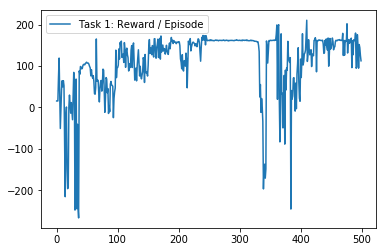

In [5]:
## TODO: Plot the rewards.
episodes_1 = [e[0] for e in eps_reward_task1]
rewards_1 = [e[1] for e in eps_reward_task1]

plt.plot(episodes_1, rewards_1, label='Task 1: Reward / Episode')
plt.legend()
_ = plt.ylim()

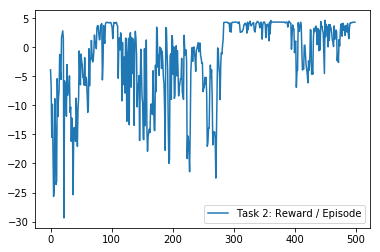

In [13]:
## TODO: Plot the rewards.
episodes_2 = [e[0] for e in eps_reward_task2]
rewards_2 = [e[1] for e in eps_reward_task2]

plt.plot(episodes_2, rewards_2, label='Task 2: Reward / Episode')
plt.legend()
_ = plt.ylim()

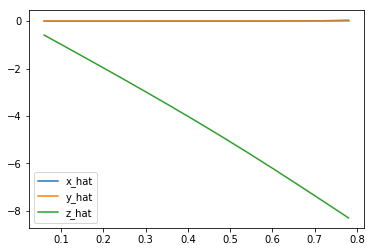

In [15]:
plt.plot(results_task2['time'], results_task2['x_velocity'], label='x_hat')
plt.plot(results_task2['time'], results_task2['y_velocity'], label='y_hat')
plt.plot(results_task2['time'], results_task2['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: